In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from statsmodels.graphics.gofplots import qqplot
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

# Data Preprocessing

In [52]:
df = pd.read_csv("train.csv")
df.head(10)

,id,Date,Count,Hour,Hotness,Humidity,Wind Speed,Visibility,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Working Day
0,1,05/08/2018,222,6:00,300.3,83,5.04,1080,0.00,0.0,0.0,Summer,NO,YES
1,2,21/01/2018,170,23:00,272.6,32,2.16,2000,0.00,0.0,0.0,Winter,NO,YES
2,3,11/05/2018,486,6:00,285.0,83,1.44,321,0.01,0.0,0.0,Spring,NO,YES
3,4,05/07/2018,929,13:00,301.1,67,3.96,1772,1.43,0.0,0.0,Summer,NO,YES
4,5,02/01/2018,58,5:00,269.9,67,2.16,1384,0.00,0.0,0.0,Winter,NO,YES
5,6,09/08/2018,1494,22:00,300.5,82,1.44,1228,0.00,0.0,0.0,Summer,NO,YES
6,7,15/09/2018,881,1:00,294.8,79,5.04,2000,0.00,0.0,0.0,Autumn,NO,YES
7,8,12/06/2018,1202,12:00,297.0,51,6.48,2000,2.29,0.0,0.0,Summer,NO,YES
8,9,20/09/2018,886,0:00,293.1,58,1.08,2000,0.00,0.0,0.0,Autumn,NO,YES
9,10,15/03/2018,214,16:00,283.7,98,4.32,196,0.14,0.0,0.0,Spring,NO,YES


In [53]:
df.describe()

,id,Count,Hotness,Humidity,Wind Speed,Visibility,Solar Radiation,Rainfall,Snowfall
count,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.00000
mean,2493.500000,705.851986,285.977778,58.247493,6.159495,1432.546731,0.576897,0.154673,0.06775
std,1439.478551,646.444092,11.838222,20.373339,3.679312,605.976182,0.874589,1.121118,0.40789
min,1.000000,0.000000,255.200000,0.000000,0.000000,33.000000,0.000000,0.000000,0.00000
25%,1247.250000,191.000000,276.700000,43.000000,3.240000,942.250000,0.000000,0.000000,0.00000
50%,2493.500000,505.000000,286.700000,57.000000,5.400000,1678.000000,0.010000,0.000000,0.00000
75%,3739.750000,1066.750000,295.400000,74.000000,8.280000,1999.000000,0.950000,0.000000,0.00000
max,4986.000000,3556.000000,312.400000,98.000000,26.280000,2000.000000,3.520000,29.500000,8.80000


In [54]:
df.dtypes

id                   int64
Date                object
Count                int64
Hour                object
Hotness            float64
Humidity             int64
Wind Speed         float64
Visibility           int64
Solar Radiation    float64
Rainfall           float64
Snowfall           float64
Seasons             object
Holiday             object
Working Day         object
dtype: object

In [55]:
df.isnull().sum()

id                 0
Date               0
Count              0
Hour               0
Hotness            0
Humidity           0
Wind Speed         0
Visibility         0
Solar Radiation    0
Rainfall           0
Snowfall           0
Seasons            0
Holiday            0
Working Day        0
dtype: int64

In [56]:
import pickle
pickle.dump(df,open('df.pkl','wb'))

In [57]:
#checking how many unique values exist
df.apply(lambda x:len(x.unique()))

id                 4986
Date                365
Count              1813
Hour                 24
Hotness             533
Humidity             88
Wind Speed           60
Visibility         1543
Solar Radiation     340
Rainfall             47
Snowfall             45
Seasons               4
Holiday               2
Working Day           2
dtype: int64

In [58]:
def func(df):
    df['Hour'] = df['Hour'].map({ "0:00":  0,   "1:00":  1,"2:00":  2,"3:00":  3,"4:00":  4,"5:00":  5,"6:00":  6,"7:00":  7,"8:00":  8,"9:00":  9,"10:00": 10,"11:00": 11,"12:00": 12,"13:00": 13,"14:00": 14,"15:00": 15,"16:00": 16,"17:00": 17,"18:00": 18,"19:00": 19,"20:00": 20,"21:00": 21,"22:00": 22,"23:00": 23
                                })
    return df

In [59]:
df_old = df.copy()

In [60]:
##    This code will convert datetime column into datetime format and extract month and weekday from that. These features
#     may work as important categorical features.




def one_hot_encod(dframe,column):
    dframe = pd.concat([dframe,pd.get_dummies(dframe[column],prefix = column,drop_first=True)],axis=1)
    dframe = dframe.drop([column],axis=1)
    return dframe


def preprocess(df):
    df2=df
    df2['Date']=pd.to_datetime(df2['Date'],format="%d/%m/%Y")
    df2['day']=df2['Date'].dt.dayofweek
    df2['month']=df2['Date'].dt.month
    df2 = df2.drop(columns=['Date'],axis=1)
    cols = ['Holiday', 'Working Day']
    df2 = df2.drop(['id'],axis=1)
    df2 = func(df2)
    for col in cols:
        df2 = one_hot_encod(df2,col)
    return df2

In [61]:
df = preprocess(df)
x = df.drop(['Count'],axis=1)

# Encoding season here because font want to alter the data frame just modifying the x which we will use further for training .
x = one_hot_encod(x,'Seasons')

y = df['Count']
x.head()

,Hour,Hotness,Humidity,Wind Speed,Visibility,Solar Radiation,Rainfall,Snowfall,day,month,Holiday_YES,Working Day_YES,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,6,300.3,83,5.04,1080,0.00,0.0,0.0,6,8,0,1,0,1,0
1,23,272.6,32,2.16,2000,0.00,0.0,0.0,6,1,0,1,0,0,1
2,6,285.0,83,1.44,321,0.01,0.0,0.0,4,5,0,1,1,0,0
3,13,301.1,67,3.96,1772,1.43,0.0,0.0,3,7,0,1,0,1,0
4,5,269.9,67,2.16,1384,0.00,0.0,0.0,1,1,0,1,0,0,1


# Exploratory Data Analysis.

<AxesSubplot:>

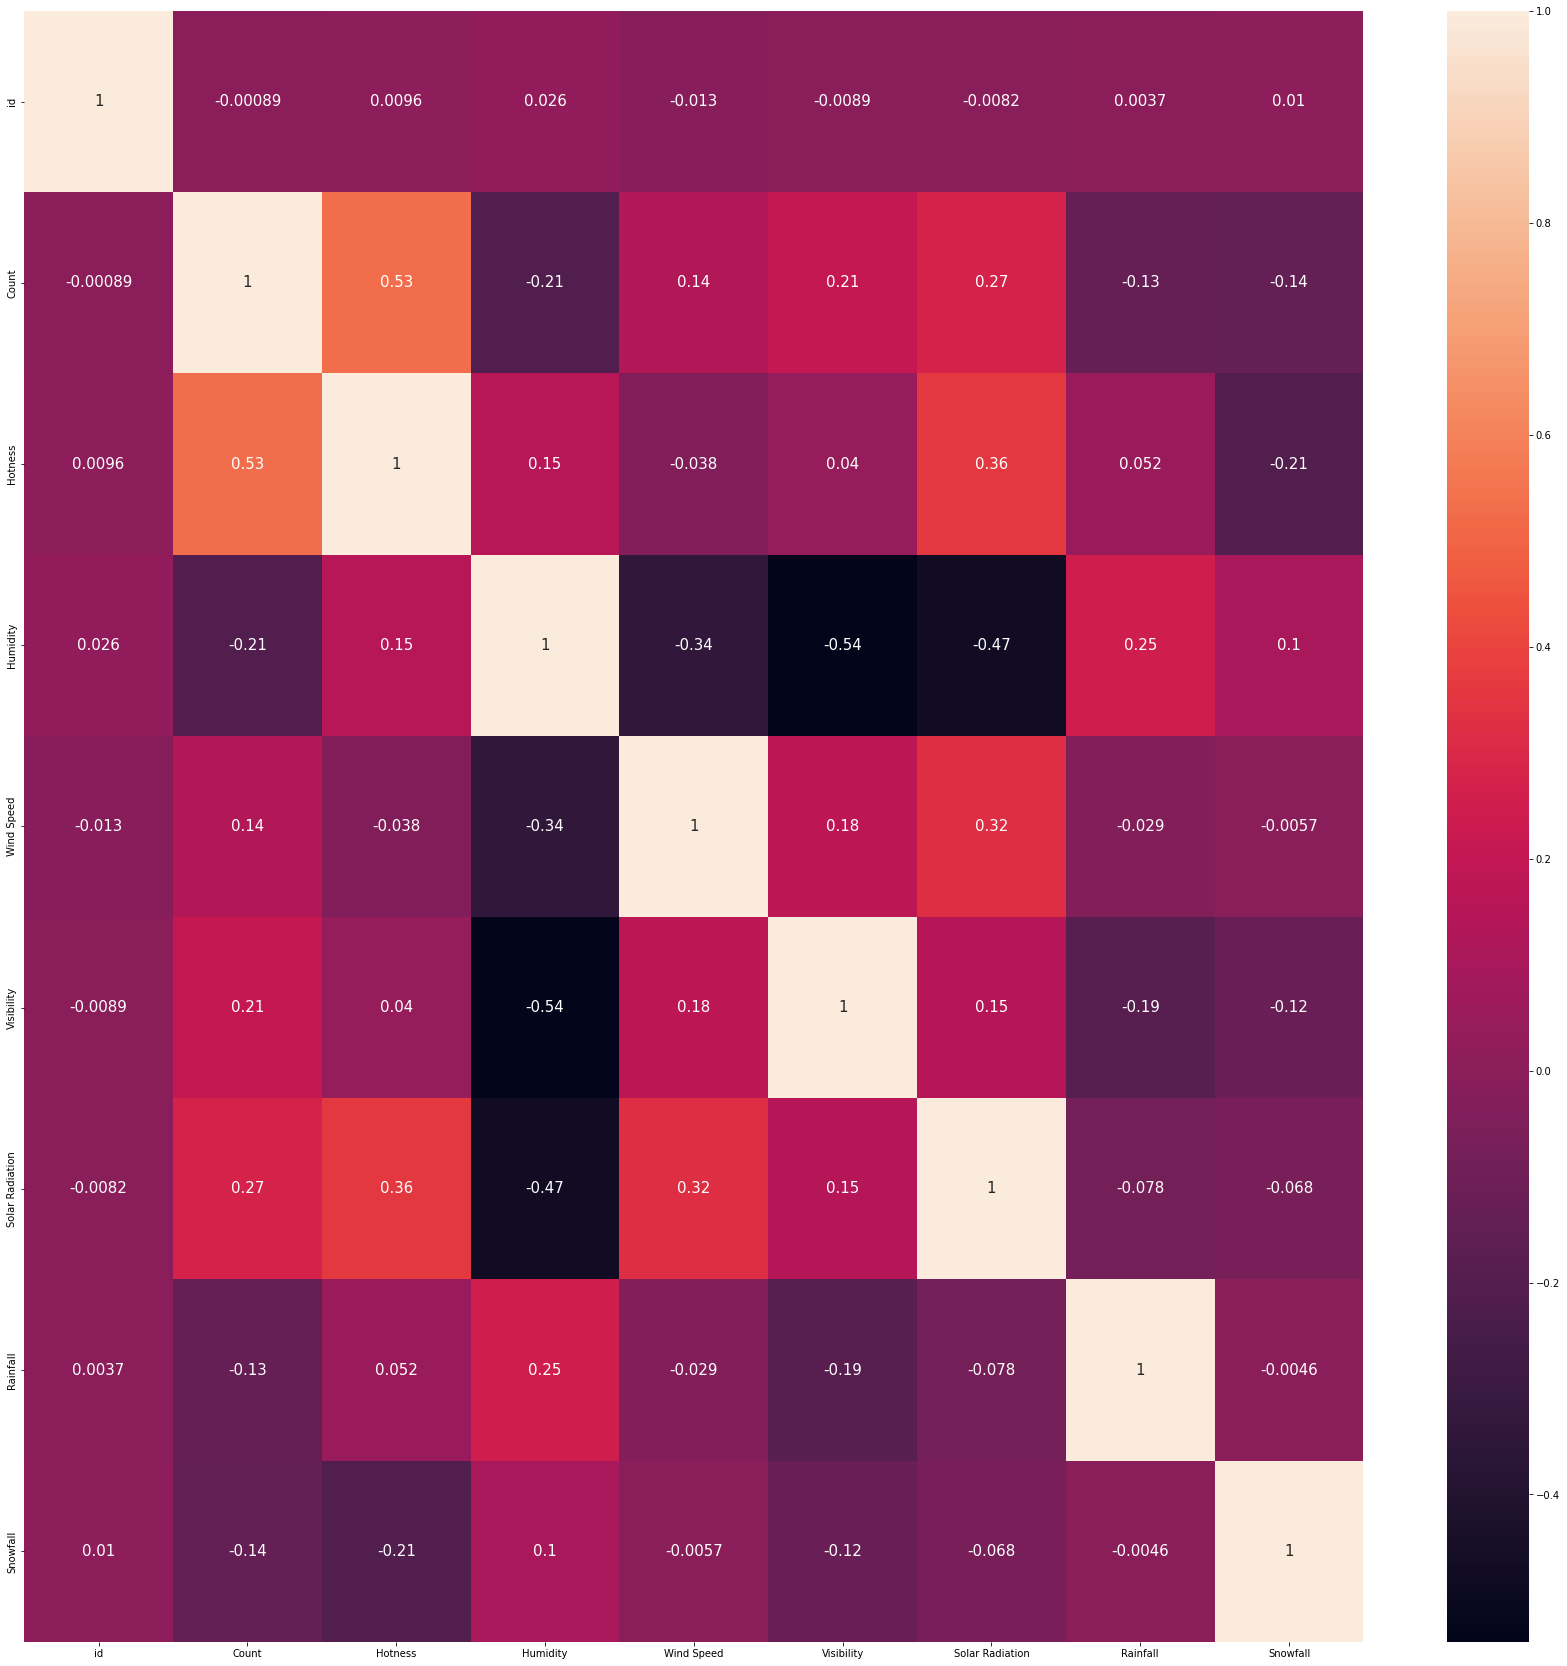

In [62]:
# corelation matrix to show the dependence of one feature on another



corrm = df_old.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corrm, annot=True, annot_kws={'size':15})

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

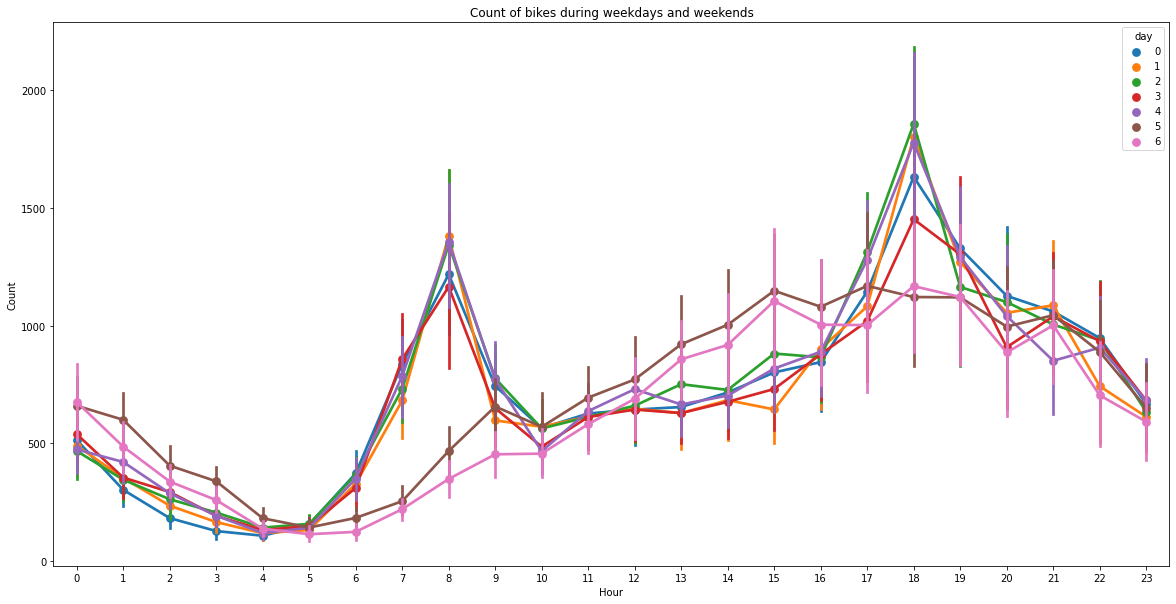

In [63]:
# Plotting the target variable (count) against the hour variable for all days to observe the trend.

fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='Hour', y='Count', hue='day', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

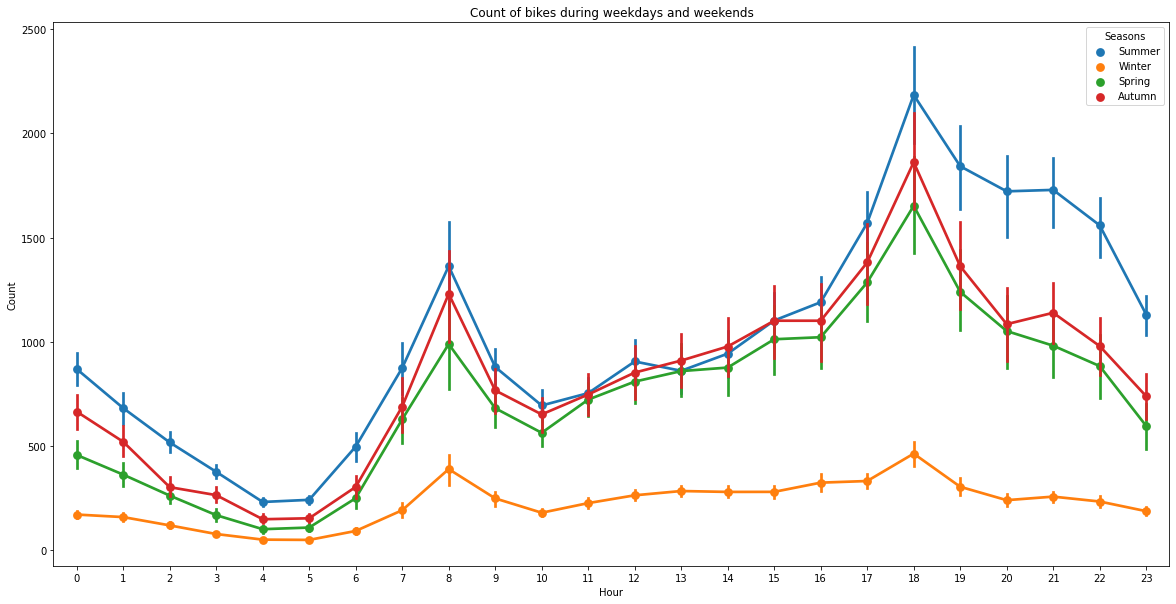

In [64]:
# Plotting the target variable (count) against the hour variable for all seasons to observe the trend.


fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='Hour', y='Count', hue='Seasons', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

[Text(0.5, 1.0, 'Count of bikes during different months')]

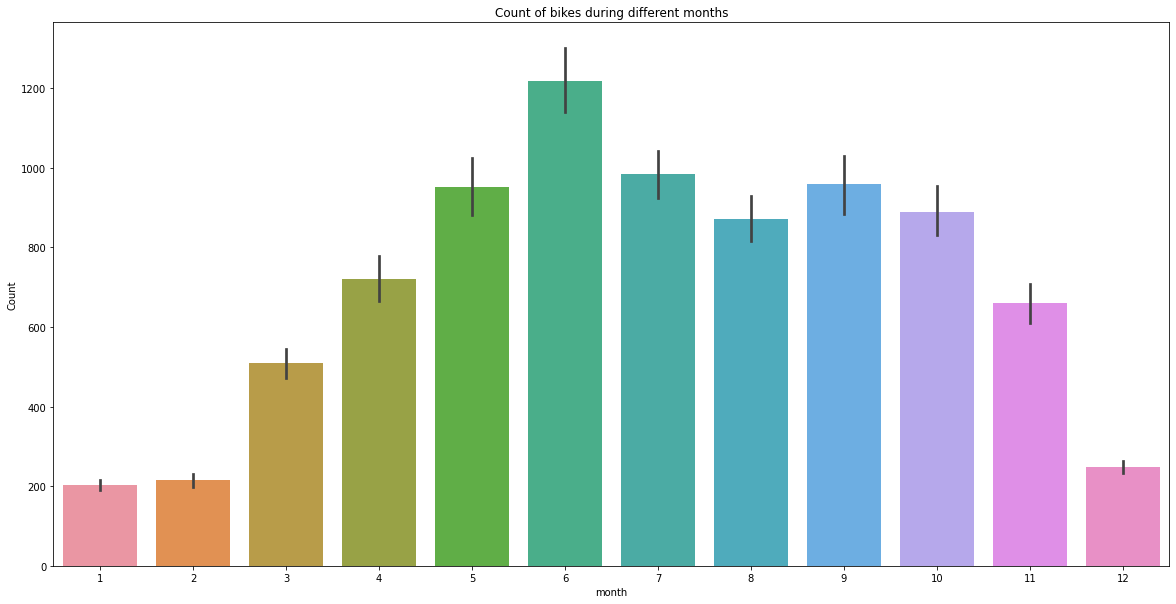

In [65]:
# plotting the barplot for the total count of bike count during months.




fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='month', y='Count', ax=ax)
ax.set(title='Count of bikes during different months')

[Text(0.5, 1.0, 'Count of bikes during different weekdays')]

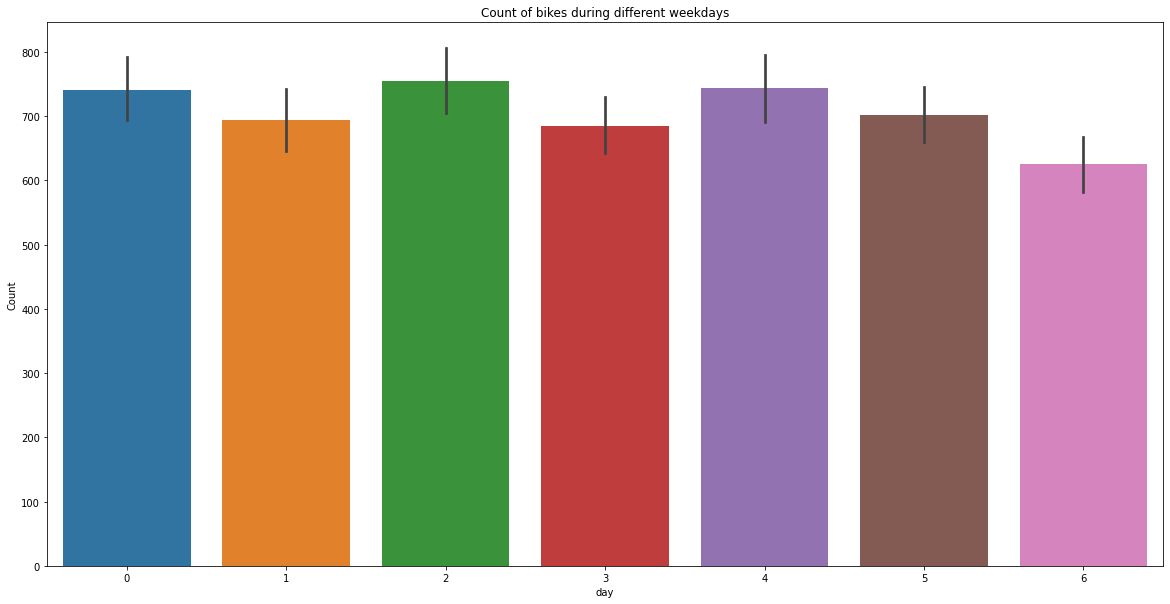

In [66]:
# Plotting the bar plot for total count of bike during different weekdays.




fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='day', y='Count', ax=ax)
ax.set(title='Count of bikes during different weekdays')

[Text(0.5, 1.0, 'Total Count of bikes during different Hours')]

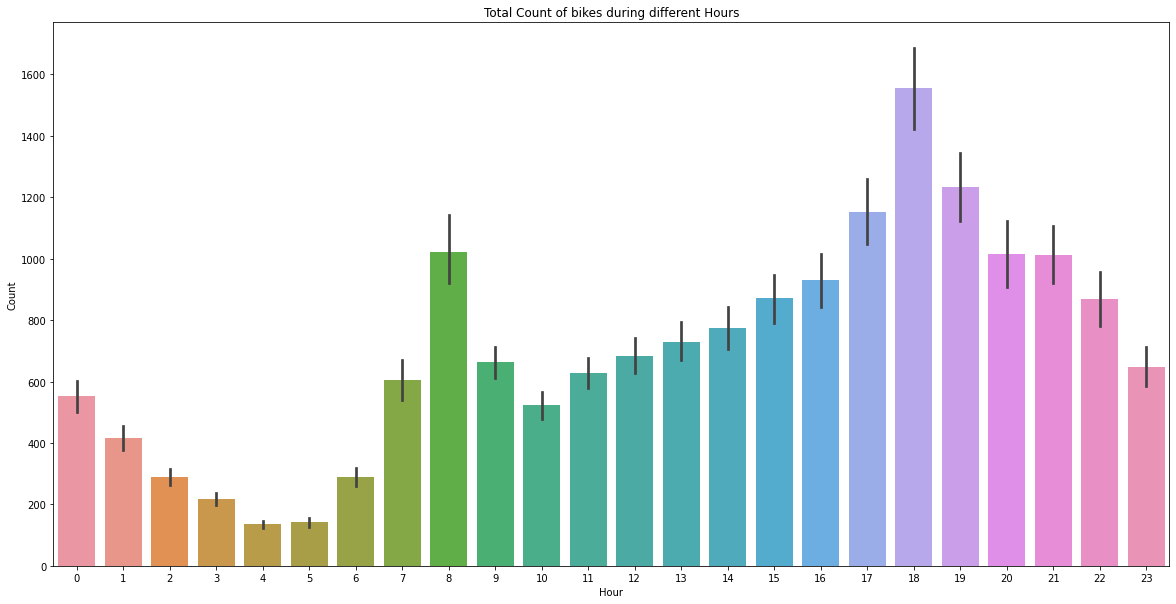

In [67]:
# Plotting the bar plot for total count of bike during different weekdays.




fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='Hour', y='Count', ax=ax)
ax.set(title='Total Count of bikes during different Hours')

[Text(0.5, 1.0, 'Total Count of bikes during different Season')]

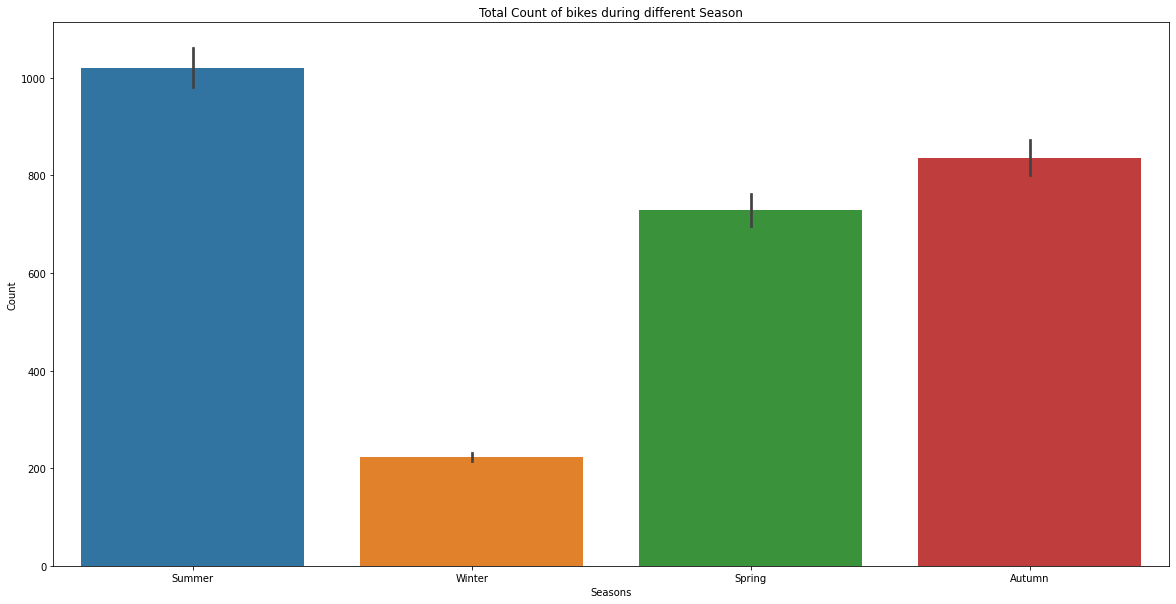

In [68]:
# Plotting the bar plot for total count of bike during different seasons.




fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='Seasons', y='Count', ax=ax)
ax.set(title='Total Count of bikes during different Season')

In the above exploratory data analysis we observed that the count variable is heavily related to
weekdays , hours , months and different seasons. So we are not deleting any of these columns.

# Model Training

In [69]:
x

,Hour,Hotness,Humidity,Wind Speed,Visibility,Solar Radiation,Rainfall,Snowfall,day,month,Holiday_YES,Working Day_YES,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,6,300.3,83,5.04,1080,0.00,0.0,0.0,6,8,0,1,0,1,0
1,23,272.6,32,2.16,2000,0.00,0.0,0.0,6,1,0,1,0,0,1
2,6,285.0,83,1.44,321,0.01,0.0,0.0,4,5,0,1,1,0,0
3,13,301.1,67,3.96,1772,1.43,0.0,0.0,3,7,0,1,0,1,0
4,5,269.9,67,2.16,1384,0.00,0.0,0.0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4981,19,306.4,51,9.36,2000,0.59,0.0,0.0,5,7,0,1,0,1,0
4982,19,281.4,51,11.88,1977,0.01,0.0,0.0,0,3,0,1,1,0,0
4983,13,295.5,40,9.36,1854,2.64,0.0,0.0,2,10,1,1,0,0,0
4984,21,268.2,59,3.24,2000,0.00,0.0,0.0,1,1,0,1,0,0,1


In [70]:
# Performing train test split.


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [71]:
# First Try on linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train , y_train)
model.score(x_test , y_test)

0.5439299906277156

In [72]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(x_train, y_train)
print(rf.score(x_test,y_test))
y_pred = rf.predict(x_test)
print(mean_squared_error(y_test, y_pred, squared=False))

0.933540662364481
166.29870832505333


In [73]:
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(x_train, y_train)
print(model.score(x_test,y_test))
y_pred = model.predict(x_test)
print(mean_squared_error(y_test, y_pred, squared=False))

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.9313200067017973
169.0542112308221


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [74]:
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor()
model.fit(x_train, y_train)
print(model.score(x_test,y_test))
y_pred = model.predict(x_test)
print(mean_squared_error(y_test, y_pred, squared=False))


0.8525289353993746
247.72182988288222


In [17]:
#!pip install catboost

In [18]:
import catboost as cb

In [19]:
train_dataset = cb.Pool(x_train, y_train) 
test_dataset = cb.Pool(x_test, y_test)

In [20]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [21]:
grid = {'iterations': [200,400, 600],
        'learning_rate': [0.013, 0.085],
        'depth': [6, 8 , 10],
        'l2_leaf_reg': [0.2, 1, 3 , 7]}
model.grid_search(grid, train_dataset)

0:	learn: 944.7151262	test: 959.8102109	best: 959.8102109 (0)	total: 146ms	remaining: 29.1s
1:	learn: 935.0091144	test: 950.2492696	best: 950.2492696 (1)	total: 150ms	remaining: 14.9s
2:	learn: 926.1821379	test: 941.6566952	best: 941.6566952 (2)	total: 153ms	remaining: 10.1s
3:	learn: 916.5333834	test: 932.0628696	best: 932.0628696 (3)	total: 156ms	remaining: 7.66s
4:	learn: 907.0204132	test: 922.7831421	best: 922.7831421 (4)	total: 159ms	remaining: 6.22s
5:	learn: 897.9460113	test: 913.6316396	best: 913.6316396 (5)	total: 162ms	remaining: 5.24s
6:	learn: 889.5551362	test: 905.3457537	best: 905.3457537 (6)	total: 165ms	remaining: 4.54s
7:	learn: 880.5576108	test: 896.3395565	best: 896.3395565 (7)	total: 167ms	remaining: 4.02s
8:	learn: 871.5850518	test: 887.3699236	best: 887.3699236 (8)	total: 170ms	remaining: 3.61s
9:	learn: 862.5625185	test: 878.3796733	best: 878.3796733 (9)	total: 173ms	remaining: 3.29s
10:	learn: 854.2952514	test: 870.4719040	best: 870.4719040 (10)	total: 176ms	rem

133:	learn: 360.9161562	test: 381.7434097	best: 381.7434097 (133)	total: 510ms	remaining: 251ms
134:	learn: 359.5349103	test: 380.4278058	best: 380.4278058 (134)	total: 513ms	remaining: 247ms
135:	learn: 358.0989909	test: 378.9084401	best: 378.9084401 (135)	total: 515ms	remaining: 243ms
136:	learn: 356.7645305	test: 377.5267166	best: 377.5267166 (136)	total: 518ms	remaining: 238ms
137:	learn: 355.2347211	test: 376.0680896	best: 376.0680896 (137)	total: 521ms	remaining: 234ms
138:	learn: 354.0086120	test: 374.7943020	best: 374.7943020 (138)	total: 523ms	remaining: 230ms
139:	learn: 352.6413013	test: 373.4062505	best: 373.4062505 (139)	total: 526ms	remaining: 225ms
140:	learn: 351.2137736	test: 372.0508469	best: 372.0508469 (140)	total: 529ms	remaining: 221ms
141:	learn: 349.9493689	test: 370.7324738	best: 370.7324738 (141)	total: 531ms	remaining: 217ms
142:	learn: 348.8586960	test: 369.6285504	best: 369.6285504 (142)	total: 535ms	remaining: 213ms
143:	learn: 347.0777751	test: 367.879814

60:	learn: 223.6740906	test: 245.0351687	best: 245.0351687 (60)	total: 166ms	remaining: 379ms
61:	learn: 222.7978070	test: 244.5370705	best: 244.5370705 (61)	total: 169ms	remaining: 376ms
62:	learn: 220.6498098	test: 242.4687973	best: 242.4687973 (62)	total: 171ms	remaining: 373ms
63:	learn: 219.6424745	test: 241.9037021	best: 241.9037021 (63)	total: 174ms	remaining: 370ms
64:	learn: 218.8347298	test: 241.1315431	best: 241.1315431 (64)	total: 177ms	remaining: 367ms
65:	learn: 217.8830815	test: 240.3435183	best: 240.3435183 (65)	total: 179ms	remaining: 364ms
66:	learn: 217.2130819	test: 239.7576421	best: 239.7576421 (66)	total: 182ms	remaining: 361ms
67:	learn: 216.4086901	test: 239.0818045	best: 239.0818045 (67)	total: 184ms	remaining: 358ms
68:	learn: 215.2279960	test: 238.4877782	best: 238.4877782 (68)	total: 187ms	remaining: 355ms
69:	learn: 213.2431479	test: 236.8013415	best: 236.8013415 (69)	total: 189ms	remaining: 352ms
70:	learn: 212.3633168	test: 236.4782076	best: 236.4782076 (

185:	learn: 144.3832341	test: 195.0671392	best: 195.0671392 (185)	total: 516ms	remaining: 38.8ms
186:	learn: 143.9979465	test: 194.9964122	best: 194.9964122 (186)	total: 519ms	remaining: 36.1ms
187:	learn: 143.4999461	test: 195.1385564	best: 194.9964122 (186)	total: 522ms	remaining: 33.3ms
188:	learn: 143.2659338	test: 195.0993585	best: 194.9964122 (186)	total: 525ms	remaining: 30.5ms
189:	learn: 143.0487496	test: 195.0101279	best: 194.9964122 (186)	total: 529ms	remaining: 27.8ms
190:	learn: 142.6346250	test: 194.9947956	best: 194.9947956 (190)	total: 531ms	remaining: 25ms
191:	learn: 142.1943492	test: 194.6304595	best: 194.6304595 (191)	total: 534ms	remaining: 22.3ms
192:	learn: 141.9472679	test: 194.4839108	best: 194.4839108 (192)	total: 537ms	remaining: 19.5ms
193:	learn: 141.7829004	test: 194.4708248	best: 194.4708248 (193)	total: 540ms	remaining: 16.7ms
194:	learn: 141.1911260	test: 194.3502038	best: 194.3502038 (194)	total: 543ms	remaining: 13.9ms
195:	learn: 140.9331730	test: 19

113:	learn: 395.6268218	test: 416.3221863	best: 416.3221863 (113)	total: 325ms	remaining: 245ms
114:	learn: 393.9267428	test: 414.5648636	best: 414.5648636 (114)	total: 328ms	remaining: 242ms
115:	learn: 391.6657282	test: 412.2902155	best: 412.2902155 (115)	total: 331ms	remaining: 239ms
116:	learn: 389.9633283	test: 410.6000373	best: 410.6000373 (116)	total: 333ms	remaining: 237ms
117:	learn: 388.0194329	test: 408.6699243	best: 408.6699243 (117)	total: 336ms	remaining: 234ms
118:	learn: 386.2761497	test: 406.8285097	best: 406.8285097 (118)	total: 339ms	remaining: 231ms
119:	learn: 384.5834298	test: 405.1423069	best: 405.1423069 (119)	total: 341ms	remaining: 228ms
120:	learn: 382.7388362	test: 403.3404717	best: 403.3404717 (120)	total: 344ms	remaining: 225ms
121:	learn: 381.0353055	test: 401.6417118	best: 401.6417118 (121)	total: 347ms	remaining: 222ms
122:	learn: 379.3747119	test: 399.9403730	best: 399.9403730 (122)	total: 350ms	remaining: 219ms
123:	learn: 377.8414378	test: 398.364990

37:	learn: 267.3515091	test: 284.9170519	best: 284.9170519 (37)	total: 102ms	remaining: 436ms
38:	learn: 264.6439768	test: 282.4826412	best: 282.4826412 (38)	total: 105ms	remaining: 433ms
39:	learn: 261.3080043	test: 278.8228317	best: 278.8228317 (39)	total: 108ms	remaining: 430ms
40:	learn: 259.4224990	test: 277.3310337	best: 277.3310337 (40)	total: 110ms	remaining: 428ms
41:	learn: 257.1631264	test: 274.9901627	best: 274.9901627 (41)	total: 113ms	remaining: 425ms
42:	learn: 255.4635192	test: 273.0718466	best: 273.0718466 (42)	total: 116ms	remaining: 423ms
43:	learn: 253.3958713	test: 270.9663545	best: 270.9663545 (43)	total: 118ms	remaining: 420ms
44:	learn: 249.7945246	test: 267.3880079	best: 267.3880079 (44)	total: 121ms	remaining: 417ms
45:	learn: 247.6949422	test: 265.3565336	best: 265.3565336 (45)	total: 124ms	remaining: 415ms
46:	learn: 244.4829039	test: 262.3969430	best: 262.3969430 (46)	total: 127ms	remaining: 412ms
47:	learn: 242.8279745	test: 260.9628396	best: 260.9628396 (

167:	learn: 154.4045597	test: 199.3411037	best: 199.3411037 (167)	total: 451ms	remaining: 85.9ms
168:	learn: 154.0554285	test: 199.2771120	best: 199.2771120 (168)	total: 454ms	remaining: 83.3ms
169:	learn: 153.4190207	test: 198.8159504	best: 198.8159504 (169)	total: 457ms	remaining: 80.6ms
170:	learn: 153.1358393	test: 198.6532771	best: 198.6532771 (170)	total: 459ms	remaining: 77.9ms
171:	learn: 152.9026496	test: 198.4162101	best: 198.4162101 (171)	total: 462ms	remaining: 75.2ms
172:	learn: 152.6301314	test: 198.3918704	best: 198.3918704 (172)	total: 465ms	remaining: 72.6ms
173:	learn: 152.3264515	test: 198.0777594	best: 198.0777594 (173)	total: 468ms	remaining: 69.9ms
174:	learn: 152.0341996	test: 197.9943959	best: 197.9943959 (174)	total: 470ms	remaining: 67.2ms
175:	learn: 151.4109144	test: 198.1292916	best: 197.9943959 (174)	total: 473ms	remaining: 64.5ms
176:	learn: 151.0562051	test: 197.8090892	best: 197.8090892 (176)	total: 476ms	remaining: 61.9ms
177:	learn: 150.8742529	test: 

95:	learn: 435.7234234	test: 456.8828980	best: 456.8828980 (95)	total: 274ms	remaining: 297ms
96:	learn: 433.5200903	test: 454.6882742	best: 454.6882742 (96)	total: 277ms	remaining: 294ms
97:	learn: 431.0344610	test: 452.1125210	best: 452.1125210 (97)	total: 279ms	remaining: 291ms
98:	learn: 428.5014892	test: 449.5754071	best: 449.5754071 (98)	total: 282ms	remaining: 288ms
99:	learn: 425.8481422	test: 446.9151776	best: 446.9151776 (99)	total: 285ms	remaining: 285ms
100:	learn: 423.4960697	test: 444.5337204	best: 444.5337204 (100)	total: 287ms	remaining: 282ms
101:	learn: 421.5253653	test: 442.6053404	best: 442.6053404 (101)	total: 290ms	remaining: 278ms
102:	learn: 419.5585244	test: 440.6606998	best: 440.6606998 (102)	total: 292ms	remaining: 275ms
103:	learn: 417.4240694	test: 438.5830650	best: 438.5830650 (103)	total: 295ms	remaining: 272ms
104:	learn: 415.2947404	test: 436.4370605	best: 436.4370605 (104)	total: 298ms	remaining: 269ms
105:	learn: 412.8683786	test: 434.0099135	best: 43

22:	learn: 336.7740449	test: 354.5091091	best: 354.5091091 (22)	total: 67.1ms	remaining: 516ms
23:	learn: 330.1311139	test: 347.6723756	best: 347.6723756 (23)	total: 69.8ms	remaining: 512ms
24:	learn: 323.3730843	test: 340.4088420	best: 340.4088420 (24)	total: 72.4ms	remaining: 507ms
25:	learn: 317.7709885	test: 334.7029169	best: 334.7029169 (25)	total: 75.4ms	remaining: 504ms
26:	learn: 312.9550066	test: 329.7218236	best: 329.7218236 (26)	total: 78.1ms	remaining: 501ms
27:	learn: 308.0984741	test: 324.9690125	best: 324.9690125 (27)	total: 80.6ms	remaining: 495ms
28:	learn: 303.0807584	test: 319.5932219	best: 319.5932219 (28)	total: 83.4ms	remaining: 492ms
29:	learn: 296.1230726	test: 312.4039589	best: 312.4039589 (29)	total: 86ms	remaining: 487ms
30:	learn: 290.5278195	test: 306.8010922	best: 306.8010922 (30)	total: 88.8ms	remaining: 484ms
31:	learn: 286.9775164	test: 303.1509945	best: 303.1509945 (31)	total: 92.4ms	remaining: 485ms
32:	learn: 283.9108855	test: 299.8061825	best: 299.8

140:	learn: 168.0412671	test: 203.2658276	best: 203.2658276 (140)	total: 422ms	remaining: 177ms
141:	learn: 167.7624792	test: 203.0974898	best: 203.0974898 (141)	total: 425ms	remaining: 174ms
142:	learn: 167.2622757	test: 202.8322965	best: 202.8322965 (142)	total: 428ms	remaining: 171ms
143:	learn: 166.9945889	test: 202.6418468	best: 202.6418468 (143)	total: 431ms	remaining: 167ms
144:	learn: 166.7462249	test: 202.5148174	best: 202.5148174 (144)	total: 433ms	remaining: 164ms
145:	learn: 166.4813198	test: 202.3049260	best: 202.3049260 (145)	total: 436ms	remaining: 161ms
146:	learn: 165.8441847	test: 202.0040005	best: 202.0040005 (146)	total: 439ms	remaining: 158ms
147:	learn: 165.6126716	test: 201.9745646	best: 201.9745646 (147)	total: 441ms	remaining: 155ms
148:	learn: 165.2593724	test: 201.7548524	best: 201.7548524 (148)	total: 444ms	remaining: 152ms
149:	learn: 164.8488834	test: 201.4318404	best: 201.4318404 (149)	total: 446ms	remaining: 149ms
150:	learn: 164.5168488	test: 201.201895

51:	learn: 596.9269556	test: 616.6661282	best: 616.6661282 (51)	total: 167ms	remaining: 476ms
52:	learn: 592.0309146	test: 611.7917386	best: 611.7917386 (52)	total: 170ms	remaining: 472ms
53:	learn: 587.3404212	test: 607.0814511	best: 607.0814511 (53)	total: 174ms	remaining: 470ms
54:	learn: 582.4262435	test: 602.0798768	best: 602.0798768 (54)	total: 177ms	remaining: 467ms
55:	learn: 578.0583007	test: 597.7495375	best: 597.7495375 (55)	total: 180ms	remaining: 463ms
56:	learn: 573.5457901	test: 593.2807436	best: 593.2807436 (56)	total: 186ms	remaining: 467ms
57:	learn: 569.1688573	test: 588.9794026	best: 588.9794026 (57)	total: 189ms	remaining: 462ms
58:	learn: 564.8127567	test: 584.7385937	best: 584.7385937 (58)	total: 192ms	remaining: 458ms
59:	learn: 560.5668839	test: 580.4372894	best: 580.4372894 (59)	total: 194ms	remaining: 453ms
60:	learn: 556.2453143	test: 576.1920297	best: 576.1920297 (60)	total: 197ms	remaining: 450ms
61:	learn: 552.0298566	test: 572.0446060	best: 572.0446060 (

183:	learn: 313.2941420	test: 333.3506850	best: 333.3506850 (183)	total: 531ms	remaining: 46.2ms
184:	learn: 312.6059109	test: 332.6589809	best: 332.6589809 (184)	total: 534ms	remaining: 43.3ms
185:	learn: 311.5306762	test: 331.5768681	best: 331.5768681 (185)	total: 537ms	remaining: 40.4ms
186:	learn: 310.6549760	test: 330.7155244	best: 330.7155244 (186)	total: 540ms	remaining: 37.5ms
187:	learn: 309.9809685	test: 330.0196890	best: 330.0196890 (187)	total: 542ms	remaining: 34.6ms
188:	learn: 309.3591220	test: 329.3729939	best: 329.3729939 (188)	total: 545ms	remaining: 31.7ms
189:	learn: 308.7161925	test: 328.7109232	best: 328.7109232 (189)	total: 547ms	remaining: 28.8ms
190:	learn: 307.9864927	test: 328.0880178	best: 328.0880178 (190)	total: 550ms	remaining: 25.9ms
191:	learn: 307.2015467	test: 327.3474149	best: 327.3474149 (191)	total: 552ms	remaining: 23ms
192:	learn: 306.5028276	test: 326.6723744	best: 326.6723744 (192)	total: 556ms	remaining: 20.1ms
193:	learn: 305.9256211	test: 32

105:	learn: 193.2530441	test: 221.0358219	best: 221.0358219 (105)	total: 308ms	remaining: 274ms
106:	learn: 192.5407025	test: 220.7739847	best: 220.7739847 (106)	total: 311ms	remaining: 271ms
107:	learn: 191.2255814	test: 219.7323490	best: 219.7323490 (107)	total: 316ms	remaining: 269ms
108:	learn: 190.0886649	test: 219.1459612	best: 219.1459612 (108)	total: 319ms	remaining: 266ms
109:	learn: 188.7461523	test: 218.1413390	best: 218.1413390 (109)	total: 322ms	remaining: 263ms
110:	learn: 187.9708029	test: 217.4677026	best: 217.4677026 (110)	total: 325ms	remaining: 260ms
111:	learn: 187.4814704	test: 216.8968062	best: 216.8968062 (111)	total: 329ms	remaining: 258ms
112:	learn: 187.0607866	test: 216.3772046	best: 216.3772046 (112)	total: 332ms	remaining: 256ms
113:	learn: 186.6908851	test: 216.1057620	best: 216.1057620 (113)	total: 335ms	remaining: 253ms
114:	learn: 185.8932893	test: 215.5797514	best: 215.5797514 (114)	total: 339ms	remaining: 250ms
115:	learn: 185.2303327	test: 215.614528

196:	learn: 154.1117206	test: 198.2205950	best: 198.2205950 (196)	total: 681ms	remaining: 10.4ms
197:	learn: 153.8645379	test: 198.2505667	best: 198.2205950 (196)	total: 685ms	remaining: 6.92ms
198:	learn: 153.7167516	test: 198.2576655	best: 198.2205950 (196)	total: 690ms	remaining: 3.47ms
199:	learn: 153.5112538	test: 198.2097891	best: 198.2097891 (199)	total: 693ms	remaining: 0us

bestTest = 198.2097891
bestIteration = 199

7:	loss: 198.2097891	best: 193.8680840 (5)	total: 5.13s	remaining: 41s
0:	learn: 944.7151262	test: 959.8102109	best: 959.8102109 (0)	total: 4.66ms	remaining: 1.86s
1:	learn: 935.0091144	test: 950.2492696	best: 950.2492696 (1)	total: 8.29ms	remaining: 1.65s
2:	learn: 926.1821379	test: 941.6566952	best: 941.6566952 (2)	total: 11.2ms	remaining: 1.48s
3:	learn: 916.5333834	test: 932.0628696	best: 932.0628696 (3)	total: 14ms	remaining: 1.38s
4:	learn: 907.0204132	test: 922.7831421	best: 922.7831421 (4)	total: 16.8ms	remaining: 1.33s
5:	learn: 897.9460113	test: 913.6316

117:	learn: 387.4410057	test: 408.0754840	best: 408.0754840 (117)	total: 331ms	remaining: 792ms
118:	learn: 385.6918320	test: 406.2247654	best: 406.2247654 (118)	total: 334ms	remaining: 788ms
119:	learn: 384.0316779	test: 404.5685006	best: 404.5685006 (119)	total: 337ms	remaining: 785ms
120:	learn: 382.1748870	test: 402.7575116	best: 402.7575116 (120)	total: 339ms	remaining: 782ms
121:	learn: 380.5613196	test: 401.1880833	best: 401.1880833 (121)	total: 342ms	remaining: 779ms
122:	learn: 378.9875077	test: 399.5983534	best: 399.5983534 (122)	total: 345ms	remaining: 777ms
123:	learn: 377.1611501	test: 397.8113238	best: 397.8113238 (123)	total: 348ms	remaining: 774ms
124:	learn: 375.4786523	test: 396.1290907	best: 396.1290907 (124)	total: 350ms	remaining: 771ms
125:	learn: 373.8952661	test: 394.5192685	best: 394.5192685 (125)	total: 353ms	remaining: 768ms
126:	learn: 371.8665966	test: 392.4799195	best: 392.4799195 (126)	total: 356ms	remaining: 764ms
127:	learn: 370.3906486	test: 391.031628

254:	learn: 266.9708508	test: 288.9291031	best: 288.9291031 (254)	total: 691ms	remaining: 393ms
255:	learn: 266.8117738	test: 288.7440806	best: 288.7440806 (255)	total: 694ms	remaining: 390ms
256:	learn: 266.4649897	test: 288.4099034	best: 288.4099034 (256)	total: 698ms	remaining: 388ms
257:	learn: 266.1264640	test: 288.0834419	best: 288.0834419 (257)	total: 701ms	remaining: 386ms
258:	learn: 265.7575391	test: 287.7128841	best: 287.7128841 (258)	total: 704ms	remaining: 383ms
259:	learn: 265.4812857	test: 287.4111296	best: 287.4111296 (259)	total: 707ms	remaining: 381ms
260:	learn: 265.1777166	test: 287.1302733	best: 287.1302733 (260)	total: 710ms	remaining: 378ms
261:	learn: 264.6077527	test: 286.5438555	best: 286.5438555 (261)	total: 713ms	remaining: 375ms
262:	learn: 264.3153864	test: 286.2402301	best: 286.2402301 (262)	total: 715ms	remaining: 373ms
263:	learn: 263.7133142	test: 285.6226105	best: 285.6226105 (263)	total: 718ms	remaining: 370ms
264:	learn: 263.0608379	test: 284.998764

383:	learn: 226.3117134	test: 251.0343603	best: 251.0343603 (383)	total: 1.04s	remaining: 43.5ms
384:	learn: 226.1466281	test: 250.8910605	best: 250.8910605 (384)	total: 1.05s	remaining: 40.8ms
385:	learn: 225.9593343	test: 250.7735481	best: 250.7735481 (385)	total: 1.05s	remaining: 38.1ms
386:	learn: 225.8320453	test: 250.6908262	best: 250.6908262 (386)	total: 1.05s	remaining: 35.4ms
387:	learn: 225.3807291	test: 250.3095826	best: 250.3095826 (387)	total: 1.05s	remaining: 32.6ms
388:	learn: 225.1146900	test: 250.1292914	best: 250.1292914 (388)	total: 1.06s	remaining: 29.9ms
389:	learn: 224.8947686	test: 249.9504724	best: 249.9504724 (389)	total: 1.06s	remaining: 27.2ms
390:	learn: 224.7665976	test: 249.8260319	best: 249.8260319 (390)	total: 1.06s	remaining: 24.5ms
391:	learn: 224.3252256	test: 249.4437253	best: 249.4437253 (391)	total: 1.07s	remaining: 21.8ms
392:	learn: 224.0482133	test: 249.1616510	best: 249.1616510 (392)	total: 1.07s	remaining: 19ms
393:	learn: 223.8631011	test: 24

106:	learn: 180.6146327	test: 212.6394691	best: 212.6394691 (106)	total: 302ms	remaining: 828ms
107:	learn: 179.7421234	test: 211.9912880	best: 211.9912880 (107)	total: 305ms	remaining: 824ms
108:	learn: 179.0450246	test: 211.3695347	best: 211.3695347 (108)	total: 308ms	remaining: 821ms
109:	learn: 178.3240608	test: 210.6479828	best: 210.6479828 (109)	total: 310ms	remaining: 818ms
110:	learn: 177.5310858	test: 210.2072707	best: 210.2072707 (110)	total: 313ms	remaining: 814ms
111:	learn: 176.9740853	test: 210.1027910	best: 210.1027910 (111)	total: 315ms	remaining: 811ms
112:	learn: 176.3854972	test: 209.5182781	best: 209.5182781 (112)	total: 318ms	remaining: 808ms
113:	learn: 175.9018775	test: 209.2112391	best: 209.2112391 (113)	total: 321ms	remaining: 805ms
114:	learn: 175.0898765	test: 208.8177416	best: 208.8177416 (114)	total: 324ms	remaining: 803ms
115:	learn: 174.4216552	test: 208.9016119	best: 208.8177416 (114)	total: 327ms	remaining: 801ms
116:	learn: 173.7460819	test: 208.440752

213:	learn: 135.0789987	test: 192.2084613	best: 192.2084613 (213)	total: 659ms	remaining: 573ms
214:	learn: 134.9097381	test: 192.0783533	best: 192.0783533 (214)	total: 662ms	remaining: 569ms
215:	learn: 134.7814848	test: 192.1102762	best: 192.0783533 (214)	total: 664ms	remaining: 566ms
216:	learn: 134.1905811	test: 192.0782603	best: 192.0782603 (216)	total: 667ms	remaining: 563ms
217:	learn: 133.9966322	test: 191.9346814	best: 191.9346814 (217)	total: 670ms	remaining: 559ms
218:	learn: 133.7964156	test: 191.9838446	best: 191.9346814 (217)	total: 673ms	remaining: 556ms
219:	learn: 133.5030475	test: 191.8386344	best: 191.8386344 (219)	total: 676ms	remaining: 553ms
220:	learn: 133.2003099	test: 191.5957452	best: 191.5957452 (220)	total: 679ms	remaining: 550ms
221:	learn: 133.0148911	test: 191.5375741	best: 191.5375741 (221)	total: 682ms	remaining: 547ms
222:	learn: 132.7942571	test: 191.5632483	best: 191.5375741 (221)	total: 684ms	remaining: 543ms
223:	learn: 132.3047047	test: 191.598367

345:	learn: 107.5407972	test: 184.0044632	best: 183.9790810 (344)	total: 1.01s	remaining: 158ms
346:	learn: 107.4204270	test: 183.9737564	best: 183.9737564 (346)	total: 1.01s	remaining: 155ms
347:	learn: 107.3131927	test: 183.9748338	best: 183.9737564 (346)	total: 1.02s	remaining: 152ms
348:	learn: 107.1537990	test: 183.9167755	best: 183.9167755 (348)	total: 1.02s	remaining: 149ms
349:	learn: 107.0557434	test: 184.0231690	best: 183.9167755 (348)	total: 1.02s	remaining: 146ms
350:	learn: 106.8198358	test: 184.0291921	best: 183.9167755 (348)	total: 1.02s	remaining: 143ms
351:	learn: 106.6353922	test: 184.0227792	best: 183.9167755 (348)	total: 1.03s	remaining: 140ms
352:	learn: 106.4384527	test: 183.9514775	best: 183.9167755 (348)	total: 1.03s	remaining: 137ms
353:	learn: 106.2954330	test: 183.9948265	best: 183.9167755 (348)	total: 1.03s	remaining: 134ms
354:	learn: 106.2031948	test: 183.9292960	best: 183.9167755 (348)	total: 1.04s	remaining: 131ms
355:	learn: 105.9335763	test: 183.908082

74:	learn: 497.4703369	test: 518.2934275	best: 518.2934275 (74)	total: 198ms	remaining: 859ms
75:	learn: 494.2440640	test: 515.0566818	best: 515.0566818 (75)	total: 201ms	remaining: 857ms
76:	learn: 490.5748144	test: 511.4467927	best: 511.4467927 (76)	total: 204ms	remaining: 854ms
77:	learn: 487.2750073	test: 508.0960877	best: 508.0960877 (77)	total: 206ms	remaining: 851ms
78:	learn: 484.0610157	test: 504.9401138	best: 504.9401138 (78)	total: 209ms	remaining: 849ms
79:	learn: 480.8300221	test: 501.5979259	best: 501.5979259 (79)	total: 211ms	remaining: 846ms
80:	learn: 477.6439842	test: 498.3620692	best: 498.3620692 (80)	total: 214ms	remaining: 843ms
81:	learn: 474.3997131	test: 495.2411429	best: 495.2411429 (81)	total: 217ms	remaining: 840ms
82:	learn: 471.1664158	test: 492.0356384	best: 492.0356384 (82)	total: 219ms	remaining: 838ms
83:	learn: 468.1921042	test: 489.0721563	best: 489.0721563 (83)	total: 222ms	remaining: 835ms
84:	learn: 465.3885932	test: 486.2921107	best: 486.2921107 (

203:	learn: 294.9273534	test: 315.8782698	best: 315.8782698 (203)	total: 542ms	remaining: 521ms
204:	learn: 293.8368286	test: 314.8636172	best: 314.8636172 (204)	total: 545ms	remaining: 519ms
205:	learn: 293.2812336	test: 314.3076821	best: 314.3076821 (205)	total: 548ms	remaining: 516ms
206:	learn: 292.7075942	test: 313.7339066	best: 313.7339066 (206)	total: 550ms	remaining: 513ms
207:	learn: 292.2274680	test: 313.1985566	best: 313.1985566 (207)	total: 553ms	remaining: 511ms
208:	learn: 291.7931032	test: 312.7415645	best: 312.7415645 (208)	total: 556ms	remaining: 508ms
209:	learn: 291.0918899	test: 312.1253773	best: 312.1253773 (209)	total: 558ms	remaining: 505ms
210:	learn: 290.5879530	test: 311.6842370	best: 311.6842370 (210)	total: 561ms	remaining: 503ms
211:	learn: 290.0420776	test: 311.1746613	best: 311.1746613 (211)	total: 564ms	remaining: 500ms
212:	learn: 289.4550803	test: 310.6051439	best: 310.6051439 (212)	total: 566ms	remaining: 497ms
213:	learn: 288.8354807	test: 310.013450

319:	learn: 243.3969236	test: 266.3095764	best: 266.3095764 (319)	total: 889ms	remaining: 222ms
320:	learn: 243.1748785	test: 266.1110642	best: 266.1110642 (320)	total: 892ms	remaining: 220ms
321:	learn: 242.9001267	test: 265.8595052	best: 265.8595052 (321)	total: 895ms	remaining: 217ms
322:	learn: 242.5483928	test: 265.5226279	best: 265.5226279 (322)	total: 898ms	remaining: 214ms
323:	learn: 242.3650309	test: 265.3481133	best: 265.3481133 (323)	total: 901ms	remaining: 211ms
324:	learn: 242.1585633	test: 265.1432919	best: 265.1432919 (324)	total: 904ms	remaining: 209ms
325:	learn: 241.9441040	test: 264.9248439	best: 264.9248439 (325)	total: 906ms	remaining: 206ms
326:	learn: 241.4599124	test: 264.5035019	best: 264.5035019 (326)	total: 909ms	remaining: 203ms
327:	learn: 241.0401256	test: 264.0590872	best: 264.0590872 (327)	total: 912ms	remaining: 200ms
328:	learn: 240.6581426	test: 263.6877661	best: 263.6877661 (328)	total: 914ms	remaining: 197ms
329:	learn: 240.4062244	test: 263.523902

44:	learn: 249.7945246	test: 267.3880079	best: 267.3880079 (44)	total: 130ms	remaining: 1.02s
45:	learn: 247.6949422	test: 265.3565336	best: 265.3565336 (45)	total: 133ms	remaining: 1.02s
46:	learn: 244.4829039	test: 262.3969430	best: 262.3969430 (46)	total: 136ms	remaining: 1.02s
47:	learn: 242.8279745	test: 260.9628396	best: 260.9628396 (47)	total: 140ms	remaining: 1.03s
48:	learn: 241.0164067	test: 259.6313834	best: 259.6313834 (48)	total: 143ms	remaining: 1.02s
49:	learn: 239.6897529	test: 258.4400642	best: 258.4400642 (49)	total: 147ms	remaining: 1.03s
50:	learn: 237.5012853	test: 256.9062567	best: 256.9062567 (50)	total: 150ms	remaining: 1.02s
51:	learn: 236.1843993	test: 255.8643476	best: 255.8643476 (51)	total: 153ms	remaining: 1.02s
52:	learn: 234.7883213	test: 254.7828443	best: 254.7828443 (52)	total: 157ms	remaining: 1.03s
53:	learn: 233.6030869	test: 253.5519840	best: 253.5519840 (53)	total: 160ms	remaining: 1.03s
54:	learn: 232.2295011	test: 252.6271107	best: 252.6271107 (

180:	learn: 149.7985427	test: 197.4391680	best: 197.4391680 (180)	total: 492ms	remaining: 596ms
181:	learn: 149.5087606	test: 197.3090926	best: 197.3090926 (181)	total: 496ms	remaining: 594ms
182:	learn: 149.2277803	test: 197.2835563	best: 197.2835563 (182)	total: 499ms	remaining: 591ms
183:	learn: 148.9510689	test: 197.1473236	best: 197.1473236 (183)	total: 502ms	remaining: 589ms
184:	learn: 148.5253054	test: 197.1235937	best: 197.1235937 (184)	total: 505ms	remaining: 586ms
185:	learn: 148.0082211	test: 196.6863751	best: 196.6863751 (185)	total: 508ms	remaining: 584ms
186:	learn: 147.7117099	test: 196.5269221	best: 196.5269221 (186)	total: 511ms	remaining: 582ms
187:	learn: 147.4379493	test: 196.3863984	best: 196.3863984 (187)	total: 514ms	remaining: 579ms
188:	learn: 147.0935002	test: 196.2525039	best: 196.2525039 (188)	total: 518ms	remaining: 579ms
189:	learn: 146.8816063	test: 196.0669340	best: 196.0669340 (189)	total: 521ms	remaining: 576ms
190:	learn: 146.6964109	test: 196.016997

316:	learn: 118.3851360	test: 187.3635103	best: 187.3635103 (316)	total: 853ms	remaining: 223ms
317:	learn: 118.2225968	test: 187.2158373	best: 187.2158373 (317)	total: 857ms	remaining: 221ms
318:	learn: 118.1247959	test: 187.2008481	best: 187.2008481 (318)	total: 859ms	remaining: 218ms
319:	learn: 117.9725901	test: 187.1514684	best: 187.1514684 (319)	total: 862ms	remaining: 216ms
320:	learn: 117.7907444	test: 187.1767350	best: 187.1514684 (319)	total: 866ms	remaining: 213ms
321:	learn: 117.5143578	test: 187.0534379	best: 187.0534379 (321)	total: 869ms	remaining: 211ms
322:	learn: 117.4071132	test: 187.0342082	best: 187.0342082 (322)	total: 872ms	remaining: 208ms
323:	learn: 117.3023983	test: 186.9742233	best: 186.9742233 (323)	total: 875ms	remaining: 205ms
324:	learn: 117.0964685	test: 186.8653315	best: 186.8653315 (324)	total: 878ms	remaining: 203ms
325:	learn: 116.9499971	test: 186.8364134	best: 186.8364134 (325)	total: 881ms	remaining: 200ms
326:	learn: 116.8355887	test: 186.799758

48:	learn: 606.0934605	test: 626.0533373	best: 626.0533373 (48)	total: 123ms	remaining: 882ms
49:	learn: 601.3828553	test: 621.3855050	best: 621.3855050 (49)	total: 126ms	remaining: 885ms
50:	learn: 596.5291453	test: 616.5193325	best: 616.5193325 (50)	total: 129ms	remaining: 884ms
51:	learn: 592.0652929	test: 612.1452668	best: 612.1452668 (51)	total: 132ms	remaining: 884ms
52:	learn: 587.1333638	test: 607.2351028	best: 607.2351028 (52)	total: 135ms	remaining: 883ms
53:	learn: 582.4835115	test: 602.5917809	best: 602.5917809 (53)	total: 138ms	remaining: 884ms
54:	learn: 577.5937861	test: 597.6832010	best: 597.6832010 (54)	total: 141ms	remaining: 884ms
55:	learn: 572.8906982	test: 593.0672011	best: 593.0672011 (55)	total: 145ms	remaining: 888ms
56:	learn: 568.2201982	test: 588.4202975	best: 588.4202975 (56)	total: 147ms	remaining: 887ms
57:	learn: 563.8377507	test: 584.1153868	best: 584.1153868 (57)	total: 150ms	remaining: 885ms
58:	learn: 559.5271523	test: 579.9145849	best: 579.9145849 (

172:	learn: 318.1100538	test: 338.3916226	best: 338.3916226 (172)	total: 473ms	remaining: 621ms
173:	learn: 317.3202282	test: 337.5672850	best: 337.5672850 (173)	total: 477ms	remaining: 620ms
174:	learn: 316.5720894	test: 336.7773728	best: 336.7773728 (174)	total: 481ms	remaining: 618ms
175:	learn: 315.6749820	test: 335.9628078	best: 335.9628078 (175)	total: 484ms	remaining: 616ms
176:	learn: 314.8409703	test: 335.0946052	best: 335.0946052 (176)	total: 488ms	remaining: 615ms
177:	learn: 313.8832185	test: 334.1440061	best: 334.1440061 (177)	total: 491ms	remaining: 612ms
178:	learn: 313.0899344	test: 333.4209716	best: 333.4209716 (178)	total: 494ms	remaining: 610ms
179:	learn: 312.2798144	test: 332.6592452	best: 332.6592452 (179)	total: 499ms	remaining: 610ms
180:	learn: 311.0878903	test: 331.4409834	best: 331.4409834 (180)	total: 504ms	remaining: 610ms
181:	learn: 310.3661644	test: 330.7067445	best: 330.7067445 (181)	total: 507ms	remaining: 607ms
182:	learn: 309.7310131	test: 330.067386

302:	learn: 251.1832256	test: 272.8457057	best: 272.8457057 (302)	total: 1s	remaining: 321ms
303:	learn: 250.9635857	test: 272.6390123	best: 272.6390123 (303)	total: 1.01s	remaining: 318ms
304:	learn: 250.3441371	test: 272.0577582	best: 272.0577582 (304)	total: 1.01s	remaining: 314ms
305:	learn: 249.8859712	test: 271.6119014	best: 271.6119014 (305)	total: 1.01s	remaining: 311ms
306:	learn: 249.6513960	test: 271.4320894	best: 271.4320894 (306)	total: 1.01s	remaining: 307ms
307:	learn: 249.3964023	test: 271.2162852	best: 271.2162852 (307)	total: 1.02s	remaining: 304ms
308:	learn: 249.1521252	test: 270.9689601	best: 270.9689601 (308)	total: 1.02s	remaining: 301ms
309:	learn: 248.8710113	test: 270.7136877	best: 270.7136877 (309)	total: 1.02s	remaining: 297ms
310:	learn: 248.6900426	test: 270.5715159	best: 270.5715159 (310)	total: 1.03s	remaining: 294ms
311:	learn: 248.2136053	test: 270.1166043	best: 270.1166043 (311)	total: 1.03s	remaining: 290ms
312:	learn: 247.9645369	test: 269.8555826	b

25:	learn: 317.7709885	test: 334.7029169	best: 334.7029169 (25)	total: 83.5ms	remaining: 1.2s
26:	learn: 312.9550066	test: 329.7218236	best: 329.7218236 (26)	total: 89ms	remaining: 1.23s
27:	learn: 308.0984741	test: 324.9690125	best: 324.9690125 (27)	total: 92ms	remaining: 1.22s
28:	learn: 303.0807584	test: 319.5932219	best: 319.5932219 (28)	total: 94.7ms	remaining: 1.21s
29:	learn: 296.1230726	test: 312.4039589	best: 312.4039589 (29)	total: 97.6ms	remaining: 1.2s
30:	learn: 290.5278195	test: 306.8010922	best: 306.8010922 (30)	total: 101ms	remaining: 1.2s
31:	learn: 286.9775164	test: 303.1509945	best: 303.1509945 (31)	total: 104ms	remaining: 1.2s
32:	learn: 283.9108855	test: 299.8061825	best: 299.8061825 (32)	total: 107ms	remaining: 1.19s
33:	learn: 280.8002387	test: 296.7701212	best: 296.7701212 (33)	total: 110ms	remaining: 1.18s
34:	learn: 277.5878234	test: 293.5647136	best: 293.5647136 (34)	total: 113ms	remaining: 1.18s
35:	learn: 275.1471384	test: 290.9837700	best: 290.9837700 (35)

148:	learn: 165.2593724	test: 201.7548524	best: 201.7548524 (148)	total: 440ms	remaining: 741ms
149:	learn: 164.8488834	test: 201.4318404	best: 201.4318404 (149)	total: 443ms	remaining: 738ms
150:	learn: 164.5168488	test: 201.2018958	best: 201.2018958 (150)	total: 447ms	remaining: 737ms
151:	learn: 164.1260401	test: 201.0171507	best: 201.0171507 (151)	total: 451ms	remaining: 736ms
152:	learn: 163.7949675	test: 201.0089092	best: 201.0089092 (152)	total: 459ms	remaining: 741ms
153:	learn: 163.3088594	test: 200.9562026	best: 200.9562026 (153)	total: 463ms	remaining: 740ms
154:	learn: 162.9293957	test: 200.8976478	best: 200.8976478 (154)	total: 467ms	remaining: 738ms
155:	learn: 162.5121696	test: 200.5618799	best: 200.5618799 (155)	total: 470ms	remaining: 735ms
156:	learn: 162.3319699	test: 200.4961671	best: 200.4961671 (156)	total: 474ms	remaining: 734ms
157:	learn: 162.0267178	test: 200.4732448	best: 200.4732448 (157)	total: 478ms	remaining: 732ms
158:	learn: 161.7883362	test: 200.322136

248:	learn: 136.7914280	test: 189.2739455	best: 189.2739455 (248)	total: 783ms	remaining: 475ms
249:	learn: 136.6999354	test: 189.2580950	best: 189.2580950 (249)	total: 786ms	remaining: 472ms
250:	learn: 136.5375824	test: 189.1466262	best: 189.1466262 (250)	total: 789ms	remaining: 469ms
251:	learn: 136.3238875	test: 189.1140758	best: 189.1140758 (251)	total: 793ms	remaining: 466ms
252:	learn: 136.0535158	test: 189.0759356	best: 189.0759356 (252)	total: 796ms	remaining: 463ms
253:	learn: 135.8556649	test: 189.0063649	best: 189.0063649 (253)	total: 799ms	remaining: 459ms
254:	learn: 135.7581743	test: 189.1182250	best: 189.0063649 (253)	total: 802ms	remaining: 456ms
255:	learn: 135.6025607	test: 189.1237681	best: 189.0063649 (253)	total: 805ms	remaining: 453ms
256:	learn: 135.3343197	test: 188.9816354	best: 188.9816354 (256)	total: 808ms	remaining: 450ms
257:	learn: 135.1531259	test: 188.8537569	best: 188.8537569 (257)	total: 811ms	remaining: 446ms
258:	learn: 134.9811547	test: 188.942328

356:	learn: 118.7801824	test: 183.4017436	best: 183.4017436 (356)	total: 1.14s	remaining: 137ms
357:	learn: 118.7031900	test: 183.3786213	best: 183.3786213 (357)	total: 1.14s	remaining: 134ms
358:	learn: 118.5804127	test: 183.3020685	best: 183.3020685 (358)	total: 1.15s	remaining: 131ms
359:	learn: 118.4487151	test: 183.3033514	best: 183.3020685 (358)	total: 1.15s	remaining: 128ms
360:	learn: 118.3154071	test: 183.2829412	best: 183.2829412 (360)	total: 1.15s	remaining: 125ms
361:	learn: 118.1936218	test: 183.2527296	best: 183.2527296 (361)	total: 1.16s	remaining: 121ms
362:	learn: 118.0934761	test: 183.1976689	best: 183.1976689 (362)	total: 1.16s	remaining: 118ms
363:	learn: 117.9010023	test: 183.1684848	best: 183.1684848 (363)	total: 1.16s	remaining: 115ms
364:	learn: 117.7898277	test: 183.1095465	best: 183.1095465 (364)	total: 1.17s	remaining: 112ms
365:	learn: 117.6207572	test: 183.0608542	best: 183.0608542 (365)	total: 1.17s	remaining: 109ms
366:	learn: 117.5454254	test: 183.028830

68:	learn: 525.3207499	test: 545.6735101	best: 545.6735101 (68)	total: 219ms	remaining: 1.05s
69:	learn: 521.5847149	test: 541.9562028	best: 541.9562028 (69)	total: 222ms	remaining: 1.05s
70:	learn: 517.7124503	test: 538.1952596	best: 538.1952596 (70)	total: 225ms	remaining: 1.04s
71:	learn: 514.0550075	test: 534.5120247	best: 534.5120247 (71)	total: 228ms	remaining: 1.04s
72:	learn: 510.3852194	test: 530.8413663	best: 530.8413663 (72)	total: 232ms	remaining: 1.04s
73:	learn: 506.9130903	test: 527.3779235	best: 527.3779235 (73)	total: 235ms	remaining: 1.03s
74:	learn: 503.3263154	test: 523.8202435	best: 523.8202435 (74)	total: 238ms	remaining: 1.03s
75:	learn: 499.8982869	test: 520.4572314	best: 520.4572314 (75)	total: 240ms	remaining: 1.02s
76:	learn: 496.3507372	test: 516.9278481	best: 516.9278481 (76)	total: 243ms	remaining: 1.02s
77:	learn: 492.8408496	test: 513.4596370	best: 513.4596370 (77)	total: 246ms	remaining: 1.02s
78:	learn: 489.6412082	test: 510.3565133	best: 510.3565133 (

161:	learn: 332.7353830	test: 353.0152171	best: 353.0152171 (161)	total: 569ms	remaining: 836ms
162:	learn: 331.7943155	test: 352.0916060	best: 352.0916060 (162)	total: 573ms	remaining: 832ms
163:	learn: 330.7272579	test: 351.0235056	best: 351.0235056 (163)	total: 579ms	remaining: 833ms
164:	learn: 329.5476492	test: 349.8452120	best: 349.8452120 (164)	total: 582ms	remaining: 829ms
165:	learn: 328.7501902	test: 349.0611553	best: 349.0611553 (165)	total: 586ms	remaining: 826ms
166:	learn: 327.9090534	test: 348.1595930	best: 348.1595930 (166)	total: 589ms	remaining: 822ms
167:	learn: 326.8638550	test: 346.9870696	best: 346.9870696 (167)	total: 593ms	remaining: 819ms
168:	learn: 325.8061024	test: 345.9671157	best: 345.9671157 (168)	total: 601ms	remaining: 821ms
169:	learn: 324.9352654	test: 345.0689196	best: 345.0689196 (169)	total: 605ms	remaining: 818ms
170:	learn: 324.2302637	test: 344.3720558	best: 344.3720558 (170)	total: 611ms	remaining: 818ms
171:	learn: 323.3719284	test: 343.434458

256:	learn: 271.8503288	test: 292.1234080	best: 292.1234080 (256)	total: 927ms	remaining: 516ms
257:	learn: 271.5754582	test: 291.8455999	best: 291.8455999 (257)	total: 930ms	remaining: 512ms
258:	learn: 271.1979564	test: 291.5208941	best: 291.5208941 (258)	total: 933ms	remaining: 508ms
259:	learn: 270.7851544	test: 291.1024004	best: 291.1024004 (259)	total: 936ms	remaining: 504ms
260:	learn: 270.4526976	test: 290.8066638	best: 290.8066638 (260)	total: 940ms	remaining: 500ms
261:	learn: 269.8168087	test: 290.1923025	best: 290.1923025 (261)	total: 942ms	remaining: 496ms
262:	learn: 269.4457175	test: 289.8305786	best: 289.8305786 (262)	total: 946ms	remaining: 493ms
263:	learn: 269.1882051	test: 289.6275175	best: 289.6275175 (263)	total: 949ms	remaining: 489ms
264:	learn: 268.5158177	test: 288.9889087	best: 288.9889087 (264)	total: 952ms	remaining: 485ms
265:	learn: 267.8933199	test: 288.4041911	best: 288.4041911 (265)	total: 955ms	remaining: 481ms
266:	learn: 267.5638479	test: 288.089968

357:	learn: 238.2529977	test: 260.0866669	best: 260.0866669 (357)	total: 1.28s	remaining: 150ms
358:	learn: 238.0449003	test: 259.8975003	best: 259.8975003 (358)	total: 1.28s	remaining: 147ms
359:	learn: 237.8778853	test: 259.7443766	best: 259.7443766 (359)	total: 1.29s	remaining: 143ms
360:	learn: 237.5673402	test: 259.4883923	best: 259.4883923 (360)	total: 1.29s	remaining: 140ms
361:	learn: 237.3918427	test: 259.3188252	best: 259.3188252 (361)	total: 1.29s	remaining: 136ms
362:	learn: 237.1871042	test: 259.0925140	best: 259.0925140 (362)	total: 1.3s	remaining: 132ms
363:	learn: 237.0282493	test: 258.9473261	best: 258.9473261 (363)	total: 1.3s	remaining: 129ms
364:	learn: 236.8910052	test: 258.8018894	best: 258.8018894 (364)	total: 1.3s	remaining: 125ms
365:	learn: 236.7391812	test: 258.6817653	best: 258.6817653 (365)	total: 1.31s	remaining: 121ms
366:	learn: 236.5572942	test: 258.5815070	best: 258.5815070 (366)	total: 1.31s	remaining: 118ms
367:	learn: 236.3408957	test: 258.3873193	b

69:	learn: 219.7783936	test: 241.3288816	best: 241.3288816 (69)	total: 221ms	remaining: 1.04s
70:	learn: 219.0562910	test: 240.9888019	best: 240.9888019 (70)	total: 224ms	remaining: 1.04s
71:	learn: 217.9881737	test: 239.9177312	best: 239.9177312 (71)	total: 227ms	remaining: 1.03s
72:	learn: 217.0891188	test: 239.1647876	best: 239.1647876 (72)	total: 230ms	remaining: 1.03s
73:	learn: 216.3794337	test: 238.6607590	best: 238.6607590 (73)	total: 233ms	remaining: 1.03s
74:	learn: 215.3281642	test: 237.8898862	best: 237.8898862 (74)	total: 236ms	remaining: 1.02s
75:	learn: 214.5225825	test: 237.4718784	best: 237.4718784 (75)	total: 239ms	remaining: 1.02s
76:	learn: 213.9241779	test: 237.0202660	best: 237.0202660 (76)	total: 241ms	remaining: 1.01s
77:	learn: 212.3752577	test: 235.5055811	best: 235.5055811 (77)	total: 244ms	remaining: 1.01s
78:	learn: 211.2504202	test: 234.4329917	best: 234.4329917 (78)	total: 247ms	remaining: 1s
79:	learn: 210.5812264	test: 233.8683160	best: 233.8683160 (79)

185:	learn: 157.2526244	test: 199.1773389	best: 199.1773389 (185)	total: 578ms	remaining: 665ms
186:	learn: 157.0634213	test: 199.0467630	best: 199.0467630 (186)	total: 582ms	remaining: 662ms
187:	learn: 156.8790583	test: 198.9590267	best: 198.9590267 (187)	total: 585ms	remaining: 659ms
188:	learn: 156.6551082	test: 198.9658968	best: 198.9590267 (187)	total: 588ms	remaining: 657ms
189:	learn: 156.4388940	test: 198.8262065	best: 198.8262065 (189)	total: 591ms	remaining: 653ms
190:	learn: 156.0982808	test: 198.9803044	best: 198.8262065 (189)	total: 595ms	remaining: 651ms
191:	learn: 155.8458934	test: 198.9224019	best: 198.8262065 (189)	total: 598ms	remaining: 648ms
192:	learn: 155.5365042	test: 198.7280416	best: 198.7280416 (192)	total: 601ms	remaining: 645ms
193:	learn: 155.1694656	test: 198.6529950	best: 198.6529950 (193)	total: 604ms	remaining: 642ms
194:	learn: 154.9515571	test: 198.7162666	best: 198.6529950 (193)	total: 607ms	remaining: 638ms
195:	learn: 154.6772619	test: 198.579960

286:	learn: 137.1695743	test: 192.1379932	best: 192.1379932 (286)	total: 926ms	remaining: 364ms
287:	learn: 137.0252426	test: 192.0802427	best: 192.0802427 (287)	total: 929ms	remaining: 361ms
288:	learn: 136.8734288	test: 192.0968306	best: 192.0802427 (287)	total: 932ms	remaining: 358ms
289:	learn: 136.6971214	test: 192.0788673	best: 192.0788673 (289)	total: 935ms	remaining: 355ms
290:	learn: 136.4721080	test: 191.8841383	best: 191.8841383 (290)	total: 939ms	remaining: 352ms
291:	learn: 136.2877143	test: 191.8086098	best: 191.8086098 (291)	total: 941ms	remaining: 348ms
292:	learn: 136.0088439	test: 191.5439805	best: 191.5439805 (292)	total: 944ms	remaining: 345ms
293:	learn: 135.9306726	test: 191.5254071	best: 191.5254071 (293)	total: 947ms	remaining: 342ms
294:	learn: 135.7629520	test: 191.4351151	best: 191.4351151 (294)	total: 950ms	remaining: 338ms
295:	learn: 135.5749422	test: 191.2904485	best: 191.2904485 (295)	total: 953ms	remaining: 335ms
296:	learn: 135.4023244	test: 191.289106

386:	learn: 124.0746369	test: 187.5726876	best: 187.5726876 (386)	total: 1.27s	remaining: 42.9ms
387:	learn: 123.9605518	test: 187.5443316	best: 187.5443316 (387)	total: 1.28s	remaining: 39.5ms
388:	learn: 123.8172539	test: 187.5307983	best: 187.5307983 (388)	total: 1.29s	remaining: 36.4ms
389:	learn: 123.6695904	test: 187.2991975	best: 187.2991975 (389)	total: 1.29s	remaining: 33.2ms
390:	learn: 123.5105284	test: 187.2253577	best: 187.2253577 (390)	total: 1.3s	remaining: 29.9ms
391:	learn: 123.3886927	test: 187.1994568	best: 187.1994568 (391)	total: 1.3s	remaining: 26.6ms
392:	learn: 123.3673459	test: 187.1995368	best: 187.1994568 (391)	total: 1.3s	remaining: 23.2ms
393:	learn: 123.2076789	test: 187.1295711	best: 187.1295711 (393)	total: 1.31s	remaining: 19.9ms
394:	learn: 123.0365088	test: 187.1426748	best: 187.1295711 (393)	total: 1.31s	remaining: 16.6ms
395:	learn: 123.0042513	test: 187.1127811	best: 187.1127811 (395)	total: 1.32s	remaining: 13.3ms
396:	learn: 122.8788251	test: 187

80:	learn: 475.7854921	test: 496.0867455	best: 496.0867455 (80)	total: 297ms	remaining: 1.9s
81:	learn: 472.5526488	test: 492.9659260	best: 492.9659260 (81)	total: 301ms	remaining: 1.9s
82:	learn: 469.3371833	test: 489.7743922	best: 489.7743922 (82)	total: 304ms	remaining: 1.89s
83:	learn: 466.3795561	test: 486.8273738	best: 486.8273738 (83)	total: 313ms	remaining: 1.92s
84:	learn: 463.4599656	test: 483.8713700	best: 483.8713700 (84)	total: 321ms	remaining: 1.95s
85:	learn: 460.2311253	test: 480.6193958	best: 480.6193958 (85)	total: 328ms	remaining: 1.96s
86:	learn: 457.3598367	test: 477.7238857	best: 477.7238857 (86)	total: 331ms	remaining: 1.95s
87:	learn: 454.5146059	test: 474.9103773	best: 474.9103773 (87)	total: 335ms	remaining: 1.95s
88:	learn: 451.9643571	test: 472.3793703	best: 472.3793703 (88)	total: 338ms	remaining: 1.94s
89:	learn: 449.5316610	test: 470.0423907	best: 470.0423907 (89)	total: 341ms	remaining: 1.93s
90:	learn: 446.8478198	test: 467.2806870	best: 467.2806870 (90

167:	learn: 321.1003337	test: 342.0370924	best: 342.0370924 (167)	total: 650ms	remaining: 1.67s
168:	learn: 320.2327646	test: 341.1675860	best: 341.1675860 (168)	total: 653ms	remaining: 1.67s
169:	learn: 319.3361593	test: 340.2245251	best: 340.2245251 (169)	total: 656ms	remaining: 1.66s
170:	learn: 318.5194638	test: 339.3447188	best: 339.3447188 (170)	total: 659ms	remaining: 1.65s
171:	learn: 317.5538552	test: 338.3818971	best: 338.3818971 (171)	total: 663ms	remaining: 1.65s
172:	learn: 316.6648109	test: 337.3876354	best: 337.3876354 (172)	total: 666ms	remaining: 1.64s
173:	learn: 315.7521787	test: 336.5088327	best: 336.5088327 (173)	total: 669ms	remaining: 1.64s
174:	learn: 314.9924494	test: 335.7911556	best: 335.7911556 (174)	total: 673ms	remaining: 1.63s
175:	learn: 314.1541676	test: 334.9416237	best: 334.9416237 (175)	total: 677ms	remaining: 1.63s
176:	learn: 313.4225484	test: 334.2169560	best: 334.2169560 (176)	total: 680ms	remaining: 1.63s
177:	learn: 312.8018174	test: 333.587700

267:	learn: 261.7145610	test: 283.7346636	best: 283.7346636 (267)	total: 994ms	remaining: 1.23s
268:	learn: 261.3142825	test: 283.3985267	best: 283.3985267 (268)	total: 999ms	remaining: 1.23s
269:	learn: 260.9898705	test: 283.0561021	best: 283.0561021 (269)	total: 1s	remaining: 1.23s
270:	learn: 260.6089246	test: 282.7079425	best: 282.7079425 (270)	total: 1.01s	remaining: 1.23s
271:	learn: 260.3352217	test: 282.4913119	best: 282.4913119 (271)	total: 1.01s	remaining: 1.22s
272:	learn: 260.0106149	test: 282.1875776	best: 282.1875776 (272)	total: 1.02s	remaining: 1.22s
273:	learn: 259.5937708	test: 281.8583570	best: 281.8583570 (273)	total: 1.02s	remaining: 1.22s
274:	learn: 259.1385015	test: 281.4175984	best: 281.4175984 (274)	total: 1.02s	remaining: 1.21s
275:	learn: 258.5341927	test: 280.8019513	best: 280.8019513 (275)	total: 1.03s	remaining: 1.21s
276:	learn: 258.1866608	test: 280.4676243	best: 280.4676243 (276)	total: 1.03s	remaining: 1.2s
277:	learn: 257.9842451	test: 280.2375128	be

389:	learn: 224.8947686	test: 249.9504724	best: 249.9504724 (389)	total: 1.53s	remaining: 826ms
390:	learn: 224.7665976	test: 249.8260319	best: 249.8260319 (390)	total: 1.54s	remaining: 826ms
391:	learn: 224.3252256	test: 249.4437253	best: 249.4437253 (391)	total: 1.55s	remaining: 822ms
392:	learn: 224.0482133	test: 249.1616510	best: 249.1616510 (392)	total: 1.55s	remaining: 818ms
393:	learn: 223.8631011	test: 248.9637322	best: 248.9637322 (393)	total: 1.56s	remaining: 814ms
394:	learn: 223.6104542	test: 248.7678813	best: 248.7678813 (394)	total: 1.56s	remaining: 809ms
395:	learn: 223.2920784	test: 248.5699521	best: 248.5699521 (395)	total: 1.56s	remaining: 805ms
396:	learn: 223.1300270	test: 248.4594065	best: 248.4594065 (396)	total: 1.57s	remaining: 801ms
397:	learn: 223.0154330	test: 248.3516646	best: 248.3516646 (397)	total: 1.57s	remaining: 798ms
398:	learn: 222.8804186	test: 248.2597876	best: 248.2597876 (398)	total: 1.57s	remaining: 793ms
399:	learn: 222.4633731	test: 247.904638

486:	learn: 208.2548329	test: 236.1806522	best: 236.1806522 (486)	total: 2.25s	remaining: 522ms
487:	learn: 208.0737635	test: 236.0228357	best: 236.0228357 (487)	total: 2.25s	remaining: 517ms
488:	learn: 207.9865641	test: 235.9499217	best: 235.9499217 (488)	total: 2.25s	remaining: 512ms
489:	learn: 207.8060165	test: 235.7870404	best: 235.7870404 (489)	total: 2.26s	remaining: 507ms
490:	learn: 207.7207648	test: 235.7074739	best: 235.7074739 (490)	total: 2.26s	remaining: 502ms
491:	learn: 207.6459381	test: 235.6580698	best: 235.6580698 (491)	total: 2.26s	remaining: 497ms
492:	learn: 207.5094534	test: 235.5903733	best: 235.5903733 (492)	total: 2.27s	remaining: 492ms
493:	learn: 207.3226261	test: 235.4939806	best: 235.4939806 (493)	total: 2.27s	remaining: 488ms
494:	learn: 207.1691625	test: 235.4394860	best: 235.4394860 (494)	total: 2.28s	remaining: 483ms
495:	learn: 207.0124765	test: 235.2905594	best: 235.2905594 (495)	total: 2.28s	remaining: 478ms
496:	learn: 206.8079832	test: 235.118158

584:	learn: 194.3310195	test: 225.6462296	best: 225.6462296 (584)	total: 2.6s	remaining: 66.7ms
585:	learn: 194.1740630	test: 225.5601581	best: 225.5601581 (585)	total: 2.6s	remaining: 62.3ms
586:	learn: 193.9987620	test: 225.3910477	best: 225.3910477 (586)	total: 2.61s	remaining: 57.8ms
587:	learn: 193.8914226	test: 225.2846577	best: 225.2846577 (587)	total: 2.61s	remaining: 53.3ms
588:	learn: 193.6963257	test: 225.1465354	best: 225.1465354 (588)	total: 2.62s	remaining: 48.9ms
589:	learn: 193.5277764	test: 224.9955478	best: 224.9955478 (589)	total: 2.62s	remaining: 44.4ms
590:	learn: 193.2806242	test: 224.7848838	best: 224.7848838 (590)	total: 2.62s	remaining: 39.9ms
591:	learn: 193.1722686	test: 224.6955799	best: 224.6955799 (591)	total: 2.63s	remaining: 35.5ms
592:	learn: 193.0802809	test: 224.6324387	best: 224.6324387 (592)	total: 2.63s	remaining: 31ms
593:	learn: 192.9005193	test: 224.4838636	best: 224.4838636 (593)	total: 2.63s	remaining: 26.6ms
594:	learn: 192.8106748	test: 224.

77:	learn: 205.7724434	test: 230.9042879	best: 230.9042879 (77)	total: 292ms	remaining: 1.96s
78:	learn: 203.9084707	test: 229.8639431	best: 229.8639431 (78)	total: 296ms	remaining: 1.95s
79:	learn: 202.8579374	test: 228.9674031	best: 228.9674031 (79)	total: 300ms	remaining: 1.95s
80:	learn: 202.1287788	test: 228.6224703	best: 228.6224703 (80)	total: 303ms	remaining: 1.94s
81:	learn: 201.3794111	test: 228.1152274	best: 228.1152274 (81)	total: 307ms	remaining: 1.94s
82:	learn: 200.6109310	test: 227.8091964	best: 227.8091964 (82)	total: 311ms	remaining: 1.94s
83:	learn: 199.0469965	test: 226.2743654	best: 226.2743654 (83)	total: 314ms	remaining: 1.93s
84:	learn: 198.3888880	test: 225.7896949	best: 225.7896949 (84)	total: 318ms	remaining: 1.93s
85:	learn: 197.9595964	test: 225.5745711	best: 225.5745711 (85)	total: 321ms	remaining: 1.92s
86:	learn: 197.1216126	test: 224.7353179	best: 224.7353179 (86)	total: 325ms	remaining: 1.92s
87:	learn: 196.5786175	test: 224.2296830	best: 224.2296830 (

181:	learn: 145.6626188	test: 195.5001053	best: 195.5001053 (181)	total: 643ms	remaining: 1.48s
182:	learn: 145.3602691	test: 195.4407986	best: 195.4407986 (182)	total: 647ms	remaining: 1.47s
183:	learn: 144.9070421	test: 195.2273883	best: 195.2273883 (183)	total: 649ms	remaining: 1.47s
184:	learn: 144.6438753	test: 195.0879631	best: 195.0879631 (184)	total: 652ms	remaining: 1.46s
185:	learn: 144.3832341	test: 195.0671392	best: 195.0671392 (185)	total: 656ms	remaining: 1.46s
186:	learn: 143.9979465	test: 194.9964122	best: 194.9964122 (186)	total: 659ms	remaining: 1.46s
187:	learn: 143.4999461	test: 195.1385564	best: 194.9964122 (186)	total: 663ms	remaining: 1.45s
188:	learn: 143.2659338	test: 195.0993585	best: 194.9964122 (186)	total: 665ms	remaining: 1.45s
189:	learn: 143.0487496	test: 195.0101279	best: 194.9964122 (186)	total: 670ms	remaining: 1.45s
190:	learn: 142.6346250	test: 194.9947956	best: 194.9947956 (190)	total: 673ms	remaining: 1.44s
191:	learn: 142.1943492	test: 194.630459

290:	learn: 117.3829450	test: 186.7372788	best: 186.7372788 (290)	total: 998ms	remaining: 1.06s
291:	learn: 117.1112201	test: 186.6030532	best: 186.6030532 (291)	total: 1s	remaining: 1.05s
292:	learn: 116.8976029	test: 186.5054103	best: 186.5054103 (292)	total: 1s	remaining: 1.05s
293:	learn: 116.7247070	test: 186.5021711	best: 186.5021711 (293)	total: 1.01s	remaining: 1.05s
294:	learn: 116.6369304	test: 186.4010249	best: 186.4010249 (294)	total: 1.01s	remaining: 1.04s
295:	learn: 116.4981840	test: 186.3612676	best: 186.3612676 (295)	total: 1.01s	remaining: 1.04s
296:	learn: 116.4144049	test: 186.3750506	best: 186.3612676 (295)	total: 1.02s	remaining: 1.04s
297:	learn: 116.2933457	test: 186.3447909	best: 186.3447909 (297)	total: 1.02s	remaining: 1.03s
298:	learn: 116.0539290	test: 186.3473979	best: 186.3447909 (297)	total: 1.02s	remaining: 1.03s
299:	learn: 115.7722524	test: 186.4949129	best: 186.3447909 (297)	total: 1.02s	remaining: 1.02s
300:	learn: 115.6147568	test: 186.4579635	best

400:	learn: 98.9765917	test: 183.0415808	best: 182.9052798 (395)	total: 1.35s	remaining: 670ms
401:	learn: 98.8382420	test: 183.0155895	best: 182.9052798 (395)	total: 1.35s	remaining: 666ms
402:	learn: 98.6737560	test: 182.9719112	best: 182.9052798 (395)	total: 1.35s	remaining: 663ms
403:	learn: 98.5562907	test: 182.9639718	best: 182.9052798 (395)	total: 1.36s	remaining: 659ms
404:	learn: 98.3322637	test: 182.8558641	best: 182.8558641 (404)	total: 1.36s	remaining: 655ms
405:	learn: 98.2354097	test: 182.8318481	best: 182.8318481 (405)	total: 1.36s	remaining: 652ms
406:	learn: 98.1147288	test: 182.8008775	best: 182.8008775 (406)	total: 1.37s	remaining: 649ms
407:	learn: 98.0037538	test: 182.7522108	best: 182.7522108 (407)	total: 1.37s	remaining: 645ms
408:	learn: 97.7946487	test: 182.7556291	best: 182.7522108 (407)	total: 1.37s	remaining: 642ms
409:	learn: 97.7021657	test: 182.7475246	best: 182.7475246 (409)	total: 1.38s	remaining: 638ms
410:	learn: 97.6342144	test: 182.7255706	best: 182

511:	learn: 85.7668744	test: 179.6325713	best: 179.5482571 (507)	total: 1.69s	remaining: 290ms
512:	learn: 85.7005343	test: 179.6193272	best: 179.5482571 (507)	total: 1.69s	remaining: 287ms
513:	learn: 85.6668717	test: 179.6172591	best: 179.5482571 (507)	total: 1.69s	remaining: 283ms
514:	learn: 85.6001543	test: 179.6115448	best: 179.5482571 (507)	total: 1.7s	remaining: 280ms
515:	learn: 85.4152929	test: 179.5868493	best: 179.5482571 (507)	total: 1.7s	remaining: 277ms
516:	learn: 85.3758144	test: 179.5588241	best: 179.5482571 (507)	total: 1.7s	remaining: 273ms
517:	learn: 85.2958219	test: 179.5685951	best: 179.5482571 (507)	total: 1.7s	remaining: 270ms
518:	learn: 85.2266741	test: 179.5793033	best: 179.5482571 (507)	total: 1.71s	remaining: 267ms
519:	learn: 85.1726748	test: 179.6308468	best: 179.5482571 (507)	total: 1.71s	remaining: 263ms
520:	learn: 85.0903987	test: 179.5899284	best: 179.5482571 (507)	total: 1.71s	remaining: 260ms
521:	learn: 85.0071736	test: 179.5980446	best: 179.548

15:	learn: 813.9937564	test: 830.9835053	best: 830.9835053 (15)	total: 48.6ms	remaining: 1.77s
16:	learn: 806.0843582	test: 823.2651921	best: 823.2651921 (16)	total: 51.8ms	remaining: 1.78s
17:	learn: 798.1410880	test: 815.3807363	best: 815.3807363 (17)	total: 54.4ms	remaining: 1.76s
18:	learn: 790.6152948	test: 808.0495445	best: 808.0495445 (18)	total: 57.4ms	remaining: 1.75s
19:	learn: 782.8314451	test: 800.4069454	best: 800.4069454 (19)	total: 60.6ms	remaining: 1.76s
20:	learn: 775.9334592	test: 793.5975733	best: 793.5975733 (20)	total: 63.4ms	remaining: 1.75s
21:	learn: 768.6349006	test: 786.4674654	best: 786.4674654 (21)	total: 66.4ms	remaining: 1.74s
22:	learn: 761.3175710	test: 779.3274869	best: 779.3274869 (22)	total: 69.7ms	remaining: 1.75s
23:	learn: 753.9445718	test: 772.0972415	best: 772.0972415 (23)	total: 72.8ms	remaining: 1.75s
24:	learn: 746.8926548	test: 765.0428993	best: 765.0428993 (24)	total: 75.6ms	remaining: 1.74s
25:	learn: 740.0707500	test: 758.2989864	best: 758

134:	learn: 360.6234378	test: 381.6223103	best: 381.6223103 (134)	total: 404ms	remaining: 1.39s
135:	learn: 359.1188763	test: 380.0744121	best: 380.0744121 (135)	total: 407ms	remaining: 1.39s
136:	learn: 357.7623993	test: 378.6464782	best: 378.6464782 (136)	total: 409ms	remaining: 1.38s
137:	learn: 356.2045363	test: 377.1574120	best: 377.1574120 (137)	total: 412ms	remaining: 1.38s
138:	learn: 354.9784037	test: 375.8852105	best: 375.8852105 (138)	total: 415ms	remaining: 1.38s
139:	learn: 353.6024430	test: 374.4723263	best: 374.4723263 (139)	total: 418ms	remaining: 1.37s
140:	learn: 352.0734153	test: 372.9417149	best: 372.9417149 (140)	total: 421ms	remaining: 1.37s
141:	learn: 350.7711282	test: 371.5868396	best: 371.5868396 (141)	total: 424ms	remaining: 1.37s
142:	learn: 349.5033252	test: 370.3370749	best: 370.3370749 (142)	total: 426ms	remaining: 1.36s
143:	learn: 348.1591998	test: 368.9596544	best: 368.9596544 (143)	total: 429ms	remaining: 1.36s
144:	learn: 346.9895333	test: 367.791300

251:	learn: 269.2747290	test: 290.9924840	best: 290.9924840 (251)	total: 758ms	remaining: 1.05s
252:	learn: 268.6001703	test: 290.3133481	best: 290.3133481 (252)	total: 761ms	remaining: 1.04s
253:	learn: 267.7824240	test: 289.4288404	best: 289.4288404 (253)	total: 763ms	remaining: 1.04s
254:	learn: 267.0058201	test: 288.6974987	best: 288.6974987 (254)	total: 766ms	remaining: 1.04s
255:	learn: 266.7193406	test: 288.3772681	best: 288.3772681 (255)	total: 770ms	remaining: 1.03s
256:	learn: 266.4293890	test: 288.0932879	best: 288.0932879 (256)	total: 772ms	remaining: 1.03s
257:	learn: 266.0766969	test: 287.7373727	best: 287.7373727 (257)	total: 775ms	remaining: 1.03s
258:	learn: 265.7183606	test: 287.3742800	best: 287.3742800 (258)	total: 778ms	remaining: 1.02s
259:	learn: 264.9479735	test: 286.6556954	best: 286.6556954 (259)	total: 781ms	remaining: 1.02s
260:	learn: 264.6687940	test: 286.4022996	best: 286.4022996 (260)	total: 784ms	remaining: 1.02s
261:	learn: 264.0200816	test: 285.784230

368:	learn: 230.5014719	test: 254.6969659	best: 254.6969659 (368)	total: 1.11s	remaining: 695ms
369:	learn: 230.2668005	test: 254.4955354	best: 254.4955354 (369)	total: 1.11s	remaining: 692ms
370:	learn: 230.1438626	test: 254.3588872	best: 254.3588872 (370)	total: 1.12s	remaining: 689ms
371:	learn: 229.9568731	test: 254.1784199	best: 254.1784199 (371)	total: 1.12s	remaining: 686ms
372:	learn: 229.8282432	test: 254.0421625	best: 254.0421625 (372)	total: 1.12s	remaining: 683ms
373:	learn: 229.6391474	test: 253.9258013	best: 253.9258013 (373)	total: 1.13s	remaining: 680ms
374:	learn: 229.5070517	test: 253.7971857	best: 253.7971857 (374)	total: 1.13s	remaining: 677ms
375:	learn: 229.3730789	test: 253.6776112	best: 253.6776112 (375)	total: 1.13s	remaining: 674ms
376:	learn: 229.2160903	test: 253.5109927	best: 253.5109927 (376)	total: 1.13s	remaining: 671ms
377:	learn: 228.9458528	test: 253.2586226	best: 253.2586226 (377)	total: 1.14s	remaining: 668ms
378:	learn: 228.7447183	test: 253.120035

460:	learn: 214.2063922	test: 240.4937232	best: 240.4937232 (460)	total: 1.46s	remaining: 442ms
461:	learn: 214.0463968	test: 240.4093305	best: 240.4093305 (461)	total: 1.47s	remaining: 439ms
462:	learn: 213.8985790	test: 240.2585301	best: 240.2585301 (462)	total: 1.48s	remaining: 438ms
463:	learn: 213.7732076	test: 240.1508455	best: 240.1508455 (463)	total: 1.48s	remaining: 435ms
464:	learn: 213.4948693	test: 239.8728304	best: 239.8728304 (464)	total: 1.49s	remaining: 434ms
465:	learn: 213.2975202	test: 239.7877278	best: 239.7877278 (465)	total: 1.5s	remaining: 431ms
466:	learn: 213.2126317	test: 239.7185705	best: 239.7185705 (466)	total: 1.5s	remaining: 428ms
467:	learn: 213.1334088	test: 239.6641999	best: 239.6641999 (467)	total: 1.51s	remaining: 426ms
468:	learn: 213.0682126	test: 239.6220961	best: 239.6220961 (468)	total: 1.51s	remaining: 423ms
469:	learn: 213.0025189	test: 239.5580520	best: 239.5580520 (469)	total: 1.53s	remaining: 422ms
470:	learn: 212.7566783	test: 239.3344446	

563:	learn: 199.1751883	test: 228.4823872	best: 228.4823872 (563)	total: 1.82s	remaining: 116ms
564:	learn: 199.1005237	test: 228.4348246	best: 228.4348246 (564)	total: 1.82s	remaining: 113ms
565:	learn: 198.8483601	test: 228.2445377	best: 228.2445377 (565)	total: 1.82s	remaining: 110ms
566:	learn: 198.7350124	test: 228.1642297	best: 228.1642297 (566)	total: 1.83s	remaining: 106ms
567:	learn: 198.5600950	test: 228.0580749	best: 228.0580749 (567)	total: 1.83s	remaining: 103ms
568:	learn: 198.4820935	test: 227.9915294	best: 227.9915294 (568)	total: 1.83s	remaining: 99.9ms
569:	learn: 198.3201603	test: 227.8358661	best: 227.8358661 (569)	total: 1.84s	remaining: 96.7ms
570:	learn: 198.2084390	test: 227.7414913	best: 227.7414913 (570)	total: 1.84s	remaining: 93.4ms
571:	learn: 198.0848549	test: 227.6474097	best: 227.6474097 (571)	total: 1.84s	remaining: 90.2ms
572:	learn: 197.9719922	test: 227.5873311	best: 227.5873311 (572)	total: 1.84s	remaining: 86.9ms
573:	learn: 197.8717911	test: 227.5

87:	learn: 196.8158456	test: 222.9893743	best: 222.9893743 (87)	total: 249ms	remaining: 1.45s
88:	learn: 196.0602715	test: 222.1669239	best: 222.1669239 (88)	total: 252ms	remaining: 1.45s
89:	learn: 195.5535462	test: 221.7369627	best: 221.7369627 (89)	total: 255ms	remaining: 1.45s
90:	learn: 194.9247787	test: 221.4338173	best: 221.4338173 (90)	total: 258ms	remaining: 1.44s
91:	learn: 194.1621771	test: 221.1626101	best: 221.1626101 (91)	total: 261ms	remaining: 1.44s
92:	learn: 193.2190847	test: 220.5440952	best: 220.5440952 (92)	total: 264ms	remaining: 1.44s
93:	learn: 192.2962261	test: 220.4477845	best: 220.4477845 (93)	total: 266ms	remaining: 1.43s
94:	learn: 191.8674915	test: 220.1387458	best: 220.1387458 (94)	total: 269ms	remaining: 1.43s
95:	learn: 191.2642176	test: 219.7955534	best: 219.7955534 (95)	total: 272ms	remaining: 1.43s
96:	learn: 190.6606287	test: 219.5660868	best: 219.5660868 (96)	total: 276ms	remaining: 1.43s
97:	learn: 189.6686400	test: 218.9094870	best: 218.9094870 (

210:	learn: 140.7700052	test: 194.3684158	best: 194.3684158 (210)	total: 601ms	remaining: 1.11s
211:	learn: 140.5877840	test: 194.2948727	best: 194.2948727 (211)	total: 604ms	remaining: 1.11s
212:	learn: 140.3145730	test: 194.3375444	best: 194.2948727 (211)	total: 608ms	remaining: 1.1s
213:	learn: 140.1182007	test: 194.2990501	best: 194.2948727 (211)	total: 612ms	remaining: 1.1s
214:	learn: 139.8925497	test: 194.1644755	best: 194.1644755 (214)	total: 615ms	remaining: 1.1s
215:	learn: 139.6716283	test: 194.0223881	best: 194.0223881 (215)	total: 618ms	remaining: 1.1s
216:	learn: 139.3454598	test: 194.0824096	best: 194.0223881 (215)	total: 621ms	remaining: 1.09s
217:	learn: 139.0711525	test: 193.9708311	best: 193.9708311 (217)	total: 623ms	remaining: 1.09s
218:	learn: 138.6853605	test: 193.9301220	best: 193.9301220 (218)	total: 626ms	remaining: 1.09s
219:	learn: 138.5522165	test: 193.8574621	best: 193.8574621 (219)	total: 629ms	remaining: 1.08s
220:	learn: 138.3254760	test: 193.8106467	be

338:	learn: 114.8808601	test: 186.0947012	best: 186.0947012 (338)	total: 957ms	remaining: 737ms
339:	learn: 114.7956496	test: 186.0544976	best: 186.0544976 (339)	total: 959ms	remaining: 734ms
340:	learn: 114.6295265	test: 186.0205615	best: 186.0205615 (340)	total: 963ms	remaining: 731ms
341:	learn: 114.5189897	test: 185.9354261	best: 185.9354261 (341)	total: 965ms	remaining: 728ms
342:	learn: 114.3436515	test: 185.8716026	best: 185.8716026 (342)	total: 968ms	remaining: 725ms
343:	learn: 114.2129795	test: 185.8611410	best: 185.8611410 (343)	total: 971ms	remaining: 723ms
344:	learn: 114.1140537	test: 185.8421375	best: 185.8421375 (344)	total: 974ms	remaining: 720ms
345:	learn: 113.8650342	test: 185.7864253	best: 185.7864253 (345)	total: 977ms	remaining: 717ms
346:	learn: 113.7543090	test: 185.7290321	best: 185.7290321 (346)	total: 980ms	remaining: 715ms
347:	learn: 113.5427808	test: 185.7507941	best: 185.7290321 (346)	total: 983ms	remaining: 712ms
348:	learn: 113.3217186	test: 185.689410

456:	learn: 99.4886815	test: 182.8365156	best: 182.8258117 (455)	total: 1.31s	remaining: 410ms
457:	learn: 99.3644158	test: 182.7766749	best: 182.7766749 (457)	total: 1.31s	remaining: 407ms
458:	learn: 99.2571875	test: 182.7619462	best: 182.7619462 (458)	total: 1.31s	remaining: 404ms
459:	learn: 99.1544706	test: 182.7882856	best: 182.7619462 (458)	total: 1.32s	remaining: 401ms
460:	learn: 99.0699285	test: 182.8736783	best: 182.7619462 (458)	total: 1.32s	remaining: 399ms
461:	learn: 98.8608812	test: 182.8174523	best: 182.7619462 (458)	total: 1.32s	remaining: 396ms
462:	learn: 98.7664018	test: 182.7662287	best: 182.7619462 (458)	total: 1.33s	remaining: 393ms
463:	learn: 98.6761063	test: 182.7888909	best: 182.7619462 (458)	total: 1.33s	remaining: 390ms
464:	learn: 98.5371035	test: 182.7951193	best: 182.7619462 (458)	total: 1.33s	remaining: 388ms
465:	learn: 98.4431939	test: 182.7833407	best: 182.7619462 (458)	total: 1.34s	remaining: 385ms
466:	learn: 98.3224342	test: 182.7471759	best: 182

580:	learn: 86.8795306	test: 181.9993337	best: 181.9604868 (579)	total: 1.66s	remaining: 54.4ms
581:	learn: 86.7879455	test: 181.9236989	best: 181.9236989 (581)	total: 1.67s	remaining: 51.6ms
582:	learn: 86.7119660	test: 181.9455727	best: 181.9236989 (581)	total: 1.67s	remaining: 48.7ms
583:	learn: 86.5800941	test: 181.9782157	best: 181.9236989 (581)	total: 1.67s	remaining: 45.8ms
584:	learn: 86.4455740	test: 181.6959517	best: 181.6959517 (584)	total: 1.68s	remaining: 43ms
585:	learn: 86.3895836	test: 181.6973090	best: 181.6959517 (584)	total: 1.68s	remaining: 40.1ms
586:	learn: 86.3163524	test: 181.6636099	best: 181.6636099 (586)	total: 1.68s	remaining: 37.2ms
587:	learn: 86.2159055	test: 181.7083814	best: 181.6636099 (586)	total: 1.68s	remaining: 34.4ms
588:	learn: 86.0605396	test: 181.6721884	best: 181.6636099 (586)	total: 1.69s	remaining: 31.5ms
589:	learn: 85.9705017	test: 181.6734543	best: 181.6636099 (586)	total: 1.69s	remaining: 28.6ms
590:	learn: 85.8979853	test: 181.6516736	b

109:	learn: 404.4516946	test: 425.5895042	best: 425.5895042 (109)	total: 299ms	remaining: 1.33s
110:	learn: 402.3698957	test: 423.5091134	best: 423.5091134 (110)	total: 302ms	remaining: 1.33s
111:	learn: 400.0508974	test: 421.1486397	best: 421.1486397 (111)	total: 305ms	remaining: 1.33s
112:	learn: 398.1477025	test: 419.2677227	best: 419.2677227 (112)	total: 308ms	remaining: 1.33s
113:	learn: 396.2004893	test: 417.3695180	best: 417.3695180 (113)	total: 311ms	remaining: 1.32s
114:	learn: 394.4536226	test: 415.6580105	best: 415.6580105 (114)	total: 313ms	remaining: 1.32s
115:	learn: 392.6030164	test: 413.8071015	best: 413.8071015 (115)	total: 316ms	remaining: 1.32s
116:	learn: 390.6277746	test: 411.7909732	best: 411.7909732 (116)	total: 319ms	remaining: 1.32s
117:	learn: 388.7388972	test: 409.9397394	best: 409.9397394 (117)	total: 322ms	remaining: 1.31s
118:	learn: 386.8297761	test: 408.0745977	best: 408.0745977 (118)	total: 324ms	remaining: 1.31s
119:	learn: 385.0921444	test: 406.420717

221:	learn: 284.2148783	test: 304.7067146	best: 304.7067146 (221)	total: 643ms	remaining: 1.09s
222:	learn: 283.7234772	test: 304.2256802	best: 304.2256802 (222)	total: 646ms	remaining: 1.09s
223:	learn: 283.2458261	test: 303.7512543	best: 303.7512543 (223)	total: 649ms	remaining: 1.09s
224:	learn: 282.6725450	test: 303.2027200	best: 303.2027200 (224)	total: 651ms	remaining: 1.08s
225:	learn: 282.2963244	test: 302.8180739	best: 302.8180739 (225)	total: 654ms	remaining: 1.08s
226:	learn: 281.8357400	test: 302.3513767	best: 302.3513767 (226)	total: 657ms	remaining: 1.08s
227:	learn: 281.2091621	test: 301.7275301	best: 301.7275301 (227)	total: 660ms	remaining: 1.08s
228:	learn: 280.8165178	test: 301.3318670	best: 301.3318670 (228)	total: 663ms	remaining: 1.07s
229:	learn: 280.3345642	test: 300.8697867	best: 300.8697867 (229)	total: 666ms	remaining: 1.07s
230:	learn: 279.9440871	test: 300.5143880	best: 300.5143880 (230)	total: 668ms	remaining: 1.07s
231:	learn: 279.2538534	test: 299.826729

352:	learn: 236.5911690	test: 259.3573208	best: 259.3573208 (352)	total: 1s	remaining: 702ms
353:	learn: 236.5686817	test: 259.3334994	best: 259.3334994 (353)	total: 1s	remaining: 698ms
354:	learn: 236.3791429	test: 259.1878036	best: 259.1878036 (354)	total: 1.01s	remaining: 695ms
355:	learn: 236.1695558	test: 258.9749548	best: 258.9749548 (355)	total: 1.01s	remaining: 692ms
356:	learn: 235.8596191	test: 258.6671520	best: 258.6671520 (356)	total: 1.01s	remaining: 689ms
357:	learn: 235.6411915	test: 258.4678795	best: 258.4678795 (357)	total: 1.01s	remaining: 686ms
358:	learn: 235.3129706	test: 258.1843771	best: 258.1843771 (358)	total: 1.02s	remaining: 683ms
359:	learn: 235.1534275	test: 258.0662451	best: 258.0662451 (359)	total: 1.02s	remaining: 680ms
360:	learn: 234.6979076	test: 257.6794604	best: 257.6794604 (360)	total: 1.02s	remaining: 677ms
361:	learn: 234.4053740	test: 257.3082304	best: 257.3082304 (361)	total: 1.02s	remaining: 674ms
362:	learn: 234.0570020	test: 256.9658142	best

483:	learn: 213.0957246	test: 238.5642886	best: 238.5642886 (483)	total: 1.34s	remaining: 322ms
484:	learn: 212.9230802	test: 238.3916336	best: 238.3916336 (484)	total: 1.35s	remaining: 320ms
485:	learn: 212.8245701	test: 238.2889139	best: 238.2889139 (485)	total: 1.35s	remaining: 317ms
486:	learn: 212.6887670	test: 238.1664428	best: 238.1664428 (486)	total: 1.35s	remaining: 314ms
487:	learn: 212.5759980	test: 238.0658879	best: 238.0658879 (487)	total: 1.36s	remaining: 311ms
488:	learn: 212.4407683	test: 237.9415616	best: 237.9415616 (488)	total: 1.36s	remaining: 308ms
489:	learn: 212.3638975	test: 237.8927113	best: 237.8927113 (489)	total: 1.36s	remaining: 306ms
490:	learn: 212.0924241	test: 237.6295448	best: 237.6295448 (490)	total: 1.36s	remaining: 303ms
491:	learn: 212.0175639	test: 237.5773414	best: 237.5773414 (491)	total: 1.37s	remaining: 300ms
492:	learn: 211.8735008	test: 237.5116567	best: 237.5116567 (492)	total: 1.37s	remaining: 297ms
493:	learn: 211.6973395	test: 237.420332

5:	learn: 646.4038326	test: 665.6029587	best: 665.6029587 (5)	total: 20.5ms	remaining: 2.03s
6:	learn: 612.4410573	test: 632.3453589	best: 632.3453589 (6)	total: 23.2ms	remaining: 1.96s
7:	learn: 579.5868988	test: 599.1357181	best: 599.1357181 (7)	total: 25.9ms	remaining: 1.92s
8:	learn: 549.9676357	test: 569.3573943	best: 569.3573943 (8)	total: 28.6ms	remaining: 1.88s
9:	learn: 522.5867722	test: 542.0238551	best: 542.0238551 (9)	total: 31.2ms	remaining: 1.84s
10:	learn: 498.2033984	test: 518.3610170	best: 518.3610170 (10)	total: 33.8ms	remaining: 1.81s
11:	learn: 476.1757698	test: 496.2029689	best: 496.2029689 (11)	total: 36.4ms	remaining: 1.78s
12:	learn: 458.2132508	test: 478.2453021	best: 478.2453021 (12)	total: 39ms	remaining: 1.76s
13:	learn: 441.2496042	test: 460.7511853	best: 460.7511853 (13)	total: 41.7ms	remaining: 1.74s
14:	learn: 423.4251755	test: 442.6905905	best: 442.6905905 (14)	total: 44.3ms	remaining: 1.73s
15:	learn: 408.4882263	test: 427.3078132	best: 427.3078132 (15

134:	learn: 170.9973027	test: 205.1848701	best: 205.1848701 (134)	total: 374ms	remaining: 1.29s
135:	learn: 170.4081142	test: 204.7246480	best: 204.7246480 (135)	total: 377ms	remaining: 1.28s
136:	learn: 169.9683182	test: 204.3648402	best: 204.3648402 (136)	total: 380ms	remaining: 1.28s
137:	learn: 169.0631423	test: 203.6981449	best: 203.6981449 (137)	total: 383ms	remaining: 1.28s
138:	learn: 168.6698976	test: 203.5195360	best: 203.5195360 (138)	total: 385ms	remaining: 1.28s
139:	learn: 168.5154069	test: 203.4459660	best: 203.4459660 (139)	total: 388ms	remaining: 1.27s
140:	learn: 168.0412671	test: 203.2658276	best: 203.2658276 (140)	total: 390ms	remaining: 1.27s
141:	learn: 167.7624792	test: 203.0974898	best: 203.0974898 (141)	total: 393ms	remaining: 1.27s
142:	learn: 167.2622757	test: 202.8322965	best: 202.8322965 (142)	total: 395ms	remaining: 1.26s
143:	learn: 166.9945889	test: 202.6418468	best: 202.6418468 (143)	total: 398ms	remaining: 1.26s
144:	learn: 166.7462249	test: 202.514817

261:	learn: 134.5653599	test: 188.8792089	best: 188.8537569 (257)	total: 724ms	remaining: 934ms
262:	learn: 134.3593592	test: 188.7863253	best: 188.7863253 (262)	total: 727ms	remaining: 931ms
263:	learn: 134.1503146	test: 188.6748955	best: 188.6748955 (263)	total: 729ms	remaining: 928ms
264:	learn: 134.0708283	test: 188.6176724	best: 188.6176724 (264)	total: 732ms	remaining: 925ms
265:	learn: 133.9602155	test: 188.5576222	best: 188.5576222 (265)	total: 734ms	remaining: 922ms
266:	learn: 133.7108147	test: 188.4787095	best: 188.4787095 (266)	total: 737ms	remaining: 920ms
267:	learn: 133.5144661	test: 188.4536859	best: 188.4536859 (267)	total: 740ms	remaining: 917ms
268:	learn: 133.3212566	test: 188.3928587	best: 188.3928587 (268)	total: 743ms	remaining: 914ms
269:	learn: 133.1025480	test: 188.3564381	best: 188.3564381 (269)	total: 746ms	remaining: 911ms
270:	learn: 132.9900464	test: 188.3268357	best: 188.3268357 (270)	total: 748ms	remaining: 908ms
271:	learn: 132.8454541	test: 188.205389

391:	learn: 113.7559051	test: 182.2727133	best: 182.2727133 (391)	total: 1.08s	remaining: 572ms
392:	learn: 113.6903544	test: 182.2538177	best: 182.2538177 (392)	total: 1.08s	remaining: 569ms
393:	learn: 113.5902330	test: 182.2779466	best: 182.2538177 (392)	total: 1.08s	remaining: 567ms
394:	learn: 113.4653486	test: 182.2582120	best: 182.2538177 (392)	total: 1.09s	remaining: 564ms
395:	learn: 113.3760493	test: 182.2511125	best: 182.2511125 (395)	total: 1.09s	remaining: 561ms
396:	learn: 113.2293666	test: 182.1256254	best: 182.1256254 (396)	total: 1.09s	remaining: 558ms
397:	learn: 113.1041569	test: 182.0700453	best: 182.0700453 (397)	total: 1.09s	remaining: 556ms
398:	learn: 112.8983221	test: 182.0484607	best: 182.0484607 (398)	total: 1.1s	remaining: 553ms
399:	learn: 112.7786268	test: 182.0535566	best: 182.0484607 (398)	total: 1.1s	remaining: 550ms
400:	learn: 112.7397906	test: 182.0657860	best: 182.0484607 (398)	total: 1.1s	remaining: 547ms
401:	learn: 112.6456542	test: 182.1070421	b

521:	learn: 99.8073504	test: 179.8284337	best: 179.8151886 (518)	total: 1.43s	remaining: 214ms
522:	learn: 99.6964663	test: 179.7963381	best: 179.7963381 (522)	total: 1.43s	remaining: 211ms
523:	learn: 99.5916074	test: 179.8054738	best: 179.7963381 (522)	total: 1.44s	remaining: 208ms
524:	learn: 99.5585430	test: 179.8232556	best: 179.7963381 (522)	total: 1.44s	remaining: 206ms
525:	learn: 99.4553458	test: 179.8325791	best: 179.7963381 (522)	total: 1.44s	remaining: 203ms
526:	learn: 99.3530670	test: 179.8036149	best: 179.7963381 (522)	total: 1.45s	remaining: 200ms
527:	learn: 99.2281086	test: 179.6941964	best: 179.6941964 (527)	total: 1.45s	remaining: 198ms
528:	learn: 99.1896048	test: 179.7205281	best: 179.6941964 (527)	total: 1.45s	remaining: 195ms
529:	learn: 99.1261820	test: 179.7094162	best: 179.6941964 (527)	total: 1.45s	remaining: 192ms
530:	learn: 98.9906933	test: 179.6745300	best: 179.6745300 (530)	total: 1.46s	remaining: 189ms
531:	learn: 98.7873158	test: 179.5703796	best: 179

39:	learn: 658.5425910	test: 677.6794510	best: 677.6794510 (39)	total: 122ms	remaining: 1.7s
40:	learn: 652.7302220	test: 672.0866106	best: 672.0866106 (40)	total: 125ms	remaining: 1.7s
41:	learn: 647.3783776	test: 666.7133532	best: 666.7133532 (41)	total: 128ms	remaining: 1.7s
42:	learn: 642.0676357	test: 661.3547106	best: 661.3547106 (42)	total: 131ms	remaining: 1.69s
43:	learn: 636.3265478	test: 655.6166835	best: 655.6166835 (43)	total: 135ms	remaining: 1.71s
44:	learn: 631.6868427	test: 651.0348039	best: 651.0348039 (44)	total: 139ms	remaining: 1.72s
45:	learn: 626.3279972	test: 645.6996062	best: 645.6996062 (45)	total: 143ms	remaining: 1.72s
46:	learn: 620.8998279	test: 640.4122539	best: 640.4122539 (46)	total: 146ms	remaining: 1.72s
47:	learn: 615.8028438	test: 635.3737651	best: 635.3737651 (47)	total: 149ms	remaining: 1.72s
48:	learn: 610.9910671	test: 630.6733061	best: 630.6733061 (48)	total: 152ms	remaining: 1.71s
49:	learn: 606.3013652	test: 626.0269970	best: 626.0269970 (49)

158:	learn: 335.8974657	test: 356.3613403	best: 356.3613403 (158)	total: 483ms	remaining: 1.34s
159:	learn: 334.8669152	test: 355.3026922	best: 355.3026922 (159)	total: 486ms	remaining: 1.34s
160:	learn: 333.6783094	test: 354.0942992	best: 354.0942992 (160)	total: 489ms	remaining: 1.33s
161:	learn: 332.7353830	test: 353.0152171	best: 353.0152171 (161)	total: 492ms	remaining: 1.33s
162:	learn: 331.7943155	test: 352.0916060	best: 352.0916060 (162)	total: 494ms	remaining: 1.32s
163:	learn: 330.7272579	test: 351.0235056	best: 351.0235056 (163)	total: 497ms	remaining: 1.32s
164:	learn: 329.5476492	test: 349.8452120	best: 349.8452120 (164)	total: 500ms	remaining: 1.32s
165:	learn: 328.7501902	test: 349.0611553	best: 349.0611553 (165)	total: 514ms	remaining: 1.34s
166:	learn: 327.9090534	test: 348.1595930	best: 348.1595930 (166)	total: 517ms	remaining: 1.34s
167:	learn: 326.8638550	test: 346.9870696	best: 346.9870696 (167)	total: 520ms	remaining: 1.34s
168:	learn: 325.8061024	test: 345.967115

275:	learn: 264.2245118	test: 284.8606175	best: 284.8606175 (275)	total: 830ms	remaining: 975ms
276:	learn: 263.8770978	test: 284.5210078	best: 284.5210078 (276)	total: 833ms	remaining: 972ms
277:	learn: 263.6135943	test: 284.2668461	best: 284.2668461 (277)	total: 836ms	remaining: 968ms
278:	learn: 263.0489115	test: 283.7694214	best: 283.7694214 (278)	total: 839ms	remaining: 965ms
279:	learn: 262.7431896	test: 283.4779338	best: 283.4779338 (279)	total: 842ms	remaining: 962ms
280:	learn: 262.5343655	test: 283.2791680	best: 283.2791680 (280)	total: 845ms	remaining: 960ms
281:	learn: 262.2366175	test: 283.0020606	best: 283.0020606 (281)	total: 848ms	remaining: 956ms
282:	learn: 261.5077977	test: 282.3463779	best: 282.3463779 (282)	total: 851ms	remaining: 954ms
283:	learn: 261.1381797	test: 282.0126752	best: 282.0126752 (283)	total: 854ms	remaining: 950ms
284:	learn: 260.7114327	test: 281.6952725	best: 281.6952725 (284)	total: 859ms	remaining: 949ms
285:	learn: 260.4300716	test: 281.453165

397:	learn: 230.3177975	test: 252.9852938	best: 252.9852938 (397)	total: 1.18s	remaining: 599ms
398:	learn: 230.1972533	test: 252.8390469	best: 252.8390469 (398)	total: 1.18s	remaining: 596ms
399:	learn: 230.0386602	test: 252.7201624	best: 252.7201624 (399)	total: 1.19s	remaining: 593ms
400:	learn: 229.8156182	test: 252.5295579	best: 252.5295579 (400)	total: 1.19s	remaining: 590ms
401:	learn: 229.6842645	test: 252.4228384	best: 252.4228384 (401)	total: 1.19s	remaining: 587ms
402:	learn: 229.4625798	test: 252.1726780	best: 252.1726780 (402)	total: 1.19s	remaining: 584ms
403:	learn: 229.3133859	test: 252.0184248	best: 252.0184248 (403)	total: 1.2s	remaining: 580ms
404:	learn: 229.0438145	test: 251.7640026	best: 251.7640026 (404)	total: 1.2s	remaining: 577ms
405:	learn: 228.9230226	test: 251.6652007	best: 251.6652007 (405)	total: 1.2s	remaining: 574ms
406:	learn: 228.8235271	test: 251.6006537	best: 251.6006537 (406)	total: 1.21s	remaining: 571ms
407:	learn: 228.6726300	test: 251.4738146	b

529:	learn: 209.6708619	test: 235.3180843	best: 235.3180843 (529)	total: 1.55s	remaining: 205ms
530:	learn: 209.5080766	test: 235.1798402	best: 235.1798402 (530)	total: 1.55s	remaining: 202ms
531:	learn: 209.2727075	test: 234.9983446	best: 234.9983446 (531)	total: 1.56s	remaining: 199ms
532:	learn: 209.1964193	test: 234.9628453	best: 234.9628453 (532)	total: 1.56s	remaining: 196ms
533:	learn: 209.0951563	test: 234.8842095	best: 234.8842095 (533)	total: 1.56s	remaining: 193ms
534:	learn: 208.9676552	test: 234.7629340	best: 234.7629340 (534)	total: 1.57s	remaining: 190ms
535:	learn: 208.8171772	test: 234.6300993	best: 234.6300993 (535)	total: 1.57s	remaining: 187ms
536:	learn: 208.5388621	test: 234.3235343	best: 234.3235343 (536)	total: 1.57s	remaining: 185ms
537:	learn: 208.4386936	test: 234.2526858	best: 234.2526858 (537)	total: 1.57s	remaining: 182ms
538:	learn: 208.3004290	test: 234.1314872	best: 234.1314872 (538)	total: 1.58s	remaining: 179ms
539:	learn: 208.1185411	test: 233.979599

50:	learn: 243.8373039	test: 262.5949228	best: 262.5949228 (50)	total: 141ms	remaining: 1.52s
51:	learn: 242.9499317	test: 261.8413526	best: 261.8413526 (51)	total: 144ms	remaining: 1.51s
52:	learn: 241.8149509	test: 260.6132529	best: 260.6132529 (52)	total: 146ms	remaining: 1.51s
53:	learn: 240.7745506	test: 259.6939314	best: 259.6939314 (53)	total: 149ms	remaining: 1.51s
54:	learn: 239.9131796	test: 258.8760466	best: 258.8760466 (54)	total: 152ms	remaining: 1.5s
55:	learn: 236.9144023	test: 256.0992624	best: 256.0992624 (55)	total: 154ms	remaining: 1.5s
56:	learn: 236.0222219	test: 255.2747537	best: 255.2747537 (56)	total: 157ms	remaining: 1.49s
57:	learn: 235.0846956	test: 254.4329332	best: 254.4329332 (57)	total: 159ms	remaining: 1.49s
58:	learn: 234.6425466	test: 254.0412802	best: 254.0412802 (58)	total: 162ms	remaining: 1.49s
59:	learn: 232.9120196	test: 252.2834042	best: 252.2834042 (59)	total: 165ms	remaining: 1.48s
60:	learn: 231.9118939	test: 251.4106130	best: 251.4106130 (60

181:	learn: 158.5273603	test: 199.7804011	best: 199.7804011 (181)	total: 495ms	remaining: 1.14s
182:	learn: 158.0815834	test: 199.5347761	best: 199.5347761 (182)	total: 498ms	remaining: 1.13s
183:	learn: 157.7928113	test: 199.5580998	best: 199.5347761 (182)	total: 501ms	remaining: 1.13s
184:	learn: 157.4079048	test: 199.2891022	best: 199.2891022 (184)	total: 504ms	remaining: 1.13s
185:	learn: 157.2526244	test: 199.1773389	best: 199.1773389 (185)	total: 507ms	remaining: 1.13s
186:	learn: 157.0634213	test: 199.0467630	best: 199.0467630 (186)	total: 509ms	remaining: 1.12s
187:	learn: 156.8790583	test: 198.9590267	best: 198.9590267 (187)	total: 512ms	remaining: 1.12s
188:	learn: 156.6551082	test: 198.9658968	best: 198.9590267 (187)	total: 514ms	remaining: 1.12s
189:	learn: 156.4388940	test: 198.8262065	best: 198.8262065 (189)	total: 519ms	remaining: 1.12s
190:	learn: 156.0982808	test: 198.9803044	best: 198.8262065 (189)	total: 521ms	remaining: 1.12s
191:	learn: 155.8458934	test: 198.922401

306:	learn: 133.8901640	test: 190.4510475	best: 190.4510475 (306)	total: 847ms	remaining: 808ms
307:	learn: 133.7861315	test: 190.4400561	best: 190.4400561 (307)	total: 849ms	remaining: 805ms
308:	learn: 133.7066312	test: 190.4093133	best: 190.4093133 (308)	total: 852ms	remaining: 802ms
309:	learn: 133.6657399	test: 190.3928394	best: 190.3928394 (309)	total: 856ms	remaining: 800ms
310:	learn: 133.5692142	test: 190.4286061	best: 190.3928394 (309)	total: 859ms	remaining: 798ms
311:	learn: 133.5262571	test: 190.4235601	best: 190.3928394 (309)	total: 862ms	remaining: 795ms
312:	learn: 133.4367155	test: 190.3738272	best: 190.3738272 (312)	total: 865ms	remaining: 793ms
313:	learn: 133.2122801	test: 190.3588179	best: 190.3588179 (313)	total: 868ms	remaining: 791ms
314:	learn: 132.9881543	test: 190.2352666	best: 190.2352666 (314)	total: 872ms	remaining: 789ms
315:	learn: 132.8811113	test: 190.2817426	best: 190.2352666 (314)	total: 874ms	remaining: 786ms
316:	learn: 132.8217293	test: 190.261022

421:	learn: 119.7047884	test: 186.4612790	best: 186.3646659 (420)	total: 1.21s	remaining: 508ms
422:	learn: 119.6129881	test: 186.4394179	best: 186.3646659 (420)	total: 1.21s	remaining: 506ms
423:	learn: 119.4482856	test: 186.2429273	best: 186.2429273 (423)	total: 1.21s	remaining: 503ms
424:	learn: 119.3044923	test: 186.1290184	best: 186.1290184 (424)	total: 1.21s	remaining: 500ms
425:	learn: 119.2140664	test: 186.0547034	best: 186.0547034 (425)	total: 1.22s	remaining: 498ms
426:	learn: 119.1026363	test: 185.9875437	best: 185.9875437 (426)	total: 1.22s	remaining: 495ms
427:	learn: 119.0262441	test: 186.0052989	best: 185.9875437 (426)	total: 1.23s	remaining: 493ms
428:	learn: 118.9593228	test: 185.9780006	best: 185.9780006 (428)	total: 1.23s	remaining: 490ms
429:	learn: 118.8751166	test: 186.0387669	best: 185.9780006 (428)	total: 1.23s	remaining: 487ms
430:	learn: 118.7883479	test: 186.0124182	best: 185.9780006 (428)	total: 1.24s	remaining: 484ms
431:	learn: 118.6993065	test: 185.941753

529:	learn: 109.0359482	test: 184.2854287	best: 184.2501244 (525)	total: 1.56s	remaining: 206ms
530:	learn: 108.9126151	test: 184.2136216	best: 184.2136216 (530)	total: 1.56s	remaining: 203ms
531:	learn: 108.8569820	test: 184.2201082	best: 184.2136216 (530)	total: 1.56s	remaining: 200ms
532:	learn: 108.8127314	test: 184.2586947	best: 184.2136216 (530)	total: 1.57s	remaining: 197ms
533:	learn: 108.7545702	test: 184.2930615	best: 184.2136216 (530)	total: 1.57s	remaining: 194ms
534:	learn: 108.7007344	test: 184.2539489	best: 184.2136216 (530)	total: 1.57s	remaining: 191ms
535:	learn: 108.5631982	test: 184.2740371	best: 184.2136216 (530)	total: 1.58s	remaining: 189ms
536:	learn: 108.4962110	test: 184.2261412	best: 184.2136216 (530)	total: 1.58s	remaining: 186ms
537:	learn: 108.3586864	test: 184.1560485	best: 184.1560485 (537)	total: 1.58s	remaining: 183ms
538:	learn: 108.2661278	test: 184.1458804	best: 184.1458804 (538)	total: 1.59s	remaining: 180ms
539:	learn: 108.1774314	test: 184.162811

16:	learn: 801.7185688	test: 818.8055101	best: 818.8055101 (16)	total: 134ms	remaining: 1.44s
17:	learn: 793.3940611	test: 810.6288753	best: 810.6288753 (17)	total: 143ms	remaining: 1.45s
18:	learn: 785.4915498	test: 802.9889626	best: 802.9889626 (18)	total: 155ms	remaining: 1.47s
19:	learn: 777.2650854	test: 794.9550372	best: 794.9550372 (19)	total: 164ms	remaining: 1.48s
20:	learn: 769.2663915	test: 787.0454561	best: 787.0454561 (20)	total: 173ms	remaining: 1.48s
21:	learn: 761.1632405	test: 779.0119014	best: 779.0119014 (21)	total: 180ms	remaining: 1.46s
22:	learn: 753.5098052	test: 771.4589703	best: 771.4589703 (22)	total: 187ms	remaining: 1.44s
23:	learn: 746.6218181	test: 764.7732580	best: 764.7732580 (23)	total: 194ms	remaining: 1.42s
24:	learn: 739.6625535	test: 758.0372054	best: 758.0372054 (24)	total: 201ms	remaining: 1.41s
25:	learn: 732.3536383	test: 750.8162365	best: 750.8162365 (25)	total: 209ms	remaining: 1.4s
26:	learn: 725.3433407	test: 743.7595336	best: 743.7595336 (2

112:	learn: 377.6632071	test: 400.7452501	best: 400.7452501 (112)	total: 873ms	remaining: 672ms
113:	learn: 375.6999012	test: 398.6745851	best: 398.6745851 (113)	total: 879ms	remaining: 663ms
114:	learn: 374.1115467	test: 397.1272260	best: 397.1272260 (114)	total: 883ms	remaining: 652ms
115:	learn: 372.2450495	test: 395.3728964	best: 395.3728964 (115)	total: 890ms	remaining: 644ms
116:	learn: 370.3489944	test: 393.6008945	best: 393.6008945 (116)	total: 896ms	remaining: 635ms
117:	learn: 368.0586319	test: 391.2590721	best: 391.2590721 (117)	total: 902ms	remaining: 626ms
118:	learn: 366.3620189	test: 389.5477492	best: 389.5477492 (118)	total: 907ms	remaining: 618ms
119:	learn: 364.1209759	test: 387.3045393	best: 387.3045393 (119)	total: 914ms	remaining: 609ms
120:	learn: 362.1752978	test: 385.3430894	best: 385.3430894 (120)	total: 920ms	remaining: 600ms
121:	learn: 360.6512607	test: 383.8285956	best: 383.8285956 (121)	total: 926ms	remaining: 592ms
122:	learn: 359.1766093	test: 382.344261

20:	learn: 327.7577069	test: 347.9313424	best: 347.9313424 (20)	total: 162ms	remaining: 1.38s
21:	learn: 318.9199888	test: 339.4866069	best: 339.4866069 (21)	total: 168ms	remaining: 1.36s
22:	learn: 311.1304741	test: 331.3356024	best: 331.3356024 (22)	total: 174ms	remaining: 1.34s
23:	learn: 304.3054172	test: 325.0789160	best: 325.0789160 (23)	total: 181ms	remaining: 1.33s
24:	learn: 293.9223785	test: 314.4643164	best: 314.4643164 (24)	total: 188ms	remaining: 1.31s
25:	learn: 288.8531777	test: 310.1990834	best: 310.1990834 (25)	total: 198ms	remaining: 1.33s
26:	learn: 283.2320159	test: 304.8327404	best: 304.8327404 (26)	total: 205ms	remaining: 1.31s
27:	learn: 274.9216011	test: 297.7003005	best: 297.7003005 (27)	total: 211ms	remaining: 1.29s
28:	learn: 270.9755114	test: 293.8265483	best: 293.8265483 (28)	total: 217ms	remaining: 1.28s
29:	learn: 266.2409494	test: 289.4739490	best: 289.4739490 (29)	total: 223ms	remaining: 1.27s
30:	learn: 262.8997596	test: 286.1550067	best: 286.1550067 (

127:	learn: 133.1315458	test: 189.9597408	best: 189.9597408 (127)	total: 904ms	remaining: 509ms
128:	learn: 132.6286649	test: 189.8527039	best: 189.8527039 (128)	total: 912ms	remaining: 502ms
129:	learn: 131.7428737	test: 189.6548252	best: 189.6548252 (129)	total: 922ms	remaining: 496ms
130:	learn: 131.2422943	test: 189.4468605	best: 189.4468605 (130)	total: 931ms	remaining: 490ms
131:	learn: 130.4740026	test: 189.2096701	best: 189.2096701 (131)	total: 944ms	remaining: 486ms
132:	learn: 129.7941096	test: 188.9651809	best: 188.9651809 (132)	total: 951ms	remaining: 479ms
133:	learn: 129.2373821	test: 189.0427178	best: 188.9651809 (132)	total: 957ms	remaining: 471ms
134:	learn: 128.6549962	test: 188.7773392	best: 188.7773392 (134)	total: 964ms	remaining: 464ms
135:	learn: 128.1442242	test: 188.6108398	best: 188.6108398 (135)	total: 971ms	remaining: 457ms
136:	learn: 127.7942937	test: 188.5384837	best: 188.5384837 (136)	total: 980ms	remaining: 451ms
137:	learn: 127.2470532	test: 188.357791

14:	learn: 818.8514134	test: 835.6631940	best: 835.6631940 (14)	total: 123ms	remaining: 1.51s
15:	learn: 810.8459393	test: 827.8603276	best: 827.8603276 (15)	total: 136ms	remaining: 1.56s
16:	learn: 802.7975720	test: 819.9346306	best: 819.9346306 (16)	total: 149ms	remaining: 1.6s
17:	learn: 794.4750596	test: 811.7605946	best: 811.7605946 (17)	total: 157ms	remaining: 1.58s
18:	learn: 786.4860451	test: 803.8909919	best: 803.8909919 (18)	total: 163ms	remaining: 1.55s
19:	learn: 778.2764251	test: 795.8790526	best: 795.8790526 (19)	total: 171ms	remaining: 1.53s
20:	learn: 770.2979630	test: 787.9899143	best: 787.9899143 (20)	total: 177ms	remaining: 1.51s
21:	learn: 762.2355824	test: 779.9975944	best: 779.9975944 (21)	total: 182ms	remaining: 1.48s
22:	learn: 754.6062588	test: 772.4718938	best: 772.4718938 (22)	total: 188ms	remaining: 1.45s
23:	learn: 747.5894250	test: 765.6430759	best: 765.6430759 (23)	total: 194ms	remaining: 1.42s
24:	learn: 740.4227775	test: 758.5894608	best: 758.5894608 (2

130:	learn: 345.8750270	test: 368.9458061	best: 368.9458061 (130)	total: 848ms	remaining: 446ms
131:	learn: 343.9729530	test: 367.0597518	best: 367.0597518 (131)	total: 854ms	remaining: 440ms
132:	learn: 342.2159056	test: 365.3468281	best: 365.3468281 (132)	total: 860ms	remaining: 433ms
133:	learn: 340.6507098	test: 363.8183128	best: 363.8183128 (133)	total: 866ms	remaining: 427ms
134:	learn: 339.1756925	test: 362.2239248	best: 362.2239248 (134)	total: 872ms	remaining: 420ms
135:	learn: 337.7826703	test: 360.8231542	best: 360.8231542 (135)	total: 880ms	remaining: 414ms
136:	learn: 335.9533069	test: 359.0555848	best: 359.0555848 (136)	total: 886ms	remaining: 407ms
137:	learn: 334.7150830	test: 357.8520273	best: 357.8520273 (137)	total: 893ms	remaining: 401ms
138:	learn: 333.2081184	test: 356.4809903	best: 356.4809903 (138)	total: 900ms	remaining: 395ms
139:	learn: 331.8659012	test: 355.2010209	best: 355.2010209 (139)	total: 907ms	remaining: 389ms
140:	learn: 330.2304212	test: 353.564356

37:	learn: 235.3506856	test: 263.4828486	best: 263.4828486 (37)	total: 274ms	remaining: 1.17s
38:	learn: 232.4314680	test: 260.7084857	best: 260.7084857 (38)	total: 282ms	remaining: 1.16s
39:	learn: 230.3516404	test: 259.2798859	best: 259.2798859 (39)	total: 288ms	remaining: 1.15s
40:	learn: 227.8474461	test: 256.9084907	best: 256.9084907 (40)	total: 295ms	remaining: 1.14s
41:	learn: 224.9237367	test: 254.1831533	best: 254.1831533 (41)	total: 303ms	remaining: 1.14s
42:	learn: 222.9392943	test: 252.7065156	best: 252.7065156 (42)	total: 310ms	remaining: 1.13s
43:	learn: 221.8971155	test: 251.6890476	best: 251.6890476 (43)	total: 319ms	remaining: 1.13s
44:	learn: 218.8254168	test: 249.1517574	best: 249.1517574 (44)	total: 327ms	remaining: 1.13s
45:	learn: 216.3820415	test: 247.1041426	best: 247.1041426 (45)	total: 335ms	remaining: 1.12s
46:	learn: 214.8026798	test: 245.8189632	best: 245.8189632 (46)	total: 346ms	remaining: 1.13s
47:	learn: 212.2804429	test: 243.6926506	best: 243.6926506 (

129:	learn: 137.4108136	test: 194.8857471	best: 194.8857471 (129)	total: 995ms	remaining: 536ms
130:	learn: 137.0797947	test: 194.7481360	best: 194.7481360 (130)	total: 1s	remaining: 527ms
131:	learn: 136.3367625	test: 194.5549726	best: 194.5549726 (131)	total: 1.01s	remaining: 519ms
132:	learn: 135.8614081	test: 194.2777073	best: 194.2777073 (132)	total: 1.01s	remaining: 510ms
133:	learn: 135.3892541	test: 194.0955041	best: 194.0955041 (133)	total: 1.02s	remaining: 502ms
134:	learn: 134.8801195	test: 193.8485807	best: 193.8485807 (134)	total: 1.02s	remaining: 494ms
135:	learn: 134.5720767	test: 193.7462194	best: 193.7462194 (135)	total: 1.03s	remaining: 485ms
136:	learn: 133.9957540	test: 193.6203622	best: 193.6203622 (136)	total: 1.04s	remaining: 477ms
137:	learn: 133.2823884	test: 193.6371973	best: 193.6203622 (136)	total: 1.04s	remaining: 469ms
138:	learn: 133.0129629	test: 193.6682087	best: 193.6203622 (136)	total: 1.05s	remaining: 461ms
139:	learn: 132.5432689	test: 193.5881134	b

17:	learn: 796.2388017	test: 813.6636765	best: 813.6636765 (17)	total: 109ms	remaining: 1.1s
18:	learn: 788.3118106	test: 805.8771722	best: 805.8771722 (18)	total: 116ms	remaining: 1.1s
19:	learn: 780.1478699	test: 797.9218521	best: 797.9218521 (19)	total: 123ms	remaining: 1.11s
20:	learn: 772.2254855	test: 790.0927666	best: 790.0927666 (20)	total: 129ms	remaining: 1.1s
21:	learn: 764.3575281	test: 782.3175646	best: 782.3175646 (21)	total: 135ms	remaining: 1.1s
22:	learn: 756.8072875	test: 774.8793294	best: 774.8793294 (22)	total: 142ms	remaining: 1.09s
23:	learn: 749.7766945	test: 768.0312944	best: 768.0312944 (23)	total: 149ms	remaining: 1.09s
24:	learn: 742.7367943	test: 761.1184694	best: 761.1184694 (24)	total: 155ms	remaining: 1.09s
25:	learn: 735.4157611	test: 753.8904461	best: 753.8904461 (25)	total: 161ms	remaining: 1.08s
26:	learn: 728.4737273	test: 746.8951858	best: 746.8951858 (26)	total: 167ms	remaining: 1.07s
27:	learn: 721.6354794	test: 740.1398174	best: 740.1398174 (27)	

135:	learn: 344.6323373	test: 367.2616877	best: 367.2616877 (135)	total: 844ms	remaining: 397ms
136:	learn: 343.2137181	test: 365.8147688	best: 365.8147688 (136)	total: 851ms	remaining: 391ms
137:	learn: 341.8636967	test: 364.4618590	best: 364.4618590 (137)	total: 857ms	remaining: 385ms
138:	learn: 340.3480993	test: 362.8861938	best: 362.8861938 (138)	total: 864ms	remaining: 379ms
139:	learn: 338.6890636	test: 361.2361697	best: 361.2361697 (139)	total: 870ms	remaining: 373ms
140:	learn: 336.8301718	test: 359.3641994	best: 359.3641994 (140)	total: 876ms	remaining: 366ms
141:	learn: 335.1323697	test: 357.8460075	best: 357.8460075 (141)	total: 882ms	remaining: 360ms
142:	learn: 333.4834945	test: 356.2949045	best: 356.2949045 (142)	total: 887ms	remaining: 354ms
143:	learn: 332.3237549	test: 355.1845398	best: 355.1845398 (143)	total: 894ms	remaining: 348ms
144:	learn: 331.0701764	test: 353.9343208	best: 353.9343208 (144)	total: 902ms	remaining: 342ms
145:	learn: 329.6263379	test: 352.570224

36:	learn: 241.9441744	test: 266.3507976	best: 266.3507976 (36)	total: 267ms	remaining: 1.17s
37:	learn: 239.6993463	test: 264.2650385	best: 264.2650385 (37)	total: 274ms	remaining: 1.17s
38:	learn: 236.1191809	test: 260.7861460	best: 260.7861460 (38)	total: 280ms	remaining: 1.16s
39:	learn: 234.2447326	test: 259.6643358	best: 259.6643358 (39)	total: 287ms	remaining: 1.15s
40:	learn: 231.7329696	test: 257.3302573	best: 257.3302573 (40)	total: 294ms	remaining: 1.14s
41:	learn: 229.1121776	test: 254.8079829	best: 254.8079829 (41)	total: 300ms	remaining: 1.13s
42:	learn: 226.5979632	test: 252.7882028	best: 252.7882028 (42)	total: 306ms	remaining: 1.12s
43:	learn: 225.5112472	test: 251.7048002	best: 251.7048002 (43)	total: 313ms	remaining: 1.11s
44:	learn: 223.8187462	test: 250.4017047	best: 250.4017047 (44)	total: 319ms	remaining: 1.1s
45:	learn: 221.3060551	test: 248.1160046	best: 248.1160046 (45)	total: 326ms	remaining: 1.09s
46:	learn: 220.1478462	test: 247.1630725	best: 247.1630725 (4

144:	learn: 135.8942190	test: 189.5711458	best: 189.5711458 (144)	total: 996ms	remaining: 378ms
145:	learn: 135.4719289	test: 189.4208701	best: 189.4208701 (145)	total: 1s	remaining: 371ms
146:	learn: 134.9598475	test: 189.1904350	best: 189.1904350 (146)	total: 1.01s	remaining: 364ms
147:	learn: 134.5242540	test: 188.9535708	best: 188.9535708 (147)	total: 1.02s	remaining: 357ms
148:	learn: 134.0200463	test: 188.7942867	best: 188.7942867 (148)	total: 1.02s	remaining: 350ms
149:	learn: 133.8039987	test: 188.6481587	best: 188.6481587 (149)	total: 1.03s	remaining: 343ms
150:	learn: 133.3193862	test: 188.4957145	best: 188.4957145 (150)	total: 1.04s	remaining: 337ms
151:	learn: 133.0132937	test: 188.4200959	best: 188.4200959 (151)	total: 1.04s	remaining: 330ms
152:	learn: 132.5751362	test: 188.4374521	best: 188.4200959 (151)	total: 1.05s	remaining: 323ms
153:	learn: 132.1360503	test: 188.3481422	best: 188.3481422 (153)	total: 1.06s	remaining: 316ms
154:	learn: 131.7711721	test: 188.2857493	b

56:	learn: 568.3353588	test: 589.4610564	best: 589.4610564 (56)	total: 364ms	remaining: 913ms
57:	learn: 563.8994405	test: 585.1198069	best: 585.1198069 (57)	total: 372ms	remaining: 911ms
58:	learn: 559.5302675	test: 580.7560628	best: 580.7560628 (58)	total: 379ms	remaining: 906ms
59:	learn: 555.2654466	test: 576.4457633	best: 576.4457633 (59)	total: 383ms	remaining: 894ms
60:	learn: 551.1705891	test: 572.4420112	best: 572.4420112 (60)	total: 390ms	remaining: 888ms
61:	learn: 547.2014308	test: 568.5784194	best: 568.5784194 (61)	total: 396ms	remaining: 882ms
62:	learn: 543.0935581	test: 564.5093713	best: 564.5093713 (62)	total: 403ms	remaining: 877ms
63:	learn: 539.0958124	test: 560.5855829	best: 560.5855829 (63)	total: 411ms	remaining: 874ms
64:	learn: 534.8065756	test: 556.2052658	best: 556.2052658 (64)	total: 418ms	remaining: 869ms
65:	learn: 530.4780094	test: 551.7708982	best: 551.7708982 (65)	total: 424ms	remaining: 862ms
66:	learn: 526.8092044	test: 548.3243507	best: 548.3243507 (

166:	learn: 310.2471502	test: 333.1028942	best: 333.1028942 (166)	total: 1.09s	remaining: 216ms
167:	learn: 308.8322614	test: 331.6820708	best: 331.6820708 (167)	total: 1.1s	remaining: 210ms
168:	learn: 307.4903552	test: 330.3798234	best: 330.3798234 (168)	total: 1.11s	remaining: 203ms
169:	learn: 306.5832386	test: 329.4900378	best: 329.4900378 (169)	total: 1.12s	remaining: 197ms
170:	learn: 305.3549990	test: 328.2941753	best: 328.2941753 (170)	total: 1.12s	remaining: 191ms
171:	learn: 304.3721116	test: 327.3275675	best: 327.3275675 (171)	total: 1.13s	remaining: 184ms
172:	learn: 303.3770100	test: 326.3300936	best: 326.3300936 (172)	total: 1.14s	remaining: 177ms
173:	learn: 302.0824007	test: 325.0909665	best: 325.0909665 (173)	total: 1.14s	remaining: 171ms
174:	learn: 300.9002075	test: 323.8511121	best: 323.8511121 (174)	total: 1.15s	remaining: 164ms
175:	learn: 300.0445145	test: 323.0500842	best: 323.0500842 (175)	total: 1.16s	remaining: 158ms
176:	learn: 299.0858149	test: 322.0927959

65:	learn: 192.7016991	test: 221.0928214	best: 221.0928214 (65)	total: 470ms	remaining: 954ms
66:	learn: 191.7266843	test: 220.7085399	best: 220.7085399 (66)	total: 476ms	remaining: 945ms
67:	learn: 190.8736240	test: 220.3453012	best: 220.3453012 (67)	total: 482ms	remaining: 936ms
68:	learn: 189.5859607	test: 219.2788157	best: 219.2788157 (68)	total: 489ms	remaining: 928ms
69:	learn: 188.3850334	test: 218.2138433	best: 218.2138433 (69)	total: 496ms	remaining: 921ms
70:	learn: 187.4615864	test: 217.4561557	best: 217.4561557 (70)	total: 502ms	remaining: 912ms
71:	learn: 186.6474454	test: 216.9077364	best: 216.9077364 (71)	total: 508ms	remaining: 903ms
72:	learn: 185.6893819	test: 216.1872822	best: 216.1872822 (72)	total: 515ms	remaining: 895ms
73:	learn: 184.8888077	test: 215.7699830	best: 215.7699830 (73)	total: 521ms	remaining: 887ms
74:	learn: 183.6810491	test: 214.5995458	best: 214.5995458 (74)	total: 527ms	remaining: 879ms
75:	learn: 183.1129000	test: 214.1288816	best: 214.1288816 (

170:	learn: 136.5859010	test: 188.3231162	best: 188.2547769 (168)	total: 1.44s	remaining: 244ms
171:	learn: 136.5833554	test: 188.3168567	best: 188.2547769 (168)	total: 1.45s	remaining: 236ms
172:	learn: 135.9815033	test: 188.0119974	best: 188.0119974 (172)	total: 1.45s	remaining: 227ms
173:	learn: 135.7760991	test: 187.9386751	best: 187.9386751 (173)	total: 1.46s	remaining: 218ms
174:	learn: 135.5027154	test: 187.8158728	best: 187.8158728 (174)	total: 1.47s	remaining: 210ms
175:	learn: 135.1194568	test: 187.4956710	best: 187.4956710 (175)	total: 1.47s	remaining: 201ms
176:	learn: 134.8279806	test: 187.4605212	best: 187.4605212 (176)	total: 1.48s	remaining: 193ms
177:	learn: 134.8104231	test: 187.4528054	best: 187.4528054 (177)	total: 1.49s	remaining: 184ms
178:	learn: 134.4509585	test: 187.3304009	best: 187.3304009 (178)	total: 1.5s	remaining: 176ms
179:	learn: 134.1407509	test: 187.2921760	best: 187.2921760 (179)	total: 1.5s	remaining: 167ms
180:	learn: 133.8486673	test: 187.3503279	

69:	learn: 497.9901938	test: 519.0485392	best: 519.0485392 (69)	total: 516ms	remaining: 2.43s
70:	learn: 494.0464418	test: 515.1684903	best: 515.1684903 (70)	total: 525ms	remaining: 2.43s
71:	learn: 490.2570544	test: 511.3776429	best: 511.3776429 (71)	total: 532ms	remaining: 2.42s
72:	learn: 486.7856804	test: 507.9857426	best: 507.9857426 (72)	total: 538ms	remaining: 2.41s
73:	learn: 483.2371967	test: 504.4959748	best: 504.4959748 (73)	total: 544ms	remaining: 2.4s
74:	learn: 479.5115259	test: 500.7271062	best: 500.7271062 (74)	total: 550ms	remaining: 2.38s
75:	learn: 476.0249266	test: 497.3233343	best: 497.3233343 (75)	total: 557ms	remaining: 2.37s
76:	learn: 472.5754060	test: 494.0492673	best: 494.0492673 (76)	total: 563ms	remaining: 2.36s
77:	learn: 469.3976411	test: 490.9619684	best: 490.9619684 (77)	total: 568ms	remaining: 2.35s
78:	learn: 465.9149217	test: 487.5874057	best: 487.5874057 (78)	total: 576ms	remaining: 2.34s
79:	learn: 462.5878033	test: 484.2918134	best: 484.2918134 (7

177:	learn: 285.8594001	test: 310.2176737	best: 310.2176737 (177)	total: 1.25s	remaining: 1.55s
178:	learn: 285.0007195	test: 309.4036146	best: 309.4036146 (178)	total: 1.25s	remaining: 1.55s
179:	learn: 284.1799025	test: 308.5612064	best: 308.5612064 (179)	total: 1.26s	remaining: 1.54s
180:	learn: 283.1400582	test: 307.5043806	best: 307.5043806 (180)	total: 1.27s	remaining: 1.53s
181:	learn: 282.3745020	test: 306.7352073	best: 306.7352073 (181)	total: 1.27s	remaining: 1.53s
182:	learn: 281.4750731	test: 305.9378755	best: 305.9378755 (182)	total: 1.28s	remaining: 1.52s
183:	learn: 280.3969755	test: 304.9128374	best: 304.9128374 (183)	total: 1.29s	remaining: 1.51s
184:	learn: 279.2733364	test: 303.7913496	best: 303.7913496 (184)	total: 1.29s	remaining: 1.5s
185:	learn: 278.4313166	test: 302.9686350	best: 302.9686350 (185)	total: 1.3s	remaining: 1.5s
186:	learn: 277.6911498	test: 302.1831727	best: 302.1831727 (186)	total: 1.31s	remaining: 1.49s
187:	learn: 276.9311139	test: 301.4478830	b

283:	learn: 219.4798737	test: 249.6263068	best: 249.6263068 (283)	total: 1.97s	remaining: 805ms
284:	learn: 219.1550338	test: 249.3311456	best: 249.3311456 (284)	total: 1.98s	remaining: 798ms
285:	learn: 218.7256550	test: 248.9203580	best: 248.9203580 (285)	total: 1.98s	remaining: 791ms
286:	learn: 218.2924145	test: 248.5130570	best: 248.5130570 (286)	total: 2s	remaining: 786ms
287:	learn: 217.9329134	test: 248.1896309	best: 248.1896309 (287)	total: 2s	remaining: 778ms
288:	learn: 217.6218434	test: 247.9062177	best: 247.9062177 (288)	total: 2.01s	remaining: 771ms
289:	learn: 217.3113814	test: 247.6967915	best: 247.6967915 (289)	total: 2.01s	remaining: 764ms
290:	learn: 216.9928935	test: 247.4156777	best: 247.4156777 (290)	total: 2.02s	remaining: 757ms
291:	learn: 216.4928057	test: 247.0443514	best: 247.0443514 (291)	total: 2.03s	remaining: 750ms
292:	learn: 216.1544200	test: 246.7543223	best: 246.7543223 (292)	total: 2.03s	remaining: 742ms
293:	learn: 215.7412939	test: 246.4527022	best

389:	learn: 189.4084116	test: 225.1682234	best: 225.1682234 (389)	total: 2.7s	remaining: 69.3ms
390:	learn: 189.2053663	test: 224.9726609	best: 224.9726609 (390)	total: 2.71s	remaining: 62.3ms
391:	learn: 189.0211854	test: 224.8091011	best: 224.8091011 (391)	total: 2.71s	remaining: 55.4ms
392:	learn: 188.8888686	test: 224.7069498	best: 224.7069498 (392)	total: 2.72s	remaining: 48.5ms
393:	learn: 188.6449837	test: 224.4868090	best: 224.4868090 (393)	total: 2.73s	remaining: 41.5ms
394:	learn: 188.5295645	test: 224.3944528	best: 224.3944528 (394)	total: 2.73s	remaining: 34.6ms
395:	learn: 188.3711039	test: 224.3551090	best: 224.3551090 (395)	total: 2.74s	remaining: 27.7ms
396:	learn: 188.2209075	test: 224.2158966	best: 224.2158966 (396)	total: 2.75s	remaining: 20.8ms
397:	learn: 188.0072270	test: 223.9840384	best: 223.9840384 (397)	total: 2.75s	remaining: 13.8ms
398:	learn: 187.9070091	test: 223.9061204	best: 223.9061204 (398)	total: 2.76s	remaining: 6.91ms
399:	learn: 187.6964531	test: 2

83:	learn: 163.0587695	test: 203.7507834	best: 203.7507834 (83)	total: 656ms	remaining: 2.47s
84:	learn: 162.5885748	test: 203.7235499	best: 203.7235499 (84)	total: 662ms	remaining: 2.45s
85:	learn: 161.9627412	test: 203.4897187	best: 203.4897187 (85)	total: 670ms	remaining: 2.44s
86:	learn: 160.9745647	test: 202.8609907	best: 202.8609907 (86)	total: 678ms	remaining: 2.44s
87:	learn: 160.4332516	test: 202.6328208	best: 202.6328208 (87)	total: 684ms	remaining: 2.42s
88:	learn: 159.8512148	test: 202.3937677	best: 202.3937677 (88)	total: 691ms	remaining: 2.42s
89:	learn: 159.2224386	test: 202.3452618	best: 202.3452618 (89)	total: 697ms	remaining: 2.4s
90:	learn: 158.6390074	test: 202.1115189	best: 202.1115189 (90)	total: 704ms	remaining: 2.39s
91:	learn: 158.0633631	test: 201.9341476	best: 201.9341476 (91)	total: 714ms	remaining: 2.39s
92:	learn: 157.3375684	test: 201.5881505	best: 201.5881505 (92)	total: 721ms	remaining: 2.38s
93:	learn: 156.8597062	test: 201.3910327	best: 201.3910327 (9

188:	learn: 105.0757743	test: 181.3294084	best: 181.3294084 (188)	total: 1.41s	remaining: 1.58s
189:	learn: 104.6864007	test: 181.0254514	best: 181.0254514 (189)	total: 1.42s	remaining: 1.57s
190:	learn: 104.5176057	test: 181.0031050	best: 181.0031050 (190)	total: 1.43s	remaining: 1.56s
191:	learn: 103.9747761	test: 180.9377156	best: 180.9377156 (191)	total: 1.44s	remaining: 1.56s
192:	learn: 103.6042359	test: 180.6320071	best: 180.6320071 (192)	total: 1.44s	remaining: 1.55s
193:	learn: 103.0976660	test: 180.9189733	best: 180.6320071 (192)	total: 1.45s	remaining: 1.54s
194:	learn: 102.7589188	test: 180.8832648	best: 180.6320071 (192)	total: 1.46s	remaining: 1.53s
195:	learn: 102.4438220	test: 180.8293964	best: 180.6320071 (192)	total: 1.46s	remaining: 1.52s
196:	learn: 102.0952009	test: 180.6966486	best: 180.6320071 (192)	total: 1.47s	remaining: 1.51s
197:	learn: 101.8526188	test: 180.3710994	best: 180.3710994 (197)	total: 1.48s	remaining: 1.5s
198:	learn: 101.4676505	test: 180.3296362

281:	learn: 78.8700461	test: 175.9584029	best: 175.9584029 (281)	total: 2s	remaining: 837ms
282:	learn: 78.5483009	test: 175.8985613	best: 175.8985613 (282)	total: 2.02s	remaining: 833ms
283:	learn: 78.3320146	test: 175.9077509	best: 175.8985613 (282)	total: 2.02s	remaining: 826ms
284:	learn: 78.1398405	test: 175.9724426	best: 175.8985613 (282)	total: 2.03s	remaining: 819ms
285:	learn: 77.9960148	test: 175.9379948	best: 175.8985613 (282)	total: 2.04s	remaining: 812ms
286:	learn: 77.7588690	test: 175.8639090	best: 175.8639090 (286)	total: 2.04s	remaining: 805ms
287:	learn: 77.5613364	test: 175.8783353	best: 175.8639090 (286)	total: 2.05s	remaining: 798ms
288:	learn: 77.3450609	test: 175.8805729	best: 175.8639090 (286)	total: 2.06s	remaining: 790ms
289:	learn: 77.1538195	test: 175.8744108	best: 175.8639090 (286)	total: 2.06s	remaining: 783ms
290:	learn: 77.0115186	test: 175.8227537	best: 175.8227537 (290)	total: 2.07s	remaining: 775ms
291:	learn: 76.7619161	test: 175.9158528	best: 175.82

391:	learn: 60.5683377	test: 173.5990285	best: 173.5930833 (388)	total: 2.78s	remaining: 56.7ms
392:	learn: 60.4534649	test: 173.6059870	best: 173.5930833 (388)	total: 2.79s	remaining: 49.6ms
393:	learn: 60.3439593	test: 173.6266084	best: 173.5930833 (388)	total: 2.79s	remaining: 42.5ms
394:	learn: 60.1398478	test: 173.6557656	best: 173.5930833 (388)	total: 2.8s	remaining: 35.5ms
395:	learn: 59.9235322	test: 173.5895091	best: 173.5895091 (395)	total: 2.81s	remaining: 28.4ms
396:	learn: 59.8289520	test: 173.5483389	best: 173.5483389 (396)	total: 2.81s	remaining: 21.3ms
397:	learn: 59.7502301	test: 173.5788350	best: 173.5483389 (396)	total: 2.82s	remaining: 14.2ms
398:	learn: 59.6929345	test: 173.5467374	best: 173.5467374 (398)	total: 2.83s	remaining: 7.09ms
399:	learn: 59.5827342	test: 173.5571320	best: 173.5467374 (398)	total: 2.84s	remaining: 0us

bestTest = 173.5467374
bestIteration = 398

33:	loss: 173.5467374	best: 173.5467374 (33)	total: 49.1s	remaining: 54.9s
0:	learn: 944.683570

96:	learn: 415.2397534	test: 437.8266418	best: 437.8266418 (96)	total: 683ms	remaining: 2.13s
97:	learn: 412.4514890	test: 434.9857980	best: 434.9857980 (97)	total: 689ms	remaining: 2.12s
98:	learn: 410.0594736	test: 432.6604544	best: 432.6604544 (98)	total: 695ms	remaining: 2.11s
99:	learn: 407.4176252	test: 429.9446228	best: 429.9446228 (99)	total: 702ms	remaining: 2.1s
100:	learn: 405.2141719	test: 427.8412668	best: 427.8412668 (100)	total: 709ms	remaining: 2.1s
101:	learn: 402.8608539	test: 425.3922257	best: 425.3922257 (101)	total: 717ms	remaining: 2.1s
102:	learn: 400.5398558	test: 423.2318197	best: 423.2318197 (102)	total: 723ms	remaining: 2.08s
103:	learn: 397.7286137	test: 420.4877776	best: 420.4877776 (103)	total: 732ms	remaining: 2.08s
104:	learn: 394.9796619	test: 417.7401565	best: 417.7401565 (104)	total: 740ms	remaining: 2.08s
105:	learn: 392.4086010	test: 415.1907590	best: 415.1907590 (105)	total: 747ms	remaining: 2.07s
106:	learn: 390.3553161	test: 413.1356452	best: 413

205:	learn: 265.3317288	test: 290.3330462	best: 290.3330462 (205)	total: 1.44s	remaining: 1.36s
206:	learn: 264.3768710	test: 289.4035336	best: 289.4035336 (206)	total: 1.45s	remaining: 1.35s
207:	learn: 263.8520452	test: 288.9648998	best: 288.9648998 (207)	total: 1.46s	remaining: 1.34s
208:	learn: 263.2707891	test: 288.4177230	best: 288.4177230 (208)	total: 1.47s	remaining: 1.34s
209:	learn: 262.2717998	test: 287.4332770	best: 287.4332770 (209)	total: 1.47s	remaining: 1.33s
210:	learn: 261.7126016	test: 286.8541616	best: 286.8541616 (210)	total: 1.48s	remaining: 1.33s
211:	learn: 261.0814821	test: 286.2656707	best: 286.2656707 (211)	total: 1.49s	remaining: 1.32s
212:	learn: 260.1393902	test: 285.3828668	best: 285.3828668 (212)	total: 1.5s	remaining: 1.31s
213:	learn: 259.3374986	test: 284.6306121	best: 284.6306121 (213)	total: 1.5s	remaining: 1.31s
214:	learn: 258.4604879	test: 283.7529104	best: 283.7529104 (214)	total: 1.51s	remaining: 1.3s
215:	learn: 257.9638738	test: 283.2976103	b

295:	learn: 220.9239906	test: 249.5627120	best: 249.5627120 (295)	total: 2.2s	remaining: 774ms
296:	learn: 220.5377825	test: 249.2547864	best: 249.2547864 (296)	total: 2.21s	remaining: 767ms
297:	learn: 219.9820953	test: 248.7918941	best: 248.7918941 (297)	total: 2.22s	remaining: 760ms
298:	learn: 219.5223583	test: 248.3784846	best: 248.3784846 (298)	total: 2.23s	remaining: 753ms
299:	learn: 219.2245500	test: 248.1417586	best: 248.1417586 (299)	total: 2.24s	remaining: 745ms
300:	learn: 218.8695165	test: 247.8730601	best: 247.8730601 (300)	total: 2.24s	remaining: 738ms
301:	learn: 218.4534508	test: 247.5264700	best: 247.5264700 (301)	total: 2.25s	remaining: 730ms
302:	learn: 218.1878656	test: 247.2873355	best: 247.2873355 (302)	total: 2.26s	remaining: 723ms
303:	learn: 217.6854088	test: 246.8403716	best: 246.8403716 (303)	total: 2.26s	remaining: 715ms
304:	learn: 217.4348575	test: 246.6854685	best: 246.6854685 (304)	total: 2.27s	remaining: 707ms
305:	learn: 217.0595629	test: 246.3464338

398:	learn: 190.9985574	test: 225.1772022	best: 225.1772022 (398)	total: 2.94s	remaining: 7.38ms
399:	learn: 190.8835503	test: 225.0882277	best: 225.0882277 (399)	total: 2.95s	remaining: 0us

bestTest = 225.0882277
bestIteration = 399

34:	loss: 225.0882277	best: 173.5467374 (33)	total: 52.1s	remaining: 55.1s
0:	learn: 891.2083922	test: 907.0584065	best: 907.0584065 (0)	total: 12.6ms	remaining: 5.02s
1:	learn: 833.7710555	test: 850.5065207	best: 850.5065207 (1)	total: 19.2ms	remaining: 3.82s
2:	learn: 776.3440441	test: 793.4021088	best: 793.4021088 (2)	total: 26ms	remaining: 3.44s
3:	learn: 726.3443869	test: 744.3842025	best: 744.3842025 (3)	total: 34.4ms	remaining: 3.41s
4:	learn: 680.3268656	test: 699.0163716	best: 699.0163716 (4)	total: 41.1ms	remaining: 3.25s
5:	learn: 641.9252432	test: 661.8046480	best: 661.8046480 (5)	total: 50.3ms	remaining: 3.31s
6:	learn: 604.4932496	test: 624.1809724	best: 624.1809724 (6)	total: 56ms	remaining: 3.14s
7:	learn: 572.5783130	test: 593.6501805	be

108:	learn: 149.7429258	test: 199.9592264	best: 199.9592264 (108)	total: 746ms	remaining: 1.99s
109:	learn: 149.0457488	test: 199.4371773	best: 199.4371773 (109)	total: 753ms	remaining: 1.98s
110:	learn: 148.4649377	test: 199.3037403	best: 199.3037403 (110)	total: 760ms	remaining: 1.98s
111:	learn: 147.9249898	test: 199.2362794	best: 199.2362794 (111)	total: 768ms	remaining: 1.98s
112:	learn: 147.1138052	test: 199.0733536	best: 199.0733536 (112)	total: 777ms	remaining: 1.97s
113:	learn: 146.6906098	test: 198.6997225	best: 198.6997225 (113)	total: 782ms	remaining: 1.96s
114:	learn: 146.1861734	test: 198.4047887	best: 198.4047887 (114)	total: 788ms	remaining: 1.95s
115:	learn: 145.5714888	test: 198.2254569	best: 198.2254569 (115)	total: 795ms	remaining: 1.95s
116:	learn: 145.0179707	test: 197.7829878	best: 197.7829878 (116)	total: 801ms	remaining: 1.94s
117:	learn: 144.5655227	test: 197.4029860	best: 197.4029860 (117)	total: 808ms	remaining: 1.93s
118:	learn: 143.7994999	test: 197.100403

221:	learn: 102.1794327	test: 183.5829077	best: 183.5770304 (220)	total: 1.49s	remaining: 1.2s
222:	learn: 101.8476856	test: 183.5015385	best: 183.5015385 (222)	total: 1.5s	remaining: 1.19s
223:	learn: 101.6396733	test: 183.3249029	best: 183.3249029 (223)	total: 1.5s	remaining: 1.18s
224:	learn: 101.2681802	test: 183.2894085	best: 183.2894085 (224)	total: 1.51s	remaining: 1.18s
225:	learn: 101.0731279	test: 183.2194878	best: 183.2194878 (225)	total: 1.52s	remaining: 1.17s
226:	learn: 100.9052143	test: 183.1906186	best: 183.1906186 (226)	total: 1.52s	remaining: 1.16s
227:	learn: 100.6354158	test: 183.0198633	best: 183.0198633 (227)	total: 1.53s	remaining: 1.15s
228:	learn: 100.3672788	test: 182.9933987	best: 182.9933987 (228)	total: 1.54s	remaining: 1.15s
229:	learn: 100.1724983	test: 182.9286577	best: 182.9286577 (229)	total: 1.54s	remaining: 1.14s
230:	learn: 99.9819554	test: 182.9570400	best: 182.9286577 (229)	total: 1.55s	remaining: 1.13s
231:	learn: 99.7767208	test: 182.8320602	bes

327:	learn: 79.2886647	test: 177.3661478	best: 177.3661478 (327)	total: 2.24s	remaining: 492ms
328:	learn: 79.1577401	test: 177.3370966	best: 177.3370966 (328)	total: 2.25s	remaining: 486ms
329:	learn: 78.8670478	test: 177.3633354	best: 177.3370966 (328)	total: 2.26s	remaining: 480ms
330:	learn: 78.6731418	test: 177.3748952	best: 177.3370966 (328)	total: 2.27s	remaining: 473ms
331:	learn: 78.5586008	test: 177.3738714	best: 177.3370966 (328)	total: 2.27s	remaining: 466ms
332:	learn: 78.3396797	test: 177.3748680	best: 177.3370966 (328)	total: 2.28s	remaining: 459ms
333:	learn: 78.2253150	test: 177.3495604	best: 177.3370966 (328)	total: 2.29s	remaining: 452ms
334:	learn: 78.0676572	test: 177.2927051	best: 177.2927051 (334)	total: 2.3s	remaining: 446ms
335:	learn: 77.7550066	test: 177.1473901	best: 177.1473901 (335)	total: 2.31s	remaining: 440ms
336:	learn: 77.4950086	test: 177.0995859	best: 177.0995859 (336)	total: 2.32s	remaining: 433ms
337:	learn: 77.3411160	test: 177.1042648	best: 177.

18:	learn: 788.3118106	test: 805.8771722	best: 805.8771722 (18)	total: 161ms	remaining: 3.24s
19:	learn: 780.1478699	test: 797.9218521	best: 797.9218521 (19)	total: 171ms	remaining: 3.25s
20:	learn: 772.2254855	test: 790.0927666	best: 790.0927666 (20)	total: 178ms	remaining: 3.21s
21:	learn: 764.3575281	test: 782.3175646	best: 782.3175646 (21)	total: 187ms	remaining: 3.21s
22:	learn: 756.8072875	test: 774.8793294	best: 774.8793294 (22)	total: 193ms	remaining: 3.16s
23:	learn: 749.7766945	test: 768.0312944	best: 768.0312944 (23)	total: 202ms	remaining: 3.16s
24:	learn: 742.7367943	test: 761.1184694	best: 761.1184694 (24)	total: 208ms	remaining: 3.12s
25:	learn: 735.4157611	test: 753.8904461	best: 753.8904461 (25)	total: 215ms	remaining: 3.09s
26:	learn: 728.4737273	test: 746.8951858	best: 746.8951858 (26)	total: 221ms	remaining: 3.05s
27:	learn: 721.6354794	test: 740.1398174	best: 740.1398174 (27)	total: 227ms	remaining: 3.01s
28:	learn: 714.4859809	test: 733.1528106	best: 733.1528106 (

109:	learn: 390.7534396	test: 412.9855879	best: 412.9855879 (109)	total: 931ms	remaining: 2.45s
110:	learn: 388.6642642	test: 410.8940092	best: 410.8940092 (110)	total: 943ms	remaining: 2.45s
111:	learn: 386.7712585	test: 409.1024655	best: 409.1024655 (111)	total: 950ms	remaining: 2.44s
112:	learn: 384.6464569	test: 406.9589406	best: 406.9589406 (112)	total: 959ms	remaining: 2.44s
113:	learn: 382.6073396	test: 404.9468360	best: 404.9468360 (113)	total: 967ms	remaining: 2.42s
114:	learn: 380.4893093	test: 402.9452360	best: 402.9452360 (114)	total: 983ms	remaining: 2.44s
115:	learn: 378.6843276	test: 401.2196950	best: 401.2196950 (115)	total: 995ms	remaining: 2.44s
116:	learn: 376.8511475	test: 399.4854258	best: 399.4854258 (116)	total: 1s	remaining: 2.43s
117:	learn: 374.8091516	test: 397.4477021	best: 397.4477021 (117)	total: 1.01s	remaining: 2.42s
118:	learn: 373.0635162	test: 395.6808272	best: 395.6808272 (118)	total: 1.02s	remaining: 2.41s
119:	learn: 370.9160968	test: 393.5554083	b

221:	learn: 259.0464214	test: 284.0347430	best: 284.0347430 (221)	total: 1.68s	remaining: 1.35s
222:	learn: 258.1221893	test: 283.1667575	best: 283.1667575 (222)	total: 1.69s	remaining: 1.34s
223:	learn: 257.6110437	test: 282.6248991	best: 282.6248991 (223)	total: 1.7s	remaining: 1.33s
224:	learn: 256.7106535	test: 281.7820596	best: 281.7820596 (224)	total: 1.71s	remaining: 1.33s
225:	learn: 256.1942781	test: 281.3080326	best: 281.3080326 (225)	total: 1.72s	remaining: 1.32s
226:	learn: 255.2616085	test: 280.3586342	best: 280.3586342 (226)	total: 1.72s	remaining: 1.31s
227:	learn: 254.6392417	test: 279.8108521	best: 279.8108521 (227)	total: 1.73s	remaining: 1.3s
228:	learn: 254.1788615	test: 279.3607437	best: 279.3607437 (228)	total: 1.74s	remaining: 1.29s
229:	learn: 253.3610624	test: 278.5935057	best: 278.5935057 (229)	total: 1.74s	remaining: 1.29s
230:	learn: 252.6592755	test: 277.8810932	best: 277.8810932 (230)	total: 1.75s	remaining: 1.28s
231:	learn: 252.1354427	test: 277.3493537	

330:	learn: 211.4138203	test: 240.5373185	best: 240.5373185 (330)	total: 2.44s	remaining: 510ms
331:	learn: 211.2178791	test: 240.3802180	best: 240.3802180 (331)	total: 2.45s	remaining: 502ms
332:	learn: 210.9350911	test: 240.1431986	best: 240.1431986 (332)	total: 2.46s	remaining: 495ms
333:	learn: 210.7242163	test: 240.0032451	best: 240.0032451 (333)	total: 2.46s	remaining: 487ms
334:	learn: 210.3309047	test: 239.7583244	best: 239.7583244 (334)	total: 2.47s	remaining: 479ms
335:	learn: 209.9252164	test: 239.3554289	best: 239.3554289 (335)	total: 2.48s	remaining: 472ms
336:	learn: 209.6769676	test: 239.1777981	best: 239.1777981 (336)	total: 2.48s	remaining: 464ms
337:	learn: 209.4677609	test: 238.9789582	best: 238.9789582 (337)	total: 2.49s	remaining: 457ms
338:	learn: 209.2192370	test: 238.7196900	best: 238.7196900 (338)	total: 2.5s	remaining: 449ms
339:	learn: 208.9010080	test: 238.4382074	best: 238.4382074 (339)	total: 2.5s	remaining: 441ms
340:	learn: 208.6852132	test: 238.2855959	

17:	learn: 364.8115609	test: 386.7881215	best: 386.7881215 (17)	total: 113ms	remaining: 2.4s
18:	learn: 352.6075455	test: 374.3955159	best: 374.3955159 (18)	total: 120ms	remaining: 2.4s
19:	learn: 341.7382734	test: 363.9389949	best: 363.9389949 (19)	total: 126ms	remaining: 2.4s
20:	learn: 332.5292338	test: 355.0075857	best: 355.0075857 (20)	total: 134ms	remaining: 2.41s
21:	learn: 322.5193512	test: 345.3596536	best: 345.3596536 (21)	total: 141ms	remaining: 2.43s
22:	learn: 313.3975252	test: 335.0387194	best: 335.0387194 (22)	total: 152ms	remaining: 2.48s
23:	learn: 305.9435150	test: 327.9844293	best: 327.9844293 (23)	total: 158ms	remaining: 2.48s
24:	learn: 299.6155663	test: 321.3634230	best: 321.3634230 (24)	total: 165ms	remaining: 2.47s
25:	learn: 293.2192737	test: 315.2052182	best: 315.2052182 (25)	total: 170ms	remaining: 2.45s
26:	learn: 284.8683736	test: 306.9103954	best: 306.9103954 (26)	total: 176ms	remaining: 2.43s
27:	learn: 277.4942175	test: 300.2571360	best: 300.2571360 (27)

105:	learn: 156.8429462	test: 199.1822243	best: 199.1822243 (105)	total: 685ms	remaining: 1.9s
106:	learn: 156.1316732	test: 198.6283992	best: 198.6283992 (106)	total: 695ms	remaining: 1.9s
107:	learn: 155.6557772	test: 198.1857315	best: 198.1857315 (107)	total: 703ms	remaining: 1.9s
108:	learn: 155.0179912	test: 198.0443315	best: 198.0443315 (108)	total: 711ms	remaining: 1.9s
109:	learn: 154.3569611	test: 197.9659888	best: 197.9659888 (109)	total: 721ms	remaining: 1.9s
110:	learn: 153.8476999	test: 197.7676794	best: 197.7676794 (110)	total: 727ms	remaining: 1.89s
111:	learn: 153.2155961	test: 197.5888774	best: 197.5888774 (111)	total: 735ms	remaining: 1.89s
112:	learn: 152.6163961	test: 197.4079128	best: 197.4079128 (112)	total: 741ms	remaining: 1.88s
113:	learn: 151.8813350	test: 197.1766537	best: 197.1766537 (113)	total: 749ms	remaining: 1.88s
114:	learn: 151.3089932	test: 196.8638326	best: 196.8638326 (114)	total: 756ms	remaining: 1.87s
115:	learn: 150.7260832	test: 196.4946491	bes

206:	learn: 115.5497772	test: 183.1159336	best: 183.1159336 (206)	total: 1.47s	remaining: 1.37s
207:	learn: 115.2288425	test: 182.9621540	best: 182.9621540 (207)	total: 1.48s	remaining: 1.36s
208:	learn: 115.0375046	test: 183.0011422	best: 182.9621540 (207)	total: 1.49s	remaining: 1.36s
209:	learn: 114.8093172	test: 182.9665869	best: 182.9621540 (207)	total: 1.5s	remaining: 1.36s
210:	learn: 114.5961039	test: 182.8689488	best: 182.8689488 (210)	total: 1.5s	remaining: 1.35s
211:	learn: 114.3824430	test: 182.7910178	best: 182.7910178 (211)	total: 1.52s	remaining: 1.34s
212:	learn: 114.1690276	test: 182.7091890	best: 182.7091890 (212)	total: 1.52s	remaining: 1.34s
213:	learn: 113.7784973	test: 182.6426088	best: 182.6426088 (213)	total: 1.53s	remaining: 1.33s
214:	learn: 113.6172791	test: 182.6067399	best: 182.6067399 (214)	total: 1.54s	remaining: 1.32s
215:	learn: 113.2486026	test: 182.6377543	best: 182.6067399 (214)	total: 1.54s	remaining: 1.31s
216:	learn: 112.9278653	test: 182.5207328	

322:	learn: 91.3635033	test: 178.8079519	best: 178.8079519 (322)	total: 2.19s	remaining: 522ms
323:	learn: 91.1790601	test: 178.7308989	best: 178.7308989 (323)	total: 2.19s	remaining: 515ms
324:	learn: 90.9395090	test: 178.6550478	best: 178.6550478 (324)	total: 2.2s	remaining: 508ms
325:	learn: 90.7207115	test: 178.6383318	best: 178.6383318 (325)	total: 2.21s	remaining: 501ms
326:	learn: 90.6029996	test: 178.5618226	best: 178.5618226 (326)	total: 2.21s	remaining: 494ms
327:	learn: 90.4365957	test: 178.5039357	best: 178.5039357 (327)	total: 2.22s	remaining: 487ms
328:	learn: 90.2823504	test: 178.4564969	best: 178.4564969 (328)	total: 2.22s	remaining: 480ms
329:	learn: 90.1823412	test: 178.4589355	best: 178.4564969 (328)	total: 2.23s	remaining: 473ms
330:	learn: 89.9767311	test: 178.3298406	best: 178.3298406 (330)	total: 2.23s	remaining: 466ms
331:	learn: 89.7943004	test: 178.2739951	best: 178.2739951 (331)	total: 2.24s	remaining: 459ms
332:	learn: 89.6363839	test: 178.2630920	best: 178.

11:	learn: 848.6003222	test: 864.8990162	best: 864.8990162 (11)	total: 80.3ms	remaining: 2.59s
12:	learn: 840.6686462	test: 857.0729924	best: 857.0729924 (12)	total: 86.6ms	remaining: 2.58s
13:	learn: 832.1777007	test: 848.6747822	best: 848.6747822 (13)	total: 92.3ms	remaining: 2.55s
14:	learn: 824.7438436	test: 841.4568375	best: 841.4568375 (14)	total: 94.4ms	remaining: 2.42s
15:	learn: 816.8021685	test: 833.5605303	best: 833.5605303 (15)	total: 100ms	remaining: 2.41s
16:	learn: 809.1012876	test: 825.9870403	best: 825.9870403 (16)	total: 106ms	remaining: 2.39s
17:	learn: 800.8149973	test: 817.7248116	best: 817.7248116 (17)	total: 112ms	remaining: 2.38s
18:	learn: 793.6753279	test: 810.7629416	best: 810.7629416 (18)	total: 118ms	remaining: 2.36s
19:	learn: 785.6781362	test: 802.8458848	best: 802.8458848 (19)	total: 124ms	remaining: 2.35s
20:	learn: 778.7964946	test: 796.1947856	best: 796.1947856 (20)	total: 130ms	remaining: 2.34s
21:	learn: 771.1646852	test: 788.7079770	best: 788.70797

122:	learn: 373.3542248	test: 395.7324433	best: 395.7324433 (122)	total: 808ms	remaining: 1.82s
123:	learn: 371.5471097	test: 393.9120103	best: 393.9120103 (123)	total: 814ms	remaining: 1.81s
124:	learn: 369.7035220	test: 392.0223855	best: 392.0223855 (124)	total: 820ms	remaining: 1.8s
125:	learn: 367.6436363	test: 389.9788944	best: 389.9788944 (125)	total: 827ms	remaining: 1.8s
126:	learn: 365.8923835	test: 388.2382017	best: 388.2382017 (126)	total: 833ms	remaining: 1.79s
127:	learn: 364.2104240	test: 386.5446861	best: 386.5446861 (127)	total: 839ms	remaining: 1.78s
128:	learn: 362.5980130	test: 384.9568394	best: 384.9568394 (128)	total: 845ms	remaining: 1.77s
129:	learn: 361.2418301	test: 383.6894988	best: 383.6894988 (129)	total: 851ms	remaining: 1.77s
130:	learn: 359.4180343	test: 381.8882296	best: 381.8882296 (130)	total: 857ms	remaining: 1.76s
131:	learn: 357.8081940	test: 380.2005415	best: 380.2005415 (131)	total: 863ms	remaining: 1.75s
132:	learn: 356.0639594	test: 378.4553418	

237:	learn: 254.6733047	test: 278.6823870	best: 278.6823870 (237)	total: 1.54s	remaining: 1.05s
238:	learn: 253.8973443	test: 277.9686090	best: 277.9686090 (238)	total: 1.54s	remaining: 1.04s
239:	learn: 253.3817404	test: 277.4745885	best: 277.4745885 (239)	total: 1.55s	remaining: 1.03s
240:	learn: 252.8318338	test: 276.9790385	best: 276.9790385 (240)	total: 1.55s	remaining: 1.02s
241:	learn: 252.1262426	test: 276.2835478	best: 276.2835478 (241)	total: 1.56s	remaining: 1.02s
242:	learn: 251.6304421	test: 275.8022114	best: 275.8022114 (242)	total: 1.57s	remaining: 1.01s
243:	learn: 251.2485722	test: 275.5046506	best: 275.5046506 (243)	total: 1.57s	remaining: 1s
244:	learn: 250.6175888	test: 274.9092609	best: 274.9092609 (244)	total: 1.58s	remaining: 998ms
245:	learn: 250.1505574	test: 274.4573340	best: 274.4573340 (245)	total: 1.58s	remaining: 991ms
246:	learn: 249.5291671	test: 273.8783175	best: 273.8783175 (246)	total: 1.59s	remaining: 984ms
247:	learn: 248.7827973	test: 273.2164659	b

329:	learn: 216.6118875	test: 243.8203655	best: 243.8203655 (329)	total: 2.1s	remaining: 445ms
330:	learn: 216.3574328	test: 243.6231826	best: 243.6231826 (330)	total: 2.1s	remaining: 438ms
331:	learn: 216.0067784	test: 243.2989243	best: 243.2989243 (331)	total: 2.11s	remaining: 432ms
332:	learn: 215.6431136	test: 242.9348955	best: 242.9348955 (332)	total: 2.11s	remaining: 425ms
333:	learn: 215.5181823	test: 242.8061478	best: 242.8061478 (333)	total: 2.12s	remaining: 418ms
334:	learn: 215.1381184	test: 242.4167254	best: 242.4167254 (334)	total: 2.12s	remaining: 412ms
335:	learn: 214.8815938	test: 242.2000411	best: 242.2000411 (335)	total: 2.13s	remaining: 405ms
336:	learn: 214.4700026	test: 241.8993343	best: 241.8993343 (336)	total: 2.13s	remaining: 399ms
337:	learn: 214.2586084	test: 241.6776721	best: 241.6776721 (337)	total: 2.14s	remaining: 392ms
338:	learn: 214.0436785	test: 241.5104422	best: 241.5104422 (338)	total: 2.15s	remaining: 386ms
339:	learn: 213.6767364	test: 241.1301620	

16:	learn: 382.8464982	test: 403.7102927	best: 403.7102927 (16)	total: 131ms	remaining: 2.95s
17:	learn: 369.0441379	test: 389.9331691	best: 389.9331691 (17)	total: 139ms	remaining: 2.95s
18:	learn: 358.4653794	test: 379.6084177	best: 379.6084177 (18)	total: 145ms	remaining: 2.91s
19:	learn: 347.5602632	test: 368.9934881	best: 368.9934881 (19)	total: 151ms	remaining: 2.87s
20:	learn: 337.7728852	test: 359.3746668	best: 359.3746668 (20)	total: 158ms	remaining: 2.85s
21:	learn: 329.2530724	test: 351.1495265	best: 351.1495265 (21)	total: 164ms	remaining: 2.81s
22:	learn: 320.0888048	test: 341.1707643	best: 341.1707643 (22)	total: 170ms	remaining: 2.79s
23:	learn: 313.7809046	test: 335.2960561	best: 335.2960561 (23)	total: 176ms	remaining: 2.76s
24:	learn: 307.2266307	test: 328.3599976	best: 328.3599976 (24)	total: 182ms	remaining: 2.73s
25:	learn: 301.5481745	test: 323.2411566	best: 323.2411566 (25)	total: 188ms	remaining: 2.71s
26:	learn: 292.8967617	test: 314.8168972	best: 314.8168972 (

108:	learn: 161.1398354	test: 198.9300046	best: 198.9300046 (108)	total: 696ms	remaining: 1.86s
109:	learn: 160.4669415	test: 198.4929780	best: 198.4929780 (109)	total: 702ms	remaining: 1.85s
110:	learn: 159.9218344	test: 198.1682552	best: 198.1682552 (110)	total: 708ms	remaining: 1.84s
111:	learn: 159.3704302	test: 198.0200959	best: 198.0200959 (111)	total: 713ms	remaining: 1.83s
112:	learn: 158.6382140	test: 197.7795510	best: 197.7795510 (112)	total: 719ms	remaining: 1.83s
113:	learn: 158.0088599	test: 197.4018574	best: 197.4018574 (113)	total: 725ms	remaining: 1.82s
114:	learn: 157.4990197	test: 197.2710052	best: 197.2710052 (114)	total: 731ms	remaining: 1.81s
115:	learn: 157.1445650	test: 197.0820353	best: 197.0820353 (115)	total: 736ms	remaining: 1.8s
116:	learn: 156.6296056	test: 196.9829354	best: 196.9829354 (116)	total: 742ms	remaining: 1.79s
117:	learn: 156.1354219	test: 196.8070261	best: 196.8070261 (117)	total: 748ms	remaining: 1.79s
118:	learn: 155.5288397	test: 196.7158112

200:	learn: 128.3885930	test: 185.6252661	best: 185.6252661 (200)	total: 1.25s	remaining: 1.24s
201:	learn: 128.0033226	test: 185.4408969	best: 185.4408969 (201)	total: 1.26s	remaining: 1.23s
202:	learn: 127.6644024	test: 185.3723240	best: 185.3723240 (202)	total: 1.26s	remaining: 1.23s
203:	learn: 127.3650933	test: 185.3715422	best: 185.3715422 (203)	total: 1.27s	remaining: 1.22s
204:	learn: 127.1910453	test: 185.4679598	best: 185.3715422 (203)	total: 1.28s	remaining: 1.22s
205:	learn: 126.8572028	test: 185.3445978	best: 185.3445978 (205)	total: 1.29s	remaining: 1.21s
206:	learn: 126.5730384	test: 185.2379996	best: 185.2379996 (206)	total: 1.29s	remaining: 1.21s
207:	learn: 126.4059067	test: 185.2833585	best: 185.2379996 (206)	total: 1.3s	remaining: 1.2s
208:	learn: 126.3731604	test: 185.2373678	best: 185.2373678 (208)	total: 1.31s	remaining: 1.2s
209:	learn: 126.1157098	test: 185.0018845	best: 185.0018845 (209)	total: 1.31s	remaining: 1.19s
210:	learn: 126.0088973	test: 185.0210239	b

313:	learn: 105.6798013	test: 180.4155066	best: 180.2514331 (309)	total: 1.98s	remaining: 542ms
314:	learn: 105.4950354	test: 180.3532698	best: 180.2514331 (309)	total: 1.99s	remaining: 536ms
315:	learn: 105.3211951	test: 180.3230650	best: 180.2514331 (309)	total: 1.99s	remaining: 530ms
316:	learn: 105.1529231	test: 180.3057902	best: 180.2514331 (309)	total: 2s	remaining: 523ms
317:	learn: 105.0115285	test: 180.2194910	best: 180.2194910 (317)	total: 2s	remaining: 517ms
318:	learn: 104.8487172	test: 180.2029740	best: 180.2029740 (318)	total: 2.01s	remaining: 510ms
319:	learn: 104.6710464	test: 180.1874853	best: 180.1874853 (319)	total: 2.02s	remaining: 504ms
320:	learn: 104.5732944	test: 180.1894551	best: 180.1874853 (319)	total: 2.02s	remaining: 498ms
321:	learn: 104.3625249	test: 180.1473765	best: 180.1473765 (321)	total: 2.03s	remaining: 491ms
322:	learn: 104.2063639	test: 180.1191830	best: 180.1191830 (322)	total: 2.03s	remaining: 485ms
323:	learn: 104.1124599	test: 180.1470181	best

1:	learn: 934.8960462	test: 950.1637093	best: 950.1637093 (1)	total: 14.2ms	remaining: 4.24s
2:	learn: 925.3200480	test: 940.6268285	best: 940.6268285 (2)	total: 16.5ms	remaining: 3.27s
3:	learn: 916.3271100	test: 931.8500318	best: 931.8500318 (3)	total: 23.3ms	remaining: 3.47s
4:	learn: 906.8387737	test: 922.6083456	best: 922.6083456 (4)	total: 27.2ms	remaining: 3.24s
5:	learn: 897.6726650	test: 913.4782290	best: 913.4782290 (5)	total: 33.6ms	remaining: 3.33s
6:	learn: 888.3570861	test: 904.2246742	best: 904.2246742 (6)	total: 39.7ms	remaining: 3.36s
7:	learn: 878.6435685	test: 894.6244994	best: 894.6244994 (7)	total: 45.6ms	remaining: 3.37s
8:	learn: 869.6213283	test: 885.8075908	best: 885.8075908 (8)	total: 52.8ms	remaining: 3.47s
9:	learn: 860.7339925	test: 877.1564679	best: 877.1564679 (9)	total: 59.2ms	remaining: 3.49s
10:	learn: 852.0086259	test: 868.3941671	best: 868.3941671 (10)	total: 65.3ms	remaining: 3.5s
11:	learn: 843.2751872	test: 859.9098195	best: 859.9098195 (11)	total

114:	learn: 374.1115467	test: 397.1272260	best: 397.1272260 (114)	total: 739ms	remaining: 3.12s
115:	learn: 372.2450495	test: 395.3728964	best: 395.3728964 (115)	total: 746ms	remaining: 3.11s
116:	learn: 370.3489944	test: 393.6008945	best: 393.6008945 (116)	total: 757ms	remaining: 3.12s
117:	learn: 368.0586319	test: 391.2590721	best: 391.2590721 (117)	total: 763ms	remaining: 3.12s
118:	learn: 366.3620189	test: 389.5477492	best: 389.5477492 (118)	total: 769ms	remaining: 3.11s
119:	learn: 364.1209759	test: 387.3045393	best: 387.3045393 (119)	total: 775ms	remaining: 3.1s
120:	learn: 362.1752978	test: 385.3430894	best: 385.3430894 (120)	total: 782ms	remaining: 3.09s
121:	learn: 360.6512607	test: 383.8285956	best: 383.8285956 (121)	total: 788ms	remaining: 3.09s
122:	learn: 359.1766093	test: 382.3442616	best: 382.3442616 (122)	total: 794ms	remaining: 3.08s
123:	learn: 357.3641709	test: 380.4973950	best: 380.4973950 (123)	total: 800ms	remaining: 3.07s
124:	learn: 355.6604884	test: 378.7978823

221:	learn: 251.0025043	test: 277.9338144	best: 277.9338144 (221)	total: 1.48s	remaining: 2.53s
222:	learn: 250.0928656	test: 277.0299173	best: 277.0299173 (222)	total: 1.49s	remaining: 2.52s
223:	learn: 249.6303635	test: 276.5920550	best: 276.5920550 (223)	total: 1.51s	remaining: 2.53s
224:	learn: 248.9365599	test: 275.8916426	best: 275.8916426 (224)	total: 1.51s	remaining: 2.52s
225:	learn: 248.2804327	test: 275.3054249	best: 275.3054249 (225)	total: 1.52s	remaining: 2.52s
226:	learn: 247.3763226	test: 274.3985135	best: 274.3985135 (226)	total: 1.53s	remaining: 2.51s
227:	learn: 246.8032513	test: 273.9562447	best: 273.9562447 (227)	total: 1.54s	remaining: 2.51s
228:	learn: 246.3478476	test: 273.5074126	best: 273.5074126 (228)	total: 1.54s	remaining: 2.5s
229:	learn: 245.4962669	test: 272.8016950	best: 272.8016950 (229)	total: 1.55s	remaining: 2.5s
230:	learn: 244.9079300	test: 272.2292279	best: 272.2292279 (230)	total: 1.56s	remaining: 2.49s
231:	learn: 244.2962230	test: 271.6331304	

314:	learn: 208.6474778	test: 240.4893534	best: 240.4893534 (314)	total: 2.21s	remaining: 2s
315:	learn: 208.3829573	test: 240.3073432	best: 240.3073432 (315)	total: 2.22s	remaining: 2s
316:	learn: 207.9792561	test: 239.9203185	best: 239.9203185 (316)	total: 2.23s	remaining: 1.99s
317:	learn: 207.7457363	test: 239.7896177	best: 239.7896177 (317)	total: 2.23s	remaining: 1.98s
318:	learn: 207.5246602	test: 239.5920293	best: 239.5920293 (318)	total: 2.24s	remaining: 1.97s
319:	learn: 207.3155089	test: 239.4296179	best: 239.4296179 (319)	total: 2.25s	remaining: 1.97s
320:	learn: 206.8810544	test: 239.0701809	best: 239.0701809 (320)	total: 2.25s	remaining: 1.96s
321:	learn: 206.4330961	test: 238.6657350	best: 238.6657350 (321)	total: 2.26s	remaining: 1.95s
322:	learn: 206.2668082	test: 238.5164335	best: 238.5164335 (322)	total: 2.27s	remaining: 1.94s
323:	learn: 205.7981308	test: 238.1955909	best: 238.1955909 (323)	total: 2.27s	remaining: 1.94s
324:	learn: 205.5623358	test: 237.9996565	best

406:	learn: 186.4604809	test: 222.9098723	best: 222.9098723 (406)	total: 3.15s	remaining: 1.49s
407:	learn: 186.3751548	test: 222.8492971	best: 222.8492971 (407)	total: 3.16s	remaining: 1.49s
408:	learn: 186.2116197	test: 222.7210341	best: 222.7210341 (408)	total: 3.16s	remaining: 1.48s
409:	learn: 185.9291384	test: 222.5037325	best: 222.5037325 (409)	total: 3.17s	remaining: 1.47s
410:	learn: 185.7544668	test: 222.3617683	best: 222.3617683 (410)	total: 3.18s	remaining: 1.46s
411:	learn: 185.4836378	test: 222.1275551	best: 222.1275551 (411)	total: 3.19s	remaining: 1.45s
412:	learn: 185.3208537	test: 222.0057363	best: 222.0057363 (412)	total: 3.2s	remaining: 1.45s
413:	learn: 185.0889331	test: 221.7890959	best: 221.7890959 (413)	total: 3.21s	remaining: 1.44s
414:	learn: 184.9264309	test: 221.6596216	best: 221.6596216 (414)	total: 3.22s	remaining: 1.44s
415:	learn: 184.7838471	test: 221.5970715	best: 221.5970715 (415)	total: 3.23s	remaining: 1.43s
416:	learn: 184.6156836	test: 221.4769130

504:	learn: 170.3456694	test: 211.7066673	best: 211.7066673 (504)	total: 3.87s	remaining: 728ms
505:	learn: 170.2109349	test: 211.6341932	best: 211.6341932 (505)	total: 3.88s	remaining: 721ms
506:	learn: 170.1167702	test: 211.5624759	best: 211.5624759 (506)	total: 3.89s	remaining: 713ms
507:	learn: 169.9979197	test: 211.4660375	best: 211.4660375 (507)	total: 3.9s	remaining: 706ms
508:	learn: 169.9387989	test: 211.4211642	best: 211.4211642 (508)	total: 3.9s	remaining: 698ms
509:	learn: 169.8567054	test: 211.3654486	best: 211.3654486 (509)	total: 3.91s	remaining: 690ms
510:	learn: 169.7504322	test: 211.2754026	best: 211.2754026 (510)	total: 3.92s	remaining: 683ms
511:	learn: 169.5866456	test: 211.1957509	best: 211.1957509 (511)	total: 3.93s	remaining: 675ms
512:	learn: 169.4556973	test: 211.1027405	best: 211.1027405 (512)	total: 3.94s	remaining: 669ms
513:	learn: 169.3087429	test: 211.0064496	best: 211.0064496 (513)	total: 3.95s	remaining: 661ms
514:	learn: 169.1880984	test: 211.0282727	

596:	learn: 157.9290172	test: 204.4971642	best: 204.4971642 (596)	total: 4.63s	remaining: 23.3ms
597:	learn: 157.8444429	test: 204.4799422	best: 204.4799422 (597)	total: 4.64s	remaining: 15.5ms
598:	learn: 157.6971830	test: 204.3627732	best: 204.3627732 (598)	total: 4.64s	remaining: 7.75ms
599:	learn: 157.5556906	test: 204.2278285	best: 204.2278285 (599)	total: 4.65s	remaining: 0us

bestTest = 204.2278285
bestIteration = 599

40:	loss: 204.2278285	best: 173.5467374 (33)	total: 1m 10s	remaining: 53.5s
0:	learn: 890.7084158	test: 906.5616274	best: 906.5616274 (0)	total: 8.69ms	remaining: 5.21s
1:	learn: 832.8582322	test: 849.6031423	best: 849.6031423 (1)	total: 15.5ms	remaining: 4.63s
2:	learn: 775.2187095	test: 792.2630521	best: 792.2630521 (2)	total: 21.8ms	remaining: 4.34s
3:	learn: 725.0186543	test: 743.0653437	best: 743.0653437 (3)	total: 29.4ms	remaining: 4.39s
4:	learn: 677.2070812	test: 695.1823556	best: 695.1823556 (4)	total: 36.7ms	remaining: 4.36s
5:	learn: 637.0428328	test: 6

83:	learn: 163.0587695	test: 203.7507834	best: 203.7507834 (83)	total: 941ms	remaining: 5.78s
84:	learn: 162.5885748	test: 203.7235499	best: 203.7235499 (84)	total: 948ms	remaining: 5.74s
85:	learn: 161.9627412	test: 203.4897187	best: 203.4897187 (85)	total: 956ms	remaining: 5.71s
86:	learn: 160.9745647	test: 202.8609907	best: 202.8609907 (86)	total: 964ms	remaining: 5.68s
87:	learn: 160.4332516	test: 202.6328208	best: 202.6328208 (87)	total: 985ms	remaining: 5.73s
88:	learn: 159.8512148	test: 202.3937677	best: 202.3937677 (88)	total: 995ms	remaining: 5.71s
89:	learn: 159.2224386	test: 202.3452618	best: 202.3452618 (89)	total: 1s	remaining: 5.68s
90:	learn: 158.6390074	test: 202.1115189	best: 202.1115189 (90)	total: 1.01s	remaining: 5.66s
91:	learn: 158.0633631	test: 201.9341476	best: 201.9341476 (91)	total: 1.02s	remaining: 5.64s
92:	learn: 157.3375684	test: 201.5881505	best: 201.5881505 (92)	total: 1.03s	remaining: 5.65s
93:	learn: 156.8597062	test: 201.3910327	best: 201.3910327 (93)

191:	learn: 103.9747761	test: 180.9377156	best: 180.9377156 (191)	total: 1.83s	remaining: 3.9s
192:	learn: 103.6042359	test: 180.6320071	best: 180.6320071 (192)	total: 1.84s	remaining: 3.88s
193:	learn: 103.0976660	test: 180.9189733	best: 180.6320071 (192)	total: 1.85s	remaining: 3.87s
194:	learn: 102.7589188	test: 180.8832648	best: 180.6320071 (192)	total: 1.85s	remaining: 3.85s
195:	learn: 102.4438220	test: 180.8293964	best: 180.6320071 (192)	total: 1.86s	remaining: 3.84s
196:	learn: 102.0952009	test: 180.6966486	best: 180.6320071 (192)	total: 1.87s	remaining: 3.82s
197:	learn: 101.8526188	test: 180.3710994	best: 180.3710994 (197)	total: 1.87s	remaining: 3.81s
198:	learn: 101.4676505	test: 180.3296362	best: 180.3296362 (198)	total: 1.88s	remaining: 3.79s
199:	learn: 101.2676916	test: 180.2831111	best: 180.2831111 (199)	total: 1.89s	remaining: 3.77s
200:	learn: 100.9268636	test: 180.1894355	best: 180.1894355 (200)	total: 1.89s	remaining: 3.76s
201:	learn: 100.5716694	test: 180.1818193

290:	learn: 77.0115186	test: 175.8227537	best: 175.8227537 (290)	total: 2.78s	remaining: 2.95s
291:	learn: 76.7619161	test: 175.9158528	best: 175.8227537 (290)	total: 2.79s	remaining: 2.94s
292:	learn: 76.6582493	test: 175.9373946	best: 175.8227537 (290)	total: 2.8s	remaining: 2.94s
293:	learn: 76.5467692	test: 175.9052031	best: 175.8227537 (290)	total: 2.81s	remaining: 2.93s
294:	learn: 76.4373502	test: 175.9077174	best: 175.8227537 (290)	total: 2.82s	remaining: 2.92s
295:	learn: 76.1381529	test: 175.7509634	best: 175.7509634 (295)	total: 2.83s	remaining: 2.91s
296:	learn: 76.0020954	test: 175.7248939	best: 175.7248939 (296)	total: 2.84s	remaining: 2.9s
297:	learn: 75.8346146	test: 175.7967300	best: 175.7248939 (296)	total: 2.85s	remaining: 2.89s
298:	learn: 75.6395189	test: 175.8239137	best: 175.7248939 (296)	total: 2.85s	remaining: 2.87s
299:	learn: 75.4686104	test: 175.8473587	best: 175.7248939 (296)	total: 2.86s	remaining: 2.86s
300:	learn: 75.3498860	test: 175.7691954	best: 175.7

385:	learn: 61.3540956	test: 173.6913687	best: 173.6913687 (385)	total: 3.52s	remaining: 1.95s
386:	learn: 61.2111932	test: 173.6483433	best: 173.6483433 (386)	total: 3.52s	remaining: 1.94s
387:	learn: 61.0418113	test: 173.6751074	best: 173.6483433 (386)	total: 3.53s	remaining: 1.93s
388:	learn: 60.9349432	test: 173.5930833	best: 173.5930833 (388)	total: 3.53s	remaining: 1.92s
389:	learn: 60.8152836	test: 173.6163871	best: 173.5930833 (388)	total: 3.54s	remaining: 1.91s
390:	learn: 60.6604159	test: 173.5993917	best: 173.5930833 (388)	total: 3.54s	remaining: 1.9s
391:	learn: 60.5683377	test: 173.5990285	best: 173.5930833 (388)	total: 3.55s	remaining: 1.88s
392:	learn: 60.4534649	test: 173.6059870	best: 173.5930833 (388)	total: 3.56s	remaining: 1.87s
393:	learn: 60.3439593	test: 173.6266084	best: 173.5930833 (388)	total: 3.56s	remaining: 1.86s
394:	learn: 60.1398478	test: 173.6557656	best: 173.5930833 (388)	total: 3.57s	remaining: 1.85s
395:	learn: 59.9235322	test: 173.5895091	best: 173.

474:	learn: 50.6756764	test: 172.9202568	best: 172.8777642 (468)	total: 4.06s	remaining: 1.07s
475:	learn: 50.5854969	test: 172.9213691	best: 172.8777642 (468)	total: 4.07s	remaining: 1.06s
476:	learn: 50.5523131	test: 172.9219600	best: 172.8777642 (468)	total: 4.07s	remaining: 1.05s
477:	learn: 50.4664666	test: 172.9034627	best: 172.8777642 (468)	total: 4.08s	remaining: 1.04s
478:	learn: 50.3769602	test: 172.9072856	best: 172.8777642 (468)	total: 4.09s	remaining: 1.03s
479:	learn: 50.2625471	test: 172.9598860	best: 172.8777642 (468)	total: 4.09s	remaining: 1.02s
480:	learn: 50.1710723	test: 172.9271129	best: 172.8777642 (468)	total: 4.1s	remaining: 1.01s
481:	learn: 50.0459206	test: 172.9162764	best: 172.8777642 (468)	total: 4.11s	remaining: 1s
482:	learn: 49.9931104	test: 172.8904612	best: 172.8777642 (468)	total: 4.12s	remaining: 997ms
483:	learn: 49.9356627	test: 172.8600775	best: 172.8600775 (483)	total: 4.12s	remaining: 988ms
484:	learn: 49.7936865	test: 172.8561107	best: 172.856

565:	learn: 42.8818739	test: 171.9190589	best: 171.9190589 (565)	total: 4.8s	remaining: 289ms
566:	learn: 42.8188180	test: 171.9378021	best: 171.9190589 (565)	total: 4.81s	remaining: 280ms
567:	learn: 42.7530143	test: 171.9268085	best: 171.9190589 (565)	total: 4.82s	remaining: 271ms
568:	learn: 42.6743201	test: 171.9161160	best: 171.9161160 (568)	total: 4.83s	remaining: 263ms
569:	learn: 42.6063450	test: 171.9242336	best: 171.9161160 (568)	total: 4.83s	remaining: 254ms
570:	learn: 42.4869304	test: 171.9299593	best: 171.9161160 (568)	total: 4.84s	remaining: 246ms
571:	learn: 42.4209113	test: 171.9354855	best: 171.9161160 (568)	total: 4.85s	remaining: 237ms
572:	learn: 42.3554822	test: 171.9508589	best: 171.9161160 (568)	total: 4.85s	remaining: 229ms
573:	learn: 42.2974330	test: 171.9560283	best: 171.9161160 (568)	total: 4.86s	remaining: 220ms
574:	learn: 42.2269846	test: 172.0079021	best: 171.9161160 (568)	total: 4.87s	remaining: 212ms
575:	learn: 42.1448374	test: 172.0180131	best: 171.

68:	learn: 504.0615770	test: 525.2209748	best: 525.2209748 (68)	total: 461ms	remaining: 3.55s
69:	learn: 500.4070890	test: 521.6085922	best: 521.6085922 (69)	total: 469ms	remaining: 3.55s
70:	learn: 496.7323709	test: 517.9992077	best: 517.9992077 (70)	total: 475ms	remaining: 3.54s
71:	learn: 493.0071196	test: 514.4060521	best: 514.4060521 (71)	total: 482ms	remaining: 3.54s
72:	learn: 489.5258409	test: 510.9779928	best: 510.9779928 (72)	total: 487ms	remaining: 3.52s
73:	learn: 485.9719768	test: 507.4869067	best: 507.4869067 (73)	total: 495ms	remaining: 3.52s
74:	learn: 482.0773930	test: 503.5796099	best: 503.5796099 (74)	total: 502ms	remaining: 3.51s
75:	learn: 478.5123068	test: 500.0018660	best: 500.0018660 (75)	total: 511ms	remaining: 3.52s
76:	learn: 475.2520502	test: 496.7595913	best: 496.7595913 (76)	total: 518ms	remaining: 3.52s
77:	learn: 472.1338832	test: 493.7355272	best: 493.7355272 (77)	total: 527ms	remaining: 3.53s
78:	learn: 468.6291556	test: 490.3378459	best: 490.3378459 (

165:	learn: 300.6823448	test: 324.7818736	best: 324.7818736 (165)	total: 1.19s	remaining: 3.1s
166:	learn: 299.7459064	test: 323.9145221	best: 323.9145221 (166)	total: 1.19s	remaining: 3.09s
167:	learn: 298.7997837	test: 322.9838906	best: 322.9838906 (167)	total: 1.2s	remaining: 3.09s
168:	learn: 297.8774870	test: 322.0485961	best: 322.0485961 (168)	total: 1.21s	remaining: 3.08s
169:	learn: 296.9772046	test: 321.1713566	best: 321.1713566 (169)	total: 1.22s	remaining: 3.08s
170:	learn: 295.9165993	test: 320.1435781	best: 320.1435781 (170)	total: 1.23s	remaining: 3.08s
171:	learn: 295.0980436	test: 319.4581979	best: 319.4581979 (171)	total: 1.23s	remaining: 3.07s
172:	learn: 293.9475047	test: 318.1736471	best: 318.1736471 (172)	total: 1.24s	remaining: 3.06s
173:	learn: 293.2253648	test: 317.4913877	best: 317.4913877 (173)	total: 1.25s	remaining: 3.05s
174:	learn: 291.9532524	test: 316.3279845	best: 316.3279845 (174)	total: 1.25s	remaining: 3.04s
175:	learn: 290.9747094	test: 315.3488613	

273:	learn: 229.4360474	test: 257.2846380	best: 257.2846380 (273)	total: 1.91s	remaining: 2.27s
274:	learn: 229.1233173	test: 256.9718636	best: 256.9718636 (274)	total: 1.91s	remaining: 2.26s
275:	learn: 228.7626463	test: 256.6366076	best: 256.6366076 (275)	total: 1.92s	remaining: 2.25s
276:	learn: 228.4495312	test: 256.3228377	best: 256.3228377 (276)	total: 1.92s	remaining: 2.24s
277:	learn: 228.1137586	test: 255.9973329	best: 255.9973329 (277)	total: 1.93s	remaining: 2.24s
278:	learn: 227.7959834	test: 255.6942015	best: 255.6942015 (278)	total: 1.94s	remaining: 2.23s
279:	learn: 227.4669151	test: 255.4004292	best: 255.4004292 (279)	total: 1.95s	remaining: 2.23s
280:	learn: 226.8089714	test: 254.7649106	best: 254.7649106 (280)	total: 1.96s	remaining: 2.22s
281:	learn: 226.2269114	test: 254.1187577	best: 254.1187577 (281)	total: 1.96s	remaining: 2.21s
282:	learn: 225.7001749	test: 253.5880958	best: 253.5880958 (282)	total: 1.97s	remaining: 2.21s
283:	learn: 225.4201884	test: 253.359406

374:	learn: 196.1298687	test: 229.1479649	best: 229.1479649 (374)	total: 2.69s	remaining: 1.61s
375:	learn: 195.7646305	test: 228.8272406	best: 228.8272406 (375)	total: 2.7s	remaining: 1.61s
376:	learn: 195.5824514	test: 228.7614333	best: 228.7614333 (376)	total: 2.71s	remaining: 1.6s
377:	learn: 195.3539686	test: 228.5694571	best: 228.5694571 (377)	total: 2.72s	remaining: 1.6s
378:	learn: 195.1844461	test: 228.4650886	best: 228.4650886 (378)	total: 2.75s	remaining: 1.6s
379:	learn: 195.0574234	test: 228.3831080	best: 228.3831080 (379)	total: 2.77s	remaining: 1.61s
380:	learn: 194.8695556	test: 228.2682176	best: 228.2682176 (380)	total: 2.8s	remaining: 1.61s
381:	learn: 194.5470064	test: 227.9874136	best: 227.9874136 (381)	total: 2.81s	remaining: 1.6s
382:	learn: 194.4048069	test: 227.8695091	best: 227.8695091 (382)	total: 2.81s	remaining: 1.59s
383:	learn: 194.0763019	test: 227.5744065	best: 227.5744065 (383)	total: 2.84s	remaining: 1.59s
384:	learn: 193.8409693	test: 227.3965777	best

460:	learn: 180.3948701	test: 217.3602985	best: 217.3602985 (460)	total: 4.02s	remaining: 1.21s
461:	learn: 180.2814974	test: 217.3215114	best: 217.3215114 (461)	total: 4.05s	remaining: 1.21s
462:	learn: 180.2123612	test: 217.2624089	best: 217.2624089 (462)	total: 4.08s	remaining: 1.21s
463:	learn: 180.0709008	test: 217.2098898	best: 217.2098898 (463)	total: 4.11s	remaining: 1.2s
464:	learn: 179.9537408	test: 217.1128025	best: 217.1128025 (464)	total: 4.17s	remaining: 1.21s
465:	learn: 179.7359240	test: 216.9794628	best: 216.9794628 (465)	total: 4.17s	remaining: 1.2s
466:	learn: 179.6297119	test: 216.9176420	best: 216.9176420 (466)	total: 4.19s	remaining: 1.19s
467:	learn: 179.3552019	test: 216.7705216	best: 216.7705216 (467)	total: 4.2s	remaining: 1.18s
468:	learn: 179.1457218	test: 216.7036486	best: 216.7036486 (468)	total: 4.2s	remaining: 1.17s
469:	learn: 178.9682477	test: 216.5533261	best: 216.5533261 (469)	total: 4.24s	remaining: 1.17s
470:	learn: 178.8356753	test: 216.4524038	be

558:	learn: 166.6616787	test: 208.4481195	best: 208.4481195 (558)	total: 5.31s	remaining: 390ms
559:	learn: 166.5814814	test: 208.4189541	best: 208.4189541 (559)	total: 5.32s	remaining: 380ms
560:	learn: 166.5000336	test: 208.3805122	best: 208.3805122 (560)	total: 5.33s	remaining: 371ms
561:	learn: 166.2875543	test: 208.2063393	best: 208.2063393 (561)	total: 5.34s	remaining: 361ms
562:	learn: 166.1393559	test: 208.1363260	best: 208.1363260 (562)	total: 5.35s	remaining: 351ms
563:	learn: 165.9769204	test: 207.9499205	best: 207.9499205 (563)	total: 5.35s	remaining: 342ms
564:	learn: 165.9102131	test: 207.9221167	best: 207.9221167 (564)	total: 5.36s	remaining: 332ms
565:	learn: 165.6903765	test: 207.7504864	best: 207.7504864 (565)	total: 5.37s	remaining: 323ms
566:	learn: 165.5033216	test: 207.5716815	best: 207.5716815 (566)	total: 5.38s	remaining: 313ms
567:	learn: 165.3964322	test: 207.5027108	best: 207.5027108 (567)	total: 5.38s	remaining: 303ms
568:	learn: 165.2871193	test: 207.498999

63:	learn: 186.5223035	test: 222.2684072	best: 222.2684072 (63)	total: 446ms	remaining: 3.74s
64:	learn: 185.3765957	test: 221.4442154	best: 221.4442154 (64)	total: 453ms	remaining: 3.73s
65:	learn: 184.0637036	test: 220.0310486	best: 220.0310486 (65)	total: 458ms	remaining: 3.71s
66:	learn: 183.2369210	test: 219.4346309	best: 219.4346309 (66)	total: 465ms	remaining: 3.7s
67:	learn: 182.5082195	test: 218.9438982	best: 218.9438982 (67)	total: 473ms	remaining: 3.7s
68:	learn: 181.9252497	test: 218.8169695	best: 218.8169695 (68)	total: 480ms	remaining: 3.69s
69:	learn: 180.7150268	test: 218.0757257	best: 218.0757257 (69)	total: 486ms	remaining: 3.68s
70:	learn: 179.4900110	test: 217.2014617	best: 217.2014617 (70)	total: 492ms	remaining: 3.66s
71:	learn: 178.9311281	test: 216.9502967	best: 216.9502967 (71)	total: 498ms	remaining: 3.65s
72:	learn: 177.5219617	test: 215.7419845	best: 215.7419845 (72)	total: 504ms	remaining: 3.63s
73:	learn: 175.9852933	test: 214.7850125	best: 214.7850125 (73

163:	learn: 122.0100348	test: 189.0668843	best: 189.0668843 (163)	total: 1.37s	remaining: 3.65s
164:	learn: 121.6623663	test: 188.9330361	best: 188.9330361 (164)	total: 1.38s	remaining: 3.64s
165:	learn: 121.4045250	test: 188.7051358	best: 188.7051358 (165)	total: 1.39s	remaining: 3.63s
166:	learn: 120.9493491	test: 188.5504668	best: 188.5504668 (166)	total: 1.4s	remaining: 3.62s
167:	learn: 120.5812103	test: 188.3583586	best: 188.3583586 (167)	total: 1.4s	remaining: 3.61s
168:	learn: 120.2010598	test: 188.4139611	best: 188.3583586 (167)	total: 1.41s	remaining: 3.6s
169:	learn: 119.8743673	test: 188.3181208	best: 188.3181208 (169)	total: 1.42s	remaining: 3.59s
170:	learn: 119.3828129	test: 188.1271177	best: 188.1271177 (170)	total: 1.43s	remaining: 3.59s
171:	learn: 119.0610053	test: 187.9700655	best: 187.9700655 (171)	total: 1.44s	remaining: 3.58s
172:	learn: 118.6827719	test: 187.9249501	best: 187.9249501 (172)	total: 1.45s	remaining: 3.58s
173:	learn: 118.2698502	test: 187.8166471	b

259:	learn: 92.7050781	test: 180.9980460	best: 180.9980460 (259)	total: 2.37s	remaining: 3.1s
260:	learn: 92.4928403	test: 180.9793872	best: 180.9793872 (260)	total: 2.38s	remaining: 3.09s
261:	learn: 92.1736073	test: 180.9038139	best: 180.9038139 (261)	total: 2.38s	remaining: 3.08s
262:	learn: 91.9502018	test: 180.9950123	best: 180.9038139 (261)	total: 2.39s	remaining: 3.06s
263:	learn: 91.6873160	test: 180.9893180	best: 180.9038139 (261)	total: 2.4s	remaining: 3.06s
264:	learn: 91.5045447	test: 180.9486040	best: 180.9038139 (261)	total: 2.41s	remaining: 3.04s
265:	learn: 91.1984757	test: 180.8579009	best: 180.8579009 (265)	total: 2.41s	remaining: 3.03s
266:	learn: 91.0186470	test: 180.9093874	best: 180.8579009 (265)	total: 2.42s	remaining: 3.02s
267:	learn: 90.7560889	test: 180.7136278	best: 180.7136278 (267)	total: 2.43s	remaining: 3.01s
268:	learn: 90.5220124	test: 180.7380689	best: 180.7136278 (267)	total: 2.43s	remaining: 2.99s
269:	learn: 90.3858984	test: 180.6958012	best: 180.6

359:	learn: 73.9814218	test: 176.4536093	best: 176.4214331 (358)	total: 3.38s	remaining: 2.25s
360:	learn: 73.8235289	test: 176.1696079	best: 176.1696079 (360)	total: 3.39s	remaining: 2.24s
361:	learn: 73.7053820	test: 176.1680153	best: 176.1680153 (361)	total: 3.4s	remaining: 2.23s
362:	learn: 73.5112498	test: 176.1489709	best: 176.1489709 (362)	total: 3.4s	remaining: 2.22s
363:	learn: 73.2884459	test: 176.0531794	best: 176.0531794 (363)	total: 3.43s	remaining: 2.22s
364:	learn: 73.1934567	test: 176.0289563	best: 176.0289563 (364)	total: 3.44s	remaining: 2.21s
365:	learn: 73.1205558	test: 176.0592018	best: 176.0289563 (364)	total: 3.44s	remaining: 2.2s
366:	learn: 72.9518267	test: 175.9795840	best: 175.9795840 (366)	total: 3.45s	remaining: 2.19s
367:	learn: 72.7734503	test: 175.9558384	best: 175.9558384 (367)	total: 3.46s	remaining: 2.18s
368:	learn: 72.6151853	test: 175.9967287	best: 175.9558384 (367)	total: 3.48s	remaining: 2.17s
369:	learn: 72.4799901	test: 175.9775203	best: 175.95

453:	learn: 61.9926724	test: 174.2884726	best: 174.2884726 (453)	total: 4.77s	remaining: 1.53s
454:	learn: 61.8779239	test: 174.3002321	best: 174.2884726 (453)	total: 4.78s	remaining: 1.52s
455:	learn: 61.8048205	test: 174.3544504	best: 174.2884726 (453)	total: 4.79s	remaining: 1.51s
456:	learn: 61.7276103	test: 174.3267661	best: 174.2884726 (453)	total: 4.79s	remaining: 1.5s
457:	learn: 61.6291493	test: 174.3167928	best: 174.2884726 (453)	total: 4.8s	remaining: 1.49s
458:	learn: 61.4769343	test: 174.3353280	best: 174.2884726 (453)	total: 4.82s	remaining: 1.48s
459:	learn: 61.4071697	test: 174.2961210	best: 174.2884726 (453)	total: 4.84s	remaining: 1.47s
460:	learn: 61.2937998	test: 174.2878604	best: 174.2878604 (460)	total: 4.89s	remaining: 1.47s
461:	learn: 61.1867886	test: 174.3206844	best: 174.2878604 (460)	total: 4.92s	remaining: 1.47s
462:	learn: 61.1157688	test: 174.3462811	best: 174.2878604 (460)	total: 4.92s	remaining: 1.46s
463:	learn: 61.0482815	test: 174.3538913	best: 174.2

542:	learn: 53.0542600	test: 172.9614822	best: 172.9597927 (541)	total: 5.76s	remaining: 605ms
543:	learn: 52.9907969	test: 172.9645389	best: 172.9597927 (541)	total: 5.77s	remaining: 594ms
544:	learn: 52.9457800	test: 172.9457743	best: 172.9457743 (544)	total: 5.79s	remaining: 584ms
545:	learn: 52.8516780	test: 172.9608366	best: 172.9457743 (544)	total: 5.79s	remaining: 573ms
546:	learn: 52.7468153	test: 172.9502885	best: 172.9457743 (544)	total: 5.81s	remaining: 563ms
547:	learn: 52.6712434	test: 172.9648387	best: 172.9457743 (544)	total: 5.82s	remaining: 552ms
548:	learn: 52.5704231	test: 172.9469653	best: 172.9457743 (544)	total: 5.82s	remaining: 541ms
549:	learn: 52.4390422	test: 172.9206364	best: 172.9206364 (549)	total: 5.83s	remaining: 530ms
550:	learn: 52.3159958	test: 172.9224501	best: 172.9206364 (549)	total: 5.84s	remaining: 519ms
551:	learn: 52.0768424	test: 172.9509513	best: 172.9206364 (549)	total: 5.84s	remaining: 508ms
552:	learn: 51.9910123	test: 172.9405612	best: 172

32:	learn: 688.2498343	test: 707.1833897	best: 707.1833897 (32)	total: 402ms	remaining: 6.9s
33:	learn: 682.0244429	test: 701.1054430	best: 701.1054430 (33)	total: 413ms	remaining: 6.88s
34:	learn: 676.0259424	test: 695.2908204	best: 695.2908204 (34)	total: 425ms	remaining: 6.86s
35:	learn: 669.4915349	test: 688.8490631	best: 688.8490631 (35)	total: 488ms	remaining: 7.64s
36:	learn: 663.2509373	test: 682.5805601	best: 682.5805601 (36)	total: 503ms	remaining: 7.65s
37:	learn: 657.3205727	test: 676.6604609	best: 676.6604609 (37)	total: 510ms	remaining: 7.54s
38:	learn: 651.3469547	test: 670.7209016	best: 670.7209016 (38)	total: 522ms	remaining: 7.51s
39:	learn: 645.3422597	test: 664.8458782	best: 664.8458782 (39)	total: 538ms	remaining: 7.54s
40:	learn: 639.7163578	test: 659.2859194	best: 659.2859194 (40)	total: 549ms	remaining: 7.48s
41:	learn: 634.1371232	test: 653.8473765	best: 653.8473765 (41)	total: 558ms	remaining: 7.41s
42:	learn: 628.5173539	test: 648.3510688	best: 648.3510688 (4

121:	learn: 367.5091627	test: 390.1275038	best: 390.1275038 (121)	total: 1.54s	remaining: 6.04s
122:	learn: 365.7643856	test: 388.4446389	best: 388.4446389 (122)	total: 1.55s	remaining: 6.01s
123:	learn: 364.0209083	test: 386.6649448	best: 386.6649448 (123)	total: 1.56s	remaining: 5.98s
124:	learn: 362.4609249	test: 385.0703298	best: 385.0703298 (124)	total: 1.56s	remaining: 5.95s
125:	learn: 360.7212257	test: 383.3631897	best: 383.3631897 (125)	total: 1.58s	remaining: 5.95s
126:	learn: 359.2751172	test: 381.9203025	best: 381.9203025 (126)	total: 1.59s	remaining: 5.94s
127:	learn: 357.6583135	test: 380.2530299	best: 380.2530299 (127)	total: 1.6s	remaining: 5.9s
128:	learn: 355.8432061	test: 378.4029550	best: 378.4029550 (128)	total: 1.61s	remaining: 5.87s
129:	learn: 354.0350477	test: 376.6018771	best: 376.6018771 (129)	total: 1.63s	remaining: 5.88s
130:	learn: 352.1926602	test: 374.7259110	best: 374.7259110 (130)	total: 1.63s	remaining: 5.84s
131:	learn: 350.4089953	test: 372.9203614	

218:	learn: 261.1170100	test: 285.9655674	best: 285.9655674 (218)	total: 2.49s	remaining: 4.34s
219:	learn: 260.5675803	test: 285.4271107	best: 285.4271107 (219)	total: 2.5s	remaining: 4.32s
220:	learn: 259.6182315	test: 284.5659037	best: 284.5659037 (220)	total: 2.51s	remaining: 4.3s
221:	learn: 259.0464214	test: 284.0347430	best: 284.0347430 (221)	total: 2.51s	remaining: 4.28s
222:	learn: 258.1221893	test: 283.1667575	best: 283.1667575 (222)	total: 2.52s	remaining: 4.26s
223:	learn: 257.6110437	test: 282.6248991	best: 282.6248991 (223)	total: 2.52s	remaining: 4.24s
224:	learn: 256.7106535	test: 281.7820596	best: 281.7820596 (224)	total: 2.55s	remaining: 4.25s
225:	learn: 256.1942781	test: 281.3080326	best: 281.3080326 (225)	total: 2.56s	remaining: 4.24s
226:	learn: 255.2616085	test: 280.3586342	best: 280.3586342 (226)	total: 2.57s	remaining: 4.22s
227:	learn: 254.6392417	test: 279.8108521	best: 279.8108521 (227)	total: 2.58s	remaining: 4.21s
228:	learn: 254.1788615	test: 279.3607437	

314:	learn: 216.9368204	test: 245.3682591	best: 245.3682591 (314)	total: 3.44s	remaining: 3.11s
315:	learn: 216.7110962	test: 245.1861724	best: 245.1861724 (315)	total: 3.45s	remaining: 3.1s
316:	learn: 216.2808713	test: 244.7695848	best: 244.7695848 (316)	total: 3.45s	remaining: 3.08s
317:	learn: 215.8648934	test: 244.3661812	best: 244.3661812 (317)	total: 3.46s	remaining: 3.07s
318:	learn: 215.6378669	test: 244.1550705	best: 244.1550705 (318)	total: 3.47s	remaining: 3.06s
319:	learn: 215.4242818	test: 244.0278578	best: 244.0278578 (319)	total: 3.48s	remaining: 3.04s
320:	learn: 214.9820344	test: 243.6336957	best: 243.6336957 (320)	total: 3.48s	remaining: 3.03s
321:	learn: 214.5551711	test: 243.2411545	best: 243.2411545 (321)	total: 3.49s	remaining: 3.02s
322:	learn: 214.3683958	test: 243.0953280	best: 243.0953280 (322)	total: 3.5s	remaining: 3s
323:	learn: 213.9310023	test: 242.7189077	best: 242.7189077 (323)	total: 3.51s	remaining: 2.99s
324:	learn: 213.7264064	test: 242.5503788	bes

410:	learn: 193.4128409	test: 225.7497592	best: 225.7497592 (410)	total: 4.39s	remaining: 2.02s
411:	learn: 193.2494093	test: 225.6396808	best: 225.6396808 (411)	total: 4.39s	remaining: 2s
412:	learn: 193.1183722	test: 225.5909894	best: 225.5909894 (412)	total: 4.42s	remaining: 2s
413:	learn: 192.9810317	test: 225.5090393	best: 225.5090393 (413)	total: 4.44s	remaining: 2s
414:	learn: 192.8279642	test: 225.3710504	best: 225.3710504 (414)	total: 4.45s	remaining: 1.98s
415:	learn: 192.7114699	test: 225.2738276	best: 225.2738276 (415)	total: 4.46s	remaining: 1.97s
416:	learn: 192.5618745	test: 225.1709524	best: 225.1709524 (416)	total: 4.46s	remaining: 1.96s
417:	learn: 192.4217386	test: 225.0816920	best: 225.0816920 (417)	total: 4.48s	remaining: 1.95s
418:	learn: 192.2397680	test: 224.9414723	best: 224.9414723 (418)	total: 4.49s	remaining: 1.94s
419:	learn: 191.9263999	test: 224.6808233	best: 224.6808233 (419)	total: 4.5s	remaining: 1.93s
420:	learn: 191.6532059	test: 224.4640063	best: 22

512:	learn: 177.3886710	test: 214.0878064	best: 214.0878064 (512)	total: 5.31s	remaining: 901ms
513:	learn: 177.2254608	test: 213.9906362	best: 213.9906362 (513)	total: 5.32s	remaining: 890ms
514:	learn: 177.0946090	test: 213.9315418	best: 213.9315418 (514)	total: 5.33s	remaining: 880ms
515:	learn: 177.0072457	test: 213.8925321	best: 213.8925321 (515)	total: 5.34s	remaining: 870ms
516:	learn: 176.8026626	test: 213.7224596	best: 213.7224596 (516)	total: 5.35s	remaining: 859ms
517:	learn: 176.6687387	test: 213.6448284	best: 213.6448284 (517)	total: 5.36s	remaining: 848ms
518:	learn: 176.4185628	test: 213.3945852	best: 213.3945852 (518)	total: 5.36s	remaining: 837ms
519:	learn: 176.3235899	test: 213.3439914	best: 213.3439914 (519)	total: 5.37s	remaining: 827ms
520:	learn: 176.0744407	test: 213.1893789	best: 213.1893789 (520)	total: 5.38s	remaining: 816ms
521:	learn: 175.8897536	test: 213.0546198	best: 213.0546198 (521)	total: 5.39s	remaining: 805ms
522:	learn: 175.7178387	test: 212.940600

598:	learn: 166.3562351	test: 206.3667577	best: 206.3667577 (598)	total: 6.06s	remaining: 10.1ms
599:	learn: 166.2054658	test: 206.2826591	best: 206.2826591 (599)	total: 6.07s	remaining: 0us

bestTest = 206.2826591
bestIteration = 599

44:	loss: 206.2826591	best: 171.9161160 (41)	total: 1m 34s	remaining: 56.9s
0:	learn: 892.4100506	test: 908.2541617	best: 908.2541617 (0)	total: 53.5ms	remaining: 32.1s
1:	learn: 835.9227813	test: 852.6458132	best: 852.6458132 (1)	total: 61.9ms	remaining: 18.5s
2:	learn: 779.0198894	test: 796.1193560	best: 796.1193560 (2)	total: 68.3ms	remaining: 13.6s
3:	learn: 729.4534808	test: 747.5046265	best: 747.5046265 (3)	total: 74.1ms	remaining: 11s
4:	learn: 683.9730290	test: 702.7534226	best: 702.7534226 (4)	total: 80.2ms	remaining: 9.54s
5:	learn: 645.2842939	test: 665.3416961	best: 665.3416961 (5)	total: 86.7ms	remaining: 8.59s
6:	learn: 607.6470398	test: 627.1454758	best: 627.1454758 (6)	total: 93ms	remaining: 7.88s
7:	learn: 576.1683937	test: 597.0446577	b

99:	learn: 160.5495753	test: 200.8106966	best: 200.8106966 (99)	total: 896ms	remaining: 4.48s
100:	learn: 159.7233159	test: 200.4232755	best: 200.4232755 (100)	total: 903ms	remaining: 4.46s
101:	learn: 159.3635762	test: 200.2127411	best: 200.2127411 (101)	total: 908ms	remaining: 4.43s
102:	learn: 158.7570679	test: 199.9190684	best: 199.9190684 (102)	total: 917ms	remaining: 4.43s
103:	learn: 157.7266102	test: 199.6438797	best: 199.6438797 (103)	total: 926ms	remaining: 4.42s
104:	learn: 157.2226126	test: 199.4572138	best: 199.4572138 (104)	total: 936ms	remaining: 4.41s
105:	learn: 156.8429462	test: 199.1822243	best: 199.1822243 (105)	total: 944ms	remaining: 4.4s
106:	learn: 156.1316732	test: 198.6283992	best: 198.6283992 (106)	total: 952ms	remaining: 4.38s
107:	learn: 155.6557772	test: 198.1857315	best: 198.1857315 (107)	total: 962ms	remaining: 4.38s
108:	learn: 155.0179912	test: 198.0443315	best: 198.0443315 (108)	total: 973ms	remaining: 4.38s
109:	learn: 154.3569611	test: 197.9659888	b

197:	learn: 117.6995710	test: 183.8797825	best: 183.8797825 (197)	total: 1.65s	remaining: 3.34s
198:	learn: 117.5089741	test: 183.9176788	best: 183.8797825 (197)	total: 1.65s	remaining: 3.33s
199:	learn: 117.2619217	test: 183.7782593	best: 183.7782593 (199)	total: 1.66s	remaining: 3.32s
200:	learn: 116.9010796	test: 183.5891694	best: 183.5891694 (200)	total: 1.67s	remaining: 3.31s
201:	learn: 116.5878905	test: 183.3539550	best: 183.3539550 (201)	total: 1.68s	remaining: 3.31s
202:	learn: 116.3912810	test: 183.3187658	best: 183.3187658 (202)	total: 1.69s	remaining: 3.3s
203:	learn: 116.1181619	test: 183.2833321	best: 183.2833321 (203)	total: 1.69s	remaining: 3.29s
204:	learn: 115.9412837	test: 183.2053662	best: 183.2053662 (204)	total: 1.7s	remaining: 3.28s
205:	learn: 115.7319402	test: 183.1354157	best: 183.1354157 (205)	total: 1.71s	remaining: 3.27s
206:	learn: 115.5497772	test: 183.1159336	best: 183.1159336 (206)	total: 1.73s	remaining: 3.27s
207:	learn: 115.2288425	test: 182.9621540	

289:	learn: 97.5193949	test: 179.6824935	best: 179.6739608 (287)	total: 2.37s	remaining: 2.53s
290:	learn: 97.3511497	test: 179.6693832	best: 179.6693832 (290)	total: 2.38s	remaining: 2.52s
291:	learn: 97.1479846	test: 179.6310912	best: 179.6310912 (291)	total: 2.38s	remaining: 2.52s
292:	learn: 96.7460995	test: 179.4345228	best: 179.4345228 (292)	total: 2.39s	remaining: 2.51s
293:	learn: 96.6020430	test: 179.3788997	best: 179.3788997 (293)	total: 2.4s	remaining: 2.5s
294:	learn: 96.4461703	test: 179.3754616	best: 179.3754616 (294)	total: 2.41s	remaining: 2.49s
295:	learn: 96.2171978	test: 179.4146702	best: 179.3754616 (294)	total: 2.41s	remaining: 2.48s
296:	learn: 96.1625896	test: 179.4083951	best: 179.3754616 (294)	total: 2.42s	remaining: 2.47s
297:	learn: 96.0667555	test: 179.3940113	best: 179.3754616 (294)	total: 2.43s	remaining: 2.46s
298:	learn: 95.9137548	test: 179.3609577	best: 179.3609577 (298)	total: 2.43s	remaining: 2.45s
299:	learn: 95.6401776	test: 179.3348797	best: 179.3

389:	learn: 81.5445024	test: 177.3055528	best: 177.3055528 (389)	total: 3.11s	remaining: 1.68s
390:	learn: 81.4495905	test: 177.2631042	best: 177.2631042 (390)	total: 3.12s	remaining: 1.67s
391:	learn: 81.2990871	test: 177.2732901	best: 177.2631042 (390)	total: 3.13s	remaining: 1.66s
392:	learn: 81.1189421	test: 177.2334403	best: 177.2334403 (392)	total: 3.13s	remaining: 1.65s
393:	learn: 81.0081941	test: 177.2444055	best: 177.2334403 (392)	total: 3.14s	remaining: 1.64s
394:	learn: 80.8612453	test: 177.2384873	best: 177.2334403 (392)	total: 3.15s	remaining: 1.63s
395:	learn: 80.7008831	test: 177.2369130	best: 177.2334403 (392)	total: 3.16s	remaining: 1.63s
396:	learn: 80.6382932	test: 177.2432345	best: 177.2334403 (392)	total: 3.16s	remaining: 1.62s
397:	learn: 80.4691114	test: 177.1746536	best: 177.1746536 (397)	total: 3.17s	remaining: 1.61s
398:	learn: 80.3260185	test: 177.1791559	best: 177.1746536 (397)	total: 3.18s	remaining: 1.6s
399:	learn: 80.1580075	test: 177.1570252	best: 177.

485:	learn: 71.1606534	test: 176.0202888	best: 176.0001050 (474)	total: 3.89s	remaining: 913ms
486:	learn: 71.1275478	test: 176.0559659	best: 176.0001050 (474)	total: 3.9s	remaining: 906ms
487:	learn: 70.9927087	test: 176.0756381	best: 176.0001050 (474)	total: 3.92s	remaining: 899ms
488:	learn: 70.9097603	test: 176.0798560	best: 176.0001050 (474)	total: 3.94s	remaining: 894ms
489:	learn: 70.8298596	test: 176.0276853	best: 176.0001050 (474)	total: 3.94s	remaining: 885ms
490:	learn: 70.7749434	test: 176.0125008	best: 176.0001050 (474)	total: 3.95s	remaining: 878ms
491:	learn: 70.6669836	test: 176.0515535	best: 176.0001050 (474)	total: 3.96s	remaining: 869ms
492:	learn: 70.5856875	test: 175.9971185	best: 175.9971185 (492)	total: 3.97s	remaining: 861ms
493:	learn: 70.5302823	test: 175.9892801	best: 175.9892801 (493)	total: 3.98s	remaining: 853ms
494:	learn: 70.4763175	test: 175.9973979	best: 175.9892801 (493)	total: 3.98s	remaining: 846ms
495:	learn: 70.3969022	test: 176.0335865	best: 175.

592:	learn: 61.1097688	test: 174.7632468	best: 174.6577163 (575)	total: 4.87s	remaining: 57.5ms
593:	learn: 61.0449417	test: 174.7759427	best: 174.6577163 (575)	total: 4.87s	remaining: 49.2ms
594:	learn: 60.9804644	test: 174.7559947	best: 174.6577163 (575)	total: 4.88s	remaining: 41ms
595:	learn: 60.9186209	test: 174.7789923	best: 174.6577163 (575)	total: 4.89s	remaining: 32.8ms
596:	learn: 60.8072994	test: 174.7318507	best: 174.6577163 (575)	total: 4.89s	remaining: 24.6ms
597:	learn: 60.7705189	test: 174.7228792	best: 174.6577163 (575)	total: 4.9s	remaining: 16.4ms
598:	learn: 60.6920177	test: 174.7077921	best: 174.6577163 (575)	total: 4.91s	remaining: 8.19ms
599:	learn: 60.6362105	test: 174.7042047	best: 174.6577163 (575)	total: 4.91s	remaining: 0us

bestTest = 174.6577163
bestIteration = 575

45:	loss: 174.6577163	best: 171.9161160 (41)	total: 1m 39s	remaining: 56.4s
0:	learn: 945.2153515	test: 960.3951148	best: 960.3951148 (0)	total: 7.39ms	remaining: 4.43s
1:	learn: 936.0296894	te

86:	learn: 457.8944353	test: 479.7927830	best: 479.7927830 (86)	total: 675ms	remaining: 3.98s
87:	learn: 454.9549655	test: 476.8876980	best: 476.8876980 (87)	total: 681ms	remaining: 3.96s
88:	learn: 452.1417137	test: 474.1521767	best: 474.1521767 (88)	total: 688ms	remaining: 3.95s
89:	learn: 449.3379341	test: 471.4124041	best: 471.4124041 (89)	total: 694ms	remaining: 3.93s
90:	learn: 446.3470939	test: 468.4209278	best: 468.4209278 (90)	total: 700ms	remaining: 3.91s
91:	learn: 443.3408823	test: 465.3363665	best: 465.3363665 (91)	total: 705ms	remaining: 3.9s
92:	learn: 440.4327896	test: 462.4683266	best: 462.4683266 (92)	total: 715ms	remaining: 3.9s
93:	learn: 437.9134497	test: 459.9697285	best: 459.9697285 (93)	total: 721ms	remaining: 3.88s
94:	learn: 435.2226527	test: 457.2719011	best: 457.2719011 (94)	total: 727ms	remaining: 3.87s
95:	learn: 432.7247011	test: 454.8881131	best: 454.8881131 (95)	total: 734ms	remaining: 3.85s
96:	learn: 430.4089964	test: 452.6023363	best: 452.6023363 (96

177:	learn: 298.1894483	test: 321.1757857	best: 321.1757857 (177)	total: 1.61s	remaining: 3.81s
178:	learn: 297.1998082	test: 320.1777974	best: 320.1777974 (178)	total: 1.61s	remaining: 3.8s
179:	learn: 296.3936705	test: 319.4155256	best: 319.4155256 (179)	total: 1.62s	remaining: 3.79s
180:	learn: 295.5051975	test: 318.6187582	best: 318.6187582 (180)	total: 1.63s	remaining: 3.77s
181:	learn: 294.6076876	test: 317.6740272	best: 317.6740272 (181)	total: 1.63s	remaining: 3.75s
182:	learn: 293.6974130	test: 316.7574703	best: 316.7574703 (182)	total: 1.65s	remaining: 3.75s
183:	learn: 292.8184409	test: 315.9260572	best: 315.9260572 (183)	total: 1.67s	remaining: 3.79s
184:	learn: 292.0247526	test: 315.0701149	best: 315.0701149 (184)	total: 1.69s	remaining: 3.78s
185:	learn: 290.7783009	test: 313.9104426	best: 313.9104426 (185)	total: 1.69s	remaining: 3.77s
186:	learn: 290.0953847	test: 313.2379782	best: 313.2379782 (186)	total: 1.7s	remaining: 3.76s
187:	learn: 289.0261228	test: 312.2391280	

268:	learn: 238.6006540	test: 263.7200109	best: 263.7200109 (268)	total: 2.8s	remaining: 3.44s
269:	learn: 238.3273211	test: 263.4598677	best: 263.4598677 (269)	total: 2.81s	remaining: 3.43s
270:	learn: 237.8790023	test: 263.0156351	best: 263.0156351 (270)	total: 2.83s	remaining: 3.44s
271:	learn: 237.5695619	test: 262.7663526	best: 262.7663526 (271)	total: 2.94s	remaining: 3.54s
272:	learn: 237.0827052	test: 262.3196961	best: 262.3196961 (272)	total: 2.95s	remaining: 3.54s
273:	learn: 236.7341711	test: 262.0285792	best: 262.0285792 (273)	total: 2.96s	remaining: 3.52s
274:	learn: 236.2690115	test: 261.5327114	best: 261.5327114 (274)	total: 2.97s	remaining: 3.51s
275:	learn: 235.8906836	test: 261.1872196	best: 261.1872196 (275)	total: 2.97s	remaining: 3.49s
276:	learn: 235.5427563	test: 260.8822452	best: 260.8822452 (276)	total: 2.98s	remaining: 3.48s
277:	learn: 235.1820405	test: 260.5818135	best: 260.5818135 (277)	total: 3.04s	remaining: 3.52s
278:	learn: 234.7839785	test: 260.2244668

363:	learn: 208.3439472	test: 236.8391261	best: 236.8391261 (363)	total: 4.24s	remaining: 2.75s
364:	learn: 207.9181933	test: 236.4135381	best: 236.4135381 (364)	total: 4.24s	remaining: 2.73s
365:	learn: 207.7798296	test: 236.3129802	best: 236.3129802 (365)	total: 4.25s	remaining: 2.72s
366:	learn: 207.5991430	test: 236.1464676	best: 236.1464676 (366)	total: 4.26s	remaining: 2.7s
367:	learn: 207.4117888	test: 235.9603330	best: 235.9603330 (367)	total: 4.28s	remaining: 2.7s
368:	learn: 207.2268491	test: 235.8012809	best: 235.8012809 (368)	total: 4.29s	remaining: 2.68s
369:	learn: 206.9589003	test: 235.5767920	best: 235.5767920 (369)	total: 4.29s	remaining: 2.67s
370:	learn: 206.7104456	test: 235.4150541	best: 235.4150541 (370)	total: 4.3s	remaining: 2.65s
371:	learn: 206.5194344	test: 235.2829393	best: 235.2829393 (371)	total: 4.31s	remaining: 2.64s
372:	learn: 206.1344707	test: 234.8999678	best: 234.8999678 (372)	total: 4.32s	remaining: 2.63s
373:	learn: 205.9477807	test: 234.7656988	b

456:	learn: 190.6111966	test: 222.6814524	best: 222.6814524 (456)	total: 5.34s	remaining: 1.67s
457:	learn: 190.4934879	test: 222.6140986	best: 222.6140986 (457)	total: 5.35s	remaining: 1.66s
458:	learn: 190.3597957	test: 222.5043545	best: 222.5043545 (458)	total: 5.36s	remaining: 1.65s
459:	learn: 190.1819604	test: 222.3557696	best: 222.3557696 (459)	total: 5.36s	remaining: 1.63s
460:	learn: 190.0857549	test: 222.2671322	best: 222.2671322 (460)	total: 5.38s	remaining: 1.62s
461:	learn: 189.9660351	test: 222.1821802	best: 222.1821802 (461)	total: 5.38s	remaining: 1.61s
462:	learn: 189.8410326	test: 222.0931350	best: 222.0931350 (462)	total: 5.39s	remaining: 1.59s
463:	learn: 189.6507648	test: 221.9644835	best: 221.9644835 (463)	total: 5.4s	remaining: 1.58s
464:	learn: 189.5735572	test: 221.8955416	best: 221.8955416 (464)	total: 5.41s	remaining: 1.57s
465:	learn: 189.4541041	test: 221.8327125	best: 221.8327125 (465)	total: 5.42s	remaining: 1.56s
466:	learn: 189.3373018	test: 221.7729811

552:	learn: 177.5925604	test: 213.0724641	best: 213.0724641 (552)	total: 6.76s	remaining: 575ms
553:	learn: 177.5083427	test: 213.0250269	best: 213.0250269 (553)	total: 6.77s	remaining: 562ms
554:	learn: 177.3312706	test: 212.8789787	best: 212.8789787 (554)	total: 6.78s	remaining: 550ms
555:	learn: 177.2459550	test: 212.8034797	best: 212.8034797 (555)	total: 6.79s	remaining: 537ms
556:	learn: 177.1259086	test: 212.7145034	best: 212.7145034 (556)	total: 6.79s	remaining: 524ms
557:	learn: 177.0604602	test: 212.6710108	best: 212.6710108 (557)	total: 6.83s	remaining: 514ms
558:	learn: 176.8623512	test: 212.4877947	best: 212.4877947 (558)	total: 6.84s	remaining: 502ms
559:	learn: 176.7760760	test: 212.4654175	best: 212.4654175 (559)	total: 6.85s	remaining: 489ms
560:	learn: 176.6338203	test: 212.3818295	best: 212.3818295 (560)	total: 6.86s	remaining: 477ms
561:	learn: 176.4416328	test: 212.2018128	best: 212.2018128 (561)	total: 6.86s	remaining: 464ms
562:	learn: 176.3406864	test: 212.108223

41:	learn: 232.0460411	test: 256.1407923	best: 256.1407923 (41)	total: 364ms	remaining: 4.83s
42:	learn: 228.8719483	test: 253.1255595	best: 253.1255595 (42)	total: 374ms	remaining: 4.84s
43:	learn: 227.3663759	test: 251.5802495	best: 251.5802495 (43)	total: 384ms	remaining: 4.85s
44:	learn: 225.2096168	test: 249.8531913	best: 249.8531913 (44)	total: 390ms	remaining: 4.81s
45:	learn: 224.2145662	test: 248.9719663	best: 248.9719663 (45)	total: 398ms	remaining: 4.79s
46:	learn: 222.6786942	test: 247.6845023	best: 247.6845023 (46)	total: 406ms	remaining: 4.77s
47:	learn: 220.8486160	test: 246.0578307	best: 246.0578307 (47)	total: 413ms	remaining: 4.75s
48:	learn: 218.5383846	test: 243.8903224	best: 243.8903224 (48)	total: 425ms	remaining: 4.78s
49:	learn: 215.7489195	test: 241.0377734	best: 241.0377734 (49)	total: 434ms	remaining: 4.77s
50:	learn: 214.1650046	test: 239.6521991	best: 239.6521991 (50)	total: 447ms	remaining: 4.81s
51:	learn: 212.8087363	test: 238.4897336	best: 238.4897336 (

139:	learn: 145.2965298	test: 191.8661164	best: 191.8661164 (139)	total: 1.3s	remaining: 4.26s
140:	learn: 144.8879547	test: 191.6899081	best: 191.6899081 (140)	total: 1.3s	remaining: 4.24s
141:	learn: 144.3036794	test: 191.6197491	best: 191.6197491 (141)	total: 1.31s	remaining: 4.22s
142:	learn: 143.9924378	test: 191.4615457	best: 191.4615457 (142)	total: 1.32s	remaining: 4.21s
143:	learn: 143.4816823	test: 191.2096915	best: 191.2096915 (143)	total: 1.33s	remaining: 4.21s
144:	learn: 143.2995494	test: 191.0813343	best: 191.0813343 (144)	total: 1.33s	remaining: 4.19s
145:	learn: 142.9272689	test: 190.8556373	best: 190.8556373 (145)	total: 1.34s	remaining: 4.17s
146:	learn: 142.4810041	test: 190.6094897	best: 190.6094897 (146)	total: 1.35s	remaining: 4.16s
147:	learn: 142.1363701	test: 190.5056495	best: 190.5056495 (147)	total: 1.36s	remaining: 4.14s
148:	learn: 141.6717587	test: 190.3772123	best: 190.3772123 (148)	total: 1.37s	remaining: 4.15s
149:	learn: 141.3177851	test: 190.0971851	

236:	learn: 120.0474748	test: 183.4168786	best: 183.4168786 (236)	total: 2.03s	remaining: 3.11s
237:	learn: 119.8576758	test: 183.3823851	best: 183.3823851 (237)	total: 2.04s	remaining: 3.1s
238:	learn: 119.6539341	test: 183.3074389	best: 183.3074389 (238)	total: 2.05s	remaining: 3.1s
239:	learn: 119.4589603	test: 183.2489998	best: 183.2489998 (239)	total: 2.06s	remaining: 3.09s
240:	learn: 119.1566696	test: 183.2262759	best: 183.2262759 (240)	total: 2.07s	remaining: 3.08s
241:	learn: 118.8925679	test: 183.1624843	best: 183.1624843 (241)	total: 2.07s	remaining: 3.07s
242:	learn: 118.6694032	test: 183.2213017	best: 183.1624843 (241)	total: 2.08s	remaining: 3.06s
243:	learn: 118.6678893	test: 183.2179313	best: 183.1624843 (241)	total: 2.09s	remaining: 3.05s
244:	learn: 118.3361779	test: 183.0643503	best: 183.0643503 (244)	total: 2.1s	remaining: 3.04s
245:	learn: 118.0412905	test: 182.9319605	best: 182.9319605 (245)	total: 2.11s	remaining: 3.03s
246:	learn: 117.7381136	test: 182.8157826	b

331:	learn: 102.9435382	test: 179.8273718	best: 179.8273718 (331)	total: 2.77s	remaining: 2.23s
332:	learn: 102.8375981	test: 179.8017677	best: 179.8017677 (332)	total: 2.77s	remaining: 2.22s
333:	learn: 102.7899097	test: 179.8355806	best: 179.8017677 (332)	total: 2.78s	remaining: 2.21s
334:	learn: 102.6525346	test: 179.8373515	best: 179.8017677 (332)	total: 2.79s	remaining: 2.2s
335:	learn: 102.5057906	test: 179.8239499	best: 179.8017677 (332)	total: 2.79s	remaining: 2.19s
336:	learn: 102.3473709	test: 179.7946295	best: 179.7946295 (336)	total: 2.8s	remaining: 2.19s
337:	learn: 102.2381897	test: 179.8144333	best: 179.7946295 (336)	total: 2.81s	remaining: 2.17s
338:	learn: 102.1052377	test: 179.8021287	best: 179.7946295 (336)	total: 2.81s	remaining: 2.17s
339:	learn: 102.0873362	test: 179.8113003	best: 179.7946295 (336)	total: 2.82s	remaining: 2.16s
340:	learn: 102.0545505	test: 179.8117620	best: 179.7946295 (336)	total: 2.83s	remaining: 2.15s
341:	learn: 101.8650379	test: 179.6939974	

433:	learn: 89.8574141	test: 177.1807837	best: 177.1807837 (433)	total: 3.51s	remaining: 1.34s
434:	learn: 89.8290307	test: 177.1740831	best: 177.1740831 (434)	total: 3.52s	remaining: 1.33s
435:	learn: 89.7578556	test: 177.1706317	best: 177.1706317 (435)	total: 3.52s	remaining: 1.32s
436:	learn: 89.6510350	test: 177.1433105	best: 177.1433105 (436)	total: 3.53s	remaining: 1.32s
437:	learn: 89.5328312	test: 177.0455557	best: 177.0455557 (437)	total: 3.54s	remaining: 1.31s
438:	learn: 89.4842375	test: 177.0494366	best: 177.0455557 (437)	total: 3.55s	remaining: 1.3s
439:	learn: 89.4025908	test: 177.0347965	best: 177.0347965 (439)	total: 3.55s	remaining: 1.29s
440:	learn: 89.2660842	test: 176.9489337	best: 176.9489337 (440)	total: 3.56s	remaining: 1.28s
441:	learn: 89.1350090	test: 176.8912058	best: 176.8912058 (441)	total: 3.57s	remaining: 1.27s
442:	learn: 89.1174045	test: 176.8837172	best: 176.8837172 (442)	total: 3.57s	remaining: 1.27s
443:	learn: 89.0085526	test: 176.9183663	best: 176.

546:	learn: 78.7020989	test: 175.1839575	best: 175.1381201 (537)	total: 4.25s	remaining: 412ms
547:	learn: 78.6077835	test: 175.1603302	best: 175.1381201 (537)	total: 4.26s	remaining: 404ms
548:	learn: 78.5807631	test: 175.1628759	best: 175.1381201 (537)	total: 4.27s	remaining: 396ms
549:	learn: 78.5299802	test: 175.1592753	best: 175.1381201 (537)	total: 4.27s	remaining: 389ms
550:	learn: 78.4074117	test: 175.1439529	best: 175.1381201 (537)	total: 4.28s	remaining: 381ms
551:	learn: 78.3813519	test: 175.1506110	best: 175.1381201 (537)	total: 4.29s	remaining: 373ms
552:	learn: 78.3599918	test: 175.1423385	best: 175.1381201 (537)	total: 4.31s	remaining: 366ms
553:	learn: 78.2610498	test: 175.0798802	best: 175.0798802 (553)	total: 4.33s	remaining: 359ms
554:	learn: 78.1777231	test: 175.0958850	best: 175.0798802 (553)	total: 4.34s	remaining: 352ms
555:	learn: 78.0699122	test: 175.1008127	best: 175.0798802 (553)	total: 4.35s	remaining: 344ms
556:	learn: 77.9646390	test: 175.0689583	best: 175

34:	learn: 664.8560315	test: 684.6234585	best: 684.6234585 (34)	total: 1.55s	remaining: 7.33s
35:	learn: 658.0103595	test: 677.7803729	best: 677.7803729 (35)	total: 1.59s	remaining: 7.24s
36:	learn: 651.8536489	test: 671.7822166	best: 671.7822166 (36)	total: 1.63s	remaining: 7.18s
37:	learn: 646.3602926	test: 666.4433051	best: 666.4433051 (37)	total: 1.63s	remaining: 6.96s
38:	learn: 639.7859144	test: 659.9792522	best: 659.9792522 (38)	total: 1.66s	remaining: 6.86s
39:	learn: 634.0172367	test: 654.2917469	best: 654.2917469 (39)	total: 1.67s	remaining: 6.67s
40:	learn: 627.7369617	test: 648.1495115	best: 648.1495115 (40)	total: 1.69s	remaining: 6.57s
41:	learn: 621.5557350	test: 642.0458784	best: 642.0458784 (41)	total: 1.73s	remaining: 6.49s
42:	learn: 615.6879282	test: 636.2746843	best: 636.2746843 (42)	total: 1.77s	remaining: 6.46s
43:	learn: 610.0185419	test: 630.7038947	best: 630.7038947 (43)	total: 1.8s	remaining: 6.4s
44:	learn: 604.8003371	test: 625.6777175	best: 625.6777175 (44

123:	learn: 336.1116406	test: 362.8917957	best: 362.8917957 (123)	total: 5.75s	remaining: 3.52s
124:	learn: 334.2453777	test: 361.1878839	best: 361.1878839 (124)	total: 5.85s	remaining: 3.51s
125:	learn: 332.3567181	test: 359.4122683	best: 359.4122683 (125)	total: 5.89s	remaining: 3.46s
126:	learn: 330.4757366	test: 357.6744503	best: 357.6744503 (126)	total: 6s	remaining: 3.45s
127:	learn: 328.8915367	test: 356.2671754	best: 356.2671754 (127)	total: 6.07s	remaining: 3.41s
128:	learn: 327.0869475	test: 354.3709053	best: 354.3709053 (128)	total: 6.1s	remaining: 3.36s
129:	learn: 325.7175351	test: 353.0495861	best: 353.0495861 (129)	total: 6.14s	remaining: 3.31s
130:	learn: 324.0983236	test: 351.4787388	best: 351.4787388 (130)	total: 6.2s	remaining: 3.26s
131:	learn: 322.5168048	test: 350.0032728	best: 350.0032728 (131)	total: 6.24s	remaining: 3.21s
132:	learn: 320.7133574	test: 348.1859165	best: 348.1859165 (132)	total: 6.26s	remaining: 3.15s
133:	learn: 318.8640339	test: 346.3691211	bes

10:	learn: 474.6554908	test: 497.5270526	best: 497.5270526 (10)	total: 381ms	remaining: 6.54s
11:	learn: 452.4778453	test: 474.8100777	best: 474.8100777 (11)	total: 390ms	remaining: 6.11s
12:	learn: 431.6620567	test: 453.8666386	best: 453.8666386 (12)	total: 419ms	remaining: 6.02s
13:	learn: 411.0420947	test: 432.3769750	best: 432.3769750 (13)	total: 470ms	remaining: 6.24s
14:	learn: 390.3918416	test: 412.3984374	best: 412.3984374 (14)	total: 515ms	remaining: 6.35s
15:	learn: 374.4974133	test: 396.6557417	best: 396.6557417 (15)	total: 578ms	remaining: 6.65s
16:	learn: 359.8745410	test: 381.3848381	best: 381.3848381 (16)	total: 614ms	remaining: 6.61s
17:	learn: 345.5590494	test: 368.4857210	best: 368.4857210 (17)	total: 646ms	remaining: 6.53s
18:	learn: 333.9546601	test: 357.5997884	best: 357.5997884 (18)	total: 686ms	remaining: 6.54s
19:	learn: 321.3152879	test: 346.2500127	best: 346.2500127 (19)	total: 726ms	remaining: 6.53s
20:	learn: 311.1839519	test: 337.7822163	best: 337.7822163 (

99:	learn: 122.2406899	test: 188.2717420	best: 188.2717420 (99)	total: 3.37s	remaining: 3.37s
100:	learn: 121.3318466	test: 187.9645090	best: 187.9645090 (100)	total: 3.4s	remaining: 3.34s
101:	learn: 120.7865232	test: 187.8685581	best: 187.8685581 (101)	total: 3.44s	remaining: 3.3s
102:	learn: 119.9799781	test: 187.4653252	best: 187.4653252 (102)	total: 3.47s	remaining: 3.27s
103:	learn: 118.9004489	test: 187.0089654	best: 187.0089654 (103)	total: 3.5s	remaining: 3.23s
104:	learn: 118.0749875	test: 186.8380447	best: 186.8380447 (104)	total: 3.54s	remaining: 3.2s
105:	learn: 117.3085734	test: 186.6604173	best: 186.6604173 (105)	total: 3.56s	remaining: 3.16s
106:	learn: 116.7387945	test: 186.3746605	best: 186.3746605 (106)	total: 3.6s	remaining: 3.13s
107:	learn: 115.9128219	test: 185.8810455	best: 185.8810455 (107)	total: 3.62s	remaining: 3.09s
108:	learn: 115.0709310	test: 185.6160704	best: 185.6160704 (108)	total: 3.66s	remaining: 3.05s
109:	learn: 114.4401717	test: 185.5563831	best:

186:	learn: 70.5794592	test: 177.5303459	best: 177.5303459 (186)	total: 6.08s	remaining: 422ms
187:	learn: 70.2782737	test: 177.5639653	best: 177.5303459 (186)	total: 6.1s	remaining: 390ms
188:	learn: 69.8511112	test: 177.5326145	best: 177.5303459 (186)	total: 6.14s	remaining: 357ms
189:	learn: 69.4320404	test: 177.3201206	best: 177.3201206 (189)	total: 6.17s	remaining: 325ms
190:	learn: 68.9767544	test: 177.2647031	best: 177.2647031 (190)	total: 6.19s	remaining: 292ms
191:	learn: 68.4829434	test: 177.1857948	best: 177.1857948 (191)	total: 6.22s	remaining: 259ms
192:	learn: 68.1917948	test: 177.1513839	best: 177.1513839 (192)	total: 6.25s	remaining: 227ms
193:	learn: 67.9249167	test: 177.0356375	best: 177.0356375 (193)	total: 6.29s	remaining: 194ms
194:	learn: 67.6159845	test: 177.1195604	best: 177.0356375 (193)	total: 6.31s	remaining: 162ms
195:	learn: 67.3223628	test: 177.0219467	best: 177.0219467 (195)	total: 6.35s	remaining: 130ms
196:	learn: 66.9454468	test: 176.8600885	best: 176.

78:	learn: 458.7890200	test: 481.8020237	best: 481.8020237 (78)	total: 2.27s	remaining: 3.48s
79:	learn: 455.3728502	test: 478.3667408	best: 478.3667408 (79)	total: 2.3s	remaining: 3.46s
80:	learn: 452.0359782	test: 475.2064927	best: 475.2064927 (80)	total: 2.33s	remaining: 3.43s
81:	learn: 448.4084114	test: 471.6187212	best: 471.6187212 (81)	total: 2.36s	remaining: 3.4s
82:	learn: 444.9128389	test: 468.1881404	best: 468.1881404 (82)	total: 2.4s	remaining: 3.38s
83:	learn: 441.7400949	test: 465.2202336	best: 465.2202336 (83)	total: 2.43s	remaining: 3.35s
84:	learn: 438.7991764	test: 462.2781825	best: 462.2781825 (84)	total: 2.46s	remaining: 3.33s
85:	learn: 435.6063280	test: 459.0334069	best: 459.0334069 (85)	total: 2.49s	remaining: 3.3s
86:	learn: 432.4896677	test: 455.9938261	best: 455.9938261 (86)	total: 2.52s	remaining: 3.27s
87:	learn: 429.5464211	test: 453.0505657	best: 453.0505657 (87)	total: 2.55s	remaining: 3.25s
88:	learn: 426.6528692	test: 450.1793475	best: 450.1793475 (88)	

167:	learn: 275.4914479	test: 303.6171179	best: 303.6171179 (167)	total: 5.22s	remaining: 994ms
168:	learn: 274.3749794	test: 302.5901435	best: 302.5901435 (168)	total: 5.24s	remaining: 962ms
169:	learn: 273.4472409	test: 301.8615266	best: 301.8615266 (169)	total: 5.27s	remaining: 931ms
170:	learn: 272.6158781	test: 301.0810470	best: 301.0810470 (170)	total: 5.3s	remaining: 899ms
171:	learn: 271.5639654	test: 300.1202688	best: 300.1202688 (171)	total: 5.32s	remaining: 867ms
172:	learn: 270.4403357	test: 299.0583542	best: 299.0583542 (172)	total: 5.35s	remaining: 835ms
173:	learn: 269.5647057	test: 298.2016626	best: 298.2016626 (173)	total: 5.38s	remaining: 805ms
174:	learn: 268.5854120	test: 297.3590140	best: 297.3590140 (174)	total: 5.41s	remaining: 773ms
175:	learn: 267.1539983	test: 296.0357271	best: 296.0357271 (175)	total: 5.47s	remaining: 746ms
176:	learn: 265.9406201	test: 294.8302328	best: 294.8302328 (176)	total: 5.5s	remaining: 715ms
177:	learn: 265.0717220	test: 294.0225517	

57:	learn: 170.9156807	test: 217.2947850	best: 217.2947850 (57)	total: 1.64s	remaining: 4.03s
58:	learn: 168.5500577	test: 215.0351620	best: 215.0351620 (58)	total: 1.67s	remaining: 4s
59:	learn: 167.3456922	test: 214.4934201	best: 214.4934201 (59)	total: 1.7s	remaining: 3.96s
60:	learn: 165.8697430	test: 214.0603079	best: 214.0603079 (60)	total: 1.72s	remaining: 3.93s
61:	learn: 163.4547733	test: 212.1413283	best: 212.1413283 (61)	total: 1.75s	remaining: 3.89s
62:	learn: 161.8600522	test: 211.2935367	best: 211.2935367 (62)	total: 1.77s	remaining: 3.86s
63:	learn: 160.1808105	test: 209.7518694	best: 209.7518694 (63)	total: 1.82s	remaining: 3.86s
64:	learn: 159.1995440	test: 208.8984587	best: 208.8984587 (64)	total: 1.85s	remaining: 3.84s
65:	learn: 157.8721970	test: 207.7760322	best: 207.7760322 (65)	total: 1.88s	remaining: 3.81s
66:	learn: 157.1016688	test: 207.3404759	best: 207.3404759 (66)	total: 1.9s	remaining: 3.77s
67:	learn: 156.3334183	test: 206.9764928	best: 206.9764928 (67)	t

150:	learn: 97.0315637	test: 185.1200113	best: 185.0722841 (149)	total: 4.36s	remaining: 1.41s
151:	learn: 96.4004279	test: 185.0372592	best: 185.0372592 (151)	total: 4.38s	remaining: 1.38s
152:	learn: 95.9686018	test: 184.8042995	best: 184.8042995 (152)	total: 4.41s	remaining: 1.35s
153:	learn: 95.3849759	test: 184.6631498	best: 184.6631498 (153)	total: 4.43s	remaining: 1.32s
154:	learn: 94.8457815	test: 184.5003884	best: 184.5003884 (154)	total: 4.46s	remaining: 1.29s
155:	learn: 94.4489812	test: 184.3611161	best: 184.3611161 (155)	total: 4.49s	remaining: 1.26s
156:	learn: 94.1576943	test: 184.3614051	best: 184.3611161 (155)	total: 4.51s	remaining: 1.23s
157:	learn: 93.8396210	test: 184.2367749	best: 184.2367749 (157)	total: 4.53s	remaining: 1.2s
158:	learn: 93.3801029	test: 184.2103137	best: 184.2103137 (158)	total: 4.56s	remaining: 1.18s
159:	learn: 93.0136254	test: 184.1667177	best: 184.1667177 (159)	total: 4.58s	remaining: 1.15s
160:	learn: 92.4827911	test: 184.1705747	best: 184.

37:	learn: 658.4886472	test: 679.1366582	best: 679.1366582 (37)	total: 1.28s	remaining: 5.47s
38:	learn: 651.9459376	test: 672.5982992	best: 672.5982992 (38)	total: 1.34s	remaining: 5.52s
39:	learn: 645.8453083	test: 666.4916100	best: 666.4916100 (39)	total: 1.41s	remaining: 5.65s
40:	learn: 639.9628883	test: 660.6947689	best: 660.6947689 (40)	total: 1.45s	remaining: 5.63s
41:	learn: 634.5649136	test: 655.3645536	best: 655.3645536 (41)	total: 1.51s	remaining: 5.69s
42:	learn: 628.4176650	test: 649.2334348	best: 649.2334348 (42)	total: 1.54s	remaining: 5.62s
43:	learn: 623.0469441	test: 644.0425297	best: 644.0425297 (43)	total: 1.6s	remaining: 5.68s
44:	learn: 617.6070149	test: 638.7170548	best: 638.7170548 (44)	total: 1.65s	remaining: 5.67s
45:	learn: 612.1922640	test: 633.5051526	best: 633.5051526 (45)	total: 1.68s	remaining: 5.64s
46:	learn: 606.4662171	test: 627.7946367	best: 627.7946367 (46)	total: 1.74s	remaining: 5.67s
47:	learn: 600.9774223	test: 622.3586759	best: 622.3586759 (4

127:	learn: 342.4173051	test: 368.5435424	best: 368.5435424 (127)	total: 4.1s	remaining: 2.31s
128:	learn: 340.9139439	test: 367.0545418	best: 367.0545418 (128)	total: 4.12s	remaining: 2.27s
129:	learn: 339.1219355	test: 365.3566826	best: 365.3566826 (129)	total: 4.16s	remaining: 2.24s
130:	learn: 337.4112506	test: 363.6658678	best: 363.6658678 (130)	total: 4.2s	remaining: 2.21s
131:	learn: 335.5191028	test: 361.9199683	best: 361.9199683 (131)	total: 4.23s	remaining: 2.18s
132:	learn: 334.1329106	test: 360.5790426	best: 360.5790426 (132)	total: 4.25s	remaining: 2.14s
133:	learn: 332.5972420	test: 358.9956788	best: 358.9956788 (133)	total: 4.28s	remaining: 2.11s
134:	learn: 330.8555113	test: 357.1202880	best: 357.1202880 (134)	total: 4.3s	remaining: 2.07s
135:	learn: 329.3946499	test: 355.7165311	best: 355.7165311 (135)	total: 4.33s	remaining: 2.04s
136:	learn: 327.7595715	test: 354.0281023	best: 354.0281023 (136)	total: 4.36s	remaining: 2s
137:	learn: 325.9419551	test: 352.2600888	best

19:	learn: 333.2423942	test: 358.2835029	best: 358.2835029 (19)	total: 392ms	remaining: 3.53s
20:	learn: 323.9932218	test: 349.0072168	best: 349.0072168 (20)	total: 414ms	remaining: 3.53s
21:	learn: 314.7154596	test: 339.9270762	best: 339.9270762 (21)	total: 436ms	remaining: 3.53s
22:	learn: 304.9166866	test: 330.2143669	best: 330.2143669 (22)	total: 458ms	remaining: 3.53s
23:	learn: 296.1266553	test: 322.1719739	best: 322.1719739 (23)	total: 524ms	remaining: 3.85s
24:	learn: 288.0006347	test: 314.1691710	best: 314.1691710 (24)	total: 544ms	remaining: 3.81s
25:	learn: 280.1526722	test: 306.1982007	best: 306.1982007 (25)	total: 565ms	remaining: 3.78s
26:	learn: 274.1163101	test: 300.3519589	best: 300.3519589 (26)	total: 586ms	remaining: 3.75s
27:	learn: 268.9429632	test: 295.4117239	best: 295.4117239 (27)	total: 608ms	remaining: 3.73s
28:	learn: 261.4477031	test: 287.4513976	best: 287.4513976 (28)	total: 642ms	remaining: 3.79s
29:	learn: 254.2186308	test: 280.5188898	best: 280.5188898 (

112:	learn: 127.6197121	test: 188.7503769	best: 188.7503769 (112)	total: 2.47s	remaining: 1.9s
113:	learn: 127.0111678	test: 188.6104286	best: 188.6104286 (113)	total: 2.49s	remaining: 1.88s
114:	learn: 126.3709254	test: 188.3785453	best: 188.3785453 (114)	total: 2.52s	remaining: 1.86s
115:	learn: 125.8085390	test: 188.3089523	best: 188.3089523 (115)	total: 2.54s	remaining: 1.84s
116:	learn: 125.2090470	test: 187.9456355	best: 187.9456355 (116)	total: 2.57s	remaining: 1.82s
117:	learn: 124.5593312	test: 187.7205779	best: 187.7205779 (117)	total: 2.59s	remaining: 1.8s
118:	learn: 124.2878640	test: 187.7624426	best: 187.7205779 (117)	total: 2.62s	remaining: 1.78s
119:	learn: 123.6331313	test: 187.3149316	best: 187.3149316 (119)	total: 2.64s	remaining: 1.76s
120:	learn: 123.2768978	test: 187.2023540	best: 187.2023540 (120)	total: 2.66s	remaining: 1.74s
121:	learn: 122.5867483	test: 187.0839333	best: 187.0839333 (121)	total: 2.68s	remaining: 1.71s
122:	learn: 121.9041917	test: 186.7419718	


bestTest = 178.4576187
bestIteration = 198

53:	loss: 178.4576187	best: 171.9161160 (41)	total: 2m 31s	remaining: 50.5s
0:	learn: 945.5763061	test: 960.7617766	best: 960.7617766 (0)	total: 26.7ms	remaining: 5.31s
1:	learn: 936.6205305	test: 952.0512319	best: 952.0512319 (1)	total: 63.3ms	remaining: 6.27s
2:	learn: 927.6366753	test: 943.2913323	best: 943.2913323 (2)	total: 86.7ms	remaining: 5.7s
3:	learn: 918.9745566	test: 934.9544242	best: 934.9544242 (3)	total: 113ms	remaining: 5.55s
4:	learn: 909.9586946	test: 925.9786708	best: 925.9786708 (4)	total: 136ms	remaining: 5.32s
5:	learn: 900.9569247	test: 917.0089015	best: 917.0089015 (5)	total: 158ms	remaining: 5.12s
6:	learn: 891.9733360	test: 908.2003178	best: 908.2003178 (6)	total: 184ms	remaining: 5.08s
7:	learn: 883.7552776	test: 900.3316394	best: 900.3316394 (7)	total: 209ms	remaining: 5.01s
8:	learn: 875.0822509	test: 891.7523376	best: 891.7523376 (8)	total: 234ms	remaining: 4.96s
9:	learn: 866.5920686	test: 883.3530918	best: 883

91:	learn: 439.2110341	test: 462.4390330	best: 462.4390330 (91)	total: 2.04s	remaining: 2.39s
92:	learn: 436.7323110	test: 460.1373407	best: 460.1373407 (92)	total: 2.06s	remaining: 2.37s
93:	learn: 433.8658937	test: 457.3426441	best: 457.3426441 (93)	total: 2.08s	remaining: 2.35s
94:	learn: 431.0328502	test: 454.5561058	best: 454.5561058 (94)	total: 2.1s	remaining: 2.32s
95:	learn: 428.3463741	test: 451.9964794	best: 451.9964794 (95)	total: 2.11s	remaining: 2.29s
96:	learn: 425.6649936	test: 449.3267311	best: 449.3267311 (96)	total: 2.13s	remaining: 2.27s
97:	learn: 422.9480580	test: 446.6240104	best: 446.6240104 (97)	total: 2.15s	remaining: 2.24s
98:	learn: 419.9355125	test: 443.5927455	best: 443.5927455 (98)	total: 2.18s	remaining: 2.22s
99:	learn: 417.5497129	test: 441.4400932	best: 441.4400932 (99)	total: 2.2s	remaining: 2.2s
100:	learn: 414.5312511	test: 438.3802202	best: 438.3802202 (100)	total: 2.22s	remaining: 2.18s
101:	learn: 411.9694346	test: 435.8750850	best: 435.8750850 (

182:	learn: 280.5928879	test: 307.3597293	best: 307.3597293 (182)	total: 4.14s	remaining: 385ms
183:	learn: 279.5964947	test: 306.3759457	best: 306.3759457 (183)	total: 4.16s	remaining: 362ms
184:	learn: 279.0232604	test: 305.9718498	best: 305.9718498 (184)	total: 4.18s	remaining: 339ms
185:	learn: 277.8999088	test: 304.9781773	best: 304.9781773 (185)	total: 4.21s	remaining: 317ms
186:	learn: 277.0287884	test: 304.0816710	best: 304.0816710 (186)	total: 4.23s	remaining: 294ms
187:	learn: 275.9272947	test: 302.9564592	best: 302.9564592 (187)	total: 4.26s	remaining: 272ms
188:	learn: 274.7553559	test: 301.8158704	best: 301.8158704 (188)	total: 4.29s	remaining: 249ms
189:	learn: 273.8570553	test: 300.8802080	best: 300.8802080 (189)	total: 4.32s	remaining: 227ms
190:	learn: 272.8199952	test: 299.9660619	best: 299.9660619 (190)	total: 4.34s	remaining: 205ms
191:	learn: 272.0646182	test: 299.2391394	best: 299.2391394 (191)	total: 4.36s	remaining: 182ms
192:	learn: 270.8523355	test: 298.035253

70:	learn: 171.9110594	test: 212.0098253	best: 212.0098253 (70)	total: 1.63s	remaining: 2.96s
71:	learn: 170.7115113	test: 211.0782983	best: 211.0782983 (71)	total: 1.67s	remaining: 2.96s
72:	learn: 169.9338119	test: 210.5304170	best: 210.5304170 (72)	total: 1.69s	remaining: 2.94s
73:	learn: 169.2015543	test: 210.2841341	best: 210.2841341 (73)	total: 1.71s	remaining: 2.92s
74:	learn: 168.5704255	test: 210.0676767	best: 210.0676767 (74)	total: 1.73s	remaining: 2.89s
75:	learn: 167.7851863	test: 209.5286035	best: 209.5286035 (75)	total: 1.75s	remaining: 2.86s
76:	learn: 166.5660625	test: 208.8094080	best: 208.8094080 (76)	total: 1.77s	remaining: 2.83s
77:	learn: 165.6670761	test: 208.4621155	best: 208.4621155 (77)	total: 1.8s	remaining: 2.81s
78:	learn: 164.7050816	test: 207.9029033	best: 207.9029033 (78)	total: 1.82s	remaining: 2.79s
79:	learn: 164.1914520	test: 207.6310401	best: 207.6310401 (79)	total: 1.84s	remaining: 2.77s
80:	learn: 163.1934320	test: 207.0831316	best: 207.0831316 (8

163:	learn: 116.6197095	test: 185.3793495	best: 185.3793495 (163)	total: 3.72s	remaining: 816ms
164:	learn: 116.1230436	test: 184.9878750	best: 184.9878750 (164)	total: 3.74s	remaining: 794ms
165:	learn: 115.8257731	test: 184.9714149	best: 184.9714149 (165)	total: 3.77s	remaining: 771ms
166:	learn: 115.3235441	test: 184.8190333	best: 184.8190333 (166)	total: 3.79s	remaining: 749ms
167:	learn: 115.2937454	test: 184.8087477	best: 184.8087477 (167)	total: 3.81s	remaining: 726ms
168:	learn: 114.9071417	test: 184.6569685	best: 184.6569685 (168)	total: 3.83s	remaining: 703ms
169:	learn: 114.5604898	test: 184.5504419	best: 184.5504419 (169)	total: 3.86s	remaining: 681ms
170:	learn: 114.3362241	test: 184.4229890	best: 184.4229890 (170)	total: 3.88s	remaining: 658ms
171:	learn: 113.9390857	test: 184.3319089	best: 184.3319089 (171)	total: 3.9s	remaining: 635ms
172:	learn: 113.4661879	test: 183.9458154	best: 183.9458154 (172)	total: 3.93s	remaining: 613ms
173:	learn: 113.1596567	test: 183.8219906

55:	learn: 546.8157617	test: 568.6811517	best: 568.6811517 (55)	total: 1.24s	remaining: 7.62s
56:	learn: 542.4426430	test: 564.4492333	best: 564.4492333 (56)	total: 1.27s	remaining: 7.67s
57:	learn: 537.8380166	test: 559.8272961	best: 559.8272961 (57)	total: 1.31s	remaining: 7.73s
58:	learn: 533.0851274	test: 555.1091510	best: 555.1091510 (58)	total: 1.33s	remaining: 7.71s
59:	learn: 528.7544549	test: 550.7912143	best: 550.7912143 (59)	total: 1.36s	remaining: 7.69s
60:	learn: 523.9676499	test: 545.9140288	best: 545.9140288 (60)	total: 1.38s	remaining: 7.66s
61:	learn: 519.5907240	test: 541.6031362	best: 541.6031362 (61)	total: 1.4s	remaining: 7.64s
62:	learn: 515.1312796	test: 537.3043204	best: 537.3043204 (62)	total: 1.42s	remaining: 7.62s
63:	learn: 510.8071224	test: 533.2021681	best: 533.2021681 (63)	total: 1.45s	remaining: 7.61s
64:	learn: 506.4400628	test: 528.8982364	best: 528.8982364 (64)	total: 1.47s	remaining: 7.59s
65:	learn: 501.8473907	test: 524.3144006	best: 524.3144006 (6

145:	learn: 299.9164597	test: 328.2710382	best: 328.2710382 (145)	total: 3.35s	remaining: 5.83s
146:	learn: 298.7976035	test: 327.1876527	best: 327.1876527 (146)	total: 3.35s	remaining: 5.77s
147:	learn: 297.3723306	test: 325.8000838	best: 325.8000838 (147)	total: 3.38s	remaining: 5.76s
148:	learn: 296.2108005	test: 324.6966094	best: 324.6966094 (148)	total: 3.41s	remaining: 5.74s
149:	learn: 294.6343099	test: 323.2249593	best: 323.2249593 (149)	total: 3.43s	remaining: 5.71s
150:	learn: 292.9458451	test: 321.7402542	best: 321.7402542 (150)	total: 3.45s	remaining: 5.69s
151:	learn: 291.6094168	test: 320.4763681	best: 320.4763681 (151)	total: 3.47s	remaining: 5.67s
152:	learn: 290.0614955	test: 318.9737204	best: 318.9737204 (152)	total: 3.49s	remaining: 5.64s
153:	learn: 288.3789220	test: 317.3499255	best: 317.3499255 (153)	total: 3.52s	remaining: 5.61s
154:	learn: 287.0698010	test: 316.1053307	best: 316.1053307 (154)	total: 3.55s	remaining: 5.61s
155:	learn: 285.4848901	test: 314.490657

237:	learn: 213.7254809	test: 249.1751673	best: 249.1751673 (237)	total: 5.64s	remaining: 3.84s
238:	learn: 213.2780217	test: 248.7758712	best: 248.7758712 (238)	total: 5.67s	remaining: 3.82s
239:	learn: 212.8486075	test: 248.3753454	best: 248.3753454 (239)	total: 5.7s	remaining: 3.8s
240:	learn: 212.1602538	test: 247.8297575	best: 247.8297575 (240)	total: 5.72s	remaining: 3.78s
241:	learn: 211.5506644	test: 247.3181931	best: 247.3181931 (241)	total: 5.75s	remaining: 3.75s
242:	learn: 211.0441369	test: 246.9113150	best: 246.9113150 (242)	total: 5.77s	remaining: 3.73s
243:	learn: 210.2780328	test: 246.3084929	best: 246.3084929 (243)	total: 5.8s	remaining: 3.71s
244:	learn: 209.7260273	test: 245.7537827	best: 245.7537827 (244)	total: 5.82s	remaining: 3.68s
245:	learn: 209.1965665	test: 245.3688130	best: 245.3688130 (245)	total: 5.84s	remaining: 3.66s
246:	learn: 208.6542524	test: 244.9640502	best: 244.9640502 (246)	total: 5.87s	remaining: 3.64s
247:	learn: 208.0540057	test: 244.5311952	b

325:	learn: 177.6342235	test: 221.1459593	best: 221.1459593 (325)	total: 7.94s	remaining: 1.8s
326:	learn: 177.2649183	test: 221.0080797	best: 221.0080797 (326)	total: 7.96s	remaining: 1.78s
327:	learn: 177.0646857	test: 220.9008219	best: 220.9008219 (327)	total: 8s	remaining: 1.76s
328:	learn: 176.6315583	test: 220.5342892	best: 220.5342892 (328)	total: 8.03s	remaining: 1.73s
329:	learn: 176.2620713	test: 220.2708304	best: 220.2708304 (329)	total: 8.05s	remaining: 1.71s
330:	learn: 176.0547562	test: 220.1341420	best: 220.1341420 (330)	total: 8.07s	remaining: 1.68s
331:	learn: 175.7700972	test: 219.9106614	best: 219.9106614 (331)	total: 8.09s	remaining: 1.66s
332:	learn: 175.3492793	test: 219.5497847	best: 219.5497847 (332)	total: 8.12s	remaining: 1.63s
333:	learn: 174.9678984	test: 219.2679937	best: 219.2679937 (333)	total: 8.14s	remaining: 1.61s
334:	learn: 174.5592130	test: 218.9981324	best: 218.9981324 (334)	total: 8.17s	remaining: 1.58s
335:	learn: 174.2757392	test: 218.7795251	be

13:	learn: 411.0420947	test: 432.3769750	best: 432.3769750 (13)	total: 290ms	remaining: 7.99s
14:	learn: 390.3918416	test: 412.3984374	best: 412.3984374 (14)	total: 312ms	remaining: 8s
15:	learn: 374.4974133	test: 396.6557417	best: 396.6557417 (15)	total: 334ms	remaining: 8.01s
16:	learn: 359.8745410	test: 381.3848381	best: 381.3848381 (16)	total: 355ms	remaining: 8s
17:	learn: 345.5590494	test: 368.4857210	best: 368.4857210 (17)	total: 377ms	remaining: 8.01s
18:	learn: 333.9546601	test: 357.5997884	best: 357.5997884 (18)	total: 402ms	remaining: 8.06s
19:	learn: 321.3152879	test: 346.2500127	best: 346.2500127 (19)	total: 427ms	remaining: 8.11s
20:	learn: 311.1839519	test: 337.7822163	best: 337.7822163 (20)	total: 451ms	remaining: 8.14s
21:	learn: 301.9959927	test: 329.3264743	best: 329.3264743 (21)	total: 473ms	remaining: 8.13s
22:	learn: 293.9136632	test: 321.2412505	best: 321.2412505 (22)	total: 498ms	remaining: 8.17s
23:	learn: 283.6528915	test: 311.5591084	best: 311.5591084 (23)	to

109:	learn: 114.4401717	test: 185.5563831	best: 185.5563831 (109)	total: 2.6s	remaining: 6.85s
110:	learn: 113.6888207	test: 185.3947776	best: 185.3947776 (110)	total: 2.62s	remaining: 6.82s
111:	learn: 112.7342733	test: 185.3066234	best: 185.3066234 (111)	total: 2.64s	remaining: 6.79s
112:	learn: 112.0667855	test: 185.1573909	best: 185.1573909 (112)	total: 2.66s	remaining: 6.77s
113:	learn: 111.2156557	test: 185.2103909	best: 185.1573909 (112)	total: 2.69s	remaining: 6.74s
114:	learn: 110.0716888	test: 184.7800504	best: 184.7800504 (114)	total: 2.71s	remaining: 6.71s
115:	learn: 109.3555692	test: 184.1464203	best: 184.1464203 (115)	total: 2.73s	remaining: 6.68s
116:	learn: 108.5782138	test: 184.0154311	best: 184.0154311 (116)	total: 2.75s	remaining: 6.66s
117:	learn: 108.1206301	test: 183.9970027	best: 183.9970027 (117)	total: 2.77s	remaining: 6.63s
118:	learn: 107.5817400	test: 184.0227415	best: 183.9970027 (117)	total: 2.8s	remaining: 6.61s
119:	learn: 106.8815494	test: 184.1000469	

197:	learn: 66.7567232	test: 176.8377174	best: 176.8377174 (197)	total: 4.69s	remaining: 4.79s
198:	learn: 66.3604635	test: 176.8516087	best: 176.8377174 (197)	total: 4.72s	remaining: 4.77s
199:	learn: 66.1324877	test: 176.8745517	best: 176.8377174 (197)	total: 4.74s	remaining: 4.74s
200:	learn: 65.8729460	test: 176.9368845	best: 176.8377174 (197)	total: 4.76s	remaining: 4.72s
201:	learn: 65.4434054	test: 176.8030012	best: 176.8030012 (201)	total: 4.79s	remaining: 4.69s
202:	learn: 65.0081826	test: 176.7702445	best: 176.7702445 (202)	total: 4.81s	remaining: 4.67s
203:	learn: 64.5102493	test: 176.8035590	best: 176.7702445 (202)	total: 4.83s	remaining: 4.64s
204:	learn: 64.1567637	test: 176.8895803	best: 176.7702445 (202)	total: 4.86s	remaining: 4.62s
205:	learn: 63.8636211	test: 176.8053065	best: 176.7702445 (202)	total: 4.88s	remaining: 4.59s
206:	learn: 63.6573958	test: 176.6781905	best: 176.6781905 (206)	total: 4.9s	remaining: 4.57s
207:	learn: 63.3967728	test: 176.6886317	best: 176.

286:	learn: 44.9505535	test: 174.2929947	best: 174.2929947 (286)	total: 6.76s	remaining: 2.66s
287:	learn: 44.6657285	test: 174.3190961	best: 174.2929947 (286)	total: 6.79s	remaining: 2.64s
288:	learn: 44.4948965	test: 174.2218728	best: 174.2218728 (288)	total: 6.83s	remaining: 2.62s
289:	learn: 44.2891747	test: 174.2447797	best: 174.2218728 (288)	total: 6.85s	remaining: 2.6s
290:	learn: 44.1435657	test: 174.2188365	best: 174.2188365 (290)	total: 6.87s	remaining: 2.57s
291:	learn: 43.9510115	test: 174.1923494	best: 174.1923494 (291)	total: 6.89s	remaining: 2.55s
292:	learn: 43.8277135	test: 174.1767290	best: 174.1767290 (292)	total: 6.91s	remaining: 2.52s
293:	learn: 43.6709727	test: 174.1909097	best: 174.1767290 (292)	total: 6.93s	remaining: 2.5s
294:	learn: 43.5451304	test: 174.1586651	best: 174.1586651 (294)	total: 6.95s	remaining: 2.48s
295:	learn: 43.4492080	test: 174.1826595	best: 174.1586651 (294)	total: 6.98s	remaining: 2.45s
296:	learn: 43.3292583	test: 174.1597924	best: 174.1

377:	learn: 31.8168019	test: 173.2150592	best: 173.2150592 (377)	total: 8.84s	remaining: 514ms
378:	learn: 31.7365074	test: 173.1855696	best: 173.1855696 (378)	total: 8.86s	remaining: 491ms
379:	learn: 31.6029621	test: 173.1663932	best: 173.1663932 (379)	total: 8.88s	remaining: 467ms
380:	learn: 31.4634143	test: 173.1464745	best: 173.1464745 (380)	total: 8.9s	remaining: 444ms
381:	learn: 31.2806066	test: 173.1220775	best: 173.1220775 (381)	total: 8.92s	remaining: 420ms
382:	learn: 31.1980209	test: 173.1040722	best: 173.1040722 (382)	total: 8.94s	remaining: 397ms
383:	learn: 31.0682511	test: 173.1448725	best: 173.1040722 (382)	total: 8.96s	remaining: 374ms
384:	learn: 30.9616802	test: 173.1579031	best: 173.1040722 (382)	total: 8.99s	remaining: 350ms
385:	learn: 30.8869004	test: 173.1777715	best: 173.1040722 (382)	total: 9.01s	remaining: 327ms
386:	learn: 30.8335054	test: 173.1642997	best: 173.1040722 (382)	total: 9.03s	remaining: 303ms
387:	learn: 30.7795866	test: 173.1606663	best: 173.

66:	learn: 504.4694030	test: 526.8210880	best: 526.8210880 (66)	total: 1.44s	remaining: 7.13s
67:	learn: 500.1808982	test: 522.5545469	best: 522.5545469 (67)	total: 1.46s	remaining: 7.11s
68:	learn: 496.1617082	test: 518.6687489	best: 518.6687489 (68)	total: 1.48s	remaining: 7.1s
69:	learn: 492.5665772	test: 515.2683636	best: 515.2683636 (69)	total: 1.5s	remaining: 7.09s
70:	learn: 488.2236121	test: 510.8135405	best: 510.8135405 (70)	total: 1.52s	remaining: 7.07s
71:	learn: 484.2059550	test: 506.8443799	best: 506.8443799 (71)	total: 1.54s	remaining: 7.04s
72:	learn: 480.4943028	test: 503.2787423	best: 503.2787423 (72)	total: 1.57s	remaining: 7.03s
73:	learn: 476.9442210	test: 499.8012707	best: 499.8012707 (73)	total: 1.59s	remaining: 7s
74:	learn: 473.1657433	test: 496.0250479	best: 496.0250479 (74)	total: 1.61s	remaining: 6.99s
75:	learn: 469.7098639	test: 492.4811173	best: 492.4811173 (75)	total: 1.63s	remaining: 6.97s
76:	learn: 465.8767835	test: 488.6994927	best: 488.6994927 (76)	t

156:	learn: 288.1447192	test: 315.6430146	best: 315.6430146 (156)	total: 3.55s	remaining: 5.5s
157:	learn: 286.9764532	test: 314.4502442	best: 314.4502442 (157)	total: 3.58s	remaining: 5.48s
158:	learn: 285.8237003	test: 313.4928259	best: 313.4928259 (158)	total: 3.63s	remaining: 5.5s
159:	learn: 284.6051968	test: 312.3944669	best: 312.3944669 (159)	total: 3.66s	remaining: 5.5s
160:	learn: 283.5262318	test: 311.3168090	best: 311.3168090 (160)	total: 3.69s	remaining: 5.48s
161:	learn: 282.4437128	test: 310.3185834	best: 310.3185834 (161)	total: 3.72s	remaining: 5.47s
162:	learn: 281.1648566	test: 309.1037314	best: 309.1037314 (162)	total: 3.75s	remaining: 5.45s
163:	learn: 279.9509501	test: 307.9100686	best: 307.9100686 (163)	total: 3.78s	remaining: 5.44s
164:	learn: 278.9216756	test: 306.8929260	best: 306.8929260 (164)	total: 3.81s	remaining: 5.43s
165:	learn: 277.8326337	test: 305.8536308	best: 305.8536308 (165)	total: 3.84s	remaining: 5.41s
166:	learn: 276.8156767	test: 304.8668188	b

244:	learn: 215.6762430	test: 249.1791822	best: 249.1791822 (244)	total: 5.9s	remaining: 3.73s
245:	learn: 214.8905749	test: 248.5382962	best: 248.5382962 (245)	total: 5.92s	remaining: 3.71s
246:	learn: 214.4862023	test: 248.2512422	best: 248.2512422 (246)	total: 5.94s	remaining: 3.68s
247:	learn: 214.0807566	test: 247.9153600	best: 247.9153600 (247)	total: 5.97s	remaining: 3.66s
248:	learn: 213.6675161	test: 247.5521738	best: 247.5521738 (248)	total: 5.99s	remaining: 3.63s
249:	learn: 213.2314520	test: 247.1242858	best: 247.1242858 (249)	total: 6.01s	remaining: 3.61s
250:	learn: 212.6323764	test: 246.5131838	best: 246.5131838 (250)	total: 6.03s	remaining: 3.58s
251:	learn: 212.0555280	test: 245.9526566	best: 245.9526566 (251)	total: 6.05s	remaining: 3.56s
252:	learn: 211.3370099	test: 245.3066269	best: 245.3066269 (252)	total: 6.08s	remaining: 3.53s
253:	learn: 210.9252175	test: 245.0044369	best: 245.0044369 (253)	total: 6.1s	remaining: 3.51s
254:	learn: 210.4793300	test: 244.5829637	

334:	learn: 179.2165931	test: 220.1301450	best: 220.1301450 (334)	total: 8.04s	remaining: 1.56s
335:	learn: 178.8525116	test: 219.9372285	best: 219.9372285 (335)	total: 8.06s	remaining: 1.54s
336:	learn: 178.6351509	test: 219.7430114	best: 219.7430114 (336)	total: 8.09s	remaining: 1.51s
337:	learn: 178.4387387	test: 219.5829564	best: 219.5829564 (337)	total: 8.11s	remaining: 1.49s
338:	learn: 178.2970780	test: 219.5102663	best: 219.5102663 (338)	total: 8.13s	remaining: 1.46s
339:	learn: 178.1493269	test: 219.3850326	best: 219.3850326 (339)	total: 8.15s	remaining: 1.44s
340:	learn: 177.8732122	test: 219.2512991	best: 219.2512991 (340)	total: 8.17s	remaining: 1.41s
341:	learn: 177.5324614	test: 218.9925546	best: 218.9925546 (341)	total: 8.19s	remaining: 1.39s
342:	learn: 177.2052641	test: 218.6944920	best: 218.6944920 (342)	total: 8.21s	remaining: 1.36s
343:	learn: 176.9182628	test: 218.4460379	best: 218.4460379 (343)	total: 8.24s	remaining: 1.34s
344:	learn: 176.5239483	test: 218.173316

19:	learn: 322.9835885	test: 348.6218406	best: 348.6218406 (19)	total: 407ms	remaining: 7.72s
20:	learn: 313.7370544	test: 340.1001322	best: 340.1001322 (20)	total: 428ms	remaining: 7.73s
21:	learn: 304.4479982	test: 332.3600342	best: 332.3600342 (21)	total: 450ms	remaining: 7.73s
22:	learn: 295.9643283	test: 323.6365089	best: 323.6365089 (22)	total: 471ms	remaining: 7.72s
23:	learn: 287.5091578	test: 315.6805671	best: 315.6805671 (23)	total: 492ms	remaining: 7.71s
24:	learn: 278.4243315	test: 307.0918718	best: 307.0918718 (24)	total: 525ms	remaining: 7.87s
25:	learn: 272.3632677	test: 301.6194956	best: 301.6194956 (25)	total: 547ms	remaining: 7.87s
26:	learn: 263.9106542	test: 294.1298026	best: 294.1298026 (26)	total: 568ms	remaining: 7.85s
27:	learn: 258.2782600	test: 289.1089619	best: 289.1089619 (27)	total: 590ms	remaining: 7.84s
28:	learn: 251.5628188	test: 282.4890418	best: 282.4890418 (28)	total: 612ms	remaining: 7.83s
29:	learn: 246.5397666	test: 277.9566845	best: 277.9566845 (

107:	learn: 120.5399506	test: 191.7654348	best: 191.7654348 (107)	total: 2.42s	remaining: 6.56s
108:	learn: 120.0098008	test: 191.6588339	best: 191.6588339 (108)	total: 2.45s	remaining: 6.53s
109:	learn: 119.3389921	test: 191.2610381	best: 191.2610381 (109)	total: 2.47s	remaining: 6.51s
110:	learn: 118.7375316	test: 191.0891805	best: 191.0891805 (110)	total: 2.49s	remaining: 6.49s
111:	learn: 118.0074032	test: 190.7781046	best: 190.7781046 (111)	total: 2.54s	remaining: 6.55s
112:	learn: 117.3619164	test: 190.4526334	best: 190.4526334 (112)	total: 2.57s	remaining: 6.52s
113:	learn: 116.6258322	test: 190.1114373	best: 190.1114373 (113)	total: 2.6s	remaining: 6.53s
114:	learn: 116.0771351	test: 190.2267275	best: 190.1114373 (113)	total: 2.63s	remaining: 6.51s
115:	learn: 115.5522988	test: 189.9046531	best: 189.9046531 (115)	total: 2.65s	remaining: 6.49s
116:	learn: 115.1271693	test: 189.7162316	best: 189.7162316 (116)	total: 2.67s	remaining: 6.47s
117:	learn: 114.6231294	test: 189.5320498

194:	learn: 78.7419967	test: 181.0923976	best: 181.0923976 (194)	total: 4.72s	remaining: 4.96s
195:	learn: 78.3677097	test: 181.1176482	best: 181.0923976 (194)	total: 4.75s	remaining: 4.94s
196:	learn: 77.9777869	test: 181.1052992	best: 181.0923976 (194)	total: 4.78s	remaining: 4.92s
197:	learn: 77.7862578	test: 181.0165880	best: 181.0165880 (197)	total: 4.82s	remaining: 4.91s
198:	learn: 77.5690056	test: 180.9447795	best: 180.9447795 (198)	total: 4.84s	remaining: 4.89s
199:	learn: 77.3482420	test: 180.8975455	best: 180.8975455 (199)	total: 4.89s	remaining: 4.89s
200:	learn: 77.1418567	test: 180.9138031	best: 180.8975455 (199)	total: 4.95s	remaining: 4.9s
201:	learn: 76.8124125	test: 180.7184495	best: 180.7184495 (201)	total: 4.99s	remaining: 4.89s
202:	learn: 76.4270925	test: 180.8462382	best: 180.7184495 (201)	total: 5.04s	remaining: 4.89s
203:	learn: 76.0951457	test: 180.8831977	best: 180.7184495 (201)	total: 5.08s	remaining: 4.88s
204:	learn: 75.5527139	test: 180.7668777	best: 180.

289:	learn: 54.6604194	test: 177.6849521	best: 177.6849521 (289)	total: 7.31s	remaining: 2.77s
290:	learn: 54.4619176	test: 177.6917266	best: 177.6849521 (289)	total: 7.34s	remaining: 2.75s
291:	learn: 54.3663052	test: 177.7127512	best: 177.6849521 (289)	total: 7.36s	remaining: 2.72s
292:	learn: 54.0917345	test: 177.6834822	best: 177.6834822 (292)	total: 7.38s	remaining: 2.69s
293:	learn: 53.9157804	test: 177.6795219	best: 177.6795219 (293)	total: 7.4s	remaining: 2.67s
294:	learn: 53.7811765	test: 177.6796136	best: 177.6795219 (293)	total: 7.42s	remaining: 2.64s
295:	learn: 53.7019383	test: 177.6478727	best: 177.6478727 (295)	total: 7.45s	remaining: 2.62s
296:	learn: 53.5572316	test: 177.6376907	best: 177.6376907 (296)	total: 7.47s	remaining: 2.59s
297:	learn: 53.3895452	test: 177.5493332	best: 177.5493332 (297)	total: 7.49s	remaining: 2.56s
298:	learn: 53.1862550	test: 177.5526870	best: 177.5493332 (297)	total: 7.51s	remaining: 2.54s
299:	learn: 52.9462178	test: 177.5528199	best: 177.

381:	learn: 40.9127116	test: 175.8909628	best: 175.8856262 (380)	total: 9.43s	remaining: 444ms
382:	learn: 40.7685237	test: 175.8500252	best: 175.8500252 (382)	total: 9.45s	remaining: 419ms
383:	learn: 40.6558092	test: 175.8403588	best: 175.8403588 (383)	total: 9.47s	remaining: 395ms
384:	learn: 40.5523253	test: 175.8738873	best: 175.8403588 (383)	total: 9.49s	remaining: 370ms
385:	learn: 40.3536060	test: 175.8752507	best: 175.8403588 (383)	total: 9.51s	remaining: 345ms
386:	learn: 40.2499099	test: 175.9184323	best: 175.8403588 (383)	total: 9.54s	remaining: 320ms
387:	learn: 40.1844959	test: 175.9344567	best: 175.8403588 (383)	total: 9.56s	remaining: 296ms
388:	learn: 40.0099196	test: 175.9318127	best: 175.8403588 (383)	total: 9.58s	remaining: 271ms
389:	learn: 39.8751676	test: 175.9018513	best: 175.8403588 (383)	total: 9.6s	remaining: 246ms
390:	learn: 39.8120767	test: 175.8757790	best: 175.8403588 (383)	total: 9.62s	remaining: 221ms
391:	learn: 39.6968458	test: 175.8922049	best: 175.

72:	learn: 488.5752361	test: 511.7653111	best: 511.7653111 (72)	total: 1.48s	remaining: 6.63s
73:	learn: 484.9693942	test: 508.2368191	best: 508.2368191 (73)	total: 1.5s	remaining: 6.61s
74:	learn: 481.3508806	test: 504.7308766	best: 504.7308766 (74)	total: 1.52s	remaining: 6.6s
75:	learn: 477.8592793	test: 501.3531815	best: 501.3531815 (75)	total: 1.54s	remaining: 6.59s
76:	learn: 474.3077448	test: 497.9460366	best: 497.9460366 (76)	total: 1.57s	remaining: 6.57s
77:	learn: 470.8813612	test: 494.5893949	best: 494.5893949 (77)	total: 1.58s	remaining: 6.51s
78:	learn: 467.3469183	test: 491.2365497	best: 491.2365497 (78)	total: 1.6s	remaining: 6.49s
79:	learn: 464.0594317	test: 488.1163941	best: 488.1163941 (79)	total: 1.62s	remaining: 6.48s
80:	learn: 460.7730771	test: 484.8805646	best: 484.8805646 (80)	total: 1.64s	remaining: 6.46s
81:	learn: 457.6239066	test: 481.7034061	best: 481.7034061 (81)	total: 1.66s	remaining: 6.45s
82:	learn: 454.3892819	test: 478.4781042	best: 478.4781042 (82)

167:	learn: 283.8865135	test: 311.4871400	best: 311.4871400 (167)	total: 3.56s	remaining: 4.91s
168:	learn: 282.8027945	test: 310.4527671	best: 310.4527671 (168)	total: 3.58s	remaining: 4.89s
169:	learn: 281.7560370	test: 309.4286998	best: 309.4286998 (169)	total: 3.61s	remaining: 4.89s
170:	learn: 280.7055266	test: 308.3662760	best: 308.3662760 (170)	total: 3.63s	remaining: 4.87s
171:	learn: 279.3367881	test: 307.1061439	best: 307.1061439 (171)	total: 3.66s	remaining: 4.85s
172:	learn: 278.3209821	test: 306.1055759	best: 306.1055759 (172)	total: 3.68s	remaining: 4.83s
173:	learn: 277.1295829	test: 304.9104967	best: 304.9104967 (173)	total: 3.7s	remaining: 4.8s
174:	learn: 275.9334315	test: 303.7893529	best: 303.7893529 (174)	total: 3.72s	remaining: 4.78s
175:	learn: 274.9616448	test: 302.8744397	best: 302.8744397 (175)	total: 3.74s	remaining: 4.76s
176:	learn: 274.0594746	test: 302.1141600	best: 302.1141600 (176)	total: 3.76s	remaining: 4.74s
177:	learn: 273.2521847	test: 301.3800052	

261:	learn: 213.9517533	test: 247.3604887	best: 247.3604887 (261)	total: 5.63s	remaining: 2.97s
262:	learn: 213.3495836	test: 246.8354308	best: 246.8354308 (262)	total: 5.66s	remaining: 2.95s
263:	learn: 212.8323887	test: 246.3751434	best: 246.3751434 (263)	total: 5.68s	remaining: 2.92s
264:	learn: 212.2334830	test: 245.7265911	best: 245.7265911 (264)	total: 5.7s	remaining: 2.9s
265:	learn: 211.8488481	test: 245.3917476	best: 245.3917476 (265)	total: 5.72s	remaining: 2.88s
266:	learn: 211.1704322	test: 244.8047003	best: 244.8047003 (266)	total: 5.74s	remaining: 2.86s
267:	learn: 210.8517674	test: 244.5434198	best: 244.5434198 (267)	total: 5.76s	remaining: 2.84s
268:	learn: 210.3635367	test: 244.1448591	best: 244.1448591 (268)	total: 5.79s	remaining: 2.82s
269:	learn: 209.8321004	test: 243.7010455	best: 243.7010455 (269)	total: 5.81s	remaining: 2.79s
270:	learn: 209.4228943	test: 243.3367668	best: 243.3367668 (270)	total: 5.83s	remaining: 2.77s
271:	learn: 209.0131655	test: 242.9588869	

352:	learn: 182.1993197	test: 221.2666224	best: 221.2666224 (352)	total: 7.71s	remaining: 1.03s
353:	learn: 182.0869042	test: 221.1744503	best: 221.1744503 (353)	total: 7.73s	remaining: 1s
354:	learn: 181.6477473	test: 220.7943202	best: 220.7943202 (354)	total: 7.75s	remaining: 982ms
355:	learn: 181.4352918	test: 220.6285361	best: 220.6285361 (355)	total: 7.77s	remaining: 960ms
356:	learn: 181.0861044	test: 220.2550360	best: 220.2550360 (356)	total: 7.79s	remaining: 939ms
357:	learn: 180.8705525	test: 220.1209553	best: 220.1209553 (357)	total: 7.81s	remaining: 917ms
358:	learn: 180.5351993	test: 219.8732068	best: 219.8732068 (358)	total: 7.83s	remaining: 895ms
359:	learn: 180.2858056	test: 219.6799046	best: 219.6799046 (359)	total: 7.87s	remaining: 874ms
360:	learn: 180.0996815	test: 219.5819050	best: 219.5819050 (360)	total: 7.89s	remaining: 853ms
361:	learn: 179.7842707	test: 219.3491433	best: 219.3491433 (361)	total: 7.91s	remaining: 831ms
362:	learn: 179.6366643	test: 219.2451437	b

45:	learn: 197.8362863	test: 229.9829673	best: 229.9829673 (45)	total: 1.01s	remaining: 7.75s
46:	learn: 195.0111172	test: 227.9175282	best: 227.9175282 (46)	total: 1.03s	remaining: 7.73s
47:	learn: 193.0127361	test: 226.1374281	best: 226.1374281 (47)	total: 1.05s	remaining: 7.71s
48:	learn: 190.7904978	test: 223.8392527	best: 223.8392527 (48)	total: 1.07s	remaining: 7.68s
49:	learn: 188.8792041	test: 223.0854711	best: 223.0854711 (49)	total: 1.09s	remaining: 7.65s
50:	learn: 186.8805194	test: 221.3288882	best: 221.3288882 (50)	total: 1.11s	remaining: 7.63s
51:	learn: 184.7616747	test: 219.9451920	best: 219.9451920 (51)	total: 1.14s	remaining: 7.6s
52:	learn: 182.7582821	test: 218.4720890	best: 218.4720890 (52)	total: 1.16s	remaining: 7.57s
53:	learn: 180.7077860	test: 217.1799037	best: 217.1799037 (53)	total: 1.18s	remaining: 7.55s
54:	learn: 179.3214945	test: 216.5145579	best: 216.5145579 (54)	total: 1.2s	remaining: 7.52s
55:	learn: 177.2216852	test: 215.3821668	best: 215.3821668 (55

140:	learn: 113.0973475	test: 184.3993399	best: 184.3993399 (140)	total: 3.14s	remaining: 5.77s
141:	learn: 112.8773576	test: 184.3582773	best: 184.3582773 (141)	total: 3.16s	remaining: 5.75s
142:	learn: 112.3739838	test: 184.2776788	best: 184.2776788 (142)	total: 3.19s	remaining: 5.73s
143:	learn: 112.0054753	test: 184.0468497	best: 184.0468497 (143)	total: 3.21s	remaining: 5.7s
144:	learn: 111.4646914	test: 183.7490654	best: 183.7490654 (144)	total: 3.23s	remaining: 5.68s
145:	learn: 111.0047001	test: 183.6764459	best: 183.6764459 (145)	total: 3.25s	remaining: 5.65s
146:	learn: 110.8998741	test: 183.7313029	best: 183.6764459 (145)	total: 3.28s	remaining: 5.64s
147:	learn: 110.4270582	test: 183.6253822	best: 183.6253822 (147)	total: 3.3s	remaining: 5.62s
148:	learn: 109.7747831	test: 183.4352848	best: 183.4352848 (148)	total: 3.33s	remaining: 5.61s
149:	learn: 108.9974514	test: 183.2512888	best: 183.2512888 (149)	total: 3.35s	remaining: 5.59s
150:	learn: 108.5507358	test: 183.0180694	

231:	learn: 82.5419828	test: 176.2106044	best: 176.2106044 (231)	total: 6.01s	remaining: 4.35s
232:	learn: 82.2159748	test: 176.1616425	best: 176.1616425 (232)	total: 6.04s	remaining: 4.33s
233:	learn: 82.0391884	test: 176.1615607	best: 176.1615607 (233)	total: 6.07s	remaining: 4.31s
234:	learn: 81.7102528	test: 176.0040439	best: 176.0040439 (234)	total: 6.1s	remaining: 4.28s
235:	learn: 81.4001760	test: 176.0317055	best: 176.0040439 (234)	total: 6.13s	remaining: 4.26s
236:	learn: 81.1604132	test: 175.9299600	best: 175.9299600 (236)	total: 6.16s	remaining: 4.23s
237:	learn: 80.7585894	test: 175.9064172	best: 175.9064172 (237)	total: 6.18s	remaining: 4.21s
238:	learn: 80.4502320	test: 175.8499815	best: 175.8499815 (238)	total: 6.21s	remaining: 4.18s
239:	learn: 80.1798292	test: 175.7388077	best: 175.7388077 (239)	total: 6.23s	remaining: 4.16s
240:	learn: 79.8914918	test: 175.7098292	best: 175.7098292 (240)	total: 6.26s	remaining: 4.13s
241:	learn: 79.6208274	test: 175.6870456	best: 175.

323:	learn: 63.0662251	test: 173.4839042	best: 173.3825525 (308)	total: 8.58s	remaining: 2.01s
324:	learn: 62.9767816	test: 173.4930697	best: 173.3825525 (308)	total: 8.6s	remaining: 1.99s
325:	learn: 62.7978682	test: 173.4286477	best: 173.3825525 (308)	total: 8.63s	remaining: 1.96s
326:	learn: 62.6077494	test: 173.3523249	best: 173.3523249 (326)	total: 8.67s	remaining: 1.94s
327:	learn: 62.4849687	test: 173.3287046	best: 173.3287046 (327)	total: 8.7s	remaining: 1.91s
328:	learn: 62.3895194	test: 173.2944167	best: 173.2944167 (328)	total: 8.74s	remaining: 1.89s
329:	learn: 62.1565348	test: 173.2610459	best: 173.2610459 (329)	total: 8.77s	remaining: 1.86s
330:	learn: 62.0188648	test: 173.2571806	best: 173.2571806 (330)	total: 8.8s	remaining: 1.83s
331:	learn: 61.8588705	test: 173.2377863	best: 173.2377863 (331)	total: 8.83s	remaining: 1.81s
332:	learn: 61.6773274	test: 173.2257622	best: 173.2257622 (332)	total: 8.86s	remaining: 1.78s
333:	learn: 61.5768546	test: 173.2386596	best: 173.22

14:	learn: 825.6855524	test: 843.3379418	best: 843.3379418 (14)	total: 495ms	remaining: 12.7s
15:	learn: 818.1806454	test: 836.0077299	best: 836.0077299 (15)	total: 519ms	remaining: 12.5s
16:	learn: 809.8392164	test: 827.6897318	best: 827.6897318 (16)	total: 542ms	remaining: 12.2s
17:	learn: 801.5722760	test: 819.4411667	best: 819.4411667 (17)	total: 550ms	remaining: 11.7s
18:	learn: 793.9683993	test: 812.1465421	best: 812.1465421 (18)	total: 578ms	remaining: 11.6s
19:	learn: 786.0730568	test: 804.1960193	best: 804.1960193 (19)	total: 605ms	remaining: 11.5s
20:	learn: 779.4845260	test: 797.7788650	best: 797.7788650 (20)	total: 633ms	remaining: 11.4s
21:	learn: 772.2269204	test: 790.6710536	best: 790.6710536 (21)	total: 658ms	remaining: 11.3s
22:	learn: 765.6660067	test: 784.3858000	best: 784.3858000 (22)	total: 686ms	remaining: 11.2s
23:	learn: 758.7367269	test: 777.5127622	best: 777.5127622 (23)	total: 713ms	remaining: 11.2s
24:	learn: 752.4912400	test: 771.5336570	best: 771.5336570 (

104:	learn: 404.3931262	test: 428.4542540	best: 428.4542540 (104)	total: 2.65s	remaining: 7.45s
105:	learn: 401.9756568	test: 426.0276233	best: 426.0276233 (105)	total: 2.68s	remaining: 7.42s
106:	learn: 399.5508743	test: 423.6180945	best: 423.6180945 (106)	total: 2.7s	remaining: 7.4s
107:	learn: 397.1597191	test: 421.2568077	best: 421.2568077 (107)	total: 2.72s	remaining: 7.36s
108:	learn: 395.0632261	test: 419.2767036	best: 419.2767036 (108)	total: 2.74s	remaining: 7.33s
109:	learn: 393.0220115	test: 417.3086383	best: 417.3086383 (109)	total: 2.78s	remaining: 7.33s
110:	learn: 390.9851768	test: 415.2982887	best: 415.2982887 (110)	total: 2.8s	remaining: 7.29s
111:	learn: 388.4209080	test: 412.7493728	best: 412.7493728 (111)	total: 2.83s	remaining: 7.27s
112:	learn: 386.0552996	test: 410.3910452	best: 410.3910452 (112)	total: 2.85s	remaining: 7.25s
113:	learn: 383.8505486	test: 408.1452154	best: 408.1452154 (113)	total: 2.88s	remaining: 7.24s
114:	learn: 381.6814912	test: 405.9835846	b

191:	learn: 272.0646182	test: 299.2391394	best: 299.2391394 (191)	total: 5.36s	remaining: 5.8s
192:	learn: 270.8523355	test: 298.0352534	best: 298.0352534 (192)	total: 5.4s	remaining: 5.79s
193:	learn: 269.9105299	test: 297.0984306	best: 297.0984306 (193)	total: 5.45s	remaining: 5.79s
194:	learn: 268.7930818	test: 296.0118077	best: 296.0118077 (194)	total: 5.49s	remaining: 5.77s
195:	learn: 268.0158821	test: 295.2559580	best: 295.2559580 (195)	total: 5.53s	remaining: 5.76s
196:	learn: 267.1838420	test: 294.4407853	best: 294.4407853 (196)	total: 5.57s	remaining: 5.73s
197:	learn: 266.2817719	test: 293.5124515	best: 293.5124515 (197)	total: 5.61s	remaining: 5.72s
198:	learn: 265.5286495	test: 292.8211108	best: 292.8211108 (198)	total: 5.64s	remaining: 5.69s
199:	learn: 264.9648676	test: 292.2443616	best: 292.2443616 (199)	total: 5.64s	remaining: 5.64s
200:	learn: 264.1833585	test: 291.5955232	best: 291.5955232 (200)	total: 5.68s	remaining: 5.63s
201:	learn: 263.1735805	test: 290.6800676	

283:	learn: 214.5532805	test: 245.5634008	best: 245.5634008 (283)	total: 8.31s	remaining: 3.39s
284:	learn: 214.3686001	test: 245.3909516	best: 245.3909516 (284)	total: 8.31s	remaining: 3.35s
285:	learn: 213.9710937	test: 245.1072932	best: 245.1072932 (285)	total: 8.34s	remaining: 3.32s
286:	learn: 213.7274450	test: 244.9411230	best: 244.9411230 (286)	total: 8.38s	remaining: 3.3s
287:	learn: 213.1814659	test: 244.4452561	best: 244.4452561 (287)	total: 8.4s	remaining: 3.27s
288:	learn: 212.8893747	test: 244.1524288	best: 244.1524288 (288)	total: 8.43s	remaining: 3.24s
289:	learn: 212.6042005	test: 243.8762307	best: 243.8762307 (289)	total: 8.45s	remaining: 3.21s
290:	learn: 212.2883805	test: 243.6212561	best: 243.6212561 (290)	total: 8.47s	remaining: 3.17s
291:	learn: 211.9459370	test: 243.3673162	best: 243.3673162 (291)	total: 8.49s	remaining: 3.14s
292:	learn: 211.5203572	test: 242.9935587	best: 242.9935587 (292)	total: 8.52s	remaining: 3.11s
293:	learn: 211.1014735	test: 242.6138525	

370:	learn: 188.0387165	test: 222.7076488	best: 222.7076488 (370)	total: 11.4s	remaining: 893ms
371:	learn: 187.7631703	test: 222.4783877	best: 222.4783877 (371)	total: 11.5s	remaining: 863ms
372:	learn: 187.5754898	test: 222.2971870	best: 222.2971870 (372)	total: 11.5s	remaining: 832ms
373:	learn: 187.3389967	test: 222.0845503	best: 222.0845503 (373)	total: 11.5s	remaining: 803ms
374:	learn: 187.1856129	test: 221.9712231	best: 221.9712231 (374)	total: 11.6s	remaining: 772ms
375:	learn: 187.0178147	test: 221.8673938	best: 221.8673938 (375)	total: 11.6s	remaining: 741ms
376:	learn: 186.8320633	test: 221.7159564	best: 221.7159564 (376)	total: 11.6s	remaining: 710ms
377:	learn: 186.6547742	test: 221.5662047	best: 221.5662047 (377)	total: 11.7s	remaining: 679ms
378:	learn: 186.4459757	test: 221.3528026	best: 221.3528026 (378)	total: 11.7s	remaining: 649ms
379:	learn: 186.2030286	test: 221.1612111	best: 221.1612111 (379)	total: 11.8s	remaining: 619ms
380:	learn: 186.0324711	test: 221.072314

57:	learn: 186.3165331	test: 223.6256253	best: 223.6256253 (57)	total: 1.53s	remaining: 9.05s
58:	learn: 185.2568467	test: 222.4486132	best: 222.4486132 (58)	total: 1.56s	remaining: 9.01s
59:	learn: 183.6463940	test: 221.2257424	best: 221.2257424 (59)	total: 1.59s	remaining: 8.99s
60:	learn: 182.6809752	test: 220.3802769	best: 220.3802769 (60)	total: 1.61s	remaining: 8.96s
61:	learn: 181.1637723	test: 218.9116131	best: 218.9116131 (61)	total: 1.65s	remaining: 8.97s
62:	learn: 179.7526811	test: 217.4778061	best: 217.4778061 (62)	total: 1.68s	remaining: 8.97s
63:	learn: 178.8707016	test: 216.7336864	best: 216.7336864 (63)	total: 1.7s	remaining: 8.94s
64:	learn: 177.9505389	test: 216.2762506	best: 216.2762506 (64)	total: 1.73s	remaining: 8.94s
65:	learn: 176.3911860	test: 215.3538796	best: 215.3538796 (65)	total: 1.76s	remaining: 8.91s
66:	learn: 176.3020874	test: 215.2873349	best: 215.2873349 (66)	total: 1.76s	remaining: 8.76s
67:	learn: 175.4965923	test: 214.8417699	best: 214.8417699 (6

151:	learn: 121.8786057	test: 186.8367282	best: 186.8367282 (151)	total: 4.17s	remaining: 6.8s
152:	learn: 121.2761560	test: 186.5781103	best: 186.5781103 (152)	total: 4.19s	remaining: 6.77s
153:	learn: 120.8027860	test: 186.4632172	best: 186.4632172 (153)	total: 4.23s	remaining: 6.75s
154:	learn: 120.3972614	test: 186.3892075	best: 186.3892075 (154)	total: 4.25s	remaining: 6.72s
155:	learn: 119.9721872	test: 186.2581511	best: 186.2581511 (155)	total: 4.28s	remaining: 6.69s
156:	learn: 119.4334007	test: 186.1127749	best: 186.1127749 (156)	total: 4.3s	remaining: 6.66s
157:	learn: 119.1177571	test: 185.9507279	best: 185.9507279 (157)	total: 4.33s	remaining: 6.63s
158:	learn: 118.6168040	test: 185.8318388	best: 185.8318388 (158)	total: 4.36s	remaining: 6.61s
159:	learn: 118.2029947	test: 185.8855215	best: 185.8318388 (158)	total: 4.38s	remaining: 6.57s
160:	learn: 117.8477660	test: 185.8541869	best: 185.8318388 (158)	total: 4.41s	remaining: 6.54s
161:	learn: 117.5467925	test: 185.8912326	

239:	learn: 95.7719627	test: 179.4648243	best: 179.4648243 (239)	total: 6.93s	remaining: 4.62s
240:	learn: 95.5019112	test: 179.3428540	best: 179.3428540 (240)	total: 6.96s	remaining: 4.59s
241:	learn: 95.2507950	test: 179.3301399	best: 179.3301399 (241)	total: 6.99s	remaining: 4.56s
242:	learn: 94.9307401	test: 179.2208939	best: 179.2208939 (242)	total: 7.03s	remaining: 4.54s
243:	learn: 94.7533173	test: 179.2294297	best: 179.2208939 (242)	total: 7.07s	remaining: 4.52s
244:	learn: 94.5019701	test: 179.1268326	best: 179.1268326 (244)	total: 7.1s	remaining: 4.49s
245:	learn: 94.3156912	test: 179.0216492	best: 179.0216492 (245)	total: 7.13s	remaining: 4.46s
246:	learn: 94.2712316	test: 179.0186625	best: 179.0186625 (246)	total: 7.16s	remaining: 4.43s
247:	learn: 93.9796769	test: 179.0678615	best: 179.0186625 (246)	total: 7.18s	remaining: 4.4s
248:	learn: 93.8034232	test: 179.0706110	best: 179.0186625 (246)	total: 7.22s	remaining: 4.38s
249:	learn: 93.6188415	test: 178.9761544	best: 178.9

330:	learn: 77.6854563	test: 175.3043172	best: 175.3043172 (330)	total: 10.5s	remaining: 2.19s
331:	learn: 77.4910919	test: 175.2745473	best: 175.2745473 (331)	total: 10.5s	remaining: 2.16s
332:	learn: 77.3124894	test: 175.2417867	best: 175.2417867 (332)	total: 10.6s	remaining: 2.13s
333:	learn: 77.1254724	test: 175.1968940	best: 175.1968940 (333)	total: 10.6s	remaining: 2.1s
334:	learn: 76.9875656	test: 175.1558868	best: 175.1558868 (334)	total: 10.7s	remaining: 2.07s
335:	learn: 76.8748412	test: 175.1221098	best: 175.1221098 (335)	total: 10.7s	remaining: 2.04s
336:	learn: 76.8198084	test: 175.1092895	best: 175.1092895 (336)	total: 10.8s	remaining: 2.01s
337:	learn: 76.6481752	test: 175.0965348	best: 175.0965348 (337)	total: 10.8s	remaining: 1.98s
338:	learn: 76.4975337	test: 175.0354732	best: 175.0354732 (338)	total: 10.9s	remaining: 1.96s
339:	learn: 76.2988906	test: 175.0027217	best: 175.0027217 (339)	total: 10.9s	remaining: 1.93s
340:	learn: 76.1023041	test: 174.9370418	best: 174.

18:	learn: 780.3446440	test: 797.7090600	best: 797.7090600 (18)	total: 403ms	remaining: 12.3s
19:	learn: 772.2567782	test: 789.8657387	best: 789.8657387 (19)	total: 429ms	remaining: 12.4s
20:	learn: 764.5235499	test: 782.2825382	best: 782.2825382 (20)	total: 456ms	remaining: 12.6s
21:	learn: 756.4336490	test: 774.3354870	best: 774.3354870 (21)	total: 491ms	remaining: 12.9s
22:	learn: 748.8828278	test: 766.9693797	best: 766.9693797 (22)	total: 524ms	remaining: 13.1s
23:	learn: 741.4319146	test: 759.7007612	best: 759.7007612 (23)	total: 558ms	remaining: 13.4s
24:	learn: 734.0272030	test: 752.5486736	best: 752.5486736 (24)	total: 588ms	remaining: 13.5s
25:	learn: 726.7563307	test: 745.3236525	best: 745.3236525 (25)	total: 618ms	remaining: 13.6s
26:	learn: 719.2647554	test: 737.9449202	best: 737.9449202 (26)	total: 648ms	remaining: 13.8s
27:	learn: 712.0587779	test: 730.9890747	best: 730.9890747 (27)	total: 674ms	remaining: 13.8s
28:	learn: 704.8569961	test: 723.8186060	best: 723.8186060 (

108:	learn: 367.5603395	test: 393.4460422	best: 393.4460422 (108)	total: 3.59s	remaining: 16.2s
109:	learn: 365.4531275	test: 391.4121002	best: 391.4121002 (109)	total: 3.63s	remaining: 16.2s
110:	learn: 362.8515705	test: 388.8982817	best: 388.8982817 (110)	total: 3.66s	remaining: 16.1s
111:	learn: 360.6475405	test: 386.7377360	best: 386.7377360 (111)	total: 3.69s	remaining: 16.1s
112:	learn: 358.7424115	test: 384.9811502	best: 384.9811502 (112)	total: 3.71s	remaining: 16s
113:	learn: 356.6424310	test: 382.9270887	best: 382.9270887 (113)	total: 3.74s	remaining: 15.9s
114:	learn: 354.2504022	test: 380.5533895	best: 380.5533895 (114)	total: 3.76s	remaining: 15.9s
115:	learn: 351.6358377	test: 377.9208142	best: 377.9208142 (115)	total: 3.79s	remaining: 15.8s
116:	learn: 349.6151927	test: 375.9776020	best: 375.9776020 (116)	total: 3.83s	remaining: 15.8s
117:	learn: 347.6574114	test: 374.1908079	best: 374.1908079 (117)	total: 3.86s	remaining: 15.8s
118:	learn: 345.6984544	test: 372.3278927	

194:	learn: 245.1174015	test: 277.0486078	best: 277.0486078 (194)	total: 6.57s	remaining: 13.6s
195:	learn: 244.2771828	test: 276.2918738	best: 276.2918738 (195)	total: 6.62s	remaining: 13.6s
196:	learn: 243.4661917	test: 275.5980901	best: 275.5980901 (196)	total: 6.67s	remaining: 13.6s
197:	learn: 242.8719484	test: 275.0688721	best: 275.0688721 (197)	total: 6.71s	remaining: 13.6s
198:	learn: 242.1935128	test: 274.4269529	best: 274.4269529 (198)	total: 6.77s	remaining: 13.6s
199:	learn: 241.4836389	test: 273.8604857	best: 273.8604857 (199)	total: 6.79s	remaining: 13.6s
200:	learn: 240.7177335	test: 273.1756329	best: 273.1756329 (200)	total: 6.83s	remaining: 13.6s
201:	learn: 239.9943003	test: 272.5023675	best: 272.5023675 (201)	total: 6.86s	remaining: 13.5s
202:	learn: 239.0640103	test: 271.5114380	best: 271.5114380 (202)	total: 6.88s	remaining: 13.5s
203:	learn: 238.0307776	test: 270.5350353	best: 270.5350353 (203)	total: 6.91s	remaining: 13.4s
204:	learn: 237.4176043	test: 269.975605

284:	learn: 191.7115229	test: 231.4233822	best: 231.4233822 (284)	total: 10.1s	remaining: 11.2s
285:	learn: 191.2694518	test: 231.0080122	best: 231.0080122 (285)	total: 10.2s	remaining: 11.2s
286:	learn: 190.8706039	test: 230.6631059	best: 230.6631059 (286)	total: 10.2s	remaining: 11.1s
287:	learn: 190.3779056	test: 230.1706049	best: 230.1706049 (287)	total: 10.3s	remaining: 11.1s
288:	learn: 190.0408720	test: 229.8756334	best: 229.8756334 (288)	total: 10.3s	remaining: 11.1s
289:	learn: 189.7399752	test: 229.6494898	best: 229.6494898 (289)	total: 10.3s	remaining: 11.1s
290:	learn: 189.4379849	test: 229.4404861	best: 229.4404861 (290)	total: 10.4s	remaining: 11s
291:	learn: 188.9853920	test: 228.9988209	best: 228.9988209 (291)	total: 10.4s	remaining: 11s
292:	learn: 188.5099904	test: 228.6773343	best: 228.6773343 (292)	total: 10.5s	remaining: 11s
293:	learn: 188.0926346	test: 228.3641192	best: 228.3641192 (293)	total: 10.5s	remaining: 11s
294:	learn: 187.7279971	test: 228.1037517	best: 

370:	learn: 164.7880038	test: 212.5944262	best: 212.5944262 (370)	total: 12.6s	remaining: 7.75s
371:	learn: 164.6074357	test: 212.4888063	best: 212.4888063 (371)	total: 12.6s	remaining: 7.71s
372:	learn: 164.2343482	test: 212.3799430	best: 212.3799430 (372)	total: 12.6s	remaining: 7.67s
373:	learn: 163.9804705	test: 212.2417026	best: 212.2417026 (373)	total: 12.6s	remaining: 7.63s
374:	learn: 163.7576572	test: 212.1892254	best: 212.1892254 (374)	total: 12.7s	remaining: 7.59s
375:	learn: 163.5970650	test: 212.1136833	best: 212.1136833 (375)	total: 12.7s	remaining: 7.56s
376:	learn: 163.4243945	test: 211.9810250	best: 211.9810250 (376)	total: 12.7s	remaining: 7.52s
377:	learn: 163.2122150	test: 211.8296940	best: 211.8296940 (377)	total: 12.7s	remaining: 7.48s
378:	learn: 162.9747438	test: 211.6144731	best: 211.6144731 (378)	total: 12.8s	remaining: 7.44s
379:	learn: 162.8049542	test: 211.4704699	best: 211.4704699 (379)	total: 12.8s	remaining: 7.4s
380:	learn: 162.6732568	test: 211.4275606

458:	learn: 146.4105011	test: 202.7599165	best: 202.7599165 (458)	total: 14.7s	remaining: 4.52s
459:	learn: 146.2829623	test: 202.6945548	best: 202.6945548 (459)	total: 14.7s	remaining: 4.48s
460:	learn: 146.0802024	test: 202.5269078	best: 202.5269078 (460)	total: 14.8s	remaining: 4.45s
461:	learn: 145.9108089	test: 202.4728962	best: 202.4728962 (461)	total: 14.8s	remaining: 4.42s
462:	learn: 145.7139534	test: 202.2993723	best: 202.2993723 (462)	total: 14.8s	remaining: 4.38s
463:	learn: 145.6139315	test: 202.2505872	best: 202.2505872 (463)	total: 14.8s	remaining: 4.35s
464:	learn: 145.4025271	test: 202.1901382	best: 202.1901382 (464)	total: 14.9s	remaining: 4.32s
465:	learn: 145.2144318	test: 202.0781255	best: 202.0781255 (465)	total: 14.9s	remaining: 4.28s
466:	learn: 145.0765412	test: 201.9843737	best: 201.9843737 (466)	total: 14.9s	remaining: 4.25s
467:	learn: 144.8481364	test: 201.8265259	best: 201.8265259 (467)	total: 15s	remaining: 4.22s
468:	learn: 144.6691121	test: 201.7671618	

546:	learn: 133.3716195	test: 196.3469735	best: 196.3469735 (546)	total: 16.9s	remaining: 1.64s
547:	learn: 133.2075208	test: 196.3439598	best: 196.3439598 (547)	total: 17s	remaining: 1.61s
548:	learn: 133.1091556	test: 196.2638372	best: 196.2638372 (548)	total: 17s	remaining: 1.58s
549:	learn: 132.9691992	test: 196.2302266	best: 196.2302266 (549)	total: 17s	remaining: 1.55s
550:	learn: 132.7889711	test: 196.1403785	best: 196.1403785 (550)	total: 17s	remaining: 1.51s
551:	learn: 132.6294675	test: 196.1107497	best: 196.1107497 (551)	total: 17.1s	remaining: 1.48s
552:	learn: 132.4867136	test: 196.0525251	best: 196.0525251 (552)	total: 17.1s	remaining: 1.45s
553:	learn: 132.3522747	test: 195.9685059	best: 195.9685059 (553)	total: 17.1s	remaining: 1.42s
554:	learn: 132.1319433	test: 195.7981947	best: 195.7981947 (554)	total: 17.1s	remaining: 1.39s
555:	learn: 132.0015916	test: 195.7013447	best: 195.7013447 (555)	total: 17.2s	remaining: 1.36s
556:	learn: 131.8706345	test: 195.6091588	best: 

35:	learn: 214.4092562	test: 250.3338347	best: 250.3338347 (35)	total: 842ms	remaining: 13.2s
36:	learn: 209.4587212	test: 246.0970780	best: 246.0970780 (36)	total: 865ms	remaining: 13.2s
37:	learn: 207.0624089	test: 244.3699020	best: 244.3699020 (37)	total: 888ms	remaining: 13.1s
38:	learn: 204.5942127	test: 242.0084725	best: 242.0084725 (38)	total: 910ms	remaining: 13.1s
39:	learn: 201.8966779	test: 239.9505931	best: 239.9505931 (39)	total: 935ms	remaining: 13.1s
40:	learn: 198.3405009	test: 236.8740533	best: 236.8740533 (40)	total: 956ms	remaining: 13s
41:	learn: 195.6921373	test: 234.7350440	best: 234.7350440 (41)	total: 980ms	remaining: 13s
42:	learn: 193.8130869	test: 233.2758060	best: 233.2758060 (42)	total: 1s	remaining: 13s
43:	learn: 191.7411185	test: 231.4685523	best: 231.4685523 (43)	total: 1.03s	remaining: 13s
44:	learn: 188.3461364	test: 228.6736731	best: 228.6736731 (44)	total: 1.06s	remaining: 13s
45:	learn: 185.6203813	test: 226.4962284	best: 226.4962284 (45)	total: 1.

131:	learn: 97.5855351	test: 183.0457750	best: 183.0457750 (131)	total: 3.19s	remaining: 11.3s
132:	learn: 97.3358046	test: 182.9672787	best: 182.9672787 (132)	total: 3.22s	remaining: 11.3s
133:	learn: 96.5067419	test: 182.9794173	best: 182.9672787 (132)	total: 3.24s	remaining: 11.3s
134:	learn: 95.8898634	test: 182.9777193	best: 182.9672787 (132)	total: 3.27s	remaining: 11.2s
135:	learn: 95.4272659	test: 182.8216770	best: 182.8216770 (135)	total: 3.29s	remaining: 11.2s
136:	learn: 94.6841773	test: 182.5912570	best: 182.5912570 (136)	total: 3.31s	remaining: 11.2s
137:	learn: 93.9408401	test: 182.3334136	best: 182.3334136 (137)	total: 3.33s	remaining: 11.2s
138:	learn: 93.4364672	test: 182.0365235	best: 182.0365235 (138)	total: 3.36s	remaining: 11.1s
139:	learn: 92.7478376	test: 181.8468439	best: 181.8468439 (139)	total: 3.38s	remaining: 11.1s
140:	learn: 92.5220252	test: 181.7681135	best: 181.7681135 (140)	total: 3.4s	remaining: 11.1s
141:	learn: 92.1665264	test: 181.6329235	best: 181.

222:	learn: 59.2432757	test: 175.9452616	best: 175.9452616 (222)	total: 5.37s	remaining: 9.07s
223:	learn: 59.0315788	test: 175.8926276	best: 175.8926276 (223)	total: 5.39s	remaining: 9.05s
224:	learn: 58.5725633	test: 176.0168520	best: 175.8926276 (223)	total: 5.42s	remaining: 9.03s
225:	learn: 58.2520328	test: 176.0171302	best: 175.8926276 (223)	total: 5.44s	remaining: 9s
226:	learn: 57.9260736	test: 176.0226577	best: 175.8926276 (223)	total: 5.46s	remaining: 8.97s
227:	learn: 57.6379031	test: 176.0121367	best: 175.8926276 (223)	total: 5.48s	remaining: 8.95s
228:	learn: 57.3760409	test: 176.0297919	best: 175.8926276 (223)	total: 5.51s	remaining: 8.92s
229:	learn: 57.2160487	test: 175.9958206	best: 175.8926276 (223)	total: 5.53s	remaining: 8.9s
230:	learn: 56.9901783	test: 175.9134831	best: 175.8926276 (223)	total: 5.55s	remaining: 8.87s
231:	learn: 56.8510066	test: 175.9270064	best: 175.8926276 (223)	total: 5.58s	remaining: 8.85s
232:	learn: 56.5273089	test: 175.8891788	best: 175.889

311:	learn: 40.6267174	test: 173.7343175	best: 173.7343175 (311)	total: 7.76s	remaining: 7.17s
312:	learn: 40.3703768	test: 173.7579250	best: 173.7343175 (311)	total: 7.8s	remaining: 7.15s
313:	learn: 40.1315112	test: 173.7384226	best: 173.7343175 (311)	total: 7.84s	remaining: 7.14s
314:	learn: 40.0120772	test: 173.7276483	best: 173.7276483 (314)	total: 7.87s	remaining: 7.12s
315:	learn: 39.8130698	test: 173.7626975	best: 173.7276483 (314)	total: 7.91s	remaining: 7.11s
316:	learn: 39.7182187	test: 173.7759821	best: 173.7276483 (314)	total: 7.94s	remaining: 7.09s
317:	learn: 39.6259738	test: 173.7569525	best: 173.7276483 (314)	total: 7.98s	remaining: 7.07s
318:	learn: 39.5454367	test: 173.7159848	best: 173.7159848 (318)	total: 8.02s	remaining: 7.07s
319:	learn: 39.3789437	test: 173.7225414	best: 173.7159848 (318)	total: 8.06s	remaining: 7.05s
320:	learn: 39.1854709	test: 173.6918456	best: 173.6918456 (320)	total: 8.09s	remaining: 7.03s
321:	learn: 39.0083156	test: 173.6484354	best: 173.

398:	learn: 29.7913192	test: 173.2932387	best: 173.1040722 (382)	total: 11.1s	remaining: 5.61s
399:	learn: 29.7123770	test: 173.2899496	best: 173.1040722 (382)	total: 11.2s	remaining: 5.59s
400:	learn: 29.6379740	test: 173.2817345	best: 173.1040722 (382)	total: 11.2s	remaining: 5.58s
401:	learn: 29.5361629	test: 173.2667109	best: 173.1040722 (382)	total: 11.3s	remaining: 5.55s
402:	learn: 29.3995949	test: 173.2227609	best: 173.1040722 (382)	total: 11.3s	remaining: 5.52s
403:	learn: 29.3330615	test: 173.2139726	best: 173.1040722 (382)	total: 11.3s	remaining: 5.5s
404:	learn: 29.2386635	test: 173.2286202	best: 173.1040722 (382)	total: 11.4s	remaining: 5.48s
405:	learn: 29.1601580	test: 173.2350531	best: 173.1040722 (382)	total: 11.4s	remaining: 5.46s
406:	learn: 29.0507969	test: 173.2103351	best: 173.1040722 (382)	total: 11.5s	remaining: 5.43s
407:	learn: 28.9487240	test: 173.2266052	best: 173.1040722 (382)	total: 11.5s	remaining: 5.41s
408:	learn: 28.7841132	test: 173.2202330	best: 173.

485:	learn: 22.7338453	test: 172.5945025	best: 172.5756380 (483)	total: 14.5s	remaining: 3.4s
486:	learn: 22.6896965	test: 172.6027903	best: 172.5756380 (483)	total: 14.6s	remaining: 3.38s
487:	learn: 22.6379543	test: 172.5756675	best: 172.5756380 (483)	total: 14.6s	remaining: 3.35s
488:	learn: 22.5890471	test: 172.5632961	best: 172.5632961 (488)	total: 14.7s	remaining: 3.33s
489:	learn: 22.4939511	test: 172.5958837	best: 172.5632961 (488)	total: 14.7s	remaining: 3.3s
490:	learn: 22.3911648	test: 172.6124199	best: 172.5632961 (488)	total: 14.8s	remaining: 3.28s
491:	learn: 22.3206278	test: 172.6162037	best: 172.5632961 (488)	total: 14.8s	remaining: 3.25s
492:	learn: 22.2584502	test: 172.6171960	best: 172.5632961 (488)	total: 14.8s	remaining: 3.22s
493:	learn: 22.2062626	test: 172.6090766	best: 172.5632961 (488)	total: 14.9s	remaining: 3.19s
494:	learn: 22.1471048	test: 172.6085754	best: 172.5632961 (488)	total: 14.9s	remaining: 3.16s
495:	learn: 22.0974294	test: 172.5989388	best: 172.5

576:	learn: 17.4827652	test: 172.2672317	best: 172.2138292 (567)	total: 17.8s	remaining: 709ms
577:	learn: 17.4137484	test: 172.2555488	best: 172.2138292 (567)	total: 17.8s	remaining: 678ms
578:	learn: 17.3709194	test: 172.2553811	best: 172.2138292 (567)	total: 17.8s	remaining: 647ms
579:	learn: 17.3123096	test: 172.2429673	best: 172.2138292 (567)	total: 17.9s	remaining: 616ms
580:	learn: 17.2409936	test: 172.2484011	best: 172.2138292 (567)	total: 17.9s	remaining: 585ms
581:	learn: 17.1703679	test: 172.2459044	best: 172.2138292 (567)	total: 17.9s	remaining: 554ms
582:	learn: 17.1189183	test: 172.2277690	best: 172.2138292 (567)	total: 17.9s	remaining: 523ms
583:	learn: 17.0613604	test: 172.2292080	best: 172.2138292 (567)	total: 18s	remaining: 492ms
584:	learn: 17.0276478	test: 172.2194247	best: 172.2138292 (567)	total: 18s	remaining: 462ms
585:	learn: 17.0088343	test: 172.2187032	best: 172.2138292 (567)	total: 18s	remaining: 431ms
586:	learn: 16.9610727	test: 172.2363515	best: 172.21382

64:	learn: 513.1446068	test: 535.2451257	best: 535.2451257 (64)	total: 1.48s	remaining: 12.2s
65:	learn: 508.8090462	test: 531.0286969	best: 531.0286969 (65)	total: 1.51s	remaining: 12.2s
66:	learn: 504.4694030	test: 526.8210880	best: 526.8210880 (66)	total: 1.54s	remaining: 12.2s
67:	learn: 500.1808982	test: 522.5545469	best: 522.5545469 (67)	total: 1.56s	remaining: 12.2s
68:	learn: 496.1617082	test: 518.6687489	best: 518.6687489 (68)	total: 1.58s	remaining: 12.2s
69:	learn: 492.5665772	test: 515.2683636	best: 515.2683636 (69)	total: 1.61s	remaining: 12.2s
70:	learn: 488.2236121	test: 510.8135405	best: 510.8135405 (70)	total: 1.63s	remaining: 12.2s
71:	learn: 484.2059550	test: 506.8443799	best: 506.8443799 (71)	total: 1.66s	remaining: 12.2s
72:	learn: 480.4943028	test: 503.2787423	best: 503.2787423 (72)	total: 1.68s	remaining: 12.1s
73:	learn: 476.9442210	test: 499.8012707	best: 499.8012707 (73)	total: 1.71s	remaining: 12.1s
74:	learn: 473.1657433	test: 496.0250479	best: 496.0250479 (

151:	learn: 295.3220677	test: 322.2527798	best: 322.2527798 (151)	total: 3.67s	remaining: 10.8s
152:	learn: 293.6871339	test: 320.8083065	best: 320.8083065 (152)	total: 3.69s	remaining: 10.8s
153:	learn: 292.3345537	test: 319.4927893	best: 319.4927893 (153)	total: 3.72s	remaining: 10.8s
154:	learn: 290.9300679	test: 318.2444360	best: 318.2444360 (154)	total: 3.74s	remaining: 10.7s
155:	learn: 289.5931125	test: 316.9624111	best: 316.9624111 (155)	total: 3.77s	remaining: 10.7s
156:	learn: 288.1447192	test: 315.6430146	best: 315.6430146 (156)	total: 3.79s	remaining: 10.7s
157:	learn: 286.9764532	test: 314.4502442	best: 314.4502442 (157)	total: 3.82s	remaining: 10.7s
158:	learn: 285.8237003	test: 313.4928259	best: 313.4928259 (158)	total: 3.85s	remaining: 10.7s
159:	learn: 284.6051968	test: 312.3944669	best: 312.3944669 (159)	total: 3.88s	remaining: 10.7s
160:	learn: 283.5262318	test: 311.3168090	best: 311.3168090 (160)	total: 3.91s	remaining: 10.7s
161:	learn: 282.4437128	test: 310.318583

237:	learn: 219.1638823	test: 252.2680206	best: 252.2680206 (237)	total: 5.89s	remaining: 8.96s
238:	learn: 218.3873522	test: 251.6325682	best: 251.6325682 (238)	total: 5.92s	remaining: 8.94s
239:	learn: 217.7969117	test: 251.0648705	best: 251.0648705 (239)	total: 5.94s	remaining: 8.91s
240:	learn: 217.3596874	test: 250.6555567	best: 250.6555567 (240)	total: 5.97s	remaining: 8.89s
241:	learn: 216.8721432	test: 250.2289626	best: 250.2289626 (241)	total: 5.99s	remaining: 8.87s
242:	learn: 216.4427558	test: 249.8518364	best: 249.8518364 (242)	total: 6.02s	remaining: 8.84s
243:	learn: 216.0383816	test: 249.4802071	best: 249.4802071 (243)	total: 6.04s	remaining: 8.82s
244:	learn: 215.6762430	test: 249.1791822	best: 249.1791822 (244)	total: 6.07s	remaining: 8.79s
245:	learn: 214.8905749	test: 248.5382962	best: 248.5382962 (245)	total: 6.09s	remaining: 8.77s
246:	learn: 214.4862023	test: 248.2512422	best: 248.2512422 (246)	total: 6.12s	remaining: 8.74s
247:	learn: 214.0807566	test: 247.915360

331:	learn: 179.9752644	test: 220.7977939	best: 220.7977939 (331)	total: 8.31s	remaining: 6.71s
332:	learn: 179.6587432	test: 220.5109627	best: 220.5109627 (332)	total: 8.34s	remaining: 6.68s
333:	learn: 179.5062012	test: 220.3779140	best: 220.3779140 (333)	total: 8.36s	remaining: 6.66s
334:	learn: 179.2165931	test: 220.1301450	best: 220.1301450 (334)	total: 8.39s	remaining: 6.63s
335:	learn: 178.8525116	test: 219.9372285	best: 219.9372285 (335)	total: 8.41s	remaining: 6.61s
336:	learn: 178.6351509	test: 219.7430114	best: 219.7430114 (336)	total: 8.44s	remaining: 6.58s
337:	learn: 178.4387387	test: 219.5829564	best: 219.5829564 (337)	total: 8.47s	remaining: 6.57s
338:	learn: 178.2970780	test: 219.5102663	best: 219.5102663 (338)	total: 8.5s	remaining: 6.54s
339:	learn: 178.1493269	test: 219.3850326	best: 219.3850326 (339)	total: 8.52s	remaining: 6.52s
340:	learn: 177.8732122	test: 219.2512991	best: 219.2512991 (340)	total: 8.55s	remaining: 6.49s
341:	learn: 177.5324614	test: 218.9925546

424:	learn: 158.6314482	test: 206.4075835	best: 206.4075835 (424)	total: 10.7s	remaining: 4.41s
425:	learn: 158.4459445	test: 206.2680335	best: 206.2680335 (425)	total: 10.7s	remaining: 4.38s
426:	learn: 158.2315666	test: 206.2030326	best: 206.2030326 (426)	total: 10.8s	remaining: 4.36s
427:	learn: 158.1019663	test: 206.0909888	best: 206.0909888 (427)	total: 10.8s	remaining: 4.33s
428:	learn: 158.0000501	test: 206.0606678	best: 206.0606678 (428)	total: 10.8s	remaining: 4.3s
429:	learn: 157.8511597	test: 205.9592414	best: 205.9592414 (429)	total: 10.8s	remaining: 4.28s
430:	learn: 157.7246416	test: 205.8760492	best: 205.8760492 (430)	total: 10.8s	remaining: 4.25s
431:	learn: 157.5606854	test: 205.7896549	best: 205.7896549 (431)	total: 10.9s	remaining: 4.23s
432:	learn: 157.4343845	test: 205.7168396	best: 205.7168396 (432)	total: 10.9s	remaining: 4.2s
433:	learn: 157.2457231	test: 205.6468277	best: 205.6468277 (433)	total: 10.9s	remaining: 4.18s
434:	learn: 157.0684791	test: 205.5491551	

517:	learn: 143.9825250	test: 197.7989382	best: 197.7989382 (517)	total: 13.1s	remaining: 2.07s
518:	learn: 143.8323917	test: 197.7618814	best: 197.7618814 (518)	total: 13.1s	remaining: 2.04s
519:	learn: 143.7090087	test: 197.6969789	best: 197.6969789 (519)	total: 13.1s	remaining: 2.02s
520:	learn: 143.5037943	test: 197.5241925	best: 197.5241925 (520)	total: 13.2s	remaining: 1.99s
521:	learn: 143.3859080	test: 197.4752541	best: 197.4752541 (521)	total: 13.2s	remaining: 1.97s
522:	learn: 143.1827835	test: 197.3890378	best: 197.3890378 (522)	total: 13.2s	remaining: 1.94s
523:	learn: 143.0003480	test: 197.3592122	best: 197.3592122 (523)	total: 13.2s	remaining: 1.92s
524:	learn: 142.8128660	test: 197.2230734	best: 197.2230734 (524)	total: 13.3s	remaining: 1.89s
525:	learn: 142.7221915	test: 197.1848684	best: 197.1848684 (525)	total: 13.3s	remaining: 1.87s
526:	learn: 142.6030031	test: 197.1246375	best: 197.1246375 (526)	total: 13.3s	remaining: 1.84s
527:	learn: 142.5068031	test: 197.051883

9:	learn: 503.2971667	test: 527.1202693	best: 527.1202693 (9)	total: 260ms	remaining: 15.4s
10:	learn: 481.0823835	test: 505.2702597	best: 505.2702597 (10)	total: 262ms	remaining: 14s
11:	learn: 459.2181012	test: 482.7297832	best: 482.7297832 (11)	total: 270ms	remaining: 13.2s
12:	learn: 437.5064756	test: 461.1422615	best: 461.1422615 (12)	total: 292ms	remaining: 13.2s
13:	learn: 417.4717487	test: 439.9949228	best: 439.9949228 (13)	total: 317ms	remaining: 13.3s
14:	learn: 396.4957418	test: 420.2063511	best: 420.2063511 (14)	total: 342ms	remaining: 13.4s
15:	learn: 379.4485168	test: 403.4518029	best: 403.4518029 (15)	total: 364ms	remaining: 13.3s
16:	learn: 363.1696657	test: 387.5302249	best: 387.5302249 (16)	total: 390ms	remaining: 13.4s
17:	learn: 347.7696834	test: 372.9120357	best: 372.9120357 (17)	total: 415ms	remaining: 13.4s
18:	learn: 334.9922937	test: 359.7942175	best: 359.7942175 (18)	total: 439ms	remaining: 13.4s
19:	learn: 322.9835885	test: 348.6218406	best: 348.6218406 (19)	

104:	learn: 122.9191546	test: 192.0164320	best: 192.0164320 (104)	total: 2.65s	remaining: 12.5s
105:	learn: 122.1379139	test: 191.8923158	best: 191.8923158 (105)	total: 2.67s	remaining: 12.5s
106:	learn: 121.3200119	test: 191.8770885	best: 191.8770885 (106)	total: 2.7s	remaining: 12.4s
107:	learn: 120.5399506	test: 191.7654348	best: 191.7654348 (107)	total: 2.73s	remaining: 12.4s
108:	learn: 120.0098008	test: 191.6588339	best: 191.6588339 (108)	total: 2.76s	remaining: 12.4s
109:	learn: 119.3389921	test: 191.2610381	best: 191.2610381 (109)	total: 2.78s	remaining: 12.4s
110:	learn: 118.7375316	test: 191.0891805	best: 191.0891805 (110)	total: 2.81s	remaining: 12.4s
111:	learn: 118.0074032	test: 190.7781046	best: 190.7781046 (111)	total: 2.84s	remaining: 12.4s
112:	learn: 117.3619164	test: 190.4526334	best: 190.4526334 (112)	total: 2.87s	remaining: 12.4s
113:	learn: 116.6258322	test: 190.1114373	best: 190.1114373 (113)	total: 2.89s	remaining: 12.3s
114:	learn: 116.0771351	test: 190.2267275

194:	learn: 78.7419967	test: 181.0923976	best: 181.0923976 (194)	total: 5.12s	remaining: 10.6s
195:	learn: 78.3677097	test: 181.1176482	best: 181.0923976 (194)	total: 5.14s	remaining: 10.6s
196:	learn: 77.9777869	test: 181.1052992	best: 181.0923976 (194)	total: 5.17s	remaining: 10.6s
197:	learn: 77.7862578	test: 181.0165880	best: 181.0165880 (197)	total: 5.19s	remaining: 10.5s
198:	learn: 77.5690056	test: 180.9447795	best: 180.9447795 (198)	total: 5.22s	remaining: 10.5s
199:	learn: 77.3482420	test: 180.8975455	best: 180.8975455 (199)	total: 5.24s	remaining: 10.5s
200:	learn: 77.1418567	test: 180.9138031	best: 180.8975455 (199)	total: 5.26s	remaining: 10.5s
201:	learn: 76.8124125	test: 180.7184495	best: 180.7184495 (201)	total: 5.29s	remaining: 10.4s
202:	learn: 76.4270925	test: 180.8462382	best: 180.7184495 (201)	total: 5.31s	remaining: 10.4s
203:	learn: 76.0951457	test: 180.8831977	best: 180.7184495 (201)	total: 5.33s	remaining: 10.4s
204:	learn: 75.5527139	test: 180.7668777	best: 180

281:	learn: 56.3564144	test: 178.0640146	best: 178.0640146 (281)	total: 7.24s	remaining: 8.16s
282:	learn: 56.1399258	test: 177.9876165	best: 177.9876165 (282)	total: 7.26s	remaining: 8.13s
283:	learn: 55.9019113	test: 177.9201955	best: 177.9201955 (283)	total: 7.29s	remaining: 8.11s
284:	learn: 55.6744669	test: 177.9061857	best: 177.9061857 (284)	total: 7.31s	remaining: 8.08s
285:	learn: 55.4494360	test: 177.7755753	best: 177.7755753 (285)	total: 7.33s	remaining: 8.05s
286:	learn: 55.1897226	test: 177.7260421	best: 177.7260421 (286)	total: 7.36s	remaining: 8.03s
287:	learn: 54.9460250	test: 177.7224638	best: 177.7224638 (287)	total: 7.38s	remaining: 8s
288:	learn: 54.7929317	test: 177.6937155	best: 177.6937155 (288)	total: 7.41s	remaining: 7.97s
289:	learn: 54.6604194	test: 177.6849521	best: 177.6849521 (289)	total: 7.43s	remaining: 7.94s
290:	learn: 54.4619176	test: 177.6917266	best: 177.6849521 (289)	total: 7.46s	remaining: 7.92s
291:	learn: 54.3663052	test: 177.7127512	best: 177.68

369:	learn: 42.6805632	test: 176.0466445	best: 176.0466445 (369)	total: 9.39s	remaining: 5.84s
370:	learn: 42.4745164	test: 175.9607232	best: 175.9607232 (370)	total: 9.41s	remaining: 5.81s
371:	learn: 42.3068823	test: 175.9969284	best: 175.9607232 (370)	total: 9.44s	remaining: 5.78s
372:	learn: 42.1930170	test: 176.0143007	best: 175.9607232 (370)	total: 9.46s	remaining: 5.76s
373:	learn: 42.0422157	test: 175.9703414	best: 175.9607232 (370)	total: 9.49s	remaining: 5.73s
374:	learn: 41.8199743	test: 175.9489169	best: 175.9489169 (374)	total: 9.51s	remaining: 5.71s
375:	learn: 41.6818160	test: 175.9719117	best: 175.9489169 (374)	total: 9.54s	remaining: 5.68s
376:	learn: 41.5410546	test: 175.9252001	best: 175.9252001 (376)	total: 9.56s	remaining: 5.66s
377:	learn: 41.4101649	test: 175.9625491	best: 175.9252001 (376)	total: 9.59s	remaining: 5.63s
378:	learn: 41.3199091	test: 175.9580019	best: 175.9252001 (376)	total: 9.61s	remaining: 5.6s
379:	learn: 41.2058302	test: 175.9478395	best: 175.

457:	learn: 33.3182462	test: 175.1948398	best: 175.1948398 (457)	total: 11.6s	remaining: 3.59s
458:	learn: 33.2134384	test: 175.1883039	best: 175.1883039 (458)	total: 11.6s	remaining: 3.56s
459:	learn: 33.1294060	test: 175.1457554	best: 175.1457554 (459)	total: 11.6s	remaining: 3.54s
460:	learn: 33.0554540	test: 175.1408675	best: 175.1408675 (460)	total: 11.6s	remaining: 3.51s
461:	learn: 33.0091157	test: 175.1365765	best: 175.1365765 (461)	total: 11.7s	remaining: 3.48s
462:	learn: 32.9234392	test: 175.1232827	best: 175.1232827 (462)	total: 11.7s	remaining: 3.46s
463:	learn: 32.8894709	test: 175.1088648	best: 175.1088648 (463)	total: 11.7s	remaining: 3.43s
464:	learn: 32.7962373	test: 175.0947844	best: 175.0947844 (464)	total: 11.7s	remaining: 3.41s
465:	learn: 32.7135026	test: 175.0878927	best: 175.0878927 (465)	total: 11.8s	remaining: 3.38s
466:	learn: 32.5930686	test: 175.0833687	best: 175.0833687 (466)	total: 11.8s	remaining: 3.36s
467:	learn: 32.4988075	test: 175.0689025	best: 175

548:	learn: 26.5711339	test: 174.6029486	best: 174.6012222 (545)	total: 14s	remaining: 1.3s
549:	learn: 26.5407656	test: 174.5933187	best: 174.5933187 (549)	total: 14s	remaining: 1.27s
550:	learn: 26.5148403	test: 174.5890947	best: 174.5890947 (550)	total: 14s	remaining: 1.25s
551:	learn: 26.4509850	test: 174.5952667	best: 174.5890947 (550)	total: 14.1s	remaining: 1.22s
552:	learn: 26.4071215	test: 174.5866274	best: 174.5866274 (552)	total: 14.1s	remaining: 1.2s
553:	learn: 26.3307055	test: 174.6002948	best: 174.5866274 (552)	total: 14.1s	remaining: 1.17s
554:	learn: 26.2774050	test: 174.5986920	best: 174.5866274 (552)	total: 14.2s	remaining: 1.15s
555:	learn: 26.2189490	test: 174.5917250	best: 174.5866274 (552)	total: 14.2s	remaining: 1.12s
556:	learn: 26.1677672	test: 174.5924647	best: 174.5866274 (552)	total: 14.2s	remaining: 1.1s
557:	learn: 26.1320791	test: 174.6014232	best: 174.5866274 (552)	total: 14.2s	remaining: 1.07s
558:	learn: 26.0572445	test: 174.5736849	best: 174.5736849 

38:	learn: 651.9459376	test: 672.5982992	best: 672.5982992 (38)	total: 986ms	remaining: 14.2s
39:	learn: 645.8453083	test: 666.4916100	best: 666.4916100 (39)	total: 1.01s	remaining: 14.1s
40:	learn: 639.9628883	test: 660.6947689	best: 660.6947689 (40)	total: 1.04s	remaining: 14.2s
41:	learn: 634.5649136	test: 655.3645536	best: 655.3645536 (41)	total: 1.07s	remaining: 14.3s
42:	learn: 628.4176650	test: 649.2334348	best: 649.2334348 (42)	total: 1.1s	remaining: 14.2s
43:	learn: 623.0469441	test: 644.0425297	best: 644.0425297 (43)	total: 1.12s	remaining: 14.2s
44:	learn: 617.6070149	test: 638.7170548	best: 638.7170548 (44)	total: 1.15s	remaining: 14.1s
45:	learn: 612.1922640	test: 633.5051526	best: 633.5051526 (45)	total: 1.17s	remaining: 14.1s
46:	learn: 606.4662171	test: 627.7946367	best: 627.7946367 (46)	total: 1.2s	remaining: 14.1s
47:	learn: 600.9774223	test: 622.3586759	best: 622.3586759 (47)	total: 1.22s	remaining: 14.1s
48:	learn: 595.4930638	test: 616.9963154	best: 616.9963154 (48

131:	learn: 335.5191028	test: 361.9199683	best: 361.9199683 (131)	total: 3.38s	remaining: 12s
132:	learn: 334.1329106	test: 360.5790426	best: 360.5790426 (132)	total: 3.4s	remaining: 11.9s
133:	learn: 332.5972420	test: 358.9956788	best: 358.9956788 (133)	total: 3.43s	remaining: 11.9s
134:	learn: 330.8555113	test: 357.1202880	best: 357.1202880 (134)	total: 3.45s	remaining: 11.9s
135:	learn: 329.3946499	test: 355.7165311	best: 355.7165311 (135)	total: 3.48s	remaining: 11.9s
136:	learn: 327.7595715	test: 354.0281023	best: 354.0281023 (136)	total: 3.5s	remaining: 11.8s
137:	learn: 325.9419551	test: 352.2600888	best: 352.2600888 (137)	total: 3.53s	remaining: 11.8s
138:	learn: 324.2385814	test: 350.5220242	best: 350.5220242 (138)	total: 3.56s	remaining: 11.8s
139:	learn: 322.6263496	test: 349.0249116	best: 349.0249116 (139)	total: 3.59s	remaining: 11.8s
140:	learn: 320.8926834	test: 347.4351343	best: 347.4351343 (140)	total: 3.61s	remaining: 11.8s
141:	learn: 319.5164783	test: 346.1075607	be

224:	learn: 234.0474944	test: 265.2175770	best: 265.2175770 (224)	total: 5.79s	remaining: 9.64s
225:	learn: 233.4463202	test: 264.6774687	best: 264.6774687 (225)	total: 5.81s	remaining: 9.62s
226:	learn: 232.9044104	test: 264.1580136	best: 264.1580136 (226)	total: 5.84s	remaining: 9.6s
227:	learn: 232.1995466	test: 263.6893989	best: 263.6893989 (227)	total: 5.87s	remaining: 9.58s
228:	learn: 231.4944887	test: 263.0041572	best: 263.0041572 (228)	total: 5.9s	remaining: 9.56s
229:	learn: 230.7553732	test: 262.3560579	best: 262.3560579 (229)	total: 5.93s	remaining: 9.54s
230:	learn: 230.0107765	test: 261.6301925	best: 261.6301925 (230)	total: 5.96s	remaining: 9.53s
231:	learn: 229.6872068	test: 261.2955896	best: 261.2955896 (231)	total: 5.97s	remaining: 9.47s
232:	learn: 229.1683306	test: 260.9081043	best: 260.9081043 (232)	total: 6s	remaining: 9.44s
233:	learn: 228.4344394	test: 260.2658704	best: 260.2658704 (233)	total: 6.02s	remaining: 9.42s
234:	learn: 227.9355980	test: 259.8371846	bes

318:	learn: 191.3419165	test: 228.4127847	best: 228.4127847 (318)	total: 8.15s	remaining: 7.18s
319:	learn: 191.0878398	test: 228.2129482	best: 228.2129482 (319)	total: 8.18s	remaining: 7.15s
320:	learn: 190.7754446	test: 227.9712451	best: 227.9712451 (320)	total: 8.2s	remaining: 7.13s
321:	learn: 190.5485321	test: 227.8183614	best: 227.8183614 (321)	total: 8.22s	remaining: 7.1s
322:	learn: 190.2562914	test: 227.6488409	best: 227.6488409 (322)	total: 8.25s	remaining: 7.07s
323:	learn: 190.0244959	test: 227.4943741	best: 227.4943741 (323)	total: 8.27s	remaining: 7.05s
324:	learn: 189.6753746	test: 227.2144331	best: 227.2144331 (324)	total: 8.29s	remaining: 7.02s
325:	learn: 189.4607741	test: 227.0729126	best: 227.0729126 (325)	total: 8.32s	remaining: 6.99s
326:	learn: 189.2547622	test: 226.9097524	best: 226.9097524 (326)	total: 8.34s	remaining: 6.96s
327:	learn: 188.8983597	test: 226.5375718	best: 226.5375718 (327)	total: 8.37s	remaining: 6.94s
328:	learn: 188.5713723	test: 226.2486890	

409:	learn: 169.6473409	test: 212.3190569	best: 212.3190569 (409)	total: 10.4s	remaining: 4.8s
410:	learn: 169.4625161	test: 212.1927022	best: 212.1927022 (410)	total: 10.4s	remaining: 4.77s
411:	learn: 169.2272194	test: 212.0186845	best: 212.0186845 (411)	total: 10.4s	remaining: 4.75s
412:	learn: 169.0666997	test: 211.9686711	best: 211.9686711 (412)	total: 10.4s	remaining: 4.72s
413:	learn: 168.8035761	test: 211.7946521	best: 211.7946521 (413)	total: 10.4s	remaining: 4.69s
414:	learn: 168.5333111	test: 211.5857255	best: 211.5857255 (414)	total: 10.5s	remaining: 4.67s
415:	learn: 168.2988041	test: 211.4436078	best: 211.4436078 (415)	total: 10.5s	remaining: 4.64s
416:	learn: 168.1483559	test: 211.3506822	best: 211.3506822 (416)	total: 10.5s	remaining: 4.62s
417:	learn: 167.9137314	test: 211.2671075	best: 211.2671075 (417)	total: 10.5s	remaining: 4.59s
418:	learn: 167.7359674	test: 211.1184553	best: 211.1184553 (418)	total: 10.6s	remaining: 4.57s
419:	learn: 167.5939459	test: 211.0241385

499:	learn: 153.9729433	test: 202.0816784	best: 202.0816784 (499)	total: 12.6s	remaining: 2.51s
500:	learn: 153.9076799	test: 202.0381884	best: 202.0381884 (500)	total: 12.6s	remaining: 2.49s
501:	learn: 153.8235167	test: 201.9837541	best: 201.9837541 (501)	total: 12.6s	remaining: 2.46s
502:	learn: 153.7033783	test: 201.9334005	best: 201.9334005 (502)	total: 12.6s	remaining: 2.44s
503:	learn: 153.6181276	test: 201.8812256	best: 201.8812256 (503)	total: 12.7s	remaining: 2.41s
504:	learn: 153.4918759	test: 201.8189569	best: 201.8189569 (504)	total: 12.7s	remaining: 2.38s
505:	learn: 153.3360290	test: 201.7846377	best: 201.7846377 (505)	total: 12.7s	remaining: 2.36s
506:	learn: 153.2292797	test: 201.7435228	best: 201.7435228 (506)	total: 12.7s	remaining: 2.33s
507:	learn: 153.1294170	test: 201.6740422	best: 201.6740422 (507)	total: 12.8s	remaining: 2.31s
508:	learn: 152.9791432	test: 201.6021516	best: 201.6021516 (508)	total: 12.8s	remaining: 2.29s
509:	learn: 152.8216658	test: 201.492461

585:	learn: 143.4006235	test: 196.3042535	best: 196.3042535 (585)	total: 14.7s	remaining: 352ms
586:	learn: 143.3144681	test: 196.3038677	best: 196.3038677 (586)	total: 14.8s	remaining: 327ms
587:	learn: 143.2079930	test: 196.2488872	best: 196.2488872 (587)	total: 14.8s	remaining: 302ms
588:	learn: 143.0649797	test: 196.2169010	best: 196.2169010 (588)	total: 14.8s	remaining: 277ms
589:	learn: 142.8711396	test: 196.1016273	best: 196.1016273 (589)	total: 14.8s	remaining: 251ms
590:	learn: 142.7334275	test: 196.0289715	best: 196.0289715 (590)	total: 14.9s	remaining: 226ms
591:	learn: 142.5830412	test: 195.9691994	best: 195.9691994 (591)	total: 14.9s	remaining: 201ms
592:	learn: 142.4791844	test: 195.9459818	best: 195.9459818 (592)	total: 14.9s	remaining: 176ms
593:	learn: 142.3559461	test: 195.8660295	best: 195.8660295 (593)	total: 14.9s	remaining: 151ms
594:	learn: 142.2434435	test: 195.8404330	best: 195.8404330 (594)	total: 15s	remaining: 126ms
595:	learn: 142.1704311	test: 195.8099130	

72:	learn: 158.2913950	test: 203.6313474	best: 203.6313474 (72)	total: 1.81s	remaining: 13.1s
73:	learn: 157.4128333	test: 203.2479821	best: 203.2479821 (73)	total: 1.84s	remaining: 13.1s
74:	learn: 156.4951377	test: 203.1429718	best: 203.1429718 (74)	total: 1.86s	remaining: 13s
75:	learn: 155.8494181	test: 202.8887069	best: 202.8887069 (75)	total: 1.89s	remaining: 13s
76:	learn: 155.7782200	test: 202.8209858	best: 202.8209858 (76)	total: 1.89s	remaining: 12.8s
77:	learn: 155.1351324	test: 202.3957774	best: 202.3957774 (77)	total: 1.91s	remaining: 12.8s
78:	learn: 154.2590980	test: 201.8980397	best: 201.8980397 (78)	total: 1.94s	remaining: 12.8s
79:	learn: 153.5568102	test: 201.5558023	best: 201.5558023 (79)	total: 1.96s	remaining: 12.7s
80:	learn: 152.8534533	test: 201.3613818	best: 201.3613818 (80)	total: 1.98s	remaining: 12.7s
81:	learn: 151.5579022	test: 200.1750771	best: 200.1750771 (81)	total: 2.01s	remaining: 12.7s
82:	learn: 150.8061084	test: 199.7630196	best: 199.7630196 (82)	

162:	learn: 103.7584544	test: 181.0196778	best: 181.0196778 (162)	total: 4.01s	remaining: 10.8s
163:	learn: 103.3086239	test: 180.9371654	best: 180.9371654 (163)	total: 4.04s	remaining: 10.7s
164:	learn: 103.0807710	test: 180.9096556	best: 180.9096556 (164)	total: 4.06s	remaining: 10.7s
165:	learn: 102.6176633	test: 180.8091951	best: 180.8091951 (165)	total: 4.08s	remaining: 10.7s
166:	learn: 102.4057478	test: 180.8279680	best: 180.8091951 (165)	total: 4.11s	remaining: 10.7s
167:	learn: 102.3467012	test: 180.8630975	best: 180.8091951 (165)	total: 4.11s	remaining: 10.6s
168:	learn: 101.9431244	test: 180.8245746	best: 180.8091951 (165)	total: 4.14s	remaining: 10.6s
169:	learn: 101.4412511	test: 180.7869059	best: 180.7869059 (169)	total: 4.16s	remaining: 10.5s
170:	learn: 101.0457774	test: 180.6810583	best: 180.6810583 (170)	total: 4.18s	remaining: 10.5s
171:	learn: 100.8669412	test: 180.7436559	best: 180.6810583 (170)	total: 4.21s	remaining: 10.5s
172:	learn: 100.5088143	test: 180.636852

256:	learn: 75.7676941	test: 174.9703321	best: 174.9703321 (256)	total: 6.38s	remaining: 8.51s
257:	learn: 75.5414577	test: 175.0178139	best: 174.9703321 (256)	total: 6.4s	remaining: 8.48s
258:	learn: 75.3524351	test: 175.0433538	best: 174.9703321 (256)	total: 6.42s	remaining: 8.46s
259:	learn: 75.1575094	test: 175.0516793	best: 174.9703321 (256)	total: 6.45s	remaining: 8.43s
260:	learn: 74.9117985	test: 175.0950528	best: 174.9703321 (256)	total: 6.47s	remaining: 8.41s
261:	learn: 74.7398219	test: 175.0200028	best: 174.9703321 (256)	total: 6.5s	remaining: 8.38s
262:	learn: 74.5888553	test: 174.9887637	best: 174.9703321 (256)	total: 6.52s	remaining: 8.36s
263:	learn: 74.4424597	test: 174.9057185	best: 174.9057185 (263)	total: 6.54s	remaining: 8.33s
264:	learn: 74.2056961	test: 174.8285860	best: 174.8285860 (264)	total: 6.57s	remaining: 8.3s
265:	learn: 74.0371043	test: 174.7877823	best: 174.7877823 (265)	total: 6.59s	remaining: 8.28s
266:	learn: 73.8170718	test: 174.7478358	best: 174.74

344:	learn: 59.8234814	test: 172.7232401	best: 172.7232401 (344)	total: 8.55s	remaining: 6.32s
345:	learn: 59.6566291	test: 172.6908744	best: 172.6908744 (345)	total: 8.57s	remaining: 6.29s
346:	learn: 59.4817222	test: 172.6229972	best: 172.6229972 (346)	total: 8.6s	remaining: 6.27s
347:	learn: 59.3209729	test: 172.5583741	best: 172.5583741 (347)	total: 8.62s	remaining: 6.24s
348:	learn: 59.1482654	test: 172.5483048	best: 172.5483048 (348)	total: 8.65s	remaining: 6.22s
349:	learn: 59.0673512	test: 172.5749696	best: 172.5483048 (348)	total: 8.67s	remaining: 6.19s
350:	learn: 58.9538199	test: 172.6346421	best: 172.5483048 (348)	total: 8.7s	remaining: 6.17s
351:	learn: 58.7731136	test: 172.6641569	best: 172.5483048 (348)	total: 8.73s	remaining: 6.15s
352:	learn: 58.6786782	test: 172.6930311	best: 172.5483048 (348)	total: 8.75s	remaining: 6.12s
353:	learn: 58.5600943	test: 172.6035304	best: 172.5483048 (348)	total: 8.78s	remaining: 6.1s
354:	learn: 58.4484176	test: 172.6113848	best: 172.54

431:	learn: 49.0625477	test: 171.4853693	best: 171.4294952 (428)	total: 10.8s	remaining: 4.2s
432:	learn: 48.9900135	test: 171.4859990	best: 171.4294952 (428)	total: 10.8s	remaining: 4.18s
433:	learn: 48.8581634	test: 171.4610799	best: 171.4294952 (428)	total: 10.9s	remaining: 4.15s
434:	learn: 48.6810119	test: 171.4316297	best: 171.4294952 (428)	total: 10.9s	remaining: 4.13s
435:	learn: 48.5570415	test: 171.4223894	best: 171.4223894 (435)	total: 10.9s	remaining: 4.11s
436:	learn: 48.3785777	test: 171.3204938	best: 171.3204938 (436)	total: 10.9s	remaining: 4.08s
437:	learn: 48.2692484	test: 171.3278901	best: 171.3204938 (436)	total: 11s	remaining: 4.06s
438:	learn: 48.2428042	test: 171.3165080	best: 171.3165080 (438)	total: 11s	remaining: 4.04s
439:	learn: 48.1694848	test: 171.2980966	best: 171.2980966 (439)	total: 11s	remaining: 4.01s
440:	learn: 48.0921949	test: 171.3606913	best: 171.2980966 (439)	total: 11.1s	remaining: 3.99s
441:	learn: 48.0150758	test: 171.3739600	best: 171.298096

526:	learn: 40.7847576	test: 170.4747875	best: 170.4538276 (518)	total: 13.2s	remaining: 1.83s
527:	learn: 40.6942759	test: 170.4384827	best: 170.4384827 (527)	total: 13.3s	remaining: 1.81s
528:	learn: 40.6418383	test: 170.4350547	best: 170.4350547 (528)	total: 13.3s	remaining: 1.78s
529:	learn: 40.5277543	test: 170.4298079	best: 170.4298079 (529)	total: 13.3s	remaining: 1.76s
530:	learn: 40.4386242	test: 170.4303763	best: 170.4298079 (529)	total: 13.3s	remaining: 1.73s
531:	learn: 40.3668398	test: 170.4221069	best: 170.4221069 (531)	total: 13.4s	remaining: 1.71s
532:	learn: 40.3011076	test: 170.3942077	best: 170.3942077 (532)	total: 13.4s	remaining: 1.68s
533:	learn: 40.1934908	test: 170.4066493	best: 170.3942077 (532)	total: 13.4s	remaining: 1.66s
534:	learn: 40.1484548	test: 170.4012036	best: 170.3942077 (532)	total: 13.4s	remaining: 1.63s
535:	learn: 40.1154104	test: 170.4019413	best: 170.3942077 (532)	total: 13.5s	remaining: 1.61s
536:	learn: 40.0558163	test: 170.4461080	best: 170

17:	learn: 801.5722760	test: 819.4411667	best: 819.4411667 (17)	total: 417ms	remaining: 13.5s
18:	learn: 793.9683993	test: 812.1465421	best: 812.1465421 (18)	total: 441ms	remaining: 13.5s
19:	learn: 786.0730568	test: 804.1960193	best: 804.1960193 (19)	total: 466ms	remaining: 13.5s
20:	learn: 779.4845260	test: 797.7788650	best: 797.7788650 (20)	total: 491ms	remaining: 13.5s
21:	learn: 772.2269204	test: 790.6710536	best: 790.6710536 (21)	total: 515ms	remaining: 13.5s
22:	learn: 765.6660067	test: 784.3858000	best: 784.3858000 (22)	total: 538ms	remaining: 13.5s
23:	learn: 758.7367269	test: 777.5127622	best: 777.5127622 (23)	total: 566ms	remaining: 13.6s
24:	learn: 752.4912400	test: 771.5336570	best: 771.5336570 (24)	total: 592ms	remaining: 13.6s
25:	learn: 746.0967341	test: 765.3089350	best: 765.3089350 (25)	total: 615ms	remaining: 13.6s
26:	learn: 738.8779799	test: 758.1524523	best: 758.1524523 (26)	total: 643ms	remaining: 13.6s
27:	learn: 731.8600553	test: 751.2917024	best: 751.2917024 (

105:	learn: 401.9756568	test: 426.0276233	best: 426.0276233 (105)	total: 2.39s	remaining: 11.1s
106:	learn: 399.5508743	test: 423.6180945	best: 423.6180945 (106)	total: 2.42s	remaining: 11.1s
107:	learn: 397.1597191	test: 421.2568077	best: 421.2568077 (107)	total: 2.44s	remaining: 11.1s
108:	learn: 395.0632261	test: 419.2767036	best: 419.2767036 (108)	total: 2.46s	remaining: 11.1s
109:	learn: 393.0220115	test: 417.3086383	best: 417.3086383 (109)	total: 2.49s	remaining: 11.1s
110:	learn: 390.9851768	test: 415.2982887	best: 415.2982887 (110)	total: 2.51s	remaining: 11.1s
111:	learn: 388.4209080	test: 412.7493728	best: 412.7493728 (111)	total: 2.54s	remaining: 11.1s
112:	learn: 386.0552996	test: 410.3910452	best: 410.3910452 (112)	total: 2.56s	remaining: 11s
113:	learn: 383.8505486	test: 408.1452154	best: 408.1452154 (113)	total: 2.59s	remaining: 11s
114:	learn: 381.6814912	test: 405.9835846	best: 405.9835846 (114)	total: 2.61s	remaining: 11s
115:	learn: 379.4613415	test: 403.8804313	best

193:	learn: 269.9105299	test: 297.0984306	best: 297.0984306 (193)	total: 4.59s	remaining: 9.6s
194:	learn: 268.7930818	test: 296.0118077	best: 296.0118077 (194)	total: 4.62s	remaining: 9.59s
195:	learn: 268.0158821	test: 295.2559580	best: 295.2559580 (195)	total: 4.64s	remaining: 9.57s
196:	learn: 267.1838420	test: 294.4407853	best: 294.4407853 (196)	total: 4.67s	remaining: 9.55s
197:	learn: 266.2817719	test: 293.5124515	best: 293.5124515 (197)	total: 4.69s	remaining: 9.52s
198:	learn: 265.5286495	test: 292.8211108	best: 292.8211108 (198)	total: 4.72s	remaining: 9.5s
199:	learn: 264.9648676	test: 292.2443616	best: 292.2443616 (199)	total: 4.72s	remaining: 9.44s
200:	learn: 264.1833585	test: 291.5955232	best: 291.5955232 (200)	total: 4.74s	remaining: 9.41s
201:	learn: 263.1735805	test: 290.6800676	best: 290.6800676 (201)	total: 4.76s	remaining: 9.39s
202:	learn: 262.4114466	test: 290.0205854	best: 290.0205854 (202)	total: 4.79s	remaining: 9.37s
203:	learn: 261.6020270	test: 289.1940948	

281:	learn: 215.3863701	test: 246.2707453	best: 246.2707453 (281)	total: 6.77s	remaining: 7.64s
282:	learn: 214.9878535	test: 246.0024092	best: 246.0024092 (282)	total: 6.8s	remaining: 7.61s
283:	learn: 214.5532805	test: 245.5634008	best: 245.5634008 (283)	total: 6.82s	remaining: 7.59s
284:	learn: 214.3686001	test: 245.3909516	best: 245.3909516 (284)	total: 6.83s	remaining: 7.54s
285:	learn: 213.9710937	test: 245.1072932	best: 245.1072932 (285)	total: 6.85s	remaining: 7.52s
286:	learn: 213.7274450	test: 244.9411230	best: 244.9411230 (286)	total: 6.87s	remaining: 7.5s
287:	learn: 213.1814659	test: 244.4452561	best: 244.4452561 (287)	total: 6.9s	remaining: 7.47s
288:	learn: 212.8893747	test: 244.1524288	best: 244.1524288 (288)	total: 6.92s	remaining: 7.45s
289:	learn: 212.6042005	test: 243.8762307	best: 243.8762307 (289)	total: 6.95s	remaining: 7.43s
290:	learn: 212.2883805	test: 243.6212561	best: 243.6212561 (290)	total: 6.97s	remaining: 7.41s
291:	learn: 211.9459370	test: 243.3673162	b

371:	learn: 187.7631703	test: 222.4783877	best: 222.4783877 (371)	total: 9.02s	remaining: 5.53s
372:	learn: 187.5754898	test: 222.2971870	best: 222.2971870 (372)	total: 9.05s	remaining: 5.5s
373:	learn: 187.3389967	test: 222.0845503	best: 222.0845503 (373)	total: 9.07s	remaining: 5.48s
374:	learn: 187.1856129	test: 221.9712231	best: 221.9712231 (374)	total: 9.09s	remaining: 5.46s
375:	learn: 187.0178147	test: 221.8673938	best: 221.8673938 (375)	total: 9.12s	remaining: 5.43s
376:	learn: 186.8320633	test: 221.7159564	best: 221.7159564 (376)	total: 9.14s	remaining: 5.41s
377:	learn: 186.6547742	test: 221.5662047	best: 221.5662047 (377)	total: 9.16s	remaining: 5.38s
378:	learn: 186.4459757	test: 221.3528026	best: 221.3528026 (378)	total: 9.19s	remaining: 5.36s
379:	learn: 186.2030286	test: 221.1612111	best: 221.1612111 (379)	total: 9.21s	remaining: 5.33s
380:	learn: 186.0324711	test: 221.0723143	best: 221.0723143 (380)	total: 9.24s	remaining: 5.31s
381:	learn: 185.8219680	test: 220.9492795

459:	learn: 170.7886815	test: 209.5839194	best: 209.5839194 (459)	total: 11.2s	remaining: 3.4s
460:	learn: 170.6444213	test: 209.4611658	best: 209.4611658 (460)	total: 11.2s	remaining: 3.38s
461:	learn: 170.5141193	test: 209.3968736	best: 209.3968736 (461)	total: 11.2s	remaining: 3.35s
462:	learn: 170.4967189	test: 209.3848417	best: 209.3848417 (462)	total: 11.2s	remaining: 3.32s
463:	learn: 170.3517820	test: 209.3300620	best: 209.3300620 (463)	total: 11.3s	remaining: 3.3s
464:	learn: 170.1622003	test: 209.1898586	best: 209.1898586 (464)	total: 11.3s	remaining: 3.27s
465:	learn: 170.0476458	test: 209.0904655	best: 209.0904655 (465)	total: 11.3s	remaining: 3.25s
466:	learn: 169.9396010	test: 209.0402464	best: 209.0402464 (466)	total: 11.3s	remaining: 3.23s
467:	learn: 169.8348266	test: 208.9820818	best: 208.9820818 (467)	total: 11.4s	remaining: 3.2s
468:	learn: 169.7027562	test: 208.8804181	best: 208.8804181 (468)	total: 11.4s	remaining: 3.18s
469:	learn: 169.6198981	test: 208.8391367	b

548:	learn: 158.3653894	test: 201.2245259	best: 201.2245259 (548)	total: 13.4s	remaining: 1.24s
549:	learn: 158.2327512	test: 201.0956678	best: 201.0956678 (549)	total: 13.4s	remaining: 1.22s
550:	learn: 158.0962447	test: 201.0118126	best: 201.0118126 (550)	total: 13.4s	remaining: 1.19s
551:	learn: 157.9359776	test: 200.9203128	best: 200.9203128 (551)	total: 13.5s	remaining: 1.17s
552:	learn: 157.7148030	test: 200.7392918	best: 200.7392918 (552)	total: 13.5s	remaining: 1.15s
553:	learn: 157.6396531	test: 200.7163020	best: 200.7163020 (553)	total: 13.5s	remaining: 1.12s
554:	learn: 157.4713792	test: 200.5974722	best: 200.5974722 (554)	total: 13.5s	remaining: 1.1s
555:	learn: 157.3317286	test: 200.4891880	best: 200.4891880 (555)	total: 13.6s	remaining: 1.07s
556:	learn: 157.1737442	test: 200.3362491	best: 200.3362491 (556)	total: 13.6s	remaining: 1.05s
557:	learn: 157.0574846	test: 200.2539884	best: 200.2539884 (557)	total: 13.6s	remaining: 1.02s
558:	learn: 156.9407669	test: 200.1849859

34:	learn: 241.2336796	test: 269.6677416	best: 269.6677416 (34)	total: 805ms	remaining: 13s
35:	learn: 238.4536433	test: 267.4436417	best: 267.4436417 (35)	total: 828ms	remaining: 13s
36:	learn: 233.8109197	test: 263.3012523	best: 263.3012523 (36)	total: 853ms	remaining: 13s
37:	learn: 228.7045348	test: 258.6541001	best: 258.6541001 (37)	total: 880ms	remaining: 13s
38:	learn: 225.1281928	test: 255.0698860	best: 255.0698860 (38)	total: 903ms	remaining: 13s
39:	learn: 222.3784943	test: 252.1369529	best: 252.1369529 (39)	total: 927ms	remaining: 13s
40:	learn: 220.3030357	test: 250.1410757	best: 250.1410757 (40)	total: 956ms	remaining: 13s
41:	learn: 216.5818782	test: 247.0456574	best: 247.0456574 (41)	total: 979ms	remaining: 13s
42:	learn: 213.8114272	test: 244.6307958	best: 244.6307958 (42)	total: 1s	remaining: 13s
43:	learn: 212.1245625	test: 243.1297836	best: 243.1297836 (43)	total: 1.03s	remaining: 13s
44:	learn: 208.8698621	test: 240.3510362	best: 240.3510362 (44)	total: 1.05s	remain

130:	learn: 128.9151346	test: 190.0720356	best: 190.0720356 (130)	total: 3.22s	remaining: 11.5s
131:	learn: 128.3575085	test: 189.6561863	best: 189.6561863 (131)	total: 3.24s	remaining: 11.5s
132:	learn: 127.9843852	test: 189.5027246	best: 189.5027246 (132)	total: 3.27s	remaining: 11.5s
133:	learn: 127.6593320	test: 189.3990414	best: 189.3990414 (133)	total: 3.29s	remaining: 11.4s
134:	learn: 127.3833904	test: 189.2117481	best: 189.2117481 (134)	total: 3.31s	remaining: 11.4s
135:	learn: 127.0400002	test: 189.0657275	best: 189.0657275 (135)	total: 3.34s	remaining: 11.4s
136:	learn: 126.6937150	test: 188.9893919	best: 188.9893919 (136)	total: 3.36s	remaining: 11.4s
137:	learn: 126.5925554	test: 188.9556879	best: 188.9556879 (137)	total: 3.38s	remaining: 11.3s
138:	learn: 126.5332576	test: 188.9498792	best: 188.9498792 (138)	total: 3.41s	remaining: 11.3s
139:	learn: 125.8832708	test: 188.4035740	best: 188.4035740 (139)	total: 3.44s	remaining: 11.3s
140:	learn: 125.6902089	test: 188.357758

224:	learn: 99.7102787	test: 180.6046067	best: 180.6046067 (224)	total: 5.59s	remaining: 9.31s
225:	learn: 99.5016140	test: 180.5592843	best: 180.5592843 (225)	total: 5.61s	remaining: 9.29s
226:	learn: 99.2282972	test: 180.4365159	best: 180.4365159 (226)	total: 5.64s	remaining: 9.26s
227:	learn: 98.9042326	test: 180.3647725	best: 180.3647725 (227)	total: 5.66s	remaining: 9.23s
228:	learn: 98.6860234	test: 180.2770711	best: 180.2770711 (228)	total: 5.69s	remaining: 9.21s
229:	learn: 98.5003619	test: 180.1909358	best: 180.1909358 (229)	total: 5.71s	remaining: 9.19s
230:	learn: 98.2413978	test: 180.0726317	best: 180.0726317 (230)	total: 5.74s	remaining: 9.16s
231:	learn: 98.0373104	test: 180.0772707	best: 180.0726317 (230)	total: 5.77s	remaining: 9.15s
232:	learn: 97.6282278	test: 179.9330540	best: 179.9330540 (232)	total: 5.8s	remaining: 9.13s
233:	learn: 97.2451722	test: 179.5942855	best: 179.5942855 (233)	total: 5.82s	remaining: 9.11s
234:	learn: 97.0901406	test: 179.5688681	best: 179.

311:	learn: 80.9405744	test: 175.9923401	best: 175.9923401 (311)	total: 7.72s	remaining: 7.13s
312:	learn: 80.6405238	test: 175.9457519	best: 175.9457519 (312)	total: 7.74s	remaining: 7.1s
313:	learn: 80.3968738	test: 175.8979418	best: 175.8979418 (313)	total: 7.77s	remaining: 7.08s
314:	learn: 80.2476143	test: 175.8578462	best: 175.8578462 (314)	total: 7.79s	remaining: 7.05s
315:	learn: 80.0116107	test: 175.7545449	best: 175.7545449 (315)	total: 7.82s	remaining: 7.03s
316:	learn: 79.8624455	test: 175.6878583	best: 175.6878583 (316)	total: 7.84s	remaining: 7s
317:	learn: 79.6611300	test: 175.6464101	best: 175.6464101 (317)	total: 7.87s	remaining: 6.98s
318:	learn: 79.4423374	test: 175.6134650	best: 175.6134650 (318)	total: 7.89s	remaining: 6.95s
319:	learn: 79.2506591	test: 175.6608752	best: 175.6134650 (318)	total: 7.91s	remaining: 6.92s
320:	learn: 79.1066638	test: 175.6584476	best: 175.6134650 (318)	total: 7.94s	remaining: 6.9s
321:	learn: 78.9573445	test: 175.6414897	best: 175.6134

404:	learn: 67.2652225	test: 173.3570807	best: 173.3570807 (404)	total: 10.1s	remaining: 4.86s
405:	learn: 67.1594476	test: 173.3571430	best: 173.3570807 (404)	total: 10.1s	remaining: 4.83s
406:	learn: 67.0243034	test: 173.3153204	best: 173.3153204 (406)	total: 10.1s	remaining: 4.8s
407:	learn: 66.8947147	test: 173.3325509	best: 173.3153204 (406)	total: 10.2s	remaining: 4.78s
408:	learn: 66.8247377	test: 173.3073373	best: 173.3073373 (408)	total: 10.2s	remaining: 4.75s
409:	learn: 66.6987856	test: 173.2711910	best: 173.2711910 (409)	total: 10.2s	remaining: 4.73s
410:	learn: 66.5368666	test: 173.2578890	best: 173.2578890 (410)	total: 10.2s	remaining: 4.7s
411:	learn: 66.4220450	test: 173.2730311	best: 173.2578890 (410)	total: 10.3s	remaining: 4.68s
412:	learn: 66.2808110	test: 173.1847010	best: 173.1847010 (412)	total: 10.3s	remaining: 4.66s
413:	learn: 66.1141519	test: 173.1796298	best: 173.1796298 (413)	total: 10.3s	remaining: 4.63s
414:	learn: 65.9811507	test: 173.1772194	best: 173.1

498:	learn: 57.1410893	test: 171.8950060	best: 171.8837111 (497)	total: 12.4s	remaining: 2.52s
499:	learn: 57.0035105	test: 171.8850482	best: 171.8837111 (497)	total: 12.5s	remaining: 2.49s
500:	learn: 56.8705526	test: 171.8670572	best: 171.8670572 (500)	total: 12.5s	remaining: 2.47s
501:	learn: 56.7828881	test: 171.8673942	best: 171.8670572 (500)	total: 12.5s	remaining: 2.44s
502:	learn: 56.7554900	test: 171.8584744	best: 171.8584744 (502)	total: 12.5s	remaining: 2.42s
503:	learn: 56.6281758	test: 171.8308465	best: 171.8308465 (503)	total: 12.6s	remaining: 2.4s
504:	learn: 56.5289125	test: 171.8129179	best: 171.8129179 (504)	total: 12.6s	remaining: 2.37s
505:	learn: 56.4357154	test: 171.8443850	best: 171.8129179 (504)	total: 12.6s	remaining: 2.35s
506:	learn: 56.2991799	test: 171.8165176	best: 171.8129179 (504)	total: 12.7s	remaining: 2.32s
507:	learn: 56.2277837	test: 171.8154529	best: 171.8129179 (504)	total: 12.7s	remaining: 2.3s
508:	learn: 56.1014170	test: 171.7735021	best: 171.7

589:	learn: 49.9381876	test: 171.0304155	best: 171.0304155 (589)	total: 14.8s	remaining: 251ms
590:	learn: 49.8516201	test: 170.9566745	best: 170.9566745 (590)	total: 14.8s	remaining: 226ms
591:	learn: 49.7507751	test: 170.9134989	best: 170.9134989 (591)	total: 14.9s	remaining: 201ms
592:	learn: 49.6923968	test: 170.9126080	best: 170.9126080 (592)	total: 14.9s	remaining: 176ms
593:	learn: 49.5903985	test: 170.9397437	best: 170.9126080 (592)	total: 14.9s	remaining: 151ms
594:	learn: 49.5617093	test: 170.9399204	best: 170.9126080 (592)	total: 15s	remaining: 126ms
595:	learn: 49.5306621	test: 170.9370991	best: 170.9126080 (592)	total: 15s	remaining: 101ms
596:	learn: 49.5268919	test: 170.9358478	best: 170.9126080 (592)	total: 15s	remaining: 75.4ms
597:	learn: 49.4734461	test: 170.9124653	best: 170.9124653 (597)	total: 15s	remaining: 50.3ms
598:	learn: 49.4578462	test: 170.9052039	best: 170.9052039 (598)	total: 15.1s	remaining: 25.1ms
599:	learn: 49.4058539	test: 170.8946649	best: 170.8946

83:	learn: 150.8077538	test: 195.1157492	best: 195.1157492 (83)	total: 2.15s	remaining: 13.2s
84:	learn: 150.2354959	test: 194.8446159	best: 194.8446159 (84)	total: 2.17s	remaining: 13.2s
85:	learn: 148.8597857	test: 194.5716942	best: 194.5716942 (85)	total: 2.2s	remaining: 13.1s
86:	learn: 147.9613702	test: 194.3972725	best: 194.3972725 (86)	total: 2.22s	remaining: 13.1s
87:	learn: 147.6325229	test: 194.2826666	best: 194.2826666 (87)	total: 2.25s	remaining: 13.1s
88:	learn: 146.4593080	test: 194.0641490	best: 194.0641490 (88)	total: 2.27s	remaining: 13s
89:	learn: 145.6858806	test: 194.0242488	best: 194.0242488 (89)	total: 2.3s	remaining: 13s
90:	learn: 144.5960837	test: 193.4683291	best: 193.4683291 (90)	total: 2.32s	remaining: 13s
91:	learn: 143.6246911	test: 193.0482254	best: 193.0482254 (91)	total: 2.35s	remaining: 13s
92:	learn: 142.9428081	test: 192.7372762	best: 192.7372762 (92)	total: 2.37s	remaining: 12.9s
93:	learn: 142.1576991	test: 192.4203739	best: 192.4203739 (93)	total:

173:	learn: 94.2574679	test: 173.5617940	best: 173.5617940 (173)	total: 4.36s	remaining: 10.7s
174:	learn: 93.8053978	test: 173.4197293	best: 173.4197293 (174)	total: 4.38s	remaining: 10.6s
175:	learn: 93.4023831	test: 173.3841788	best: 173.3841788 (175)	total: 4.41s	remaining: 10.6s
176:	learn: 93.3723795	test: 173.3956435	best: 173.3841788 (175)	total: 4.41s	remaining: 10.5s
177:	learn: 92.8262542	test: 173.3321334	best: 173.3321334 (177)	total: 4.44s	remaining: 10.5s
178:	learn: 92.4662290	test: 173.2724191	best: 173.2724191 (178)	total: 4.46s	remaining: 10.5s
179:	learn: 92.0680730	test: 173.0889387	best: 173.0889387 (179)	total: 4.49s	remaining: 10.5s
180:	learn: 91.6555699	test: 173.1114829	best: 173.0889387 (179)	total: 4.51s	remaining: 10.4s
181:	learn: 91.3784772	test: 173.0041954	best: 173.0041954 (181)	total: 4.54s	remaining: 10.4s
182:	learn: 90.9983544	test: 172.9091190	best: 172.9091190 (182)	total: 4.57s	remaining: 10.4s
183:	learn: 90.6109605	test: 172.8579997	best: 172

263:	learn: 69.1869689	test: 168.8264135	best: 168.8264135 (263)	total: 6.57s	remaining: 8.36s
264:	learn: 68.8836117	test: 168.7409140	best: 168.7409140 (264)	total: 6.59s	remaining: 8.33s
265:	learn: 68.6999980	test: 168.7155276	best: 168.7155276 (265)	total: 6.62s	remaining: 8.31s
266:	learn: 68.5263176	test: 168.6383826	best: 168.6383826 (266)	total: 6.64s	remaining: 8.28s
267:	learn: 68.3589535	test: 168.5770621	best: 168.5770621 (267)	total: 6.66s	remaining: 8.25s
268:	learn: 68.2287827	test: 168.5660595	best: 168.5660595 (268)	total: 6.69s	remaining: 8.23s
269:	learn: 68.0707815	test: 168.5264319	best: 168.5264319 (269)	total: 6.71s	remaining: 8.2s
270:	learn: 67.7649037	test: 168.5457991	best: 168.5264319 (269)	total: 6.74s	remaining: 8.18s
271:	learn: 67.5632823	test: 168.5395316	best: 168.5264319 (269)	total: 6.76s	remaining: 8.15s
272:	learn: 67.3335459	test: 168.4910758	best: 168.4910758 (272)	total: 6.79s	remaining: 8.13s
273:	learn: 67.1217945	test: 168.4318428	best: 168.

351:	learn: 54.5238364	test: 166.4100562	best: 166.4100562 (351)	total: 8.72s	remaining: 6.14s
352:	learn: 54.4140180	test: 166.4418879	best: 166.4100562 (351)	total: 8.74s	remaining: 6.12s
353:	learn: 54.3539682	test: 166.4333000	best: 166.4100562 (351)	total: 8.77s	remaining: 6.09s
354:	learn: 54.2147156	test: 166.4385522	best: 166.4100562 (351)	total: 8.79s	remaining: 6.07s
355:	learn: 54.1128820	test: 166.4205938	best: 166.4100562 (351)	total: 8.82s	remaining: 6.04s
356:	learn: 53.9667264	test: 166.3448106	best: 166.3448106 (356)	total: 8.84s	remaining: 6.02s
357:	learn: 53.8338292	test: 166.3120419	best: 166.3120419 (357)	total: 8.86s	remaining: 5.99s
358:	learn: 53.7386205	test: 166.3065973	best: 166.3065973 (358)	total: 8.89s	remaining: 5.97s
359:	learn: 53.6313787	test: 166.2662744	best: 166.2662744 (359)	total: 8.91s	remaining: 5.94s
360:	learn: 53.4658455	test: 166.2408885	best: 166.2408885 (360)	total: 8.94s	remaining: 5.92s
361:	learn: 53.3250624	test: 166.2494367	best: 166

438:	learn: 43.7761653	test: 165.1807238	best: 165.1627757 (436)	total: 10.9s	remaining: 4s
439:	learn: 43.6513336	test: 165.1449545	best: 165.1449545 (439)	total: 10.9s	remaining: 3.97s
440:	learn: 43.5324738	test: 165.0840930	best: 165.0840930 (440)	total: 11s	remaining: 3.95s
441:	learn: 43.4044841	test: 165.0790359	best: 165.0790359 (441)	total: 11s	remaining: 3.92s
442:	learn: 43.2960351	test: 165.1101398	best: 165.0790359 (441)	total: 11s	remaining: 3.9s
443:	learn: 43.2217405	test: 165.0892743	best: 165.0790359 (441)	total: 11s	remaining: 3.87s
444:	learn: 43.1026964	test: 165.0640375	best: 165.0640375 (444)	total: 11s	remaining: 3.85s
445:	learn: 43.0787923	test: 165.0630291	best: 165.0630291 (445)	total: 11.1s	remaining: 3.82s
446:	learn: 43.0285826	test: 165.0471881	best: 165.0471881 (446)	total: 11.1s	remaining: 3.8s
447:	learn: 42.8643792	test: 165.0429464	best: 165.0429464 (447)	total: 11.1s	remaining: 3.77s
448:	learn: 42.7491597	test: 165.0280707	best: 165.0280707 (448)	

526:	learn: 35.6184154	test: 164.3575383	best: 164.3575383 (526)	total: 13.1s	remaining: 1.82s
527:	learn: 35.5506928	test: 164.3522900	best: 164.3522900 (527)	total: 13.1s	remaining: 1.79s
528:	learn: 35.4848288	test: 164.3415394	best: 164.3415394 (528)	total: 13.2s	remaining: 1.77s
529:	learn: 35.3873592	test: 164.3318565	best: 164.3318565 (529)	total: 13.2s	remaining: 1.74s
530:	learn: 35.2999832	test: 164.3311579	best: 164.3311579 (530)	total: 13.2s	remaining: 1.72s
531:	learn: 35.2732878	test: 164.3265333	best: 164.3265333 (531)	total: 13.2s	remaining: 1.69s
532:	learn: 35.2157638	test: 164.3244694	best: 164.3244694 (532)	total: 13.3s	remaining: 1.67s
533:	learn: 35.1775398	test: 164.3277346	best: 164.3244694 (532)	total: 13.3s	remaining: 1.64s
534:	learn: 35.0932297	test: 164.3198946	best: 164.3198946 (534)	total: 13.3s	remaining: 1.62s
535:	learn: 34.9614794	test: 164.3094277	best: 164.3094277 (535)	total: 13.3s	remaining: 1.59s
536:	learn: 34.9554801	test: 164.3084774	best: 164

14:	learn: 415.3382439	test: 423.8598248	best: 423.8598248 (14)	total: 335ms	remaining: 13.1s
15:	learn: 398.8006361	test: 407.2161849	best: 407.2161849 (15)	total: 358ms	remaining: 13.1s
16:	learn: 385.9997186	test: 394.9020821	best: 394.9020821 (16)	total: 364ms	remaining: 12.5s
17:	learn: 370.0973484	test: 379.9202647	best: 379.9202647 (17)	total: 389ms	remaining: 12.6s
18:	learn: 357.8446455	test: 368.1856852	best: 368.1856852 (18)	total: 419ms	remaining: 12.8s
19:	learn: 345.4032495	test: 356.3103804	best: 356.3103804 (19)	total: 443ms	remaining: 12.8s
20:	learn: 332.5026769	test: 343.9065779	best: 343.9065779 (20)	total: 470ms	remaining: 13s
21:	learn: 322.1284308	test: 334.1617594	best: 334.1617594 (21)	total: 493ms	remaining: 13s
22:	learn: 313.8674380	test: 326.1425779	best: 326.1425779 (22)	total: 520ms	remaining: 13.1s
23:	learn: 302.5044481	test: 314.6971127	best: 314.6971127 (23)	total: 545ms	remaining: 13.1s
24:	learn: 292.7452749	test: 305.5380500	best: 305.5380500 (24)	

103:	learn: 140.4672775	test: 175.7330745	best: 175.7330745 (103)	total: 2.52s	remaining: 12s
104:	learn: 139.4792736	test: 175.5024937	best: 175.5024937 (104)	total: 2.55s	remaining: 12s
105:	learn: 138.6098219	test: 174.8142525	best: 174.8142525 (105)	total: 2.58s	remaining: 12s
106:	learn: 137.8697666	test: 174.7114440	best: 174.7114440 (106)	total: 2.6s	remaining: 12s
107:	learn: 137.1211324	test: 174.4288062	best: 174.4288062 (107)	total: 2.63s	remaining: 12s
108:	learn: 136.4015049	test: 174.1710263	best: 174.1710263 (108)	total: 2.66s	remaining: 12s
109:	learn: 135.8321823	test: 173.7704075	best: 173.7704075 (109)	total: 2.68s	remaining: 11.9s
110:	learn: 134.9077686	test: 172.9451967	best: 172.9451967 (110)	total: 2.71s	remaining: 11.9s
111:	learn: 133.9094398	test: 172.5945560	best: 172.5945560 (111)	total: 2.73s	remaining: 11.9s
112:	learn: 133.2490266	test: 172.4061721	best: 172.4061721 (112)	total: 2.76s	remaining: 11.9s
113:	learn: 132.5909632	test: 172.3644146	best: 172.3

192:	learn: 94.2682131	test: 157.2083817	best: 157.1566895 (191)	total: 4.75s	remaining: 10s
193:	learn: 94.1470737	test: 157.1757185	best: 157.1566895 (191)	total: 4.77s	remaining: 9.98s
194:	learn: 93.8360363	test: 157.1426131	best: 157.1426131 (194)	total: 4.8s	remaining: 9.96s
195:	learn: 93.5879371	test: 157.0908600	best: 157.0908600 (195)	total: 4.82s	remaining: 9.93s
196:	learn: 93.1375108	test: 157.0142916	best: 157.0142916 (196)	total: 4.84s	remaining: 9.9s
197:	learn: 92.9141014	test: 156.9534893	best: 156.9534893 (197)	total: 4.86s	remaining: 9.88s
198:	learn: 92.6971117	test: 156.8400174	best: 156.8400174 (198)	total: 4.89s	remaining: 9.85s
199:	learn: 92.4328183	test: 156.8563809	best: 156.8400174 (198)	total: 4.92s	remaining: 9.83s
200:	learn: 92.0537444	test: 156.8367668	best: 156.8367668 (200)	total: 4.94s	remaining: 9.81s
201:	learn: 91.7590872	test: 156.7947777	best: 156.7947777 (201)	total: 4.97s	remaining: 9.79s
202:	learn: 91.5099619	test: 156.8409318	best: 156.794

286:	learn: 69.8727269	test: 152.7260640	best: 152.7260640 (286)	total: 7.16s	remaining: 7.81s
287:	learn: 69.7509581	test: 152.7362192	best: 152.7260640 (286)	total: 7.2s	remaining: 7.8s
288:	learn: 69.4814502	test: 152.6918858	best: 152.6918858 (288)	total: 7.22s	remaining: 7.77s
289:	learn: 69.3780038	test: 152.6651325	best: 152.6651325 (289)	total: 7.25s	remaining: 7.75s
290:	learn: 69.1462484	test: 152.6142990	best: 152.6142990 (290)	total: 7.27s	remaining: 7.72s
291:	learn: 69.0679208	test: 152.6245158	best: 152.6142990 (290)	total: 7.3s	remaining: 7.7s
292:	learn: 68.9227614	test: 152.5732812	best: 152.5732812 (292)	total: 7.32s	remaining: 7.67s
293:	learn: 68.7982610	test: 152.5463369	best: 152.5463369 (293)	total: 7.35s	remaining: 7.65s
294:	learn: 68.5137653	test: 152.5154975	best: 152.5154975 (294)	total: 7.37s	remaining: 7.62s
295:	learn: 68.3086186	test: 152.5386209	best: 152.5154975 (294)	total: 7.4s	remaining: 7.6s
296:	learn: 68.0703490	test: 152.4136044	best: 152.41360

374:	learn: 55.7939515	test: 151.2519685	best: 151.2506429 (373)	total: 9.37s	remaining: 5.62s
375:	learn: 55.7101596	test: 151.2541630	best: 151.2506429 (373)	total: 9.39s	remaining: 5.6s
376:	learn: 55.4988595	test: 151.2347847	best: 151.2347847 (376)	total: 9.42s	remaining: 5.57s
377:	learn: 55.4534018	test: 151.2205119	best: 151.2205119 (377)	total: 9.45s	remaining: 5.55s
378:	learn: 55.2788234	test: 151.1922617	best: 151.1922617 (378)	total: 9.48s	remaining: 5.53s
379:	learn: 55.2127437	test: 151.1935957	best: 151.1922617 (378)	total: 9.5s	remaining: 5.5s
380:	learn: 55.0706493	test: 151.0546336	best: 151.0546336 (380)	total: 9.53s	remaining: 5.47s
381:	learn: 54.9675490	test: 151.0571833	best: 151.0546336 (380)	total: 9.55s	remaining: 5.45s
382:	learn: 54.7678258	test: 151.0102716	best: 151.0102716 (382)	total: 9.58s	remaining: 5.43s
383:	learn: 54.6132045	test: 150.9543688	best: 150.9543688 (383)	total: 9.6s	remaining: 5.4s
384:	learn: 54.4807284	test: 150.9539950	best: 150.9539

461:	learn: 45.6714495	test: 150.0041104	best: 150.0041104 (461)	total: 11.6s	remaining: 3.45s
462:	learn: 45.5402056	test: 149.9898482	best: 149.9898482 (462)	total: 11.6s	remaining: 3.43s
463:	learn: 45.4435935	test: 150.0069672	best: 149.9898482 (462)	total: 11.6s	remaining: 3.4s
464:	learn: 45.3204920	test: 149.9991373	best: 149.9898482 (462)	total: 11.6s	remaining: 3.38s
465:	learn: 45.2370441	test: 149.9864696	best: 149.9864696 (465)	total: 11.7s	remaining: 3.35s
466:	learn: 45.1140807	test: 149.9735831	best: 149.9735831 (466)	total: 11.7s	remaining: 3.33s
467:	learn: 44.9852399	test: 149.9827511	best: 149.9735831 (466)	total: 11.7s	remaining: 3.3s
468:	learn: 44.8265546	test: 149.9469075	best: 149.9469075 (468)	total: 11.7s	remaining: 3.27s
469:	learn: 44.7121482	test: 149.9396107	best: 149.9396107 (469)	total: 11.7s	remaining: 3.25s
470:	learn: 44.5875907	test: 149.9197250	best: 149.9197250 (470)	total: 11.8s	remaining: 3.22s
471:	learn: 44.4981237	test: 149.9199967	best: 149.9

553:	learn: 36.9100663	test: 149.1171289	best: 149.1109514 (552)	total: 13.9s	remaining: 1.16s
554:	learn: 36.8598794	test: 149.1275097	best: 149.1109514 (552)	total: 14s	remaining: 1.13s
555:	learn: 36.8015302	test: 149.1187578	best: 149.1109514 (552)	total: 14s	remaining: 1.11s
556:	learn: 36.7185268	test: 149.1156780	best: 149.1109514 (552)	total: 14s	remaining: 1.08s
557:	learn: 36.6800679	test: 149.1118270	best: 149.1109514 (552)	total: 14s	remaining: 1.06s
558:	learn: 36.6271668	test: 149.1000655	best: 149.1000655 (558)	total: 14.1s	remaining: 1.03s
559:	learn: 36.5794308	test: 149.0916778	best: 149.0916778 (559)	total: 14.1s	remaining: 1.01s
560:	learn: 36.5482438	test: 149.0941303	best: 149.0916778 (559)	total: 14.1s	remaining: 981ms
561:	learn: 36.4683440	test: 149.0607625	best: 149.0607625 (561)	total: 14.1s	remaining: 956ms
562:	learn: 36.4291344	test: 149.0537656	best: 149.0537656 (562)	total: 14.2s	remaining: 931ms
563:	learn: 36.3449489	test: 149.0283605	best: 149.0283605

47:	learn: 196.7215209	test: 216.9263545	best: 216.9263545 (47)	total: 1.18s	remaining: 13.5s
48:	learn: 194.9156127	test: 215.3767254	best: 215.3767254 (48)	total: 1.2s	remaining: 13.5s
49:	learn: 192.3927091	test: 213.7220453	best: 213.7220453 (49)	total: 1.23s	remaining: 13.5s
50:	learn: 189.9459555	test: 211.6055476	best: 211.6055476 (50)	total: 1.25s	remaining: 13.5s
51:	learn: 187.5073421	test: 209.4932676	best: 209.4932676 (51)	total: 1.28s	remaining: 13.4s
52:	learn: 185.8423642	test: 207.9911947	best: 207.9911947 (52)	total: 1.3s	remaining: 13.4s
53:	learn: 183.9772336	test: 206.6627740	best: 206.6627740 (53)	total: 1.32s	remaining: 13.4s
54:	learn: 181.9493418	test: 205.1602038	best: 205.1602038 (54)	total: 1.35s	remaining: 13.4s
55:	learn: 180.5569702	test: 204.5619792	best: 204.5619792 (55)	total: 1.37s	remaining: 13.3s
56:	learn: 178.7663229	test: 203.1317073	best: 203.1317073 (56)	total: 1.4s	remaining: 13.3s
57:	learn: 177.4330629	test: 201.9229600	best: 201.9229600 (57)

141:	learn: 111.2905083	test: 172.2969483	best: 172.2969483 (141)	total: 3.55s	remaining: 11.4s
142:	learn: 110.8156135	test: 172.2029011	best: 172.2029011 (142)	total: 3.57s	remaining: 11.4s
143:	learn: 110.6513957	test: 172.1852692	best: 172.1852692 (143)	total: 3.6s	remaining: 11.4s
144:	learn: 110.1485194	test: 172.0386672	best: 172.0386672 (144)	total: 3.62s	remaining: 11.4s
145:	learn: 109.4273997	test: 172.0352743	best: 172.0352743 (145)	total: 3.64s	remaining: 11.3s
146:	learn: 109.3238697	test: 171.9966336	best: 171.9966336 (146)	total: 3.67s	remaining: 11.3s
147:	learn: 108.6754192	test: 171.9232567	best: 171.9232567 (147)	total: 3.69s	remaining: 11.3s
148:	learn: 107.9912824	test: 171.8121349	best: 171.8121349 (148)	total: 3.72s	remaining: 11.3s
149:	learn: 107.2524526	test: 171.6292957	best: 171.6292957 (149)	total: 3.74s	remaining: 11.2s
150:	learn: 106.7140907	test: 171.4487737	best: 171.4487737 (150)	total: 3.77s	remaining: 11.2s
151:	learn: 106.3121181	test: 171.1572866

229:	learn: 79.7087425	test: 164.7571093	best: 164.7571093 (229)	total: 5.73s	remaining: 9.22s
230:	learn: 79.4918810	test: 164.7236908	best: 164.7236908 (230)	total: 5.75s	remaining: 9.19s
231:	learn: 79.0997906	test: 164.6403848	best: 164.6403848 (231)	total: 5.78s	remaining: 9.17s
232:	learn: 78.7478791	test: 164.6219429	best: 164.6219429 (232)	total: 5.8s	remaining: 9.14s
233:	learn: 78.3744793	test: 164.6183712	best: 164.6183712 (233)	total: 5.83s	remaining: 9.12s
234:	learn: 78.0510904	test: 164.6393064	best: 164.6183712 (233)	total: 5.85s	remaining: 9.09s
235:	learn: 77.9330207	test: 164.6002908	best: 164.6002908 (235)	total: 5.88s	remaining: 9.06s
236:	learn: 77.7474345	test: 164.6094680	best: 164.6002908 (235)	total: 5.91s	remaining: 9.04s
237:	learn: 77.3875568	test: 164.5943981	best: 164.5943981 (237)	total: 5.93s	remaining: 9.02s
238:	learn: 77.0841523	test: 164.6026805	best: 164.5943981 (237)	total: 5.96s	remaining: 9s
239:	learn: 76.6662094	test: 164.5995688	best: 164.594

317:	learn: 59.7620828	test: 162.4355468	best: 162.4255188 (313)	total: 8.08s	remaining: 7.17s
318:	learn: 59.6512170	test: 162.4542263	best: 162.4255188 (313)	total: 8.11s	remaining: 7.14s
319:	learn: 59.4337742	test: 162.4355400	best: 162.4255188 (313)	total: 8.13s	remaining: 7.12s
320:	learn: 59.2201533	test: 162.3882195	best: 162.3882195 (320)	total: 8.16s	remaining: 7.09s
321:	learn: 59.0917784	test: 162.3807626	best: 162.3807626 (321)	total: 8.19s	remaining: 7.07s
322:	learn: 58.9279374	test: 162.3540273	best: 162.3540273 (322)	total: 8.21s	remaining: 7.04s
323:	learn: 58.7196469	test: 162.2072134	best: 162.2072134 (323)	total: 8.24s	remaining: 7.02s
324:	learn: 58.5897812	test: 162.2180151	best: 162.2072134 (323)	total: 8.27s	remaining: 6.99s
325:	learn: 58.5189575	test: 162.1818594	best: 162.1818594 (325)	total: 8.29s	remaining: 6.97s
326:	learn: 58.3642577	test: 162.1614289	best: 162.1614289 (326)	total: 8.32s	remaining: 6.95s
327:	learn: 58.2746739	test: 162.1409863	best: 162

410:	learn: 47.0491107	test: 161.2212511	best: 161.2175549 (409)	total: 10.5s	remaining: 4.84s
411:	learn: 46.9582977	test: 161.2370275	best: 161.2175549 (409)	total: 10.6s	remaining: 4.81s
412:	learn: 46.8118009	test: 161.2482193	best: 161.2175549 (409)	total: 10.6s	remaining: 4.79s
413:	learn: 46.6808968	test: 161.2256777	best: 161.2175549 (409)	total: 10.6s	remaining: 4.76s
414:	learn: 46.5752538	test: 161.2052995	best: 161.2052995 (414)	total: 10.6s	remaining: 4.74s
415:	learn: 46.4803349	test: 161.1498543	best: 161.1498543 (415)	total: 10.6s	remaining: 4.71s
416:	learn: 46.3229073	test: 161.1495371	best: 161.1495371 (416)	total: 10.7s	remaining: 4.68s
417:	learn: 46.2520184	test: 161.1489693	best: 161.1489693 (417)	total: 10.7s	remaining: 4.66s
418:	learn: 46.1088958	test: 161.1246476	best: 161.1246476 (418)	total: 10.7s	remaining: 4.63s
419:	learn: 45.9760326	test: 161.1312378	best: 161.1246476 (418)	total: 10.7s	remaining: 4.61s
420:	learn: 45.8801032	test: 161.1403944	best: 161

500:	learn: 37.8831103	test: 160.2605737	best: 160.2605737 (500)	total: 12.8s	remaining: 2.52s
501:	learn: 37.7991787	test: 160.2683526	best: 160.2605737 (500)	total: 12.8s	remaining: 2.5s
502:	learn: 37.7188236	test: 160.2674957	best: 160.2605737 (500)	total: 12.8s	remaining: 2.47s
503:	learn: 37.5813571	test: 160.2272332	best: 160.2272332 (503)	total: 12.9s	remaining: 2.45s
504:	learn: 37.4969534	test: 160.2353314	best: 160.2272332 (503)	total: 12.9s	remaining: 2.42s
505:	learn: 37.4131102	test: 160.2332023	best: 160.2272332 (503)	total: 12.9s	remaining: 2.4s
506:	learn: 37.3443659	test: 160.2265277	best: 160.2265277 (506)	total: 12.9s	remaining: 2.37s
507:	learn: 37.2495001	test: 160.2604429	best: 160.2265277 (506)	total: 12.9s	remaining: 2.35s
508:	learn: 37.1775371	test: 160.2534046	best: 160.2265277 (506)	total: 13s	remaining: 2.32s
509:	learn: 37.0867358	test: 160.2342328	best: 160.2265277 (506)	total: 13s	remaining: 2.29s
510:	learn: 37.0172428	test: 160.2335271	best: 160.22652

588:	learn: 31.0472264	test: 159.8557267	best: 159.8536872 (587)	total: 15s	remaining: 279ms
589:	learn: 30.9725046	test: 159.8439632	best: 159.8439632 (589)	total: 15s	remaining: 254ms
590:	learn: 30.8854701	test: 159.8234961	best: 159.8234961 (590)	total: 15s	remaining: 229ms
591:	learn: 30.8278212	test: 159.8309488	best: 159.8234961 (590)	total: 15s	remaining: 203ms
592:	learn: 30.7479047	test: 159.8231957	best: 159.8231957 (592)	total: 15.1s	remaining: 178ms
593:	learn: 30.6774989	test: 159.8358400	best: 159.8231957 (592)	total: 15.1s	remaining: 152ms
594:	learn: 30.6445059	test: 159.8322618	best: 159.8231957 (592)	total: 15.1s	remaining: 127ms
595:	learn: 30.5868432	test: 159.8418375	best: 159.8231957 (592)	total: 15.1s	remaining: 102ms
596:	learn: 30.5113618	test: 159.8372075	best: 159.8231957 (592)	total: 15.2s	remaining: 76.2ms
597:	learn: 30.4739440	test: 159.8378633	best: 159.8231957 (592)	total: 15.2s	remaining: 50.8ms
598:	learn: 30.4296600	test: 159.8219321	best: 159.82193

{'params': {'depth': 10,
  'l2_leaf_reg': 3,
  'iterations': 600,
  'learning_rate': 0.085},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               

In [22]:
pred = model.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
rmse

148.90018643183961

In [30]:
import pickle
filename = 'model1.pkl' 
pickle.dump(model, open(filename, 'wb'))

In [24]:
df_test = pd.read_csv('test.csv')

In [25]:
dft = df_test

In [26]:
df_test = preprocess(df_test)

In [27]:
df_test = one_hot_encod(df_test,'Seasons')

In [28]:
df_test

,Hour,Hotness,Humidity,Wind Speed,Visibility,Solar Radiation,Rainfall,Snowfall,day,month,Holiday_YES,Working Day_YES,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,16,297.8,51,5.76,2000,1.17,0.0,0.0,6,6,0,1,0,1,0
1,4,270.7,47,2.52,984,0.00,0.0,0.0,6,1,0,1,0,0,1
2,2,262.6,53,6.48,1949,0.00,0.0,0.0,2,12,0,1,0,0,1
3,0,275.8,45,6.12,1493,0.00,0.0,0.0,2,3,0,1,1,0,0
4,22,302.0,63,15.12,1776,0.00,0.0,0.0,0,8,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3769,8,291.2,56,5.40,1994,0.62,0.0,0.0,2,9,0,1,0,0,0
3770,16,310.0,38,4.32,2000,2.07,0.0,0.0,1,7,0,1,0,1,0
3771,15,283.7,34,16.20,1850,2.51,0.0,0.0,3,3,0,1,1,0,0
3772,10,275.6,45,4.32,1230,1.17,0.0,0.0,0,2,0,1,0,0,1


In [29]:
y_sol = model.predict(df_test)
print(y_sol)
result = pd.DataFrame()
result['id']=dft['id']
result['Count'] = np.round_(np.array(y_sol), decimals=0, out=None)
result['Count'] = result['Count'].astype(int)
result['Count'] = result['Count'].apply(lambda x: 0 if x<0 else x)
result.to_csv( 'result_final.csv' , index=False)

[2141.78564456   52.61561119  126.45648831 ...  678.8811088   241.22232411
  876.76535932]


Finally we got the best score on Catboost model and used this.